In [1]:
import nibabel as nib
import numpy as np

In [2]:
# packages that helps to evaluate the model performace
from utils import calc_RMSE, calc_psnr, calc_ssim
def evaluate_model(pred, target, mask):
    rmse = calc_RMSE(pred, target, mask)
    psnr = calc_psnr(pred, target)
    ssim = calc_ssim(pred, target)
    return(rmse, psnr, ssim)

2022-03-08 22:23:35.076194: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1


In [3]:
class Namespace:
    """
    a class generate parser for cmd line args
    """
    def __init__(self, **kwargs):
        self.__dict__.update(kwargs)

In [4]:
"""
packages that generate train/test dataset
"""
from FormatData import generate_data, parser as data_parser

In [5]:
"""
packages that trains network
"""
from Training import train_network
from utils.model import parser as model_parser

In [6]:
"""
packages that test network
"""
from Testing import test_model

In [7]:
"""
packages that plot graphs
"""
import matplotlib.pyplot as plt
%matplotlib inline
def plot_loss(cmd):
    """
    A function that used to plot the loss curve for the trained network.
    Args:
        cmd: String, the command line in the terminal
    """
    args = model_parser().parse_args(cmd.split())
    history = train_network(args)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

def show_slices(slices):
   """ Function to display row of image slices """
   fig, axes = plt.subplots(1, len(slices))
   for i, slice in enumerate(slices):
       axes[i].imshow(slice.T, cmap="gray", origin="lower")

<h3>Experiment 1. We want to discover the number of hidden acquired to produce promising each NODDI measure.</h3>

All training is done by using lr=0.0001; patch_size=3; loss_funcs=MAE(); train_validation_split=0.2

<strong>Training subject: s01_still<br/>

Test subject: s02_still<br/>

Network; ANN<br/>

Outcome: NDI<br/>


The training data is stored in datasets/data/s01_still-96-first-1d.mat<br/>

The training label is stored in datasets/label/s01_still-NDI-96-first-1d.mat<br/>

The testing data is stored in datasets/data/s02_still-96-first.mat<br/>

The testing label is stored in datasets/label/s02_still-NDI-96-first.mat</strong>


In [8]:
"""
Generate training dataset NDI for ANN.
Using all of the DWI. 96. as training size.
"""
cmd = "--subjects s01_still --nDWI 96 --fc1d_train --label_type N"
args = data_parser().parse_args(cmd.split())
generate_data(args)

mask has shape: (352800,)
data befor masking
(352800, 96)
masked count is: 82889
data after masking
(82889, 96)
the ratio of used voxels is: 0.23494614512471657
training dataset has shape:(82889, 96)
mask has shape: (352800,)
data befor masking
(352800, 1)
masked count is: 82889
data after masking
(82889, 1)
the ratio of used voxels is: 0.23494614512471657
training label has shape:(82889, 1)


In [10]:
"""
Generate testing dataset. 
The testing dataset does NOT need to be processed. 
The testing samples are DWI images of size (85,85,50,96).
The testing samples can be used for ANY network in this experiment.
"""
cmd = "--subjects s02_still --nDWI 96 --label_type N --test"
args = data_parser().parse_args(cmd.split())
generate_data(args)

testing data has shape: (84, 84, 50, 96)
testing label has shape: (84, 84, 50, 1)


In [11]:
"""
Using nib to fetch the  data, used for evaluation
"""
s02_NDI_path = '../Data-NODDI/s02_still/s02_still_NDI.nii'
s02_mask_path = '../Net-DTI/datasets/mask/mask_s02_still.nii'
s02_NDI_img = nib.load(s02_NDI_path)
s02_NDI_img_data = s02_NDI_img.get_fdata()
s02_mask_img = nib.load(s02_mask_path)
s02_mask_img_data = s02_mask_img.get_fdata()

<strong>Train ANNs with different number of layers.<br/>
The split between validation dataset and the training dataset is 1:9<br/>
Herein, at most 6-hidden-layer ANNs are trained.<br/>
Loss curve for each ANN is plotted.<br/>
The test result is also generated -- evaluation method used is RMSE between pred and reference.<br/>
The reference image and the genereated image are displayed side by side</strong>

<strong>1 layer</strong>

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 96)]              0         
_________________________________________________________________
dense (Dense)                (None, 150)               14550     
_________________________________________________________________
dropout (Dropout)            (None, 150)               0         
_________________________________________________________________
output (Dense)               (None, 1)                 151       
Total params: 14,701
Trainable params: 14,701
Non-trainable params: 0
_________________________________________________________________
['N']


2022-03-08 15:01:08.399620: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2022-03-08 15:01:08.429918: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-08 15:01:08.430056: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3060 computeCapability: 8.6
coreClock: 1.777GHz coreCount: 28 deviceMemorySize: 11.76GiB deviceMemoryBandwidth: 335.32GiB/s
2022-03-08 15:01:08.430078: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2022-03-08 15:01:08.431517: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.10
2022-03-08 15:01:08.452351: I tensorflow/stream_executor/pl

Training start ...
Epoch 1/100
  1/260 [..............................] - ETA: 0s - loss: 0.6708 - accuracy: 0.0117WARNING:tensorflow:From /home/vw/anaconda3/envs/project/lib/python3.7/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
155/260 [================>.............] - ETA: 0s - loss: 0.2715 - accuracy: 0.0207

2022-03-08 15:01:08.876995: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:01:08.879589: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 15:01:08.880049: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 15:01:08.881727: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_15_01_08
2022-03-08 15:01:08.882396: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_15_01_08/vw.trace.json.gz
2022-03-08 15:01:08.882507: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 15:01:08.884541: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

260/260 [==============================] - 0s 1ms/step - loss: 0.2412 - accuracy: 0.0221 - val_loss: 0.0940 - val_accuracy: 0.0085
Epoch 2/100
260/260 [==============================] - 0s 1ms/step - loss: 0.1670 - accuracy: 0.0242 - val_loss: 0.0793 - val_accuracy: 0.0088
Epoch 3/100
260/260 [==============================] - 0s 1ms/step - loss: 0.1354 - accuracy: 0.0250 - val_loss: 0.0737 - val_accuracy: 0.0087
Epoch 4/100
260/260 [==============================] - 0s 1ms/step - loss: 0.1148 - accuracy: 0.0257 - val_loss: 0.0676 - val_accuracy: 0.0089
Epoch 5/100
260/260 [==============================] - 0s 1ms/step - loss: 0.1037 - accuracy: 0.0258 - val_loss: 0.0650 - val_accuracy: 0.0089
Epoch 6/100
260/260 [==============================] - 0s 1ms/step - loss: 0.0961 - accuracy: 0.0268 - val_loss: 0.0593 - val_accuracy: 0.0089
Epoch 7/100
260/260 [==============================] - 0s 1ms/step - loss: 0.0904 - accuracy: 0.0280 - val_loss: 0.0573 - val_accuracy: 0.0089
Epoch 8/100

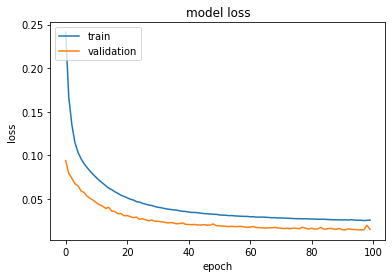

In [12]:
# 1 layer training
cmd = "--train_subjects s01_still --DWI 96 --model fc1d --layer 1 --train --label_type N"
plot_loss(cmd)

In [13]:
# 1 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model fc1d --layer 1 --label_type N"
args = model_parser().parse_args(cmd.split())
test_model(args)

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 96)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               14550     
_________________________________________________________________
dropout_1 (Dropout)          (None, 150)               0         
_________________________________________________________________
output (Dense)               (None, 1)                 151       
Total params: 14,701
Trainable params: 14,701
Non-trainable params: 0
_________________________________________________________________
(84, 84, 50, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
0.08578255556312639


/home/vw/anaconda3/envs/project/lib/python3.7/site-packages/nipy/io/files.py:145: FutureWarning: Default `strict` currently False; this will change to True in a future version of nipy
  ni_img = nipy2nifti(img, data_dtype = io_dtype)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(0.08578255556312639, -62.38290861865479, 0.9824578459285107)


Text(0.5, 0.98, 'Center slices for s02_still_NDI predicted image')

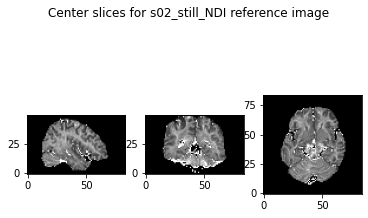

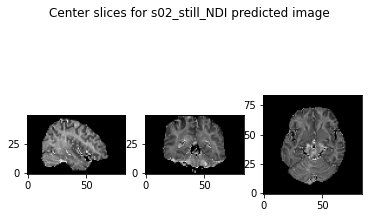

In [14]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-NDI-96-first-fc1d-1layer.nii'
pred_NDI_img = nib.load(pred_path)
pred_NDI_img_data = pred_NDI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_NDI_img_data, s02_NDI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_NDI_img_data[26, :, :]
ref_slice_1 = s02_NDI_img_data[:, 30, :]
ref_slice_2 = s02_NDI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_NDI reference image")

pred_slice_0 = pred_NDI_img_data[26, :, :]
pred_slice_1 = pred_NDI_img_data[:, 30, :]
pred_slice_2 = pred_NDI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_NDI predicted image")

<strong>2 layer</strong>

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 96)]              0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               14550     
_________________________________________________________________
dense_3 (Dense)              (None, 150)               22650     
_________________________________________________________________
dropout_2 (Dropout)          (None, 150)               0         
_________________________________________________________________
output (Dense)               (None, 1)                 151       
Total params: 37,351
Trainable params: 37,351
Non-trainable params: 0
_________________________________________________________________
['N']
Training start ...
Epoch 1/100


2022-03-08 15:01:42.905917: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:01:42.906041: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


103/260 [==========>...................] - ETA: 0s - loss: 0.3483 - accuracy: 0.0199

2022-03-08 15:01:43.182446: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:01:43.202221: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 15:01:43.202493: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 15:01:43.203726: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_15_01_43
2022-03-08 15:01:43.204352: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_15_01_43/vw.trace.json.gz
2022-03-08 15:01:43.204515: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 15:01:43.205696: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

260/260 [==============================] - 1s 2ms/step - loss: 0.2222 - accuracy: 0.0232 - val_loss: 0.0778 - val_accuracy: 0.0084
Epoch 2/100
260/260 [==============================] - 0s 2ms/step - loss: 0.1092 - accuracy: 0.0254 - val_loss: 0.0681 - val_accuracy: 0.0089
Epoch 3/100
260/260 [==============================] - 0s 2ms/step - loss: 0.0952 - accuracy: 0.0268 - val_loss: 0.0624 - val_accuracy: 0.0090
Epoch 4/100
260/260 [==============================] - 0s 2ms/step - loss: 0.0869 - accuracy: 0.0280 - val_loss: 0.0567 - val_accuracy: 0.0090
Epoch 5/100
260/260 [==============================] - 0s 2ms/step - loss: 0.0802 - accuracy: 0.0297 - val_loss: 0.0516 - val_accuracy: 0.0095
Epoch 6/100
260/260 [==============================] - 0s 2ms/step - loss: 0.0742 - accuracy: 0.0318 - val_loss: 0.0477 - val_accuracy: 0.0100
Epoch 7/100
260/260 [==============================] - 0s 2ms/step - loss: 0.0681 - accuracy: 0.0345 - val_loss: 0.0471 - val_accuracy: 0.0095
Epoch 8/100

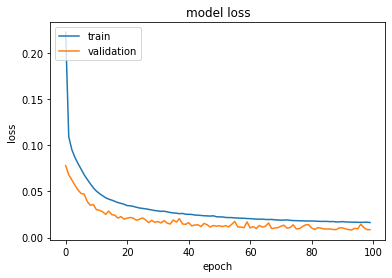

In [15]:
# 2 layer training
cmd = "--train_subjects s01_still --DWI 96 --model fc1d --layer 2 --train --label_type N"
plot_loss(cmd)

In [16]:
# 2 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model fc1d --layer 2 --label_type N"
args = model_parser().parse_args(cmd.split())
test_model(args)

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 96)]              0         
_________________________________________________________________
dense_4 (Dense)              (None, 150)               14550     
_________________________________________________________________
dense_5 (Dense)              (None, 150)               22650     
_________________________________________________________________
dropout_3 (Dropout)          (None, 150)               0         
_________________________________________________________________
output (Dense)               (None, 1)                 151       
Total params: 37,351
Trainable params: 37,351
Non-trainable params: 0
_________________________________________________________________
(84, 84, 50, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
0.094

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(0.09424826521361859, -60.50057363493408, 0.9794462014083657)


Text(0.5, 0.98, 'Center slices for s02_still_NDI predicted image')

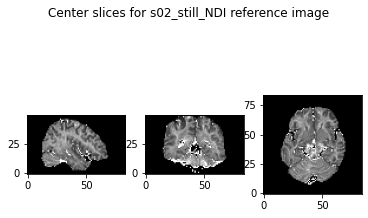

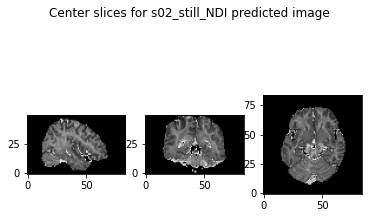

In [17]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-NDI-96-first-fc1d-2layer.nii'
pred_NDI_img = nib.load(pred_path)
pred_NDI_img_data = pred_NDI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_NDI_img_data, s02_NDI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_NDI_img_data[26, :, :]
ref_slice_1 = s02_NDI_img_data[:, 30, :]
ref_slice_2 = s02_NDI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_NDI reference image")

pred_slice_0 = pred_NDI_img_data[26, :, :]
pred_slice_1 = pred_NDI_img_data[:, 30, :]
pred_slice_2 = pred_NDI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_NDI predicted image")

<strong>3 layer</strong>

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 96)]              0         
_________________________________________________________________
dense_6 (Dense)              (None, 150)               14550     
_________________________________________________________________
dense_7 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_8 (Dense)              (None, 150)               22650     
_________________________________________________________________
dropout_4 (Dropout)          (None, 150)               0         
_________________________________________________________________
output (Dense)               (None, 1)                 151       
Total params: 60,001
Trainable params: 60,001
Non-trainable params: 0
__________________________________________________

2022-03-08 15:02:26.541597: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:02:26.541688: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


 77/260 [=======>......................] - ETA: 0s - loss: 0.2097 - accuracy: 0.0215

2022-03-08 15:02:26.809930: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:02:26.837104: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 15:02:26.837469: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 15:02:26.839151: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_15_02_26
2022-03-08 15:02:26.839875: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_15_02_26/vw.trace.json.gz
2022-03-08 15:02:26.839989: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 15:02:26.841159: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

260/260 [==============================] - 1s 2ms/step - loss: 0.1444 - accuracy: 0.0241 - val_loss: 0.0712 - val_accuracy: 0.0086
Epoch 2/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0950 - accuracy: 0.0249 - val_loss: 0.0605 - val_accuracy: 0.0089
Epoch 3/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0818 - accuracy: 0.0293 - val_loss: 0.0507 - val_accuracy: 0.0087
Epoch 4/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0714 - accuracy: 0.0315 - val_loss: 0.0446 - val_accuracy: 0.0093
Epoch 5/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0629 - accuracy: 0.0328 - val_loss: 0.0392 - val_accuracy: 0.0104
Epoch 6/100
260/260 [==============================] - 0s 2ms/step - loss: 0.0561 - accuracy: 0.0355 - val_loss: 0.0335 - val_accuracy: 0.0112
Epoch 7/100
260/260 [==============================] - 0s 2ms/step - loss: 0.0504 - accuracy: 0.0374 - val_loss: 0.0397 - val_accuracy: 0.0112
Epoch 8/100

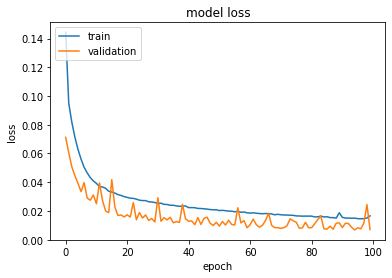

In [18]:
# 3 layer training
cmd = "--train_subjects s01_still --DWI 96 --model fc1d --layer 3 --train --label_type N"
plot_loss(cmd)

In [19]:
# 3 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model fc1d --layer 3 --label_type N"
args = model_parser().parse_args(cmd.split())
test_model(args)

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 96)]              0         
_________________________________________________________________
dense_9 (Dense)              (None, 150)               14550     
_________________________________________________________________
dense_10 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_11 (Dense)             (None, 150)               22650     
_________________________________________________________________
dropout_5 (Dropout)          (None, 150)               0         
_________________________________________________________________
output (Dense)               (None, 1)                 151       
Total params: 60,001
Trainable params: 60,001
Non-trainable params: 0
__

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(0.07056051919143094, -66.28980663470341, 0.9883499302640159)


Text(0.5, 0.98, 'Center slices for s02_still_NDI predicted image')

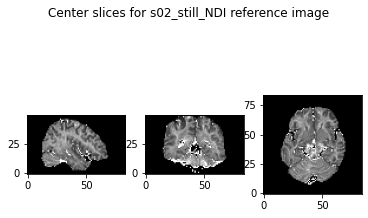

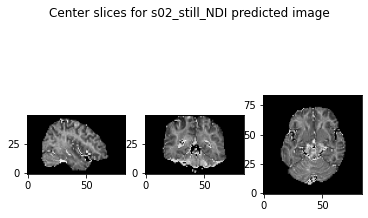

In [20]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-NDI-96-first-fc1d-3layer.nii'
pred_NDI_img = nib.load(pred_path)
pred_NDI_img_data = pred_NDI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_NDI_img_data, s02_NDI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_NDI_img_data[26, :, :]
ref_slice_1 = s02_NDI_img_data[:, 30, :]
ref_slice_2 = s02_NDI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_NDI reference image")

pred_slice_0 = pred_NDI_img_data[26, :, :]
pred_slice_1 = pred_NDI_img_data[:, 30, :]
pred_slice_2 = pred_NDI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_NDI predicted image")

<strong>4 layer</strong>

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 96)]              0         
_________________________________________________________________
dense_12 (Dense)             (None, 150)               14550     
_________________________________________________________________
dense_13 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_14 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_15 (Dense)             (None, 150)               22650     
_________________________________________________________________
dropout_6 (Dropout)          (None, 150)               0         
_________________________________________________________________
output (Dense)               (None, 1)               

2022-03-08 15:03:21.610919: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:03:21.611052: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


 65/260 [======>.......................] - ETA: 0s - loss: 0.1694 - accuracy: 0.0245

2022-03-08 15:03:21.936810: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:03:21.967846: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 15:03:21.968320: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 15:03:21.970154: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_15_03_21
2022-03-08 15:03:21.970961: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_15_03_21/vw.trace.json.gz
2022-03-08 15:03:21.971092: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 15:03:21.972418: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

260/260 [==============================] - 1s 3ms/step - loss: 0.1207 - accuracy: 0.0246 - val_loss: 0.0645 - val_accuracy: 0.0089
Epoch 2/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0854 - accuracy: 0.0265 - val_loss: 0.0527 - val_accuracy: 0.0090
Epoch 3/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0708 - accuracy: 0.0308 - val_loss: 0.0422 - val_accuracy: 0.0093
Epoch 4/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0585 - accuracy: 0.0351 - val_loss: 0.0364 - val_accuracy: 0.0104
Epoch 5/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0500 - accuracy: 0.0372 - val_loss: 0.0303 - val_accuracy: 0.0109
Epoch 6/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0445 - accuracy: 0.0384 - val_loss: 0.0385 - val_accuracy: 0.0100
Epoch 7/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0408 - accuracy: 0.0387 - val_loss: 0.0262 - val_accuracy: 0.0112
Epoch 8/100

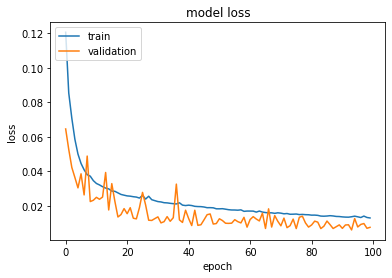

In [21]:
# 4 layer training
cmd = "--train_subjects s01_still --DWI 96 --model fc1d --layer 4 --train --label_type N"
plot_loss(cmd)

In [22]:
# 4 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model fc1d --layer 4 --label_type N"
args = model_parser().parse_args(cmd.split())
test_model(args)

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 96)]              0         
_________________________________________________________________
dense_16 (Dense)             (None, 150)               14550     
_________________________________________________________________
dense_17 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_18 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_19 (Dense)             (None, 150)               22650     
_________________________________________________________________
dropout_7 (Dropout)          (None, 150)               0         
_________________________________________________________________
output

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(0.07077194570948386, -66.22996852862086, 0.9883226433463896)


Text(0.5, 0.98, 'Center slices for s02_still_NDI predicted image')

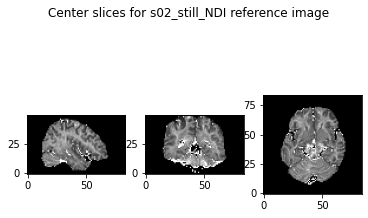

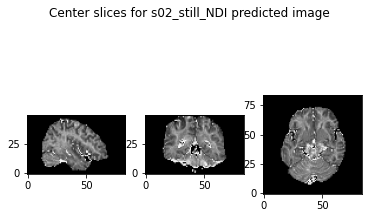

In [23]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-NDI-96-first-fc1d-4layer.nii'
pred_NDI_img = nib.load(pred_path)
pred_NDI_img_data = pred_NDI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_NDI_img_data, s02_NDI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_NDI_img_data[26, :, :]
ref_slice_1 = s02_NDI_img_data[:, 30, :]
ref_slice_2 = s02_NDI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_NDI reference image")

pred_slice_0 = pred_NDI_img_data[26, :, :]
pred_slice_1 = pred_NDI_img_data[:, 30, :]
pred_slice_2 = pred_NDI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_NDI predicted image")

<strong>5 layer</strong>

Model: "functional_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 96)]              0         
_________________________________________________________________
dense_20 (Dense)             (None, 150)               14550     
_________________________________________________________________
dense_21 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_22 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_23 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_24 (Dense)             (None, 150)               22650     
_________________________________________________________________
dropout_8 (Dropout)          (None, 150)             

2022-03-08 15:04:21.426868: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:04:21.426961: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


 57/260 [=====>........................] - ETA: 0s - loss: 0.1851 - accuracy: 0.0223

2022-03-08 15:04:21.761619: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:04:21.794529: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 15:04:21.794876: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 15:04:21.796240: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_15_04_21
2022-03-08 15:04:21.796905: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_15_04_21/vw.trace.json.gz
2022-03-08 15:04:21.797005: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 15:04:21.798022: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

260/260 [==============================] - 1s 3ms/step - loss: 0.1200 - accuracy: 0.0244 - val_loss: 0.0635 - val_accuracy: 0.0087
Epoch 2/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0806 - accuracy: 0.0273 - val_loss: 0.0465 - val_accuracy: 0.0090
Epoch 3/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0638 - accuracy: 0.0325 - val_loss: 0.0365 - val_accuracy: 0.0104
Epoch 4/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0530 - accuracy: 0.0360 - val_loss: 0.0470 - val_accuracy: 0.0112
Epoch 5/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0450 - accuracy: 0.0379 - val_loss: 0.0252 - val_accuracy: 0.0115
Epoch 6/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0398 - accuracy: 0.0387 - val_loss: 0.0266 - val_accuracy: 0.0113
Epoch 7/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0370 - accuracy: 0.0388 - val_loss: 0.0249 - val_accuracy: 0.0112
Epoch 8/100

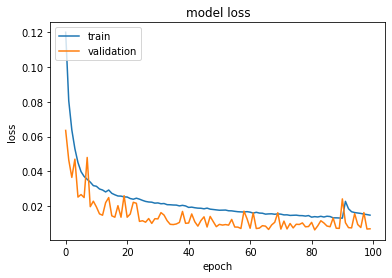

In [24]:
# 5 layer training
cmd = "--train_subjects s01_still --DWI 96 --model fc1d --layer 5 --train --label_type N"
plot_loss(cmd)

In [25]:
# 5 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model fc1d --layer 5 --label_type N"
args = model_parser().parse_args(cmd.split())
test_model(args)

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 96)]              0         
_________________________________________________________________
dense_25 (Dense)             (None, 150)               14550     
_________________________________________________________________
dense_26 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_27 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_28 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_29 (Dense)             (None, 150)               22650     
_________________________________________________________________
dropou

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(0.08491076034581273, -62.58720549876517, 0.9831662904573458)


Text(0.5, 0.98, 'Center slices for s02_still_NDI predicted image')

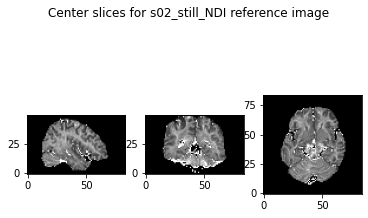

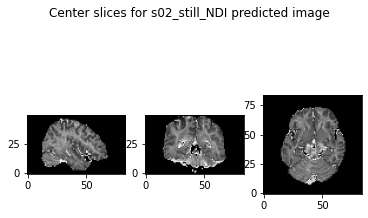

In [26]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-NDI-96-first-fc1d-5layer.nii'
pred_NDI_img = nib.load(pred_path)
pred_NDI_img_data = pred_NDI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_NDI_img_data, s02_NDI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_NDI_img_data[26, :, :]
ref_slice_1 = s02_NDI_img_data[:, 30, :]
ref_slice_2 = s02_NDI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_NDI reference image")

pred_slice_0 = pred_NDI_img_data[26, :, :]
pred_slice_1 = pred_NDI_img_data[:, 30, :]
pred_slice_2 = pred_NDI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_NDI predicted image")

<strong>6 layer</strong>

Model: "functional_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 96)]              0         
_________________________________________________________________
dense_30 (Dense)             (None, 150)               14550     
_________________________________________________________________
dense_31 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_32 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_33 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_34 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_35 (Dense)             (None, 150)             

2022-03-08 15:05:29.185068: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:05:29.185161: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


 50/260 [====>.........................] - ETA: 0s - loss: 0.2266 - accuracy: 0.0189

2022-03-08 15:05:29.538199: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:05:29.568656: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 15:05:29.568998: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 15:05:29.570396: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_15_05_29
2022-03-08 15:05:29.571113: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_15_05_29/vw.trace.json.gz
2022-03-08 15:05:29.571215: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 15:05:29.572251: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

260/260 [==============================] - 1s 3ms/step - loss: 0.1256 - accuracy: 0.0239 - val_loss: 0.0654 - val_accuracy: 0.0087
Epoch 2/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0789 - accuracy: 0.0270 - val_loss: 0.0443 - val_accuracy: 0.0091
Epoch 3/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0621 - accuracy: 0.0324 - val_loss: 0.0346 - val_accuracy: 0.0103
Epoch 4/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0500 - accuracy: 0.0363 - val_loss: 0.0291 - val_accuracy: 0.0115
Epoch 5/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0433 - accuracy: 0.0382 - val_loss: 0.0228 - val_accuracy: 0.0114
Epoch 6/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0391 - accuracy: 0.0386 - val_loss: 0.0391 - val_accuracy: 0.0116
Epoch 7/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0371 - accuracy: 0.0392 - val_loss: 0.0224 - val_accuracy: 0.0113
Epoch 8/100

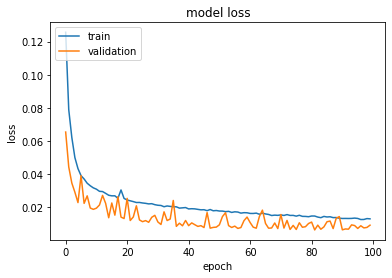

In [27]:
# 6 layer training
cmd = "--train_subjects s01_still --DWI 96 --model fc1d --layer 6 --train --label_type N"
plot_loss(cmd)

In [28]:
# 6 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model fc1d --layer 6 --label_type N"
args = model_parser().parse_args(cmd.split())
test_model(args)

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 96)]              0         
_________________________________________________________________
dense_36 (Dense)             (None, 150)               14550     
_________________________________________________________________
dense_37 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_38 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_39 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_40 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(0.07426954932621249, -65.26520135928598, 0.9871024094939232)


Text(0.5, 0.98, 'Center slices for s02_still_NDI predicted image')

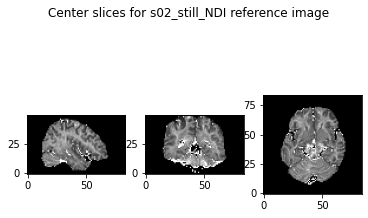

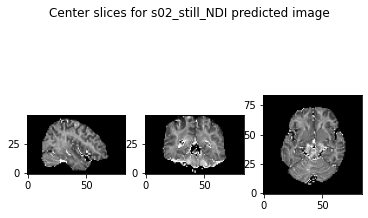

In [29]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-NDI-96-first-fc1d-6layer.nii'
pred_NDI_img = nib.load(pred_path)
pred_NDI_img_data = pred_NDI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_NDI_img_data, s02_NDI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_NDI_img_data[26, :, :]
ref_slice_1 = s02_NDI_img_data[:, 30, :]
ref_slice_2 = s02_NDI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_NDI reference image")

pred_slice_0 = pred_NDI_img_data[26, :, :]
pred_slice_1 = pred_NDI_img_data[:, 30, :]
pred_slice_2 = pred_NDI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_NDI predicted image")

<strong>Training subject: s01_still</br>
Test subject: s02_still</br>
Network; ANN</br>
Outcome: ODI</br>

The training data is stored in datasets/data/s01_still-96-first-1d.mat</br>
The training label is stored in datasets/label/s01_still-ODI-96-first-1d.mat</br>
The testing data is stored in datasets/data/s02_still-96-first.mat</br>
The testing label is stored in datasets/label/s02_still-ODI-96-first.mat</strong>

In [30]:
"""
Generate training dataset ODI for ANN.
Using all of the DWI. 96. as training size.
"""
cmd = "--subjects s01_still --nDWI 96 --fc1d_train --label_type O"
args = data_parser().parse_args(cmd.split())
generate_data(args)

mask has shape: (352800,)
data befor masking
(352800, 96)
data after masking
(82889, 96)
the ratio of used voxels is: 0.23494614512471657
training dataset has shape:(82889, 96)
mask has shape: (352800,)
data befor masking
(352800, 1)
data after masking
(82889, 1)
the ratio of used voxels is: 0.23494614512471657
training label has shape:(82889, 1)


In [31]:
"""
Generate testing dataset. 
The testing dataset does NOT need to be processed. 
The testing samples are DWI images of size (85,85,50,96).
The testing samples can be used for ANY network in this experiment.
"""
cmd = "--subjects s02_still --nDWI 96 --label_type O --test"
args = data_parser().parse_args(cmd.split())
generate_data(args)

testing data has shape: (84, 84, 50, 96)
testing label has shape: (84, 84, 50, 1)


In [32]:
"""
Using nib to fetch the  data, used for evaluation
"""
s02_ODI_path = '../Data-NODDI/s02_still/s02_still_ODI.nii'
s02_mask_path = '../Net-DTI/datasets/mask/mask_s02_still.nii'
s02_ODI_img = nib.load(s02_ODI_path)
s02_ODI_img_data = s02_ODI_img.get_fdata()
s02_mask_img = nib.load(s02_mask_path)
s02_mask_img_data = s02_mask_img.get_fdata()

<strong>1 layer</strong>

Model: "functional_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 96)]              0         
_________________________________________________________________
dense_42 (Dense)             (None, 150)               14550     
_________________________________________________________________
dropout_12 (Dropout)         (None, 150)               0         
_________________________________________________________________
output (Dense)               (None, 1)                 151       
Total params: 14,701
Trainable params: 14,701
Non-trainable params: 0
_________________________________________________________________
['O']
Training start ...
Epoch 1/100


2022-03-08 15:06:46.280311: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:06:46.280404: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


174/260 [===================>..........] - ETA: 0s - loss: 0.1777 - accuracy: 0.0041

2022-03-08 15:06:46.534466: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:06:46.562310: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 15:06:46.562595: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 15:06:46.563766: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_15_06_46
2022-03-08 15:06:46.564306: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_15_06_46/vw.trace.json.gz
2022-03-08 15:06:46.564388: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 15:06:46.565257: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

260/260 [==============================] - 0s 2ms/step - loss: 0.1661 - accuracy: 0.0038 - val_loss: 0.0913 - val_accuracy: 4.8257e-04
Epoch 2/100
260/260 [==============================] - 0s 1ms/step - loss: 0.1212 - accuracy: 0.0035 - val_loss: 0.0829 - val_accuracy: 6.0321e-04
Epoch 3/100
260/260 [==============================] - 0s 1ms/step - loss: 0.1053 - accuracy: 0.0038 - val_loss: 0.0783 - val_accuracy: 6.6353e-04
Epoch 4/100
260/260 [==============================] - 0s 1ms/step - loss: 0.0975 - accuracy: 0.0039 - val_loss: 0.0764 - val_accuracy: 6.0321e-04
Epoch 5/100
260/260 [==============================] - 0s 1ms/step - loss: 0.0925 - accuracy: 0.0041 - val_loss: 0.0735 - val_accuracy: 5.4289e-04
Epoch 6/100
260/260 [==============================] - 0s 1ms/step - loss: 0.0884 - accuracy: 0.0041 - val_loss: 0.0719 - val_accuracy: 5.4289e-04
Epoch 7/100
260/260 [==============================] - 0s 1ms/step - loss: 0.0854 - accuracy: 0.0041 - val_loss: 0.0699 - val_accu

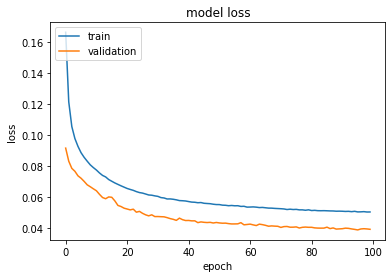

In [33]:
# 1 layer training
cmd = "--train_subjects s01_still --DWI 96 --model fc1d --layer 1 --train --label_type O"
plot_loss(cmd)

In [34]:
# 1 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model fc1d --layer 1 --label_type O"
args = model_parser().parse_args(cmd.split())
test_model(args)

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 96)]              0         
_________________________________________________________________
dense_43 (Dense)             (None, 150)               14550     
_________________________________________________________________
dropout_13 (Dropout)         (None, 150)               0         
_________________________________________________________________
output (Dense)               (None, 1)                 151       
Total params: 14,701
Trainable params: 14,701
Non-trainable params: 0
_________________________________________________________________
(84, 84, 50, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
0.0728938743570915


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(0.0728938743570915, -58.14663050766369, 0.9624934608095008)


Text(0.5, 0.98, 'Center slices for s02_still_ODI predicted image')

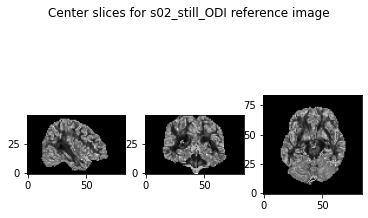

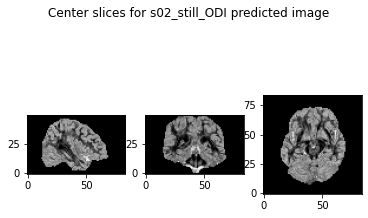

In [35]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-ODI-96-first-fc1d-1layer.nii'
pred_ODI_img = nib.load(pred_path)
pred_ODI_img_data = pred_ODI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_ODI_img_data, s02_ODI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_ODI_img_data[26, :, :]
ref_slice_1 = s02_ODI_img_data[:, 30, :]
ref_slice_2 = s02_ODI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_ODI reference image")

pred_slice_0 = pred_ODI_img_data[26, :, :]
pred_slice_1 = pred_ODI_img_data[:, 30, :]
pred_slice_2 = pred_ODI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_ODI predicted image")

<strong>2 layer</strong>

Model: "functional_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 96)]              0         
_________________________________________________________________
dense_44 (Dense)             (None, 150)               14550     
_________________________________________________________________
dense_45 (Dense)             (None, 150)               22650     
_________________________________________________________________
dropout_14 (Dropout)         (None, 150)               0         
_________________________________________________________________
output (Dense)               (None, 1)                 151       
Total params: 37,351
Trainable params: 37,351
Non-trainable params: 0
_________________________________________________________________
['O']
Training start ...
Epoch 1/100


2022-03-08 15:07:19.838432: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:07:19.838520: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


 99/260 [==========>...................] - ETA: 0s - loss: 0.1566 - accuracy: 0.0026  

2022-03-08 15:07:20.136906: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:07:20.157788: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 15:07:20.158232: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 15:07:20.159941: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_15_07_20
2022-03-08 15:07:20.160686: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_15_07_20/vw.trace.json.gz
2022-03-08 15:07:20.160840: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 15:07:20.162117: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

260/260 [==============================] - 1s 2ms/step - loss: 0.1278 - accuracy: 0.0035 - val_loss: 0.0846 - val_accuracy: 2.4128e-04
Epoch 2/100
260/260 [==============================] - 0s 2ms/step - loss: 0.0950 - accuracy: 0.0040 - val_loss: 0.0750 - val_accuracy: 4.8257e-04
Epoch 3/100
260/260 [==============================] - 0s 2ms/step - loss: 0.0860 - accuracy: 0.0041 - val_loss: 0.0711 - val_accuracy: 4.2225e-04
Epoch 4/100
260/260 [==============================] - 0s 2ms/step - loss: 0.0799 - accuracy: 0.0041 - val_loss: 0.0659 - val_accuracy: 5.4289e-04
Epoch 5/100
260/260 [==============================] - 0s 2ms/step - loss: 0.0749 - accuracy: 0.0041 - val_loss: 0.0624 - val_accuracy: 4.8257e-04
Epoch 6/100
260/260 [==============================] - 0s 2ms/step - loss: 0.0704 - accuracy: 0.0041 - val_loss: 0.0570 - val_accuracy: 6.0321e-04
Epoch 7/100
260/260 [==============================] - 0s 2ms/step - loss: 0.0664 - accuracy: 0.0041 - val_loss: 0.0543 - val_accu

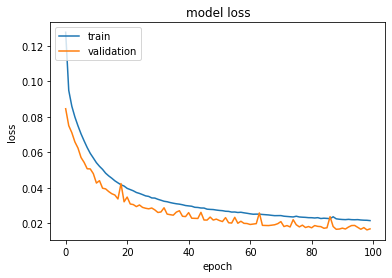

In [36]:
# 2 layer training
cmd = "--train_subjects s01_still --DWI 96 --model fc1d --layer 2 --train --label_type O"
plot_loss(cmd)

In [37]:
# 2 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model fc1d --layer 2 --label_type O"
args = model_parser().parse_args(cmd.split())
test_model(args)

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 96)]              0         
_________________________________________________________________
dense_46 (Dense)             (None, 150)               14550     
_________________________________________________________________
dense_47 (Dense)             (None, 150)               22650     
_________________________________________________________________
dropout_15 (Dropout)         (None, 150)               0         
_________________________________________________________________
output (Dense)               (None, 1)                 151       
Total params: 37,351
Trainable params: 37,351
Non-trainable params: 0
_________________________________________________________________
(84, 84, 50, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
0.05

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(0.050244179533925855, -60.99853512630997, 0.9727187487096893)


Text(0.5, 0.98, 'Center slices for s02_still_ODI predicted image')

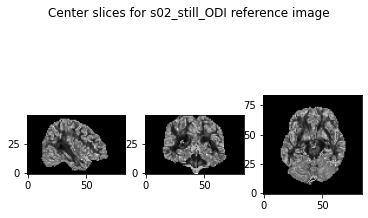

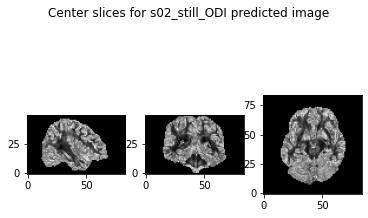

In [38]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-ODI-96-first-fc1d-2layer.nii'
pred_ODI_img = nib.load(pred_path)
pred_ODI_img_data = pred_ODI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_ODI_img_data, s02_ODI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_ODI_img_data[26, :, :]
ref_slice_1 = s02_ODI_img_data[:, 30, :]
ref_slice_2 = s02_ODI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_ODI reference image")

pred_slice_0 = pred_ODI_img_data[26, :, :]
pred_slice_1 = pred_ODI_img_data[:, 30, :]
pred_slice_2 = pred_ODI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_ODI predicted image")

<strong>3 layer</strong>

Model: "functional_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 96)]              0         
_________________________________________________________________
dense_48 (Dense)             (None, 150)               14550     
_________________________________________________________________
dense_49 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_50 (Dense)             (None, 150)               22650     
_________________________________________________________________
dropout_16 (Dropout)         (None, 150)               0         
_________________________________________________________________
output (Dense)               (None, 1)                 151       
Total params: 60,001
Trainable params: 60,001
Non-trainable params: 0
_________________________________________________

2022-03-08 15:08:03.395601: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:08:03.395734: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


 84/260 [========>.....................] - ETA: 0s - loss: 0.1320 - accuracy: 0.0027  

2022-03-08 15:08:03.730041: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:08:03.751379: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 15:08:03.751693: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 15:08:03.753160: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_15_08_03
2022-03-08 15:08:03.753958: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_15_08_03/vw.trace.json.gz
2022-03-08 15:08:03.754159: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 15:08:03.755564: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

260/260 [==============================] - 1s 2ms/step - loss: 0.1072 - accuracy: 0.0036 - val_loss: 0.0785 - val_accuracy: 4.2225e-04
Epoch 2/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0833 - accuracy: 0.0041 - val_loss: 0.0690 - val_accuracy: 4.8257e-04
Epoch 3/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0750 - accuracy: 0.0041 - val_loss: 0.0618 - val_accuracy: 6.6353e-04
Epoch 4/100
260/260 [==============================] - 0s 2ms/step - loss: 0.0682 - accuracy: 0.0041 - val_loss: 0.0566 - val_accuracy: 5.4289e-04
Epoch 5/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0625 - accuracy: 0.0041 - val_loss: 0.0507 - val_accuracy: 6.0321e-04
Epoch 6/100
260/260 [==============================] - 0s 2ms/step - loss: 0.0576 - accuracy: 0.0041 - val_loss: 0.0464 - val_accuracy: 5.4289e-04
Epoch 7/100
260/260 [==============================] - 0s 2ms/step - loss: 0.0531 - accuracy: 0.0042 - val_loss: 0.0411 - val_accu

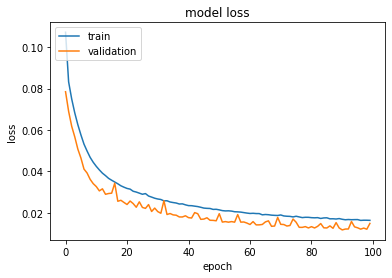

In [39]:
# 3 layer training
cmd = "--train_subjects s01_still --DWI 96 --model fc1d --layer 3 --train --label_type O"
plot_loss(cmd)

In [40]:
# 3 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model fc1d --layer 3 --label_type O"
args = model_parser().parse_args(cmd.split())
test_model(args)

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 96)]              0         
_________________________________________________________________
dense_51 (Dense)             (None, 150)               14550     
_________________________________________________________________
dense_52 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_53 (Dense)             (None, 150)               22650     
_________________________________________________________________
dropout_17 (Dropout)         (None, 150)               0         
_________________________________________________________________
output (Dense)               (None, 1)                 151       
Total params: 60,001
Trainable params: 60,001
Non-trainable params: 0
__

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(0.052756686437804644, -60.69691416218839, 0.9703660864857431)


Text(0.5, 0.98, 'Center slices for s02_still_ODI predicted image')

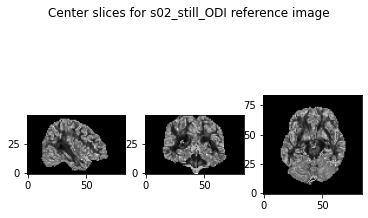

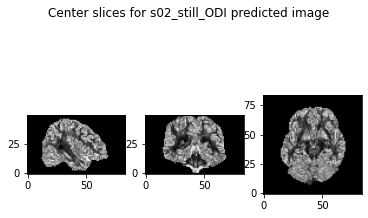

In [41]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-ODI-96-first-fc1d-3layer.nii'
pred_ODI_img = nib.load(pred_path)
pred_ODI_img_data = pred_ODI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_ODI_img_data, s02_ODI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_ODI_img_data[26, :, :]
ref_slice_1 = s02_ODI_img_data[:, 30, :]
ref_slice_2 = s02_ODI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_ODI reference image")

pred_slice_0 = pred_ODI_img_data[26, :, :]
pred_slice_1 = pred_ODI_img_data[:, 30, :]
pred_slice_2 = pred_ODI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_ODI predicted image")

<strong>4 layer</strong>

Model: "functional_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        [(None, 96)]              0         
_________________________________________________________________
dense_54 (Dense)             (None, 150)               14550     
_________________________________________________________________
dense_55 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_56 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_57 (Dense)             (None, 150)               22650     
_________________________________________________________________
dropout_18 (Dropout)         (None, 150)               0         
_________________________________________________________________
output (Dense)               (None, 1)               

2022-03-08 15:08:54.933247: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:08:54.933353: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


 68/260 [======>.......................] - ETA: 0s - loss: 0.1496 - accuracy: 0.0028  

2022-03-08 15:08:55.300507: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:08:55.328999: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 15:08:55.329317: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 15:08:55.330615: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_15_08_55
2022-03-08 15:08:55.331253: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_15_08_55/vw.trace.json.gz
2022-03-08 15:08:55.331343: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 15:08:55.332331: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

260/260 [==============================] - 1s 3ms/step - loss: 0.1116 - accuracy: 0.0036 - val_loss: 0.0753 - val_accuracy: 5.4289e-04
Epoch 2/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0828 - accuracy: 0.0041 - val_loss: 0.0687 - val_accuracy: 4.2225e-04
Epoch 3/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0726 - accuracy: 0.0041 - val_loss: 0.0620 - val_accuracy: 4.2225e-04
Epoch 4/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0642 - accuracy: 0.0041 - val_loss: 0.0506 - val_accuracy: 6.0321e-04
Epoch 5/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0574 - accuracy: 0.0041 - val_loss: 0.0532 - val_accuracy: 6.0321e-04
Epoch 6/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0519 - accuracy: 0.0041 - val_loss: 0.0398 - val_accuracy: 5.4289e-04
Epoch 7/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0478 - accuracy: 0.0042 - val_loss: 0.0362 - val_accu

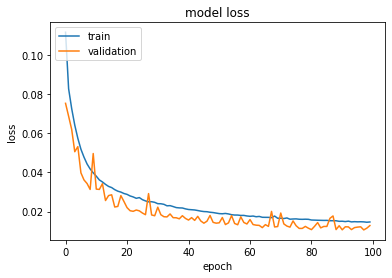

In [42]:
# 4 layer training
cmd = "--train_subjects s01_still --DWI 96 --model fc1d --layer 4 --train --label_type O"
plot_loss(cmd)

In [43]:
# 4 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model fc1d --layer 4 --label_type O"
args = model_parser().parse_args(cmd.split())
test_model(args)

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        [(None, 96)]              0         
_________________________________________________________________
dense_58 (Dense)             (None, 150)               14550     
_________________________________________________________________
dense_59 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_60 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_61 (Dense)             (None, 150)               22650     
_________________________________________________________________
dropout_19 (Dropout)         (None, 150)               0         
_________________________________________________________________
output

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(0.04457666719872974, -61.65553334869712, 0.9750691464440987)


Text(0.5, 0.98, 'Center slices for s02_still_ODI predicted image')

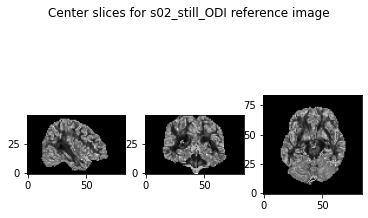

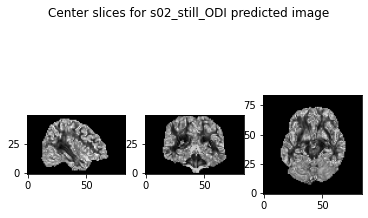

In [44]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-ODI-96-first-fc1d-4layer.nii'
pred_ODI_img = nib.load(pred_path)
pred_ODI_img_data = pred_ODI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_ODI_img_data, s02_ODI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_ODI_img_data[26, :, :]
ref_slice_1 = s02_ODI_img_data[:, 30, :]
ref_slice_2 = s02_ODI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_ODI reference image")

pred_slice_0 = pred_ODI_img_data[26, :, :]
pred_slice_1 = pred_ODI_img_data[:, 30, :]
pred_slice_2 = pred_ODI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_ODI predicted image")

<strong>5 layer</strong>

Model: "functional_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        [(None, 96)]              0         
_________________________________________________________________
dense_62 (Dense)             (None, 150)               14550     
_________________________________________________________________
dense_63 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_64 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_65 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_66 (Dense)             (None, 150)               22650     
_________________________________________________________________
dropout_20 (Dropout)         (None, 150)             

2022-03-08 15:09:55.426997: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:09:55.427121: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


 59/260 [=====>........................] - ETA: 0s - loss: 0.1063 - accuracy: 0.0030  

2022-03-08 15:09:55.786499: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:09:55.815256: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 15:09:55.815596: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 15:09:55.816941: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_15_09_55
2022-03-08 15:09:55.817648: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_15_09_55/vw.trace.json.gz
2022-03-08 15:09:55.817756: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 15:09:55.818775: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

260/260 [==============================] - 1s 3ms/step - loss: 0.0890 - accuracy: 0.0038 - val_loss: 0.0664 - val_accuracy: 4.8257e-04
Epoch 2/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0696 - accuracy: 0.0042 - val_loss: 0.0595 - val_accuracy: 6.0321e-04
Epoch 3/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0588 - accuracy: 0.0042 - val_loss: 0.0454 - val_accuracy: 5.4289e-04
Epoch 4/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0512 - accuracy: 0.0041 - val_loss: 0.0406 - val_accuracy: 6.0321e-04
Epoch 5/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0454 - accuracy: 0.0042 - val_loss: 0.0430 - val_accuracy: 6.6353e-04
Epoch 6/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0419 - accuracy: 0.0041 - val_loss: 0.0322 - val_accuracy: 6.6353e-04
Epoch 7/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0392 - accuracy: 0.0041 - val_loss: 0.0321 - val_accu

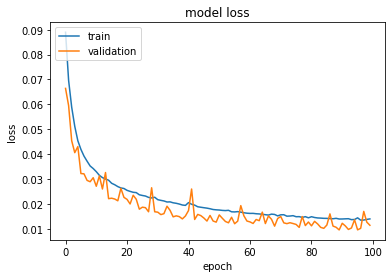

In [45]:
# 5 layer training
cmd = "--train_subjects s01_still --DWI 96 --model fc1d --layer 5 --train --label_type O"
plot_loss(cmd)

In [46]:
# 5 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model fc1d --layer 5 --label_type O"
args = model_parser().parse_args(cmd.split())
test_model(args)

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        [(None, 96)]              0         
_________________________________________________________________
dense_67 (Dense)             (None, 150)               14550     
_________________________________________________________________
dense_68 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_69 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_70 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_71 (Dense)             (None, 150)               22650     
_________________________________________________________________
dropou

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(0.04551759729161976, -61.548983879974486, 0.9737313565348197)


Text(0.5, 0.98, 'Center slices for s02_still_ODI predicted image')

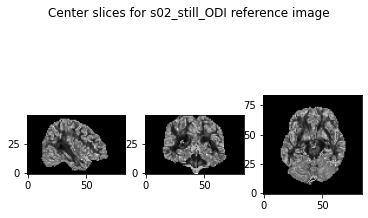

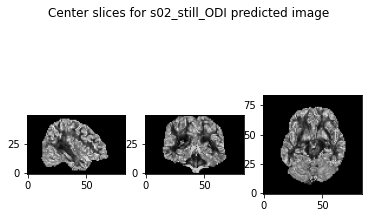

In [47]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-ODI-96-first-fc1d-5layer.nii'
pred_ODI_img = nib.load(pred_path)
pred_ODI_img_data = pred_ODI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_ODI_img_data, s02_ODI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_ODI_img_data[26, :, :]
ref_slice_1 = s02_ODI_img_data[:, 30, :]
ref_slice_2 = s02_ODI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_ODI reference image")

pred_slice_0 = pred_ODI_img_data[26, :, :]
pred_slice_1 = pred_ODI_img_data[:, 30, :]
pred_slice_2 = pred_ODI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_ODI predicted image")

<strong>6 layer</strong>

Model: "functional_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        [(None, 96)]              0         
_________________________________________________________________
dense_72 (Dense)             (None, 150)               14550     
_________________________________________________________________
dense_73 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_74 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_75 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_76 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_77 (Dense)             (None, 150)             

2022-03-08 15:11:03.460608: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:11:03.460701: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


 52/260 [=====>........................] - ETA: 0s - loss: 0.1544 - accuracy: 0.0011    

2022-03-08 15:11:03.809078: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:11:03.840430: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 15:11:03.840802: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 15:11:03.842313: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_15_11_03
2022-03-08 15:11:03.843014: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_15_11_03/vw.trace.json.gz
2022-03-08 15:11:03.843115: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 15:11:03.844144: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

260/260 [==============================] - 1s 3ms/step - loss: 0.1015 - accuracy: 0.0034 - val_loss: 0.0678 - val_accuracy: 5.4289e-04
Epoch 2/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0703 - accuracy: 0.0041 - val_loss: 0.0522 - val_accuracy: 6.0321e-04
Epoch 3/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0561 - accuracy: 0.0042 - val_loss: 0.0421 - val_accuracy: 6.0321e-04
Epoch 4/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0478 - accuracy: 0.0042 - val_loss: 0.0356 - val_accuracy: 6.0321e-04
Epoch 5/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0431 - accuracy: 0.0041 - val_loss: 0.0352 - val_accuracy: 5.4289e-04
Epoch 6/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0401 - accuracy: 0.0042 - val_loss: 0.0314 - val_accuracy: 6.0321e-04
Epoch 7/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0376 - accuracy: 0.0041 - val_loss: 0.0341 - val_accu

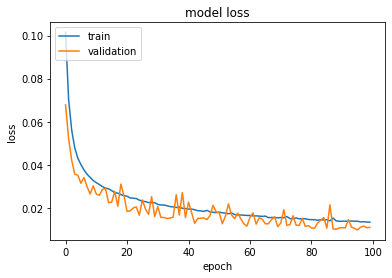

In [48]:
# 6 layer training
cmd = "--train_subjects s01_still --DWI 96 --model fc1d --layer 6 --train --label_type O"
plot_loss(cmd)

In [49]:
# 6 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model fc1d --layer 6 --label_type O"
args = model_parser().parse_args(cmd.split())
test_model(args)

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        [(None, 96)]              0         
_________________________________________________________________
dense_78 (Dense)             (None, 150)               14550     
_________________________________________________________________
dense_79 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_80 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_81 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_82 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(0.043220359755848904, -61.80714709481684, 0.9753165974709361)


Text(0.5, 0.98, 'Center slices for s02_still_ODI predicted image')

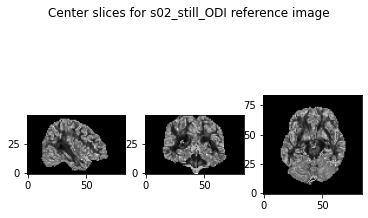

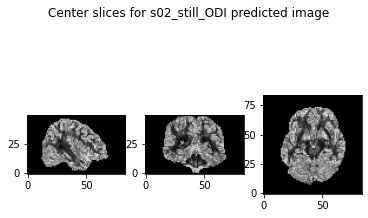

In [50]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-ODI-96-first-fc1d-6layer.nii'
pred_ODI_img = nib.load(pred_path)
pred_ODI_img_data = pred_ODI_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_ODI_img_data, s02_ODI_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_ODI_img_data[26, :, :]
ref_slice_1 = s02_ODI_img_data[:, 30, :]
ref_slice_2 = s02_ODI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_ODI reference image")

pred_slice_0 = pred_ODI_img_data[26, :, :]
pred_slice_1 = pred_ODI_img_data[:, 30, :]
pred_slice_2 = pred_ODI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_ODI predicted image")

<strong>Training subject: s01_still</br>
Test subject: s02_still</br>
Network; ANN</br>
Outcome: FWF</br>

The training data is stored in datasets/data/s01_still-96-first-1d.mat</br>
The training label is stored in datasets/label/s01_still-FWF-96-first-1d.mat</br>
The testing data is stored in datasets/data/s02_still-96-first.mat</br>
THe testing label is stored in datasets/label/s02_still-FWF-96-first.mat</strong>

In [51]:
"""
Generate training dataset FWF for ANN.
Using all of the DWI. 96. as training size.
"""
cmd = "--subjects s01_still --nDWI 96 --fc1d_train --label_type F"
args = data_parser().parse_args(cmd.split())
generate_data(args)

mask has shape: (352800,)
data befor masking
(352800, 96)
data after masking
(82889, 96)
the ratio of used voxels is: 0.23494614512471657
training dataset has shape:(82889, 96)
mask has shape: (352800,)
data befor masking
(352800, 1)
data after masking
(82889, 1)
the ratio of used voxels is: 0.23494614512471657
training label has shape:(82889, 1)


In [52]:
"""
Generate testing dataset. 
The testing dataset does NOT need to be processed. 
The testing samples are DWI images of size (85,85,50,96).
The testing samples can be used for ANY network in this experiment.
"""
cmd = "--subjects s02_still --nDWI 96 --label_type F --test"
args = data_parser().parse_args(cmd.split())
generate_data(args)

testing data has shape: (84, 84, 50, 96)
testing label has shape: (84, 84, 50, 1)


In [53]:
"""
Using nib to fetch the  data, used for evaluation
"""
s02_FWF_path = '../Data-NODDI/s02_still/s02_still_FWF.nii'
s02_mask_path = '../Net-DTI/datasets/mask/mask_s02_still.nii'
s02_FWF_img = nib.load(s02_FWF_path)
s02_FWF_img_data = s02_FWF_img.get_fdata()
s02_mask_img = nib.load(s02_mask_path)
s02_mask_img_data = s02_mask_img.get_fdata()

<strong>1 layer</strong>

Model: "functional_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        [(None, 96)]              0         
_________________________________________________________________
dense_84 (Dense)             (None, 150)               14550     
_________________________________________________________________
dropout_24 (Dropout)         (None, 150)               0         
_________________________________________________________________
output (Dense)               (None, 1)                 151       
Total params: 14,701
Trainable params: 14,701
Non-trainable params: 0
_________________________________________________________________
['F']
Training start ...
Epoch 1/100


2022-03-08 15:12:20.438568: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:12:20.438660: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


119/260 [============>.................] - ETA: 0s - loss: 0.0958 - accuracy: 0.3961

2022-03-08 15:12:20.713071: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:12:20.749289: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 15:12:20.749576: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 15:12:20.750756: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_15_12_20
2022-03-08 15:12:20.751283: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_15_12_20/vw.trace.json.gz
2022-03-08 15:12:20.751369: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 15:12:20.752216: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

260/260 [==============================] - 0s 2ms/step - loss: 0.0866 - accuracy: 0.3965 - val_loss: 0.0448 - val_accuracy: 0.4565
Epoch 2/100
260/260 [==============================] - 0s 1ms/step - loss: 0.0716 - accuracy: 0.3983 - val_loss: 0.0362 - val_accuracy: 0.4566
Epoch 3/100
260/260 [==============================] - 0s 1ms/step - loss: 0.0642 - accuracy: 0.3984 - val_loss: 0.0339 - val_accuracy: 0.4566
Epoch 4/100
260/260 [==============================] - 0s 1ms/step - loss: 0.0572 - accuracy: 0.3989 - val_loss: 0.0282 - val_accuracy: 0.4566
Epoch 5/100
260/260 [==============================] - 0s 1ms/step - loss: 0.0504 - accuracy: 0.3991 - val_loss: 0.0277 - val_accuracy: 0.4566
Epoch 6/100
260/260 [==============================] - 0s 1ms/step - loss: 0.0441 - accuracy: 0.3994 - val_loss: 0.0230 - val_accuracy: 0.4566
Epoch 7/100
260/260 [==============================] - 0s 1ms/step - loss: 0.0388 - accuracy: 0.3996 - val_loss: 0.0216 - val_accuracy: 0.4566
Epoch 8/100

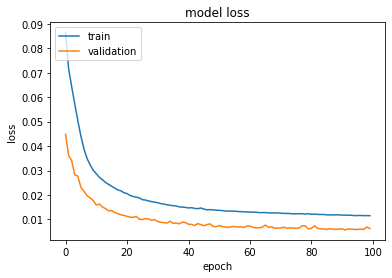

In [54]:
# 1 layer training
cmd = "--train_subjects s01_still --DWI 96 --model fc1d --layer 1 --train --label_type F"
plot_loss(cmd)

In [55]:
# 1 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model fc1d --layer 1 --label_type F"
args = model_parser().parse_args(cmd.split())
test_model(args)

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        [(None, 96)]              0         
_________________________________________________________________
dense_85 (Dense)             (None, 150)               14550     
_________________________________________________________________
dropout_25 (Dropout)         (None, 150)               0         
_________________________________________________________________
output (Dense)               (None, 1)                 151       
Total params: 14,701
Trainable params: 14,701
Non-trainable params: 0
_________________________________________________________________
(84, 84, 50, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
0.027410737518042082


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(0.027410737518042082, -85.20052568979979, 0.995490981740461)


Text(0.5, 0.98, 'Center slices for s02_still_FWF predicted image')

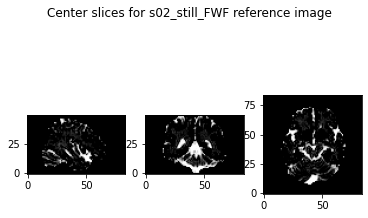

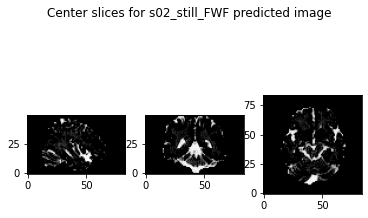

In [56]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-fc1d-1layer.nii'
pred_FWF_img = nib.load(pred_path)
pred_FWF_img_data = pred_FWF_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_FWF_img_data, s02_FWF_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_FWF_img_data[26, :, :]
ref_slice_1 = s02_FWF_img_data[:, 30, :]
ref_slice_2 = s02_FWF_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_FWF reference image")

pred_slice_0 = pred_FWF_img_data[26, :, :]
pred_slice_1 = pred_FWF_img_data[:, 30, :]
pred_slice_2 = pred_FWF_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_FWF predicted image")

<strong>2 layer</strong>

Model: "functional_387"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_194 (InputLayer)       [(None, 96)]              0         
_________________________________________________________________
dense_170 (Dense)            (None, 150)               14550     
_________________________________________________________________
dense_171 (Dense)            (None, 150)               22650     
_________________________________________________________________
dropout_193 (Dropout)        (None, 150)               0         
_________________________________________________________________
output (Dense)               (None, 1)                 151       
Total params: 37,351
Trainable params: 37,351
Non-trainable params: 0
_________________________________________________________________
['F']
Training start ...


2022-03-08 19:49:39.657488: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 19:49:39.657617: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
133/260 [==============>...............] - ETA: 0s - loss: 0.0755 - accuracy: 0.3971

2022-03-08 19:49:40.082634: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 19:49:40.099453: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 19:49:40.099690: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 19:49:40.100642: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_19_49_40
2022-03-08 19:49:40.101072: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_19_49_40/vw.trace.json.gz
2022-03-08 19:49:40.101134: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 19:49:40.101862: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

260/260 [==============================] - 0s 1ms/step - loss: 0.0651 - accuracy: 0.3985 - val_loss: 0.0279 - val_accuracy: 0.4566
Epoch 2/100
260/260 [==============================] - 0s 1ms/step - loss: 0.0402 - accuracy: 0.3996 - val_loss: 0.0203 - val_accuracy: 0.4566
Epoch 3/100
260/260 [==============================] - 0s 1ms/step - loss: 0.0317 - accuracy: 0.3997 - val_loss: 0.0189 - val_accuracy: 0.4566
Epoch 4/100
260/260 [==============================] - 0s 1ms/step - loss: 0.0276 - accuracy: 0.3997 - val_loss: 0.0159 - val_accuracy: 0.4566
Epoch 5/100
260/260 [==============================] - 0s 1ms/step - loss: 0.0253 - accuracy: 0.3997 - val_loss: 0.0151 - val_accuracy: 0.4566
Epoch 6/100
260/260 [==============================] - 0s 1ms/step - loss: 0.0232 - accuracy: 0.3997 - val_loss: 0.0145 - val_accuracy: 0.4566
Epoch 7/100
260/260 [==============================] - 0s 1ms/step - loss: 0.0218 - accuracy: 0.3997 - val_loss: 0.0137 - val_accuracy: 0.4566
Epoch 8/100

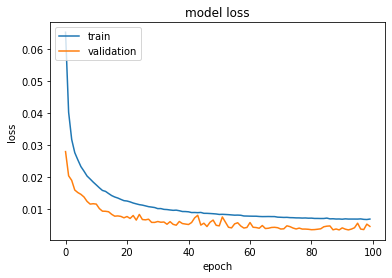

In [226]:
# 2 layer training
cmd = "--train_subjects s01_still --DWI 96 --model fc1d --layer 2 --train --label_type F"
plot_loss(cmd)

In [227]:
# 2 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model fc1d --layer 2 --label_type F"
args = model_parser().parse_args(cmd.split())
test_model(args)

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_389"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_195 (InputLayer)       [(None, 96)]              0         
_________________________________________________________________
dense_172 (Dense)            (None, 150)               14550     
_________________________________________________________________
dense_173 (Dense)            (None, 150)               22650     
_________________________________________________________________
dropout_194 (Dropout)        (None, 150)               0         
_________________________________________________________________
output (Dense)               (None, 1)                 151       
Total params: 37,351
Trainable params: 37,351
Non-trainable params: 0
_________________________________________________________________
(84, 84, 50, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
0.0

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(0.016830463646511796, -94.9554108929884, 0.998245340547078)


Text(0.5, 0.98, 'Center slices for s02_still_FWF predicted image')

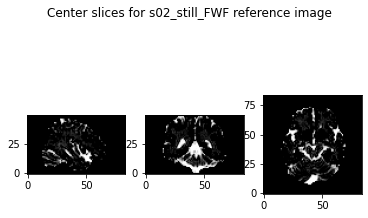

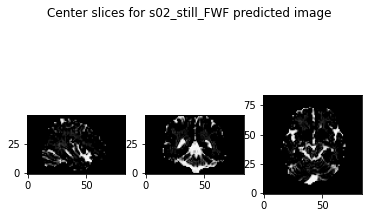

In [228]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-fc1d-2layer.nii'
pred_FWF_img = nib.load(pred_path)
pred_FWF_img_data = pred_FWF_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_FWF_img_data, s02_FWF_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_FWF_img_data[26, :, :]
ref_slice_1 = s02_FWF_img_data[:, 30, :]
ref_slice_2 = s02_FWF_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_FWF reference image")

pred_slice_0 = pred_FWF_img_data[26, :, :]
pred_slice_1 = pred_FWF_img_data[:, 30, :]
pred_slice_2 = pred_FWF_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_FWF predicted image")

<strong>3 layer</strong>

Model: "functional_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_29 (InputLayer)        [(None, 96)]              0         
_________________________________________________________________
dense_90 (Dense)             (None, 150)               14550     
_________________________________________________________________
dense_91 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_92 (Dense)             (None, 150)               22650     
_________________________________________________________________
dropout_28 (Dropout)         (None, 150)               0         
_________________________________________________________________
output (Dense)               (None, 1)                 151       
Total params: 60,001
Trainable params: 60,001
Non-trainable params: 0
_________________________________________________

2022-03-08 15:13:10.838510: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:13:10.838646: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


 81/260 [========>.....................] - ETA: 0s - loss: 0.0653 - accuracy: 0.4005

2022-03-08 15:13:11.167113: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:13:11.193294: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 15:13:11.193590: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 15:13:11.194815: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_15_13_11
2022-03-08 15:13:11.195408: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_15_13_11/vw.trace.json.gz
2022-03-08 15:13:11.195491: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 15:13:11.196367: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

260/260 [==============================] - 1s 2ms/step - loss: 0.0508 - accuracy: 0.3994 - val_loss: 0.0218 - val_accuracy: 0.4566
Epoch 2/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0313 - accuracy: 0.3997 - val_loss: 0.0171 - val_accuracy: 0.4566
Epoch 3/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0259 - accuracy: 0.3997 - val_loss: 0.0155 - val_accuracy: 0.4566
Epoch 4/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0226 - accuracy: 0.3997 - val_loss: 0.0160 - val_accuracy: 0.4566
Epoch 5/100
260/260 [==============================] - 0s 2ms/step - loss: 0.0205 - accuracy: 0.3997 - val_loss: 0.0133 - val_accuracy: 0.4566
Epoch 6/100
260/260 [==============================] - 0s 2ms/step - loss: 0.0186 - accuracy: 0.3997 - val_loss: 0.0135 - val_accuracy: 0.4566
Epoch 7/100
260/260 [==============================] - 0s 2ms/step - loss: 0.0174 - accuracy: 0.3997 - val_loss: 0.0135 - val_accuracy: 0.4566
Epoch 8/100

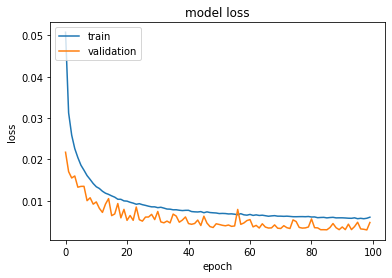

In [60]:
# 3 layer training
cmd = "--train_subjects s01_still --DWI 96 --model fc1d --layer 3 --train --label_type F"
plot_loss(cmd)

In [61]:
# 3 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model fc1d --layer 3 --label_type F"
args = model_parser().parse_args(cmd.split())
test_model(args)

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_30 (InputLayer)        [(None, 96)]              0         
_________________________________________________________________
dense_93 (Dense)             (None, 150)               14550     
_________________________________________________________________
dense_94 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_95 (Dense)             (None, 150)               22650     
_________________________________________________________________
dropout_29 (Dropout)         (None, 150)               0         
_________________________________________________________________
output (Dense)               (None, 1)                 151       
Total params: 60,001
Trainable params: 60,001
Non-trainable params: 0
__

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(0.017321803017234468, -94.37990206538203, 0.9981098171999273)


Text(0.5, 0.98, 'Center slices for s02_still_FWF predicted image')

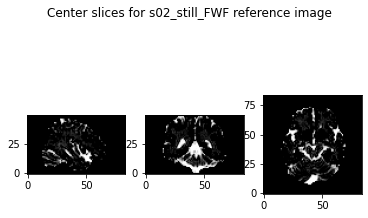

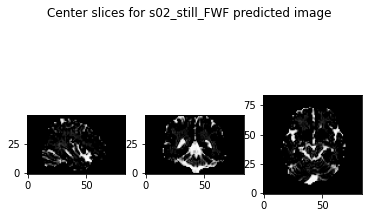

In [62]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-fc1d-3layer.nii'
pred_FWF_img = nib.load(pred_path)
pred_FWF_img_data = pred_FWF_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_FWF_img_data, s02_FWF_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_FWF_img_data[26, :, :]
ref_slice_1 = s02_FWF_img_data[:, 30, :]
ref_slice_2 = s02_FWF_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_FWF reference image")

pred_slice_0 = pred_FWF_img_data[26, :, :]
pred_slice_1 = pred_FWF_img_data[:, 30, :]
pred_slice_2 = pred_FWF_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_FWF predicted image")

<strong>4 layer</strong>

Model: "functional_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_31 (InputLayer)        [(None, 96)]              0         
_________________________________________________________________
dense_96 (Dense)             (None, 150)               14550     
_________________________________________________________________
dense_97 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_98 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_99 (Dense)             (None, 150)               22650     
_________________________________________________________________
dropout_30 (Dropout)         (None, 150)               0         
_________________________________________________________________
output (Dense)               (None, 1)               

2022-03-08 15:14:02.372311: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:14:02.372414: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


 70/260 [=======>......................] - ETA: 0s - loss: 0.0633 - accuracy: 0.3934

2022-03-08 15:14:02.772943: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:14:02.797395: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 15:14:02.797924: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 15:14:02.799899: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_15_14_02
2022-03-08 15:14:02.800585: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_15_14_02/vw.trace.json.gz
2022-03-08 15:14:02.800731: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 15:14:02.801761: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

260/260 [==============================] - 1s 3ms/step - loss: 0.0442 - accuracy: 0.3992 - val_loss: 0.0198 - val_accuracy: 0.4566
Epoch 2/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0274 - accuracy: 0.3996 - val_loss: 0.0161 - val_accuracy: 0.4566
Epoch 3/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0231 - accuracy: 0.3996 - val_loss: 0.0139 - val_accuracy: 0.4566
Epoch 4/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0201 - accuracy: 0.3997 - val_loss: 0.0131 - val_accuracy: 0.4566
Epoch 5/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0180 - accuracy: 0.3996 - val_loss: 0.0114 - val_accuracy: 0.4566
Epoch 6/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0164 - accuracy: 0.3997 - val_loss: 0.0112 - val_accuracy: 0.4566
Epoch 7/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0151 - accuracy: 0.3997 - val_loss: 0.0118 - val_accuracy: 0.4566
Epoch 8/100

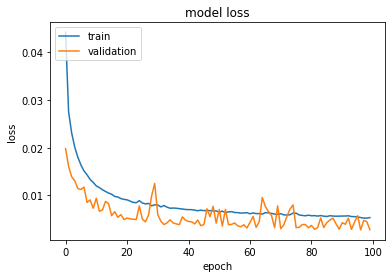

In [63]:
# 4 layer training
cmd = "--train_subjects s01_still --DWI 96 --model fc1d --layer 4 --train --label_type F"
plot_loss(cmd)

In [64]:
# 4 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model fc1d --layer 4 --label_type F"
args = model_parser().parse_args(cmd.split())
test_model(args)

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_32 (InputLayer)        [(None, 96)]              0         
_________________________________________________________________
dense_100 (Dense)            (None, 150)               14550     
_________________________________________________________________
dense_101 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_102 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_103 (Dense)            (None, 150)               22650     
_________________________________________________________________
dropout_31 (Dropout)         (None, 150)               0         
_________________________________________________________________
output

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(0.01269531844771399, -100.59455603845498, 0.9991711345603963)


Text(0.5, 0.98, 'Center slices for s02_still_FWF predicted image')

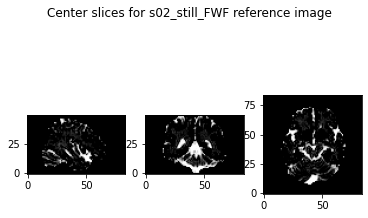

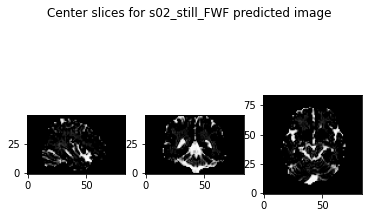

In [65]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-fc1d-4layer.nii'
pred_FWF_img = nib.load(pred_path)
pred_FWF_img_data = pred_FWF_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_FWF_img_data, s02_FWF_img_data, s02_mask_img_data)
print(eval_re)
# evaluate the model# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-fc1d-3layer.nii'
pred_FWF_img = nib.load(pred_path)
pred_FWF_img_data = pred_FWF_img.get_fdata()
# visualise both ref img and pred img
ref_slice_0 = s02_FWF_img_data[26, :, :]
ref_slice_1 = s02_FWF_img_data[:, 30, :]
ref_slice_2 = s02_FWF_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_FWF reference image")

pred_slice_0 = pred_FWF_img_data[26, :, :]
pred_slice_1 = pred_FWF_img_data[:, 30, :]
pred_slice_2 = pred_FWF_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_FWF predicted image")

<strong>5 layer</strong>

Model: "functional_391"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_196 (InputLayer)       [(None, 96)]              0         
_________________________________________________________________
dense_174 (Dense)            (None, 150)               14550     
_________________________________________________________________
dense_175 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_176 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_177 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_178 (Dense)            (None, 150)               22650     
_________________________________________________________________
dropout_195 (Dropout)        (None, 150)            

2022-03-08 19:53:21.402669: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 19:53:21.402852: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 78/260 [========>.....................] - ETA: 0s - loss: 0.0559 - accuracy: 0.4000

2022-03-08 19:53:21.903645: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 19:53:21.922171: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 19:53:21.922461: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 19:53:21.923583: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_19_53_21
2022-03-08 19:53:21.924127: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_19_53_21/vw.trace.json.gz
2022-03-08 19:53:21.924205: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 19:53:21.925060: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

260/260 [==============================] - 1s 2ms/step - loss: 0.0404 - accuracy: 0.3993 - val_loss: 0.0184 - val_accuracy: 0.4566
Epoch 2/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0246 - accuracy: 0.3997 - val_loss: 0.0177 - val_accuracy: 0.4566
Epoch 3/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0204 - accuracy: 0.3997 - val_loss: 0.0166 - val_accuracy: 0.4566
Epoch 4/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0176 - accuracy: 0.3997 - val_loss: 0.0106 - val_accuracy: 0.4566
Epoch 5/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0157 - accuracy: 0.3997 - val_loss: 0.0106 - val_accuracy: 0.4566
Epoch 6/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0145 - accuracy: 0.3997 - val_loss: 0.0088 - val_accuracy: 0.4566
Epoch 7/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0133 - accuracy: 0.3997 - val_loss: 0.0087 - val_accuracy: 0.4566
Epoch 8/100

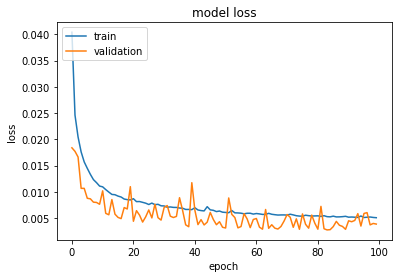

In [229]:
# 5 layer training
cmd = "--train_subjects s01_still --DWI 96 --model fc1d --layer 5 --train --label_type F"
plot_loss(cmd)

In [230]:
# 5 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model fc1d --layer 5 --label_type F"
args = model_parser().parse_args(cmd.split())
test_model(args)

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_393"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_197 (InputLayer)       [(None, 96)]              0         
_________________________________________________________________
dense_179 (Dense)            (None, 150)               14550     
_________________________________________________________________
dense_180 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_181 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_182 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_183 (Dense)            (None, 150)               22650     
_________________________________________________________________
dropo

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(0.013665048802314186, -99.1223942111698, 0.9988636426971969)


Text(0.5, 0.98, 'Center slices for s02_still_FWF predicted image')

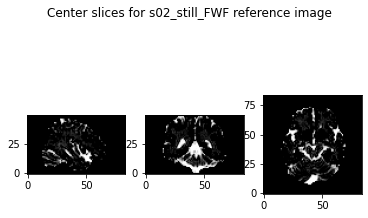

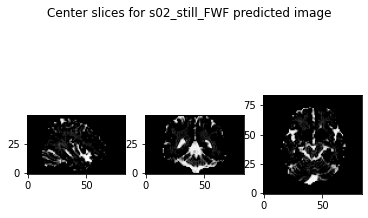

In [231]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-fc1d-5layer.nii'
pred_FWF_img = nib.load(pred_path)
pred_FWF_img_data = pred_FWF_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_FWF_img_data, s02_FWF_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_FWF_img_data[26, :, :]
ref_slice_1 = s02_FWF_img_data[:, 30, :]
ref_slice_2 = s02_FWF_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_FWF reference image")

pred_slice_0 = pred_FWF_img_data[26, :, :]
pred_slice_1 = pred_FWF_img_data[:, 30, :]
pred_slice_2 = pred_FWF_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_FWF predicted image")

<strong>6 layer</strong>

Model: "functional_395"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_198 (InputLayer)       [(None, 96)]              0         
_________________________________________________________________
dense_184 (Dense)            (None, 150)               14550     
_________________________________________________________________
dense_185 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_186 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_187 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_188 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_189 (Dense)            (None, 150)            

2022-03-08 19:55:56.749781: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 19:55:56.749943: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 54/260 [=====>........................] - ETA: 0s - loss: 0.1242 - accuracy: 0.3876

2022-03-08 19:55:57.236425: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 19:55:57.261464: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 19:55:57.261843: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 19:55:57.263441: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_19_55_57
2022-03-08 19:55:57.264196: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_19_55_57/vw.trace.json.gz
2022-03-08 19:55:57.264602: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 19:55:57.266511: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

260/260 [==============================] - 1s 3ms/step - loss: 0.0524 - accuracy: 0.3969 - val_loss: 0.0173 - val_accuracy: 0.4566
Epoch 2/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0220 - accuracy: 0.3996 - val_loss: 0.0137 - val_accuracy: 0.4566
Epoch 3/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0178 - accuracy: 0.3997 - val_loss: 0.0115 - val_accuracy: 0.4566
Epoch 4/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0151 - accuracy: 0.3997 - val_loss: 0.0091 - val_accuracy: 0.4566
Epoch 5/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0138 - accuracy: 0.3997 - val_loss: 0.0106 - val_accuracy: 0.4566
Epoch 6/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0128 - accuracy: 0.3997 - val_loss: 0.0078 - val_accuracy: 0.4566
Epoch 7/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0117 - accuracy: 0.3997 - val_loss: 0.0070 - val_accuracy: 0.4566
Epoch 8/100

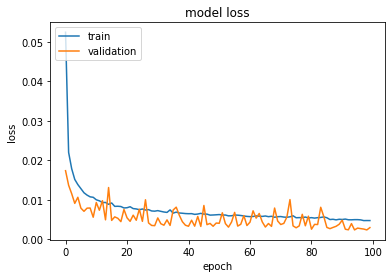

In [232]:
# 6 layer training
cmd = "--train_subjects s01_still --DWI 96 --model fc1d --layer 6 --train --label_type F"
plot_loss(cmd)

In [233]:
# 6 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model fc1d --layer 6 --label_type F"
args = model_parser().parse_args(cmd.split())
test_model(args)

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_397"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_199 (InputLayer)       [(None, 96)]              0         
_________________________________________________________________
dense_190 (Dense)            (None, 150)               14550     
_________________________________________________________________
dense_191 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_192 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_193 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_194 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(0.011806160120567304, -102.04679323778534, 0.9992429460981358)


Text(0.5, 0.98, 'Center slices for s02_still_FWF predicted image')

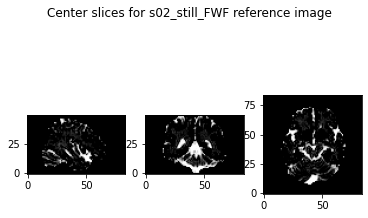

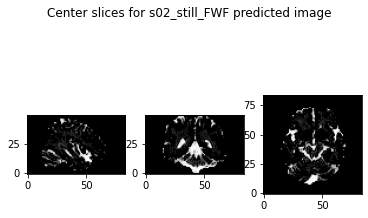

In [234]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-fc1d-6layer.nii'
pred_FWF_img = nib.load(pred_path)
pred_FWF_img_data = pred_FWF_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_FWF_img_data, s02_FWF_img_data, s02_mask_img_data)
print(eval_re)

# visualise both ref img and pred img
ref_slice_0 = s02_FWF_img_data[26, :, :]
ref_slice_1 = s02_FWF_img_data[:, 30, :]
ref_slice_2 = s02_FWF_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_FWF reference image")

pred_slice_0 = pred_FWF_img_data[26, :, :]
pred_slice_1 = pred_FWF_img_data[:, 30, :]
pred_slice_2 = pred_FWF_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_FWF predicted image")

<strong>Training subject: s01_still<br/>

Test subject: s02_still<br/>

Network; 2D-CNN<br/>

Outcome: NDI<br/>


The training data is stored in datasets/data/s01_still-96-first-2d.mat<br/>

The training label is stored in datasets/label/s01_still-NDI-96-first-2d.mat<br/>

The testing data is stored in datasets/data/s02_still-96-first.mat<br/>

The testing label is stored in datasets/label/s02_still-NDI-96-first.mat</strong>


In [72]:
"""
Generate training dataset NDI for 2D CNN.
Using all of the DWI. 96. as training size.
"""
cmd = "--subjects s01_still --nDWI 96 --conv2d_train --label_type N"
args = data_parser().parse_args(cmd.split())
generate_data(args)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
152
425
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
152
425
training dataset has shape:(82641, 3, 3, 96)
training label has shape:(82641, 1, 1, 1)


<strong>Train 2D CNNs with different number of layers.<br/>
Herein, at most 6-hidden-layer 2D CNNs are trained.<br/>
Loss curve for each 2D CNN is plotted.<br/>
The test result is also generated -- evaluation method used is RMSE between pred and reference.<br/>
The reference image and the genereated image are displayed side by side</strong>

<strong>1 layer</strong>

Model: "functional_73"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_37 (InputLayer)        [(None, 3, 3, 96)]        0         
_________________________________________________________________
conv2d (Conv2D)              (None, 1, 1, 150)         129750    
_________________________________________________________________
dropout_36 (Dropout)         (None, 1, 1, 150)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 1, 1)           151       
Total params: 129,901
Trainable params: 129,901
Non-trainable params: 0
_________________________________________________________________
['N']
Training start ...


2022-03-08 15:16:05.065559: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:16:05.065664: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 59/259 [=====>........................] - ETA: 0s - loss: 0.5204 - accuracy: 0.0183

2022-03-08 15:16:05.573408: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:16:05.601265: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 15:16:05.601528: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 15:16:05.602652: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_15_16_05
2022-03-08 15:16:05.603175: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_15_16_05/vw.trace.json.gz
2022-03-08 15:16:05.603256: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 15:16:05.604095: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

259/259 [==============================] - 1s 3ms/step - loss: 0.5014 - accuracy: 0.0167 - val_loss: 0.4466 - val_accuracy: 0.0041
Epoch 2/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4944 - accuracy: 0.0175 - val_loss: 0.4467 - val_accuracy: 0.0041
Epoch 3/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4937 - accuracy: 0.0184 - val_loss: 0.4464 - val_accuracy: 0.0041
Epoch 4/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4926 - accuracy: 0.0191 - val_loss: 0.4470 - val_accuracy: 0.0041
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4927 - accuracy: 0.0190 - val_loss: 0.4469 - val_accuracy: 0.0041
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4919 - accuracy: 0.0198 - val_loss: 0.4465 - val_accuracy: 0.0041
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4905 - accuracy: 0.0204 - val_loss: 0.4443 - val_accuracy: 0.0043
Epoch 8/100

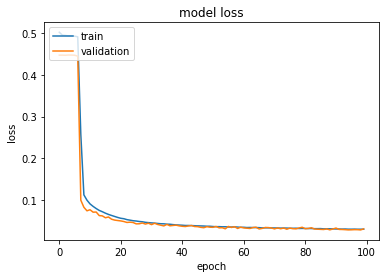

In [73]:
# 1 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv2d --layer 1 --train --label_type N"
plot_loss(cmd)

In [74]:
# 1 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv2d --layer 1 --label_type N"
args = model_parser().parse_args(cmd.split())
test_model(args)

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_75"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_38 (InputLayer)        [(None, 84, 50, 96)]      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 84, 50, 150)       129750    
_________________________________________________________________
dropout_37 (Dropout)         (None, 84, 50, 150)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 84, 50, 1)         151       
Total params: 129,901
Trainable params: 129,901
Non-trainable params: 0
_________________________________________________________________
(84, 84, 50, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
0.19420670940575965


Model: "functional_399"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_200 (InputLayer)       [(None, 3, 3, 96)]        0         
_________________________________________________________________
conv2d_368 (Conv2D)          (None, 3, 3, 150)         14550     
_________________________________________________________________
conv2d_369 (Conv2D)          (None, 1, 1, 150)         202650    
_________________________________________________________________
dropout_199 (Dropout)        (None, 1, 1, 150)         0         
_________________________________________________________________
conv2d_370 (Conv2D)          (None, 1, 1, 1)           151       
Total params: 217,351
Trainable params: 217,351
Non-trainable params: 0
_________________________________________________________________
['N']
Training start ...


2022-03-08 20:14:16.667946: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 20:14:16.668034: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 30/259 [==>...........................] - ETA: 1s - loss: 0.4994 - accuracy: 0.0163

2022-03-08 20:14:17.287971: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 20:14:17.314517: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 20:14:17.314783: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 20:14:17.315822: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_20_14_17
2022-03-08 20:14:17.316285: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_20_14_17/vw.trace.json.gz
2022-03-08 20:14:17.316350: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 20:14:17.317039: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

259/259 [==============================] - 2s 6ms/step - loss: 0.4310 - accuracy: 0.0200 - val_loss: 0.1335 - val_accuracy: 0.0045
Epoch 2/100
259/259 [==============================] - 1s 6ms/step - loss: 0.1178 - accuracy: 0.0258 - val_loss: 0.0819 - val_accuracy: 0.0051
Epoch 3/100
259/259 [==============================] - 2s 6ms/step - loss: 0.0942 - accuracy: 0.0287 - val_loss: 0.0768 - val_accuracy: 0.0047
Epoch 4/100
259/259 [==============================] - 1s 5ms/step - loss: 0.0849 - accuracy: 0.0307 - val_loss: 0.0692 - val_accuracy: 0.0049
Epoch 5/100
259/259 [==============================] - 1s 6ms/step - loss: 0.0788 - accuracy: 0.0317 - val_loss: 0.0640 - val_accuracy: 0.0048
Epoch 6/100
259/259 [==============================] - 2s 6ms/step - loss: 0.0736 - accuracy: 0.0329 - val_loss: 0.0598 - val_accuracy: 0.0048
Epoch 7/100
259/259 [==============================] - 1s 5ms/step - loss: 0.0695 - accuracy: 0.0336 - val_loss: 0.0603 - val_accuracy: 0.0054
Epoch 8/100

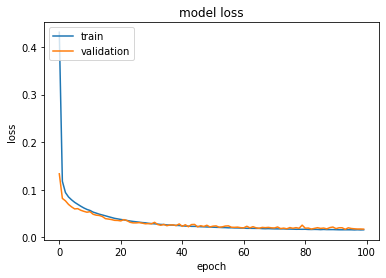

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_401"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_201 (InputLayer)       [(None, 84, 50, 96)]      0         
_________________________________________________________________
conv2d_371 (Conv2D)          (None, 84, 50, 150)       14550     
_________________________________________________________________
conv2d_372 (Conv2D)          (None, 84, 50, 150)       202650    
_________________________________________________________________
dropout_200 (Dropout)        (None, 84, 50, 150)       0         
_________________________________________________________________
conv2d_373 (Conv2D)          (None, 84, 50, 1)         151       
Total params: 217,351
Trainable params: 217,351
Non-trainable params: 0
_________________________________________________________________
(84, 84, 50, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
0

In [235]:
# train and test the conv2d_new model
cmd = "--train_subjects s01_still --DWI 96 --model conv2d_new --layer 1 --train --label_type N"
plot_loss(cmd)
cmd = "--test_subjects s02_still --DWI 96 --model conv2d_new --layer 1 --label_type N"
args = model_parser().parse_args(cmd.split())
test_model(args)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for old model: (0.19420670940575965, -46.0407599598027, 0.9093448580943275)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for new model: (0.15229093974707472, -50.90336666729979, 0.9422378053779077)


Text(0.5, 0.98, 'Center slices for s02_still_NDI predicted by new model image')

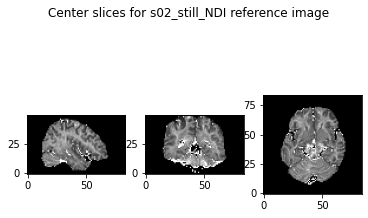

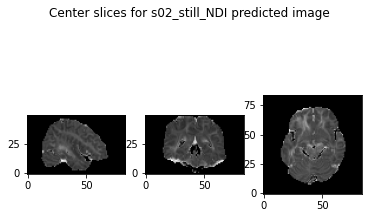

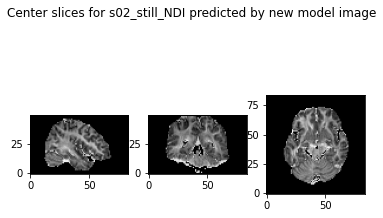

In [236]:
# load the reference img and pred imgs (the one generated from old model and new model)
pred_path = '../Net-DTI/nii/s02_still-NDI-96-first-conv2d-1layer.nii'
pred_NDI_img = nib.load(pred_path)
pred_NDI_img_data = pred_NDI_img.get_fdata()
new_pred_path = '../Net-DTI/nii/s02_still-NDI-96-first-conv2d_new-1layer.nii'
new_pred_NDI_img = nib.load(new_pred_path)
new_pred_NDI_img_data = new_pred_NDI_img.get_fdata()


# evaluate the model
eval_re = evaluate_model(pred_NDI_img_data, s02_NDI_img_data, s02_mask_img_data)
print("evaluation score for old model: " + str(eval_re))
new_eval_re = evaluate_model(new_pred_NDI_img_data, s02_NDI_img_data, s02_mask_img_data)
print("evaluation score for new model: " + str(new_eval_re))

# visualise both ref img and pred img
ref_slice_0 = s02_NDI_img_data[26, :, :]
ref_slice_1 = s02_NDI_img_data[:, 30, :]
ref_slice_2 = s02_NDI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_NDI reference image")

pred_slice_0 = pred_NDI_img_data[26, :, :]
pred_slice_1 = pred_NDI_img_data[:, 30, :]
pred_slice_2 = pred_NDI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_NDI predicted image")

new_pred_slice_0 = new_pred_NDI_img_data[26, :, :]
new_pred_slice_1 = new_pred_NDI_img_data[:, 30, :]
new_pred_slice_2 = new_pred_NDI_img_data[:, :, 16]
show_slices([new_pred_slice_0, new_pred_slice_1, new_pred_slice_2])
plt.suptitle("Center slices for s02_still_NDI predicted by new model image")

<strong>2 layer</strong>

Model: "functional_81"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_41 (InputLayer)        [(None, 3, 3, 96)]        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 1, 1, 150)         129750    
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 1, 1, 200)         30200     
_________________________________________________________________
dropout_40 (Dropout)         (None, 1, 1, 200)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 1, 1, 1)           201       
Total params: 160,151
Trainable params: 160,151
Non-trainable params: 0
_________________________________________________________________
['N']
Training start ...


2022-03-08 15:18:09.445957: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:18:09.446051: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 45/259 [====>.........................] - ETA: 0s - loss: 0.5221 - accuracy: 0.0148

2022-03-08 15:18:09.999902: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:18:10.028793: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 15:18:10.029106: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 15:18:10.030337: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_15_18_10
2022-03-08 15:18:10.030916: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_15_18_10/vw.trace.json.gz
2022-03-08 15:18:10.030998: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 15:18:10.031886: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

259/259 [==============================] - 1s 4ms/step - loss: 0.4971 - accuracy: 0.0181 - val_loss: 0.4467 - val_accuracy: 0.0041
Epoch 2/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3740 - accuracy: 0.0214 - val_loss: 0.1226 - val_accuracy: 0.0048
Epoch 3/100
259/259 [==============================] - 1s 4ms/step - loss: 0.1254 - accuracy: 0.0258 - val_loss: 0.0910 - val_accuracy: 0.0047
Epoch 4/100
259/259 [==============================] - 1s 3ms/step - loss: 0.1024 - accuracy: 0.0283 - val_loss: 0.0866 - val_accuracy: 0.0050
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.0913 - accuracy: 0.0313 - val_loss: 0.0763 - val_accuracy: 0.0050
Epoch 6/100
259/259 [==============================] - 1s 4ms/step - loss: 0.0847 - accuracy: 0.0320 - val_loss: 0.0732 - val_accuracy: 0.0055
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.0783 - accuracy: 0.0333 - val_loss: 0.0682 - val_accuracy: 0.0051
Epoch 8/100

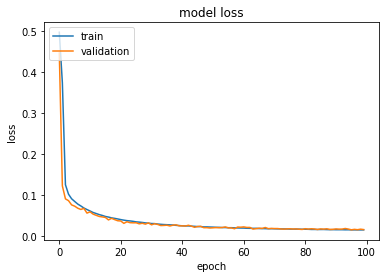

In [77]:
# 2 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv2d --layer 2 --train --label_type N"
plot_loss(cmd)

In [78]:
# 2 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv2d --layer 2 --label_type N"
args = model_parser().parse_args(cmd.split())
test_model(args)

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_83"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_42 (InputLayer)        [(None, 84, 50, 96)]      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 84, 50, 150)       129750    
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 84, 50, 200)       30200     
_________________________________________________________________
dropout_41 (Dropout)         (None, 84, 50, 200)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 84, 50, 1)         201       
Total params: 160,151
Trainable params: 160,151
Non-trainable params: 0
_________________________________________________________________
(84, 84, 50, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
0.

Model: "functional_85"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_43 (InputLayer)        [(None, 3, 3, 96)]        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 3, 3, 150)         14550     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 1, 1, 150)         202650    
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 1, 1, 200)         30200     
_________________________________________________________________
dropout_42 (Dropout)         (None, 1, 1, 200)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 1, 1, 1)           201       
Total params: 247,601
Trainable params: 247,601
Non-trainable params: 0
_______________________________________________

2022-03-08 15:19:38.173622: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:19:38.173724: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 18/259 [=>............................] - ETA: 2s - loss: 0.5181 - accuracy: 0.0122

2022-03-08 15:19:38.885419: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:19:38.924269: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 15:19:38.924661: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 15:19:38.926290: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_15_19_38
2022-03-08 15:19:38.927001: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_15_19_38/vw.trace.json.gz
2022-03-08 15:19:38.927125: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 15:19:38.928315: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

259/259 [==============================] - 2s 9ms/step - loss: 0.2625 - accuracy: 0.0219 - val_loss: 0.1022 - val_accuracy: 0.0047
Epoch 2/100
259/259 [==============================] - 2s 8ms/step - loss: 0.1032 - accuracy: 0.0285 - val_loss: 0.0954 - val_accuracy: 0.0047
Epoch 3/100
259/259 [==============================] - 2s 8ms/step - loss: 0.0859 - accuracy: 0.0313 - val_loss: 0.0732 - val_accuracy: 0.0047
Epoch 4/100
259/259 [==============================] - 2s 8ms/step - loss: 0.0768 - accuracy: 0.0334 - val_loss: 0.0641 - val_accuracy: 0.0051
Epoch 5/100
259/259 [==============================] - 2s 8ms/step - loss: 0.0697 - accuracy: 0.0349 - val_loss: 0.0576 - val_accuracy: 0.0050
Epoch 6/100
259/259 [==============================] - 2s 8ms/step - loss: 0.0642 - accuracy: 0.0363 - val_loss: 0.0590 - val_accuracy: 0.0050
Epoch 7/100
259/259 [==============================] - 2s 7ms/step - loss: 0.0596 - accuracy: 0.0368 - val_loss: 0.0676 - val_accuracy: 0.0057
Epoch 8/100

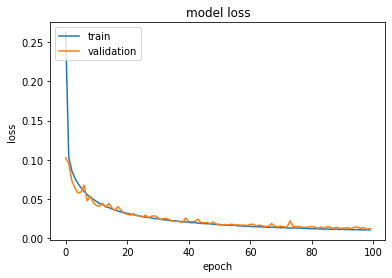

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_87"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_44 (InputLayer)        [(None, 84, 50, 96)]      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 84, 50, 150)       14550     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 84, 50, 150)       202650    
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 84, 50, 200)       30200     
_________________________________________________________________
dropout_43 (Dropout)         (None, 84, 50, 200)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 84, 50, 1)         201       
Total params: 247,601
Trainable params: 247,601
Non-trainable params: 0


In [79]:
# train and test the conv2d_new model
cmd = "--train_subjects s01_still --DWI 96 --model conv2d_new --layer 2 --train --label_type N"
plot_loss(cmd)
cmd = "--test_subjects s02_still --DWI 96 --model conv2d_new --layer 2 --label_type N"
args = model_parser().parse_args(cmd.split())
test_model(args)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for old model: (0.20751736081798328, -44.71492199007688, 0.9039609574766408)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for new model: (0.14016883403333155, -52.562268970254415, 0.9540811014758104)


Text(0.5, 0.98, 'Center slices for s02_still_NDI predicted by new model image')

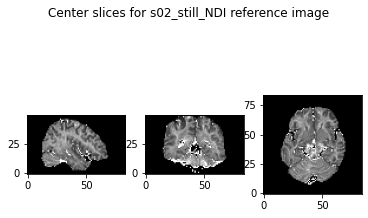

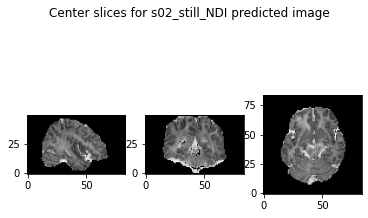

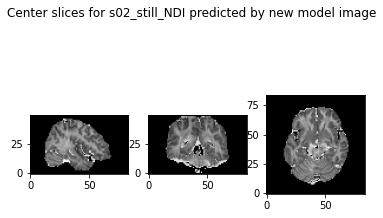

In [80]:
# load the reference img and pred imgs (the one generated from old model and new model)
pred_path = '../Net-DTI/nii/s02_still-NDI-96-first-conv2d-2layer.nii'
pred_NDI_img = nib.load(pred_path)
pred_NDI_img_data = pred_NDI_img.get_fdata()
new_pred_path = '../Net-DTI/nii/s02_still-NDI-96-first-conv2d_new-2layer.nii'
new_pred_NDI_img = nib.load(new_pred_path)
new_pred_NDI_img_data = new_pred_NDI_img.get_fdata()


# evaluate the model
eval_re = evaluate_model(pred_NDI_img_data, s02_NDI_img_data, s02_mask_img_data)
print("evaluation score for old model: " + str(eval_re))
new_eval_re = evaluate_model(new_pred_NDI_img_data, s02_NDI_img_data, s02_mask_img_data)
print("evaluation score for new model: " + str(new_eval_re))

# visualise both ref img and pred img
ref_slice_0 = s02_NDI_img_data[26, :, :]
ref_slice_1 = s02_NDI_img_data[:, 30, :]
ref_slice_2 = s02_NDI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_NDI reference image")

pred_slice_0 = pred_NDI_img_data[26, :, :]
pred_slice_1 = pred_NDI_img_data[:, 30, :]
pred_slice_2 = pred_NDI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_NDI predicted image")

new_pred_slice_0 = new_pred_NDI_img_data[26, :, :]
new_pred_slice_1 = new_pred_NDI_img_data[:, 30, :]
new_pred_slice_2 = new_pred_NDI_img_data[:, :, 16]
show_slices([new_pred_slice_0, new_pred_slice_1, new_pred_slice_2])
plt.suptitle("Center slices for s02_still_NDI predicted by new model image")

<strong>3 layer</strong>

Model: "functional_89"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_45 (InputLayer)        [(None, 3, 3, 96)]        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 1, 1, 150)         129750    
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 1, 1, 200)         30200     
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 1, 1, 200)         40200     
_________________________________________________________________
dropout_44 (Dropout)         (None, 1, 1, 200)         0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 1, 1, 1)           201       
Total params: 200,351
Trainable params: 200,351
Non-trainable params: 0
_______________________________________________

2022-03-08 15:22:51.643149: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:22:51.643235: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 32/259 [==>...........................] - ETA: 1s - loss: 0.6008 - accuracy: 0.0154

2022-03-08 15:22:52.255655: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:22:52.283161: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 15:22:52.283665: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 15:22:52.285684: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_15_22_52
2022-03-08 15:22:52.286525: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_15_22_52/vw.trace.json.gz
2022-03-08 15:22:52.286740: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 15:22:52.288226: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

259/259 [==============================] - 1s 5ms/step - loss: 0.4433 - accuracy: 0.0188 - val_loss: 0.1185 - val_accuracy: 0.0050
Epoch 2/100
259/259 [==============================] - 1s 5ms/step - loss: 0.1295 - accuracy: 0.0251 - val_loss: 0.0919 - val_accuracy: 0.0047
Epoch 3/100
259/259 [==============================] - 1s 5ms/step - loss: 0.0990 - accuracy: 0.0276 - val_loss: 0.0871 - val_accuracy: 0.0051
Epoch 4/100
259/259 [==============================] - 1s 5ms/step - loss: 0.0875 - accuracy: 0.0291 - val_loss: 0.0746 - val_accuracy: 0.0051
Epoch 5/100
259/259 [==============================] - 1s 4ms/step - loss: 0.0798 - accuracy: 0.0313 - val_loss: 0.0662 - val_accuracy: 0.0048
Epoch 6/100
259/259 [==============================] - 1s 4ms/step - loss: 0.0732 - accuracy: 0.0327 - val_loss: 0.0623 - val_accuracy: 0.0050
Epoch 7/100
259/259 [==============================] - 1s 4ms/step - loss: 0.0678 - accuracy: 0.0341 - val_loss: 0.0612 - val_accuracy: 0.0053
Epoch 8/100

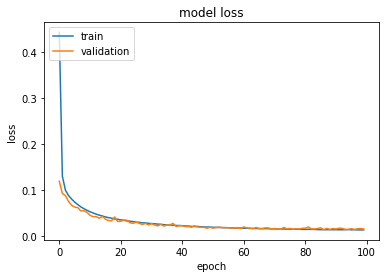

In [81]:
# 3 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv2d --layer 3 --train --label_type N"
plot_loss(cmd)

In [82]:
# 3 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv2d --layer 3 --label_type N"
args = model_parser().parse_args(cmd.split())
test_model(args)

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_91"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_46 (InputLayer)        [(None, 84, 50, 96)]      0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 84, 50, 150)       129750    
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 84, 50, 200)       30200     
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 84, 50, 200)       40200     
_________________________________________________________________
dropout_45 (Dropout)         (None, 84, 50, 200)       0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 84, 50, 1)         201       
Total params: 200,351
Trainable params: 200,351
Non-trainable params: 0


Model: "functional_93"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_47 (InputLayer)        [(None, 3, 3, 96)]        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 3, 3, 150)         14550     
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 1, 1, 150)         202650    
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 1, 1, 200)         30200     
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 1, 1, 200)         40200     
_________________________________________________________________
dropout_46 (Dropout)         (None, 1, 1, 200)         0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 1, 1, 1)         

2022-03-08 15:24:46.324016: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:24:46.324114: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 18/259 [=>............................] - ETA: 2s - loss: 0.2473 - accuracy: 0.0184

2022-03-08 15:24:46.996725: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:24:47.035332: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 15:24:47.035680: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 15:24:47.037016: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_15_24_47
2022-03-08 15:24:47.037751: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_15_24_47/vw.trace.json.gz
2022-03-08 15:24:47.037865: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 15:24:47.038867: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

259/259 [==============================] - 3s 10ms/step - loss: 0.1253 - accuracy: 0.0242 - val_loss: 0.0760 - val_accuracy: 0.0054
Epoch 2/100
259/259 [==============================] - 2s 9ms/step - loss: 0.0844 - accuracy: 0.0306 - val_loss: 0.0658 - val_accuracy: 0.0054
Epoch 3/100
259/259 [==============================] - 2s 9ms/step - loss: 0.0707 - accuracy: 0.0332 - val_loss: 0.0536 - val_accuracy: 0.0050
Epoch 4/100
259/259 [==============================] - 2s 9ms/step - loss: 0.0608 - accuracy: 0.0350 - val_loss: 0.0597 - val_accuracy: 0.0056
Epoch 5/100
259/259 [==============================] - 2s 9ms/step - loss: 0.0540 - accuracy: 0.0362 - val_loss: 0.0446 - val_accuracy: 0.0061
Epoch 6/100
259/259 [==============================] - 2s 9ms/step - loss: 0.0487 - accuracy: 0.0370 - val_loss: 0.0393 - val_accuracy: 0.0062
Epoch 7/100
259/259 [==============================] - 2s 9ms/step - loss: 0.0440 - accuracy: 0.0378 - val_loss: 0.0394 - val_accuracy: 0.0060
Epoch 8/10

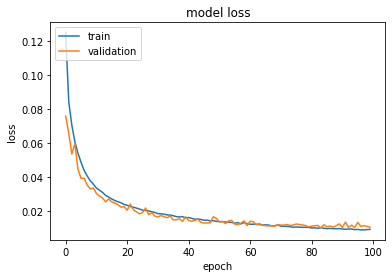

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_95"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_48 (InputLayer)        [(None, 84, 50, 96)]      0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 84, 50, 150)       14550     
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 84, 50, 150)       202650    
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 84, 50, 200)       30200     
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 84, 50, 200)       40200     
_________________________________________________________________
dropout_47 (Dropout)         (None, 84, 50, 200)       0         
_________________________________________________________________
conv2d

In [83]:
# train and test the conv2d_new model
cmd = "--train_subjects s01_still --DWI 96 --model conv2d_new --layer 3 --train --label_type N"
plot_loss(cmd)
cmd = "--test_subjects s02_still --DWI 96 --model conv2d_new --layer 3 --label_type N"
args = model_parser().parse_args(cmd.split())
test_model(args)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for old model: (0.1805168016069443, -47.502744899848565, 0.9254406701257267)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for new model: (0.1395353186637976, -52.652867046297416, 0.9527590479012434)


Text(0.5, 0.98, 'Center slices for s02_still_NDI predicted by new model image')

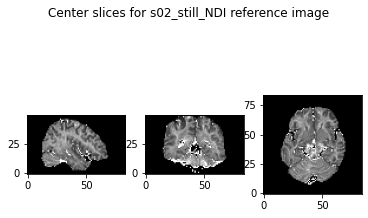

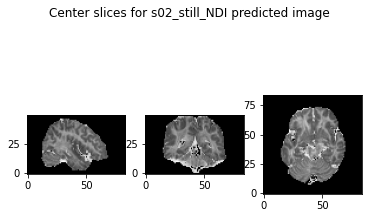

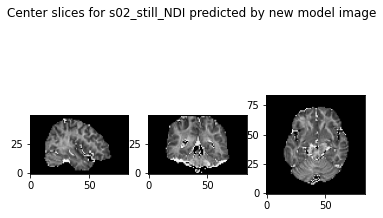

In [84]:
# load the reference img and pred imgs (the one generated from old model and new model)
pred_path = '../Net-DTI/nii/s02_still-NDI-96-first-conv2d-3layer.nii'
pred_NDI_img = nib.load(pred_path)
pred_NDI_img_data = pred_NDI_img.get_fdata()
new_pred_path = '../Net-DTI/nii/s02_still-NDI-96-first-conv2d_new-3layer.nii'
new_pred_NDI_img = nib.load(new_pred_path)
new_pred_NDI_img_data = new_pred_NDI_img.get_fdata()


# evaluate the model
eval_re = evaluate_model(pred_NDI_img_data, s02_NDI_img_data, s02_mask_img_data)
print("evaluation score for old model: " + str(eval_re))
new_eval_re = evaluate_model(new_pred_NDI_img_data, s02_NDI_img_data, s02_mask_img_data)
print("evaluation score for new model: " + str(new_eval_re))

# visualise both ref img and pred img
ref_slice_0 = s02_NDI_img_data[26, :, :]
ref_slice_1 = s02_NDI_img_data[:, 30, :]
ref_slice_2 = s02_NDI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_NDI reference image")

pred_slice_0 = pred_NDI_img_data[26, :, :]
pred_slice_1 = pred_NDI_img_data[:, 30, :]
pred_slice_2 = pred_NDI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_NDI predicted image")

new_pred_slice_0 = new_pred_NDI_img_data[26, :, :]
new_pred_slice_1 = new_pred_NDI_img_data[:, 30, :]
new_pred_slice_2 = new_pred_NDI_img_data[:, :, 16]
show_slices([new_pred_slice_0, new_pred_slice_1, new_pred_slice_2])
plt.suptitle("Center slices for s02_still_NDI predicted by new model image")

<strong>4 layer</strong>

Model: "functional_97"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_49 (InputLayer)        [(None, 3, 3, 96)]        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 1, 1, 150)         129750    
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 1, 1, 200)         30200     
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 1, 1, 200)         40200     
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 1, 1, 200)         40200     
_________________________________________________________________
dropout_48 (Dropout)         (None, 1, 1, 200)         0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 1, 1, 1)         

2022-03-08 15:28:25.009897: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:28:25.010001: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 28/259 [==>...........................] - ETA: 1s - loss: 0.4109 - accuracy: 0.0123

2022-03-08 15:28:25.638684: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:28:25.666921: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 15:28:25.667278: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 15:28:25.668676: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_15_28_25
2022-03-08 15:28:25.669360: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_15_28_25/vw.trace.json.gz
2022-03-08 15:28:25.669474: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 15:28:25.670521: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

259/259 [==============================] - 2s 6ms/step - loss: 0.1644 - accuracy: 0.0225 - val_loss: 0.0814 - val_accuracy: 0.0050
Epoch 2/100
259/259 [==============================] - 1s 6ms/step - loss: 0.0927 - accuracy: 0.0286 - val_loss: 0.0711 - val_accuracy: 0.0050
Epoch 3/100
259/259 [==============================] - 1s 6ms/step - loss: 0.0782 - accuracy: 0.0312 - val_loss: 0.0644 - val_accuracy: 0.0051
Epoch 4/100
259/259 [==============================] - 1s 5ms/step - loss: 0.0681 - accuracy: 0.0329 - val_loss: 0.0563 - val_accuracy: 0.0051
Epoch 5/100
259/259 [==============================] - 1s 5ms/step - loss: 0.0612 - accuracy: 0.0344 - val_loss: 0.0555 - val_accuracy: 0.0053
Epoch 6/100
259/259 [==============================] - 1s 5ms/step - loss: 0.0554 - accuracy: 0.0353 - val_loss: 0.0474 - val_accuracy: 0.0053
Epoch 7/100
259/259 [==============================] - 1s 6ms/step - loss: 0.0512 - accuracy: 0.0364 - val_loss: 0.0503 - val_accuracy: 0.0055
Epoch 8/100

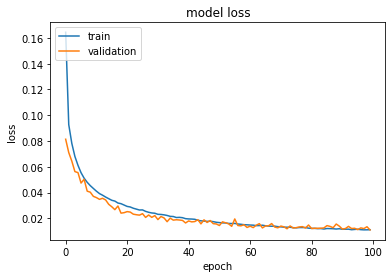

In [85]:
# 4 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv2d --layer 4 --train --label_type N"
plot_loss(cmd)

In [86]:
# 4 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv2d --layer 4 --label_type N"
args = model_parser().parse_args(cmd.split())
test_model(args)

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_99"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_50 (InputLayer)        [(None, 84, 50, 96)]      0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 84, 50, 150)       129750    
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 84, 50, 200)       30200     
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 84, 50, 200)       40200     
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 84, 50, 200)       40200     
_________________________________________________________________
dropout_49 (Dropout)         (None, 84, 50, 200)       0         
_________________________________________________________________
conv2d

Model: "functional_101"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_51 (InputLayer)        [(None, 3, 3, 96)]        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 3, 3, 150)         14550     
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 1, 1, 150)         202650    
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 1, 1, 200)         30200     
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 1, 1, 200)         40200     
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 1, 1, 200)         40200     
_________________________________________________________________
dropout_50 (Dropout)         (None, 1, 1, 200)      

2022-03-08 15:30:45.701551: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:30:45.701645: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 17/259 [>.............................] - ETA: 2s - loss: 0.2096 - accuracy: 0.0177

2022-03-08 15:30:46.321038: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:30:46.354111: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 15:30:46.354452: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 15:30:46.355815: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_15_30_46
2022-03-08 15:30:46.356519: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_15_30_46/vw.trace.json.gz
2022-03-08 15:30:46.356615: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 15:30:46.357617: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

259/259 [==============================] - 3s 11ms/step - loss: 0.1151 - accuracy: 0.0255 - val_loss: 0.0719 - val_accuracy: 0.0047
Epoch 2/100
259/259 [==============================] - 3s 10ms/step - loss: 0.0798 - accuracy: 0.0315 - val_loss: 0.0611 - val_accuracy: 0.0048
Epoch 3/100
259/259 [==============================] - 2s 10ms/step - loss: 0.0667 - accuracy: 0.0342 - val_loss: 0.0527 - val_accuracy: 0.0053
Epoch 4/100
259/259 [==============================] - 3s 10ms/step - loss: 0.0580 - accuracy: 0.0353 - val_loss: 0.0528 - val_accuracy: 0.0053
Epoch 5/100
259/259 [==============================] - 2s 9ms/step - loss: 0.0517 - accuracy: 0.0364 - val_loss: 0.0448 - val_accuracy: 0.0062
Epoch 6/100
259/259 [==============================] - 3s 10ms/step - loss: 0.0465 - accuracy: 0.0373 - val_loss: 0.0420 - val_accuracy: 0.0067
Epoch 7/100
259/259 [==============================] - 2s 9ms/step - loss: 0.0426 - accuracy: 0.0381 - val_loss: 0.0422 - val_accuracy: 0.0065
Epoch 

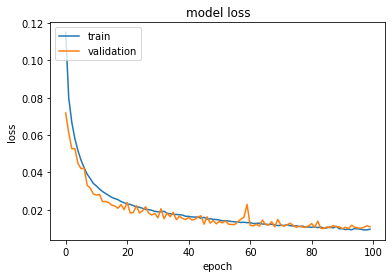

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_103"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_52 (InputLayer)        [(None, 84, 50, 96)]      0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 84, 50, 150)       14550     
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 84, 50, 150)       202650    
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 84, 50, 200)       30200     
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 84, 50, 200)       40200     
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 84, 50, 200)       40200     
_________________________________________________________________
dropo

In [87]:
# train and test the conv2d_new model
cmd = "--train_subjects s01_still --DWI 96 --model conv2d_new --layer 4 --train --label_type N"
plot_loss(cmd)
cmd = "--test_subjects s02_still --DWI 96 --model conv2d_new --layer 4 --label_type N"
args = model_parser().parse_args(cmd.split())
test_model(args)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for old model: (0.17587688192858764, -48.02353772702706, 0.9294322110567965)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for new model: (0.14553140278155025, -51.81138423892883, 0.9492978227265831)


Text(0.5, 0.98, 'Center slices for s02_still_NDI predicted by new model image')

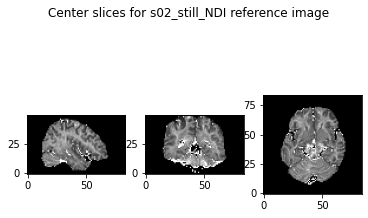

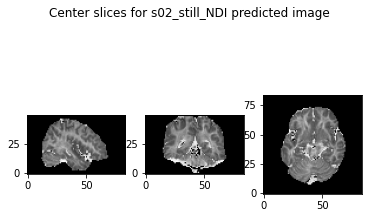

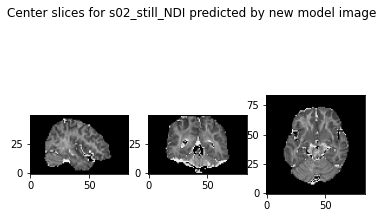

In [88]:
# load the reference img and pred imgs (the one generated from old model and new model)
pred_path = '../Net-DTI/nii/s02_still-NDI-96-first-conv2d-4layer.nii'
pred_NDI_img = nib.load(pred_path)
pred_NDI_img_data = pred_NDI_img.get_fdata()
new_pred_path = '../Net-DTI/nii/s02_still-NDI-96-first-conv2d_new-4layer.nii'
new_pred_NDI_img = nib.load(new_pred_path)
new_pred_NDI_img_data = new_pred_NDI_img.get_fdata()


# evaluate the model
eval_re = evaluate_model(pred_NDI_img_data, s02_NDI_img_data, s02_mask_img_data)
print("evaluation score for old model: " + str(eval_re))
new_eval_re = evaluate_model(new_pred_NDI_img_data, s02_NDI_img_data, s02_mask_img_data)
print("evaluation score for new model: " + str(new_eval_re))

# visualise both ref img and pred img
ref_slice_0 = s02_NDI_img_data[26, :, :]
ref_slice_1 = s02_NDI_img_data[:, 30, :]
ref_slice_2 = s02_NDI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_NDI reference image")

pred_slice_0 = pred_NDI_img_data[26, :, :]
pred_slice_1 = pred_NDI_img_data[:, 30, :]
pred_slice_2 = pred_NDI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_NDI predicted image")

new_pred_slice_0 = new_pred_NDI_img_data[26, :, :]
new_pred_slice_1 = new_pred_NDI_img_data[:, 30, :]
new_pred_slice_2 = new_pred_NDI_img_data[:, :, 16]
show_slices([new_pred_slice_0, new_pred_slice_1, new_pred_slice_2])
plt.suptitle("Center slices for s02_still_NDI predicted by new model image")

<strong>5 layer</strong>

Model: "functional_105"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_53 (InputLayer)        [(None, 3, 3, 96)]        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 1, 1, 150)         129750    
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 1, 1, 200)         30200     
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 1, 1, 200)         40200     
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 1, 1, 200)         40200     
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 1, 1, 200)         40200     
_________________________________________________________________
dropout_52 (Dropout)         (None, 1, 1, 200)      

2022-03-08 15:34:48.359854: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:34:48.359960: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 22/259 [=>............................] - ETA: 1s - loss: 0.2737 - accuracy: 0.0204

2022-03-08 15:34:49.092089: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:34:49.139689: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 15:34:49.140142: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 15:34:49.141989: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_15_34_49
2022-03-08 15:34:49.142815: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_15_34_49/vw.trace.json.gz
2022-03-08 15:34:49.142976: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 15:34:49.144338: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

259/259 [==============================] - 2s 7ms/step - loss: 0.1300 - accuracy: 0.0226 - val_loss: 0.0807 - val_accuracy: 0.0048
Epoch 2/100
259/259 [==============================] - 2s 6ms/step - loss: 0.0860 - accuracy: 0.0285 - val_loss: 0.0676 - val_accuracy: 0.0047
Epoch 3/100
259/259 [==============================] - 2s 7ms/step - loss: 0.0719 - accuracy: 0.0315 - val_loss: 0.0575 - val_accuracy: 0.0050
Epoch 4/100
259/259 [==============================] - 2s 7ms/step - loss: 0.0629 - accuracy: 0.0332 - val_loss: 0.0496 - val_accuracy: 0.0050
Epoch 5/100
259/259 [==============================] - 2s 6ms/step - loss: 0.0560 - accuracy: 0.0345 - val_loss: 0.0503 - val_accuracy: 0.0050
Epoch 6/100
259/259 [==============================] - 2s 6ms/step - loss: 0.0514 - accuracy: 0.0358 - val_loss: 0.0424 - val_accuracy: 0.0054
Epoch 7/100
259/259 [==============================] - 2s 7ms/step - loss: 0.0478 - accuracy: 0.0366 - val_loss: 0.0518 - val_accuracy: 0.0056
Epoch 8/100

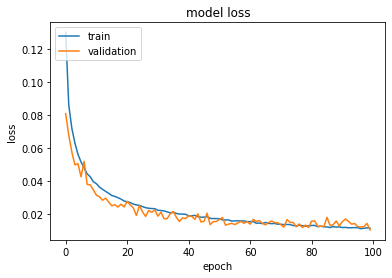

In [89]:
# 5 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv2d --layer 5 --train --label_type N"
plot_loss(cmd)

In [90]:
# 5 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv2d --layer 5 --label_type N"
args = model_parser().parse_args(cmd.split())
test_model(args)

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_107"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_54 (InputLayer)        [(None, 84, 50, 96)]      0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 84, 50, 150)       129750    
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 84, 50, 200)       30200     
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 84, 50, 200)       40200     
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 84, 50, 200)       40200     
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 84, 50, 200)       40200     
_________________________________________________________________
dropo

Model: "functional_109"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_55 (InputLayer)        [(None, 3, 3, 96)]        0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 3, 3, 150)         14550     
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 1, 1, 150)         202650    
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 1, 1, 200)         30200     
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 1, 1, 200)         40200     
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 1, 1, 200)         40200     
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 1, 1, 200)      

2022-03-08 15:37:33.382678: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:37:33.382768: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 15/259 [>.............................] - ETA: 2s - loss: 0.4136 - accuracy: 0.0102

2022-03-08 15:37:34.116193: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:37:34.158342: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 15:37:34.158817: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 15:37:34.160550: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_15_37_34
2022-03-08 15:37:34.161407: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_15_37_34/vw.trace.json.gz
2022-03-08 15:37:34.161566: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 15:37:34.162763: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

259/259 [==============================] - 3s 12ms/step - loss: 0.1284 - accuracy: 0.0242 - val_loss: 0.0746 - val_accuracy: 0.0048
Epoch 2/100
259/259 [==============================] - 3s 11ms/step - loss: 0.0744 - accuracy: 0.0327 - val_loss: 0.0621 - val_accuracy: 0.0055
Epoch 3/100
259/259 [==============================] - 3s 11ms/step - loss: 0.0599 - accuracy: 0.0358 - val_loss: 0.0506 - val_accuracy: 0.0062
Epoch 4/100
259/259 [==============================] - 3s 11ms/step - loss: 0.0506 - accuracy: 0.0366 - val_loss: 0.0434 - val_accuracy: 0.0064
Epoch 5/100
259/259 [==============================] - 3s 11ms/step - loss: 0.0443 - accuracy: 0.0377 - val_loss: 0.0376 - val_accuracy: 0.0062
Epoch 6/100
259/259 [==============================] - 3s 11ms/step - loss: 0.0404 - accuracy: 0.0381 - val_loss: 0.0335 - val_accuracy: 0.0071
Epoch 7/100
259/259 [==============================] - 3s 11ms/step - loss: 0.0366 - accuracy: 0.0384 - val_loss: 0.0321 - val_accuracy: 0.0068
Epoc

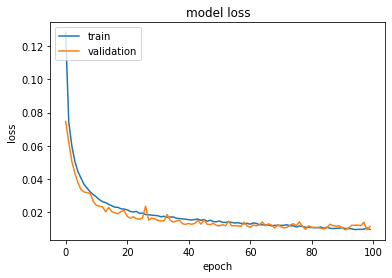

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_111"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_56 (InputLayer)        [(None, 84, 50, 96)]      0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 84, 50, 150)       14550     
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 84, 50, 150)       202650    
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 84, 50, 200)       30200     
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 84, 50, 200)       40200     
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 84, 50, 200)       40200     
_________________________________________________________________
conv2

In [91]:
# train and test the conv2d_new model
cmd = "--train_subjects s01_still --DWI 96 --model conv2d_new --layer 5 --train --label_type N"
plot_loss(cmd)
cmd = "--test_subjects s02_still --DWI 96 --model conv2d_new --layer 5 --label_type N"
args = model_parser().parse_args(cmd.split())
test_model(args)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for old model: (0.1734643703850369, -48.29977763610476, 0.9315547297788801)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for new model: (0.15984620799275726, -49.93497898164538, 0.9369949846550523)


Text(0.5, 0.98, 'Center slices for s02_still_NDI predicted by new model image')

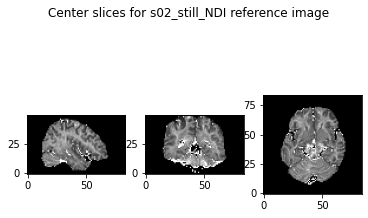

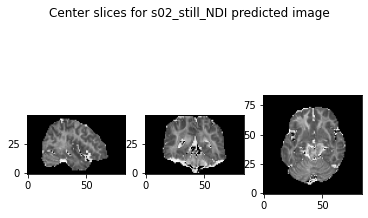

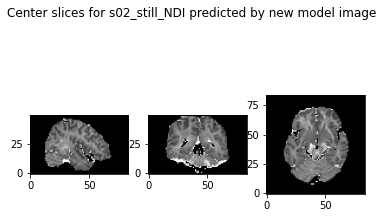

In [92]:
# load the reference img and pred imgs (the one generated from old model and new model)
pred_path = '../Net-DTI/nii/s02_still-NDI-96-first-conv2d-5layer.nii'
pred_NDI_img = nib.load(pred_path)
pred_NDI_img_data = pred_NDI_img.get_fdata()
new_pred_path = '../Net-DTI/nii/s02_still-NDI-96-first-conv2d_new-5layer.nii'
new_pred_NDI_img = nib.load(new_pred_path)
new_pred_NDI_img_data = new_pred_NDI_img.get_fdata()


# evaluate the model
eval_re = evaluate_model(pred_NDI_img_data, s02_NDI_img_data, s02_mask_img_data)
print("evaluation score for old model: " + str(eval_re))
new_eval_re = evaluate_model(new_pred_NDI_img_data, s02_NDI_img_data, s02_mask_img_data)
print("evaluation score for new model: " + str(new_eval_re))

# visualise both ref img and pred img
ref_slice_0 = s02_NDI_img_data[26, :, :]
ref_slice_1 = s02_NDI_img_data[:, 30, :]
ref_slice_2 = s02_NDI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_NDI reference image")

pred_slice_0 = pred_NDI_img_data[26, :, :]
pred_slice_1 = pred_NDI_img_data[:, 30, :]
pred_slice_2 = pred_NDI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_NDI predicted image")

new_pred_slice_0 = new_pred_NDI_img_data[26, :, :]
new_pred_slice_1 = new_pred_NDI_img_data[:, 30, :]
new_pred_slice_2 = new_pred_NDI_img_data[:, :, 16]
show_slices([new_pred_slice_0, new_pred_slice_1, new_pred_slice_2])
plt.suptitle("Center slices for s02_still_NDI predicted by new model image")

<strong>6 layer</strong>

Model: "functional_113"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_57 (InputLayer)        [(None, 3, 3, 96)]        0         
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 1, 1, 150)         129750    
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 1, 1, 200)         30200     
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 1, 1, 200)         40200     
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 1, 1, 200)         40200     
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 1, 1, 200)         40200     
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 1, 1, 200)      

2022-03-08 15:42:00.782721: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:42:00.782818: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 19/259 [=>............................] - ETA: 1s - loss: 0.2740 - accuracy: 0.0181

2022-03-08 15:42:01.467782: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:42:01.509782: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 15:42:01.510174: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 15:42:01.511654: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_15_42_01
2022-03-08 15:42:01.512432: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_15_42_01/vw.trace.json.gz
2022-03-08 15:42:01.512540: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 15:42:01.513623: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

259/259 [==============================] - 2s 9ms/step - loss: 0.1208 - accuracy: 0.0226 - val_loss: 0.0722 - val_accuracy: 0.0050
Epoch 2/100
259/259 [==============================] - 2s 8ms/step - loss: 0.0764 - accuracy: 0.0308 - val_loss: 0.0688 - val_accuracy: 0.0051
Epoch 3/100
259/259 [==============================] - 2s 7ms/step - loss: 0.0625 - accuracy: 0.0339 - val_loss: 0.0558 - val_accuracy: 0.0056
Epoch 4/100
259/259 [==============================] - 2s 8ms/step - loss: 0.0539 - accuracy: 0.0356 - val_loss: 0.0462 - val_accuracy: 0.0059
Epoch 5/100
259/259 [==============================] - 2s 7ms/step - loss: 0.0485 - accuracy: 0.0365 - val_loss: 0.0400 - val_accuracy: 0.0063
Epoch 6/100
259/259 [==============================] - 2s 7ms/step - loss: 0.0448 - accuracy: 0.0371 - val_loss: 0.0441 - val_accuracy: 0.0057
Epoch 7/100
259/259 [==============================] - 2s 8ms/step - loss: 0.0424 - accuracy: 0.0376 - val_loss: 0.0325 - val_accuracy: 0.0060
Epoch 8/100

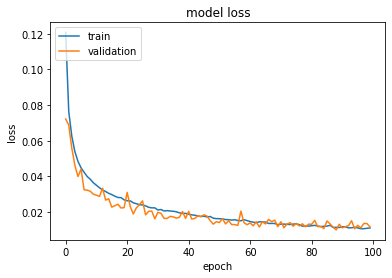

In [93]:
# 6 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv2d --layer 6 --train --label_type N"
plot_loss(cmd)

In [94]:
# 6 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv2d --layer 6 --label_type N"
args = model_parser().parse_args(cmd.split())
test_model(args)

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_115"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_58 (InputLayer)        [(None, 84, 50, 96)]      0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 84, 50, 150)       129750    
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 84, 50, 200)       30200     
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 84, 50, 200)       40200     
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 84, 50, 200)       40200     
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 84, 50, 200)       40200     
_________________________________________________________________
conv2

Model: "functional_117"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_59 (InputLayer)        [(None, 3, 3, 96)]        0         
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 3, 3, 150)         14550     
_________________________________________________________________
conv2d_105 (Conv2D)          (None, 1, 1, 150)         202650    
_________________________________________________________________
conv2d_106 (Conv2D)          (None, 1, 1, 200)         30200     
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 1, 1, 200)         40200     
_________________________________________________________________
conv2d_108 (Conv2D)          (None, 1, 1, 200)         40200     
_________________________________________________________________
conv2d_109 (Conv2D)          (None, 1, 1, 200)      

2022-03-08 15:45:10.061466: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:45:10.061574: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 14/259 [>.............................] - ETA: 2s - loss: 0.2288 - accuracy: 0.0145

2022-03-08 15:45:10.792767: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:45:10.840635: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 15:45:10.841021: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 15:45:10.842494: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_15_45_10
2022-03-08 15:45:10.843260: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_15_45_10/vw.trace.json.gz
2022-03-08 15:45:10.843363: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 15:45:10.844448: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

259/259 [==============================] - 3s 13ms/step - loss: 0.1101 - accuracy: 0.0231 - val_loss: 0.0660 - val_accuracy: 0.0049
Epoch 2/100
259/259 [==============================] - 3s 12ms/step - loss: 0.0712 - accuracy: 0.0321 - val_loss: 0.0552 - val_accuracy: 0.0051
Epoch 3/100
259/259 [==============================] - 3s 12ms/step - loss: 0.0574 - accuracy: 0.0348 - val_loss: 0.0485 - val_accuracy: 0.0057
Epoch 4/100
259/259 [==============================] - 3s 12ms/step - loss: 0.0489 - accuracy: 0.0357 - val_loss: 0.0492 - val_accuracy: 0.0063
Epoch 5/100
259/259 [==============================] - 3s 12ms/step - loss: 0.0435 - accuracy: 0.0368 - val_loss: 0.0497 - val_accuracy: 0.0064
Epoch 6/100
259/259 [==============================] - 3s 12ms/step - loss: 0.0393 - accuracy: 0.0378 - val_loss: 0.0332 - val_accuracy: 0.0063
Epoch 7/100
259/259 [==============================] - 3s 12ms/step - loss: 0.0358 - accuracy: 0.0380 - val_loss: 0.0386 - val_accuracy: 0.0066
Epoc

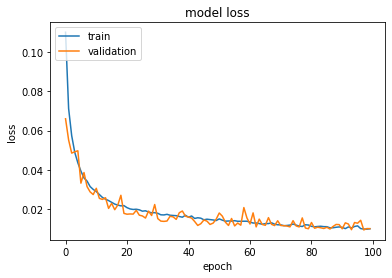

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_119"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_60 (InputLayer)        [(None, 84, 50, 96)]      0         
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 84, 50, 150)       14550     
_________________________________________________________________
conv2d_113 (Conv2D)          (None, 84, 50, 150)       202650    
_________________________________________________________________
conv2d_114 (Conv2D)          (None, 84, 50, 200)       30200     
_________________________________________________________________
conv2d_115 (Conv2D)          (None, 84, 50, 200)       40200     
_________________________________________________________________
conv2d_116 (Conv2D)          (None, 84, 50, 200)       40200     
_________________________________________________________________
conv2

In [95]:
# train and test the conv2d_new model
cmd = "--train_subjects s01_still --DWI 96 --model conv2d_new --layer 6 --train --label_type N"
plot_loss(cmd)
cmd = "--test_subjects s02_still --DWI 96 --model conv2d_new --layer 6 --label_type N"
args = model_parser().parse_args(cmd.split())
test_model(args)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for old model: (0.17553027358684584, -48.062991500052476, 0.9292109457631028)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for new model: (0.14162954243422318, -52.35492618838301, 0.9537132583296164)


Text(0.5, 0.98, 'Center slices for s02_still_NDI predicted by new model image')

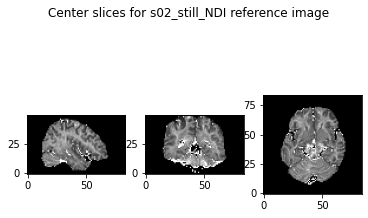

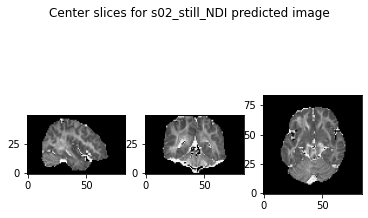

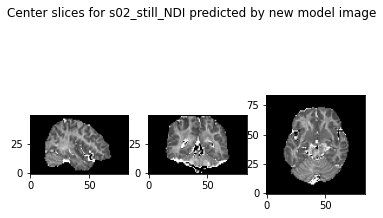

In [96]:
# load the reference img and pred imgs (the one generated from old model and new model)
pred_path = '../Net-DTI/nii/s02_still-NDI-96-first-conv2d-6layer.nii'
pred_NDI_img = nib.load(pred_path)
pred_NDI_img_data = pred_NDI_img.get_fdata()
new_pred_path = '../Net-DTI/nii/s02_still-NDI-96-first-conv2d_new-6layer.nii'
new_pred_NDI_img = nib.load(new_pred_path)
new_pred_NDI_img_data = new_pred_NDI_img.get_fdata()


# evaluate the model
eval_re = evaluate_model(pred_NDI_img_data, s02_NDI_img_data, s02_mask_img_data)
print("evaluation score for old model: " + str(eval_re))
new_eval_re = evaluate_model(new_pred_NDI_img_data, s02_NDI_img_data, s02_mask_img_data)
print("evaluation score for new model: " + str(new_eval_re))

# visualise both ref img and pred img
ref_slice_0 = s02_NDI_img_data[26, :, :]
ref_slice_1 = s02_NDI_img_data[:, 30, :]
ref_slice_2 = s02_NDI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_NDI reference image")

pred_slice_0 = pred_NDI_img_data[26, :, :]
pred_slice_1 = pred_NDI_img_data[:, 30, :]
pred_slice_2 = pred_NDI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_NDI predicted image")

new_pred_slice_0 = new_pred_NDI_img_data[26, :, :]
new_pred_slice_1 = new_pred_NDI_img_data[:, 30, :]
new_pred_slice_2 = new_pred_NDI_img_data[:, :, 16]
show_slices([new_pred_slice_0, new_pred_slice_1, new_pred_slice_2])
plt.suptitle("Center slices for s02_still_NDI predicted by new model image")

<strong>Training subject: s01_still<br/>

Test subject: s02_still<br/>

Network; 2D-CNN<br/>

Outcome: ODI<br/>


The training data is stored in datasets/data/s01_still-96-first-2d.mat<br/>

The training label is stored in datasets/label/s01_still-ODI-96-first-2d.mat<br/>

The testing data is stored in datasets/data/s02_still-96-first.mat<br/>

The testing label is stored in datasets/label/s02_still-ODI-96-first.mat</strong>

In [97]:
"""
Generate training dataset NDI for 2D CNN.
Using all of the DWI. 96. as training size.
"""
cmd = "--subjects s01_still --nDWI 96 --conv2d_train --label_type O"
args = data_parser().parse_args(cmd.split())
generate_data(args)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
152
425
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
152
425
training dataset has shape:(82641, 3, 3, 96)
training label has shape:(82641, 1, 1, 1)


<strong>1 layer</strong>

Model: "functional_121"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_61 (InputLayer)        [(None, 3, 3, 96)]        0         
_________________________________________________________________
conv2d_120 (Conv2D)          (None, 1, 1, 150)         129750    
_________________________________________________________________
dropout_60 (Dropout)         (None, 1, 1, 150)         0         
_________________________________________________________________
conv2d_121 (Conv2D)          (None, 1, 1, 1)           151       
Total params: 129,901
Trainable params: 129,901
Non-trainable params: 0
_________________________________________________________________
['O']
Training start ...


2022-03-08 15:50:14.096689: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:50:14.096782: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 56/259 [=====>........................] - ETA: 0s - loss: 0.3981 - accuracy: 6.9754e-05

2022-03-08 15:50:14.709415: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:50:14.743365: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 15:50:14.743648: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 15:50:14.744823: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_15_50_14
2022-03-08 15:50:14.745368: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_15_50_14/vw.trace.json.gz
2022-03-08 15:50:14.745450: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 15:50:14.746351: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

259/259 [==============================] - 1s 3ms/step - loss: 0.3972 - accuracy: 3.0252e-05 - val_loss: 0.4193 - val_accuracy: 0.0000e+00
Epoch 2/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3967 - accuracy: 1.5126e-05 - val_loss: 0.4193 - val_accuracy: 0.0000e+00
Epoch 3/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3966 - accuracy: 0.0000e+00 - val_loss: 0.4198 - val_accuracy: 0.0000e+00
Epoch 4/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3965 - accuracy: 3.0252e-05 - val_loss: 0.4194 - val_accuracy: 0.0000e+00
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3963 - accuracy: 4.5378e-05 - val_loss: 0.4195 - val_accuracy: 0.0000e+00
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3961 - accuracy: 4.5378e-05 - val_loss: 0.4193 - val_accuracy: 0.0000e+00
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3958 - accuracy: 3.0252e-05 -

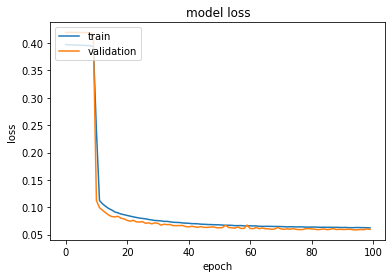

In [98]:
# 1 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv2d --layer 1 --train --label_type O"
plot_loss(cmd)

In [99]:
# 1 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv2d --layer 1 --label_type O"
args = model_parser().parse_args(cmd.split())
test_model(args)

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_123"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_62 (InputLayer)        [(None, 84, 50, 96)]      0         
_________________________________________________________________
conv2d_122 (Conv2D)          (None, 84, 50, 150)       129750    
_________________________________________________________________
dropout_61 (Dropout)         (None, 84, 50, 150)       0         
_________________________________________________________________
conv2d_123 (Conv2D)          (None, 84, 50, 1)         151       
Total params: 129,901
Trainable params: 129,901
Non-trainable params: 0
_________________________________________________________________
(84, 84, 50, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
0.159289579085801


Model: "functional_407"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_204 (InputLayer)       [(None, 3, 3, 96)]        0         
_________________________________________________________________
conv2d_380 (Conv2D)          (None, 3, 3, 150)         14550     
_________________________________________________________________
conv2d_381 (Conv2D)          (None, 1, 1, 150)         202650    
_________________________________________________________________
dropout_203 (Dropout)        (None, 1, 1, 150)         0         
_________________________________________________________________
conv2d_382 (Conv2D)          (None, 1, 1, 1)           151       
Total params: 217,351
Trainable params: 217,351
Non-trainable params: 0
_________________________________________________________________
['O']
Training start ...


2022-03-08 20:26:29.384832: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 20:26:29.384957: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 22/259 [=>............................] - ETA: 1s - loss: 0.3954 - accuracy: 0.0000e+00

2022-03-08 20:26:30.244223: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 20:26:30.287624: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 20:26:30.288693: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 20:26:30.290829: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_20_26_30
2022-03-08 20:26:30.291345: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_20_26_30/vw.trace.json.gz
2022-03-08 20:26:30.291488: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 20:26:30.292547: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

259/259 [==============================] - 2s 7ms/step - loss: 0.3958 - accuracy: 0.0000e+00 - val_loss: 0.4197 - val_accuracy: 0.0000e+00
Epoch 2/100
259/259 [==============================] - 2s 6ms/step - loss: 0.2075 - accuracy: 1.8151e-04 - val_loss: 0.0941 - val_accuracy: 0.0000e+00
Epoch 3/100
259/259 [==============================] - 2s 6ms/step - loss: 0.0951 - accuracy: 1.9664e-04 - val_loss: 0.0887 - val_accuracy: 0.0000e+00
Epoch 4/100
259/259 [==============================] - 1s 6ms/step - loss: 0.0865 - accuracy: 2.7227e-04 - val_loss: 0.0802 - val_accuracy: 1.8150e-04
Epoch 5/100
259/259 [==============================] - 1s 6ms/step - loss: 0.0810 - accuracy: 3.4789e-04 - val_loss: 0.0751 - val_accuracy: 1.8150e-04
Epoch 6/100
259/259 [==============================] - 1s 6ms/step - loss: 0.0754 - accuracy: 4.2352e-04 - val_loss: 0.0720 - val_accuracy: 3.0250e-04
Epoch 7/100
259/259 [==============================] - 1s 5ms/step - loss: 0.0707 - accuracy: 3.7815e-04 -

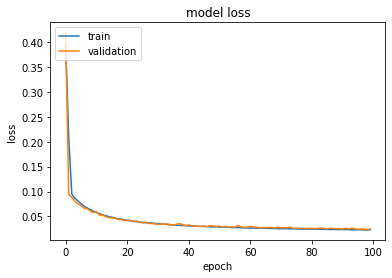

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_409"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_205 (InputLayer)       [(None, 84, 50, 96)]      0         
_________________________________________________________________
conv2d_383 (Conv2D)          (None, 84, 50, 150)       14550     
_________________________________________________________________
conv2d_384 (Conv2D)          (None, 84, 50, 150)       202650    
_________________________________________________________________
dropout_204 (Dropout)        (None, 84, 50, 150)       0         
_________________________________________________________________
conv2d_385 (Conv2D)          (None, 84, 50, 1)         151       
Total params: 217,351
Trainable params: 217,351
Non-trainable params: 0
_________________________________________________________________
(84, 84, 50, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
0

In [238]:
# train and test the conv2d_new model
cmd = "--train_subjects s01_still --DWI 96 --model conv2d_new --layer 1 --train --label_type O"
plot_loss(cmd)
cmd = "--test_subjects s02_still --DWI 96 --model conv2d_new --layer 1 --label_type O"
args = model_parser().parse_args(cmd.split())
test_model(args)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for old model: (0.159289579085801, -47.90550922929435, 0.8977234200606843)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for new model: (0.10891459750835804, -53.555779810607916, 0.9411397558068668)


Text(0.5, 0.98, 'Center slices for s02_still_ODI predicted by new model image')

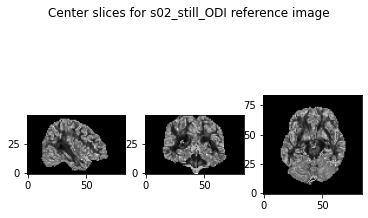

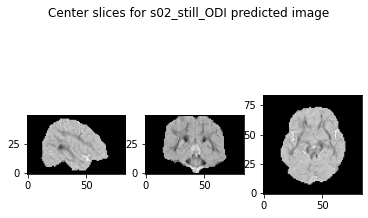

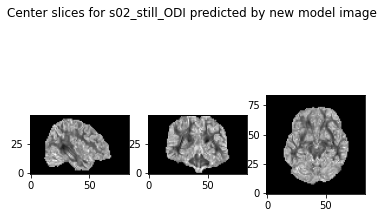

In [239]:
# load the reference img and pred imgs (the one generated from old model and new model)
pred_path = '../Net-DTI/nii/s02_still-ODI-96-first-conv2d-1layer.nii'
pred_ODI_img = nib.load(pred_path)
pred_ODI_img_data = pred_ODI_img.get_fdata()
new_pred_path = '../Net-DTI/nii/s02_still-ODI-96-first-conv2d_new-1layer.nii'
new_pred_ODI_img = nib.load(new_pred_path)
new_pred_ODI_img_data = new_pred_ODI_img.get_fdata()


# evaluate the model
eval_re = evaluate_model(pred_ODI_img_data, s02_ODI_img_data, s02_mask_img_data)
print("evaluation score for old model: " + str(eval_re))
new_eval_re = evaluate_model(new_pred_ODI_img_data, s02_ODI_img_data, s02_mask_img_data)
print("evaluation score for new model: " + str(new_eval_re))

# visualise both ref img and pred img
ref_slice_0 = s02_ODI_img_data[26, :, :]
ref_slice_1 = s02_ODI_img_data[:, 30, :]
ref_slice_2 = s02_ODI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_ODI reference image")

pred_slice_0 = pred_ODI_img_data[26, :, :]
pred_slice_1 = pred_ODI_img_data[:, 30, :]
pred_slice_2 = pred_ODI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_ODI predicted image")

new_pred_slice_0 = new_pred_ODI_img_data[26, :, :]
new_pred_slice_1 = new_pred_ODI_img_data[:, 30, :]
new_pred_slice_2 = new_pred_ODI_img_data[:, :, 16]
show_slices([new_pred_slice_0, new_pred_slice_1, new_pred_slice_2])
plt.suptitle("Center slices for s02_still_ODI predicted by new model image")

<strong>2 layer</strong>

Model: "functional_129"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_65 (InputLayer)        [(None, 3, 3, 96)]        0         
_________________________________________________________________
conv2d_130 (Conv2D)          (None, 1, 1, 150)         129750    
_________________________________________________________________
conv2d_131 (Conv2D)          (None, 1, 1, 200)         30200     
_________________________________________________________________
dropout_64 (Dropout)         (None, 1, 1, 200)         0         
_________________________________________________________________
conv2d_132 (Conv2D)          (None, 1, 1, 1)           201       
Total params: 160,151
Trainable params: 160,151
Non-trainable params: 0
_________________________________________________________________
['O']
Training start ...


2022-03-08 15:52:19.973121: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:52:19.973212: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 42/259 [===>..........................] - ETA: 0s - loss: 0.6206 - accuracy: 9.3006e-05

2022-03-08 15:52:20.607896: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:52:20.632167: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 15:52:20.632476: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 15:52:20.633805: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_15_52_20
2022-03-08 15:52:20.634405: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_15_52_20/vw.trace.json.gz
2022-03-08 15:52:20.634499: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 15:52:20.635400: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

259/259 [==============================] - 1s 4ms/step - loss: 0.4329 - accuracy: 1.0588e-04 - val_loss: 0.4192 - val_accuracy: 0.0000e+00
Epoch 2/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3961 - accuracy: 6.0503e-05 - val_loss: 0.4194 - val_accuracy: 0.0000e+00
Epoch 3/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3958 - accuracy: 4.5378e-05 - val_loss: 0.4191 - val_accuracy: 0.0000e+00
Epoch 4/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3953 - accuracy: 3.0252e-05 - val_loss: 0.4187 - val_accuracy: 0.0000e+00
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3903 - accuracy: 9.0755e-05 - val_loss: 0.2653 - val_accuracy: 0.0000e+00
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.1461 - accuracy: 2.4201e-04 - val_loss: 0.0987 - val_accuracy: 2.4200e-04
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.1075 - accuracy: 2.1176e-04 -

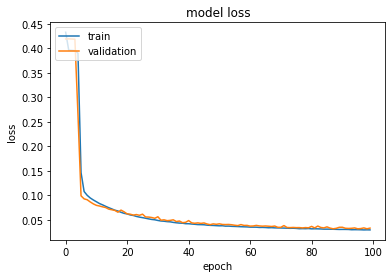

In [102]:
# 2 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv2d --layer 2 --train --label_type O"
plot_loss(cmd)

In [103]:
# 2 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv2d --layer 2 --label_type O"
args = model_parser().parse_args(cmd.split())
test_model(args)

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_131"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_66 (InputLayer)        [(None, 84, 50, 96)]      0         
_________________________________________________________________
conv2d_133 (Conv2D)          (None, 84, 50, 150)       129750    
_________________________________________________________________
conv2d_134 (Conv2D)          (None, 84, 50, 200)       30200     
_________________________________________________________________
dropout_65 (Dropout)         (None, 84, 50, 200)       0         
_________________________________________________________________
conv2d_135 (Conv2D)          (None, 84, 50, 1)         201       
Total params: 160,151
Trainable params: 160,151
Non-trainable params: 0
_________________________________________________________________
(84, 84, 50, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
0

Model: "functional_133"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_67 (InputLayer)        [(None, 3, 3, 96)]        0         
_________________________________________________________________
conv2d_136 (Conv2D)          (None, 3, 3, 150)         14550     
_________________________________________________________________
conv2d_137 (Conv2D)          (None, 1, 1, 150)         202650    
_________________________________________________________________
conv2d_138 (Conv2D)          (None, 1, 1, 200)         30200     
_________________________________________________________________
dropout_66 (Dropout)         (None, 1, 1, 200)         0         
_________________________________________________________________
conv2d_139 (Conv2D)          (None, 1, 1, 1)           201       
Total params: 247,601
Trainable params: 247,601
Non-trainable params: 0
______________________________________________

2022-03-08 15:53:49.139086: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:53:49.139195: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 14/259 [>.............................] - ETA: 2s - loss: 0.6469 - accuracy: 0.0000e+00

2022-03-08 15:53:49.797887: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:53:49.849950: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 15:53:49.850527: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 15:53:49.852721: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_15_53_49
2022-03-08 15:53:49.853619: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_15_53_49/vw.trace.json.gz
2022-03-08 15:53:49.853838: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 15:53:49.855463: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

259/259 [==============================] - 2s 9ms/step - loss: 0.4108 - accuracy: 0.0000e+00 - val_loss: 0.4194 - val_accuracy: 0.0000e+00
Epoch 2/100
259/259 [==============================] - 2s 8ms/step - loss: 0.3556 - accuracy: 4.5378e-05 - val_loss: 0.1259 - val_accuracy: 1.2100e-04
Epoch 3/100
259/259 [==============================] - 2s 8ms/step - loss: 0.1160 - accuracy: 2.4201e-04 - val_loss: 0.0956 - val_accuracy: 1.2100e-04
Epoch 4/100
259/259 [==============================] - 2s 8ms/step - loss: 0.0949 - accuracy: 2.8739e-04 - val_loss: 0.0850 - val_accuracy: 1.8150e-04
Epoch 5/100
259/259 [==============================] - 2s 8ms/step - loss: 0.0858 - accuracy: 3.3277e-04 - val_loss: 0.0782 - val_accuracy: 3.0250e-04
Epoch 6/100
259/259 [==============================] - 2s 8ms/step - loss: 0.0786 - accuracy: 3.4789e-04 - val_loss: 0.0759 - val_accuracy: 3.0250e-04
Epoch 7/100
259/259 [==============================] - 2s 8ms/step - loss: 0.0731 - accuracy: 4.0840e-04 -

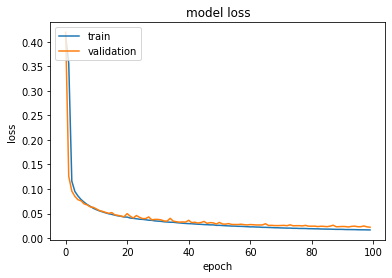

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_135"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_68 (InputLayer)        [(None, 84, 50, 96)]      0         
_________________________________________________________________
conv2d_140 (Conv2D)          (None, 84, 50, 150)       14550     
_________________________________________________________________
conv2d_141 (Conv2D)          (None, 84, 50, 150)       202650    
_________________________________________________________________
conv2d_142 (Conv2D)          (None, 84, 50, 200)       30200     
_________________________________________________________________
dropout_67 (Dropout)         (None, 84, 50, 200)       0         
_________________________________________________________________
conv2d_143 (Conv2D)          (None, 84, 50, 1)         201       
Total params: 247,601
Trainable params: 247,601
Non-trainable params: 0

In [104]:
# train and test the conv2d_new model
cmd = "--train_subjects s01_still --DWI 96 --model conv2d_new --layer 2 --train --label_type O"
plot_loss(cmd)
cmd = "--test_subjects s02_still --DWI 96 --model conv2d_new --layer 2 --label_type O"
args = model_parser().parse_args(cmd.split())
test_model(args)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for old model: (0.11545860825005404, -52.76268685420743, 0.9373679493775466)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for new model: (0.09938183773807431, -54.73934598901302, 0.9448298177153527)


Text(0.5, 0.98, 'Center slices for s02_still_ODI predicted by new model image')

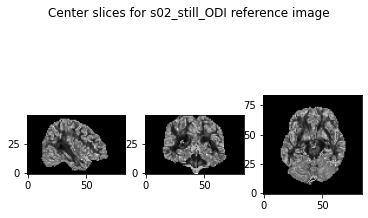

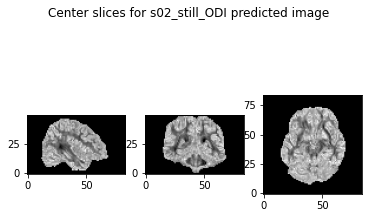

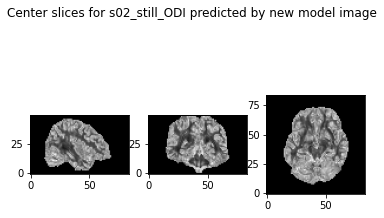

In [105]:
# load the reference img and pred imgs (the one generated from old model and new model)
pred_path = '../Net-DTI/nii/s02_still-ODI-96-first-conv2d-2layer.nii'
pred_ODI_img = nib.load(pred_path)
pred_ODI_img_data = pred_ODI_img.get_fdata()
new_pred_path = '../Net-DTI/nii/s02_still-ODI-96-first-conv2d_new-2layer.nii'
new_pred_ODI_img = nib.load(new_pred_path)
new_pred_ODI_img_data = new_pred_ODI_img.get_fdata()


# evaluate the model
eval_re = evaluate_model(pred_ODI_img_data, s02_ODI_img_data, s02_mask_img_data)
print("evaluation score for old model: " + str(eval_re))
new_eval_re = evaluate_model(new_pred_ODI_img_data, s02_ODI_img_data, s02_mask_img_data)
print("evaluation score for new model: " + str(new_eval_re))

# visualise both ref img and pred img
ref_slice_0 = s02_ODI_img_data[26, :, :]
ref_slice_1 = s02_ODI_img_data[:, 30, :]
ref_slice_2 = s02_ODI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_ODI reference image")

pred_slice_0 = pred_ODI_img_data[26, :, :]
pred_slice_1 = pred_ODI_img_data[:, 30, :]
pred_slice_2 = pred_ODI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_ODI predicted image")

new_pred_slice_0 = new_pred_ODI_img_data[26, :, :]
new_pred_slice_1 = new_pred_ODI_img_data[:, 30, :]
new_pred_slice_2 = new_pred_ODI_img_data[:, :, 16]
show_slices([new_pred_slice_0, new_pred_slice_1, new_pred_slice_2])
plt.suptitle("Center slices for s02_still_ODI predicted by new model image")

<strong>3 layer</strong>

Model: "functional_137"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_69 (InputLayer)        [(None, 3, 3, 96)]        0         
_________________________________________________________________
conv2d_144 (Conv2D)          (None, 1, 1, 150)         129750    
_________________________________________________________________
conv2d_145 (Conv2D)          (None, 1, 1, 200)         30200     
_________________________________________________________________
conv2d_146 (Conv2D)          (None, 1, 1, 200)         40200     
_________________________________________________________________
dropout_68 (Dropout)         (None, 1, 1, 200)         0         
_________________________________________________________________
conv2d_147 (Conv2D)          (None, 1, 1, 1)           201       
Total params: 200,351
Trainable params: 200,351
Non-trainable params: 0
______________________________________________

2022-03-08 15:57:02.953265: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:57:02.953382: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 34/259 [==>...........................] - ETA: 1s - loss: 0.4337 - accuracy: 0.0000e+00

2022-03-08 15:57:03.564492: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:57:03.589868: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 15:57:03.590201: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 15:57:03.591529: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_15_57_03
2022-03-08 15:57:03.592177: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_15_57_03/vw.trace.json.gz
2022-03-08 15:57:03.592299: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 15:57:03.593279: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

259/259 [==============================] - 1s 5ms/step - loss: 0.2705 - accuracy: 1.3613e-04 - val_loss: 0.1112 - val_accuracy: 6.0500e-05
Epoch 2/100
259/259 [==============================] - 1s 5ms/step - loss: 0.1140 - accuracy: 2.4201e-04 - val_loss: 0.0963 - val_accuracy: 6.0500e-05
Epoch 3/100
259/259 [==============================] - 1s 5ms/step - loss: 0.1030 - accuracy: 3.1764e-04 - val_loss: 0.0920 - val_accuracy: 1.2100e-04
Epoch 4/100
259/259 [==============================] - 1s 4ms/step - loss: 0.0969 - accuracy: 2.4201e-04 - val_loss: 0.0907 - val_accuracy: 0.0000e+00
Epoch 5/100
259/259 [==============================] - 1s 4ms/step - loss: 0.0921 - accuracy: 3.4789e-04 - val_loss: 0.0872 - val_accuracy: 3.0250e-04
Epoch 6/100
259/259 [==============================] - 1s 4ms/step - loss: 0.0883 - accuracy: 3.6302e-04 - val_loss: 0.0840 - val_accuracy: 3.0250e-04
Epoch 7/100
259/259 [==============================] - 1s 4ms/step - loss: 0.0847 - accuracy: 4.0840e-04 -

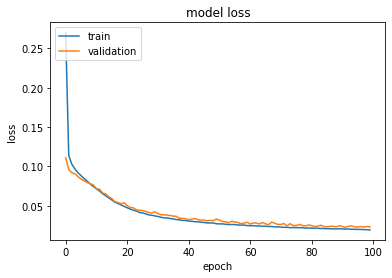

In [106]:
# 3 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv2d --layer 3 --train --label_type O"
plot_loss(cmd)

In [107]:
# 3 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv2d --layer 3 --label_type O"
args = model_parser().parse_args(cmd.split())
test_model(args)

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_139"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_70 (InputLayer)        [(None, 84, 50, 96)]      0         
_________________________________________________________________
conv2d_148 (Conv2D)          (None, 84, 50, 150)       129750    
_________________________________________________________________
conv2d_149 (Conv2D)          (None, 84, 50, 200)       30200     
_________________________________________________________________
conv2d_150 (Conv2D)          (None, 84, 50, 200)       40200     
_________________________________________________________________
dropout_69 (Dropout)         (None, 84, 50, 200)       0         
_________________________________________________________________
conv2d_151 (Conv2D)          (None, 84, 50, 1)         201       
Total params: 200,351
Trainable params: 200,351
Non-trainable params: 0

Model: "functional_141"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_71 (InputLayer)        [(None, 3, 3, 96)]        0         
_________________________________________________________________
conv2d_152 (Conv2D)          (None, 3, 3, 150)         14550     
_________________________________________________________________
conv2d_153 (Conv2D)          (None, 1, 1, 150)         202650    
_________________________________________________________________
conv2d_154 (Conv2D)          (None, 1, 1, 200)         30200     
_________________________________________________________________
conv2d_155 (Conv2D)          (None, 1, 1, 200)         40200     
_________________________________________________________________
dropout_70 (Dropout)         (None, 1, 1, 200)         0         
_________________________________________________________________
conv2d_156 (Conv2D)          (None, 1, 1, 1)        

2022-03-08 15:58:57.538335: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:58:57.538426: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 18/259 [=>............................] - ETA: 2s - loss: 0.3261 - accuracy: 0.0000e+00

2022-03-08 15:58:58.294965: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 15:58:58.325513: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 15:58:58.325870: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 15:58:58.327216: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_15_58_58
2022-03-08 15:58:58.327902: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_15_58_58/vw.trace.json.gz
2022-03-08 15:58:58.327998: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 15:58:58.329000: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

259/259 [==============================] - 3s 10ms/step - loss: 0.1463 - accuracy: 2.2689e-04 - val_loss: 0.0979 - val_accuracy: 2.4200e-04
Epoch 2/100
259/259 [==============================] - 2s 9ms/step - loss: 0.0974 - accuracy: 2.5714e-04 - val_loss: 0.0879 - val_accuracy: 2.4200e-04
Epoch 3/100
259/259 [==============================] - 2s 9ms/step - loss: 0.0872 - accuracy: 2.8739e-04 - val_loss: 0.0832 - val_accuracy: 2.4200e-04
Epoch 4/100
259/259 [==============================] - 2s 9ms/step - loss: 0.0804 - accuracy: 3.0252e-04 - val_loss: 0.0763 - val_accuracy: 3.6300e-04
Epoch 5/100
259/259 [==============================] - 2s 9ms/step - loss: 0.0745 - accuracy: 3.6302e-04 - val_loss: 0.0743 - val_accuracy: 3.0250e-04
Epoch 6/100
259/259 [==============================] - 2s 9ms/step - loss: 0.0694 - accuracy: 3.7815e-04 - val_loss: 0.0676 - val_accuracy: 3.0250e-04
Epoch 7/100
259/259 [==============================] - 2s 9ms/step - loss: 0.0648 - accuracy: 4.3865e-04 

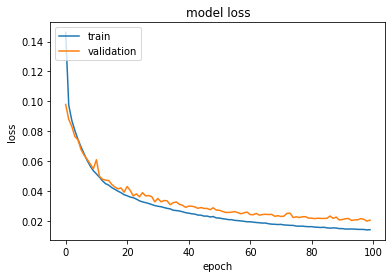

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_143"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_72 (InputLayer)        [(None, 84, 50, 96)]      0         
_________________________________________________________________
conv2d_157 (Conv2D)          (None, 84, 50, 150)       14550     
_________________________________________________________________
conv2d_158 (Conv2D)          (None, 84, 50, 150)       202650    
_________________________________________________________________
conv2d_159 (Conv2D)          (None, 84, 50, 200)       30200     
_________________________________________________________________
conv2d_160 (Conv2D)          (None, 84, 50, 200)       40200     
_________________________________________________________________
dropout_71 (Dropout)         (None, 84, 50, 200)       0         
_________________________________________________________________
conv2

In [108]:
# train and test the conv2d_new model# train and test the conv2d_new model
cmd = "--train_subjects s01_still --DWI 96 --model conv2d_new --layer 3 --train --label_type O"
plot_loss(cmd)
cmd = "--test_subjects s02_still --DWI 96 --model conv2d_new --layer 3 --label_type O"
args = model_parser().parse_args(cmd.split())
test_model(args)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for old model: (0.12846358029370827, -51.23782918689361, 0.9263771049941711)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for new model: (0.08665711605642355, -56.36212865898655, 0.9567175942591731)


Text(0.5, 0.98, 'Center slices for s02_still_ODI predicted by new model image')

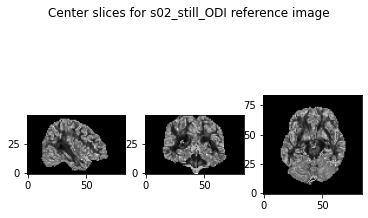

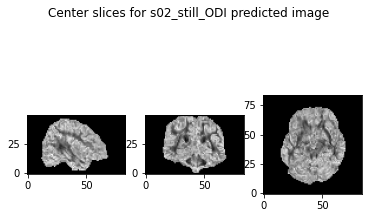

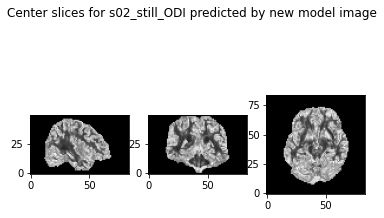

In [109]:
# load the reference img and pred imgs (the one generated from old model and new model)
pred_path = '../Net-DTI/nii/s02_still-ODI-96-first-conv2d-3layer.nii'
pred_ODI_img = nib.load(pred_path)
pred_ODI_img_data = pred_ODI_img.get_fdata()
new_pred_path = '../Net-DTI/nii/s02_still-ODI-96-first-conv2d_new-3layer.nii'
new_pred_ODI_img = nib.load(new_pred_path)
new_pred_ODI_img_data = new_pred_ODI_img.get_fdata()


# evaluate the model
eval_re = evaluate_model(pred_ODI_img_data, s02_ODI_img_data, s02_mask_img_data)
print("evaluation score for old model: " + str(eval_re))
new_eval_re = evaluate_model(new_pred_ODI_img_data, s02_ODI_img_data, s02_mask_img_data)
print("evaluation score for new model: " + str(new_eval_re))

# visualise both ref img and pred img
ref_slice_0 = s02_ODI_img_data[26, :, :]
ref_slice_1 = s02_ODI_img_data[:, 30, :]
ref_slice_2 = s02_ODI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_ODI reference image")

pred_slice_0 = pred_ODI_img_data[26, :, :]
pred_slice_1 = pred_ODI_img_data[:, 30, :]
pred_slice_2 = pred_ODI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_ODI predicted image")

new_pred_slice_0 = new_pred_ODI_img_data[26, :, :]
new_pred_slice_1 = new_pred_ODI_img_data[:, 30, :]
new_pred_slice_2 = new_pred_ODI_img_data[:, :, 16]
show_slices([new_pred_slice_0, new_pred_slice_1, new_pred_slice_2])
plt.suptitle("Center slices for s02_still_ODI predicted by new model image")

<strong>4 layer</strong>

Model: "functional_145"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_73 (InputLayer)        [(None, 3, 3, 96)]        0         
_________________________________________________________________
conv2d_162 (Conv2D)          (None, 1, 1, 150)         129750    
_________________________________________________________________
conv2d_163 (Conv2D)          (None, 1, 1, 200)         30200     
_________________________________________________________________
conv2d_164 (Conv2D)          (None, 1, 1, 200)         40200     
_________________________________________________________________
conv2d_165 (Conv2D)          (None, 1, 1, 200)         40200     
_________________________________________________________________
dropout_72 (Dropout)         (None, 1, 1, 200)         0         
_________________________________________________________________
conv2d_166 (Conv2D)          (None, 1, 1, 1)        

2022-03-08 16:02:36.432310: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 16:02:36.432419: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 25/259 [=>............................] - ETA: 1s - loss: 0.2935 - accuracy: 0.0000e+00

2022-03-08 16:02:37.230609: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 16:02:37.268187: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 16:02:37.268545: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 16:02:37.270655: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_16_02_37
2022-03-08 16:02:37.271365: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_16_02_37/vw.trace.json.gz
2022-03-08 16:02:37.271506: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 16:02:37.272625: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

259/259 [==============================] - 2s 6ms/step - loss: 0.1471 - accuracy: 2.4201e-04 - val_loss: 0.0989 - val_accuracy: 6.0500e-05
Epoch 2/100
259/259 [==============================] - 1s 6ms/step - loss: 0.1007 - accuracy: 3.3277e-04 - val_loss: 0.0945 - val_accuracy: 6.0500e-05
Epoch 3/100
259/259 [==============================] - 1s 6ms/step - loss: 0.0921 - accuracy: 3.0252e-04 - val_loss: 0.0866 - val_accuracy: 1.2100e-04
Epoch 4/100
259/259 [==============================] - 1s 5ms/step - loss: 0.0858 - accuracy: 3.6302e-04 - val_loss: 0.0845 - val_accuracy: 1.2100e-04
Epoch 5/100
259/259 [==============================] - 1s 6ms/step - loss: 0.0805 - accuracy: 4.2352e-04 - val_loss: 0.0796 - val_accuracy: 1.8150e-04
Epoch 6/100
259/259 [==============================] - 1s 5ms/step - loss: 0.0760 - accuracy: 3.7815e-04 - val_loss: 0.0752 - val_accuracy: 1.8150e-04
Epoch 7/100
259/259 [==============================] - 1s 6ms/step - loss: 0.0710 - accuracy: 4.0840e-04 -

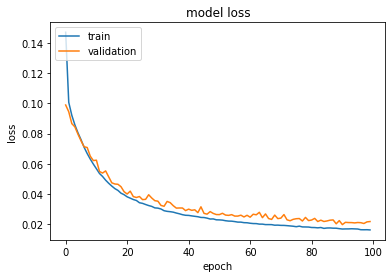

In [110]:
# 4 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv2d --layer 4 --train --label_type O"
plot_loss(cmd)

In [111]:
# 4 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv2d --layer 4 --label_type O"
args = model_parser().parse_args(cmd.split())
test_model(args)

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_147"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_74 (InputLayer)        [(None, 84, 50, 96)]      0         
_________________________________________________________________
conv2d_167 (Conv2D)          (None, 84, 50, 150)       129750    
_________________________________________________________________
conv2d_168 (Conv2D)          (None, 84, 50, 200)       30200     
_________________________________________________________________
conv2d_169 (Conv2D)          (None, 84, 50, 200)       40200     
_________________________________________________________________
conv2d_170 (Conv2D)          (None, 84, 50, 200)       40200     
_________________________________________________________________
dropout_73 (Dropout)         (None, 84, 50, 200)       0         
_________________________________________________________________
conv2

Model: "functional_149"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_75 (InputLayer)        [(None, 3, 3, 96)]        0         
_________________________________________________________________
conv2d_172 (Conv2D)          (None, 3, 3, 150)         14550     
_________________________________________________________________
conv2d_173 (Conv2D)          (None, 1, 1, 150)         202650    
_________________________________________________________________
conv2d_174 (Conv2D)          (None, 1, 1, 200)         30200     
_________________________________________________________________
conv2d_175 (Conv2D)          (None, 1, 1, 200)         40200     
_________________________________________________________________
conv2d_176 (Conv2D)          (None, 1, 1, 200)         40200     
_________________________________________________________________
dropout_74 (Dropout)         (None, 1, 1, 200)      

2022-03-08 16:04:58.406977: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 16:04:58.407088: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 16/259 [>.............................] - ETA: 2s - loss: 0.4041 - accuracy: 0.0000e+00

2022-03-08 16:04:59.210239: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 16:04:59.258177: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 16:04:59.258572: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 16:04:59.260137: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_16_04_59
2022-03-08 16:04:59.260884: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_16_04_59/vw.trace.json.gz
2022-03-08 16:04:59.261000: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 16:04:59.262124: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

259/259 [==============================] - 3s 11ms/step - loss: 0.1436 - accuracy: 2.2689e-04 - val_loss: 0.1030 - val_accuracy: 6.0500e-05
Epoch 2/100
259/259 [==============================] - 3s 10ms/step - loss: 0.0937 - accuracy: 1.8151e-04 - val_loss: 0.0880 - val_accuracy: 2.4200e-04
Epoch 3/100
259/259 [==============================] - 2s 10ms/step - loss: 0.0831 - accuracy: 2.2689e-04 - val_loss: 0.0818 - val_accuracy: 3.0250e-04
Epoch 4/100
259/259 [==============================] - 3s 10ms/step - loss: 0.0754 - accuracy: 3.9327e-04 - val_loss: 0.0734 - val_accuracy: 2.4200e-04
Epoch 5/100
259/259 [==============================] - 2s 10ms/step - loss: 0.0682 - accuracy: 3.6302e-04 - val_loss: 0.0689 - val_accuracy: 2.4200e-04
Epoch 6/100
259/259 [==============================] - 3s 10ms/step - loss: 0.0627 - accuracy: 4.5378e-04 - val_loss: 0.0738 - val_accuracy: 2.4200e-04
Epoch 7/100
259/259 [==============================] - 3s 10ms/step - loss: 0.0576 - accuracy: 4.386

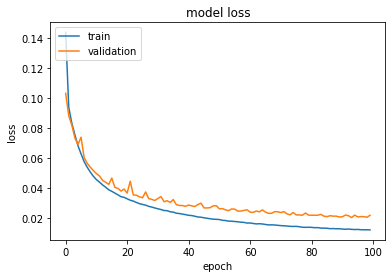

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_151"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_76 (InputLayer)        [(None, 84, 50, 96)]      0         
_________________________________________________________________
conv2d_178 (Conv2D)          (None, 84, 50, 150)       14550     
_________________________________________________________________
conv2d_179 (Conv2D)          (None, 84, 50, 150)       202650    
_________________________________________________________________
conv2d_180 (Conv2D)          (None, 84, 50, 200)       30200     
_________________________________________________________________
conv2d_181 (Conv2D)          (None, 84, 50, 200)       40200     
_________________________________________________________________
conv2d_182 (Conv2D)          (None, 84, 50, 200)       40200     
_________________________________________________________________
dropo

In [112]:
# train and test the conv2d_new model
cmd = "--train_subjects s01_still --DWI 96 --model conv2d_new --layer 4 --train --label_type O"
plot_loss(cmd)
cmd = "--test_subjects s02_still --DWI 96 --model conv2d_new --layer 4 --label_type O"
args = model_parser().parse_args(cmd.split())
test_model(args)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for old model: (0.12184928857596347, -52.0046406830578, 0.9298501128538108)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for new model: (0.09199336641146355, -55.676651014392775, 0.9531733366579365)


Text(0.5, 0.98, 'Center slices for s02_still_ODI predicted by new model image')

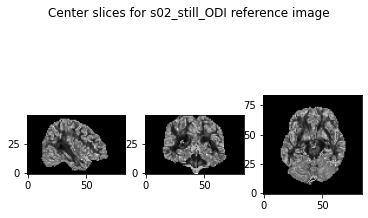

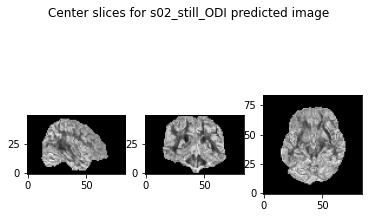

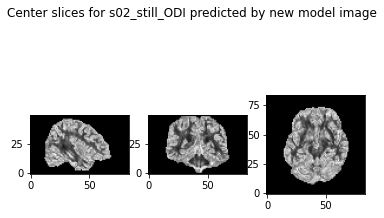

In [113]:
# load the reference img and pred imgs (the one generated from old model and new model)
pred_path = '../Net-DTI/nii/s02_still-ODI-96-first-conv2d-4layer.nii'
pred_ODI_img = nib.load(pred_path)
pred_ODI_img_data = pred_ODI_img.get_fdata()
new_pred_path = '../Net-DTI/nii/s02_still-ODI-96-first-conv2d_new-4layer.nii'
new_pred_ODI_img = nib.load(new_pred_path)
new_pred_ODI_img_data = new_pred_ODI_img.get_fdata()


# evaluate the model
eval_re = evaluate_model(pred_ODI_img_data, s02_ODI_img_data, s02_mask_img_data)
print("evaluation score for old model: " + str(eval_re))
new_eval_re = evaluate_model(new_pred_ODI_img_data, s02_ODI_img_data, s02_mask_img_data)
print("evaluation score for new model: " + str(new_eval_re))

# visualise both ref img and pred img
ref_slice_0 = s02_ODI_img_data[26, :, :]
ref_slice_1 = s02_ODI_img_data[:, 30, :]
ref_slice_2 = s02_ODI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_ODI reference image")

pred_slice_0 = pred_ODI_img_data[26, :, :]
pred_slice_1 = pred_ODI_img_data[:, 30, :]
pred_slice_2 = pred_ODI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_ODI predicted image")

new_pred_slice_0 = new_pred_ODI_img_data[26, :, :]
new_pred_slice_1 = new_pred_ODI_img_data[:, 30, :]
new_pred_slice_2 = new_pred_ODI_img_data[:, :, 16]
show_slices([new_pred_slice_0, new_pred_slice_1, new_pred_slice_2])
plt.suptitle("Center slices for s02_still_ODI predicted by new model image")

<strong>5 layer</strong>

Model: "functional_153"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_77 (InputLayer)        [(None, 3, 3, 96)]        0         
_________________________________________________________________
conv2d_184 (Conv2D)          (None, 1, 1, 150)         129750    
_________________________________________________________________
conv2d_185 (Conv2D)          (None, 1, 1, 200)         30200     
_________________________________________________________________
conv2d_186 (Conv2D)          (None, 1, 1, 200)         40200     
_________________________________________________________________
conv2d_187 (Conv2D)          (None, 1, 1, 200)         40200     
_________________________________________________________________
conv2d_188 (Conv2D)          (None, 1, 1, 200)         40200     
_________________________________________________________________
dropout_76 (Dropout)         (None, 1, 1, 200)      

2022-03-08 16:09:02.999321: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 16:09:02.999421: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 20/259 [=>............................] - ETA: 1s - loss: 0.3982 - accuracy: 0.0000e+00

2022-03-08 16:09:03.731362: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 16:09:03.776211: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 16:09:03.776707: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 16:09:03.778516: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_16_09_03
2022-03-08 16:09:03.779287: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_16_09_03/vw.trace.json.gz
2022-03-08 16:09:03.779445: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 16:09:03.780532: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

259/259 [==============================] - 2s 7ms/step - loss: 0.1552 - accuracy: 1.6638e-04 - val_loss: 0.0949 - val_accuracy: 1.2100e-04
Epoch 2/100
259/259 [==============================] - 2s 7ms/step - loss: 0.0956 - accuracy: 3.0252e-04 - val_loss: 0.0879 - val_accuracy: 1.2100e-04
Epoch 3/100
259/259 [==============================] - 2s 7ms/step - loss: 0.0880 - accuracy: 2.2689e-04 - val_loss: 0.0863 - val_accuracy: 1.2100e-04
Epoch 4/100
259/259 [==============================] - 2s 6ms/step - loss: 0.0827 - accuracy: 3.7815e-04 - val_loss: 0.0809 - val_accuracy: 1.2100e-04
Epoch 5/100
259/259 [==============================] - 2s 7ms/step - loss: 0.0768 - accuracy: 3.4789e-04 - val_loss: 0.0779 - val_accuracy: 1.8150e-04
Epoch 6/100
259/259 [==============================] - 2s 6ms/step - loss: 0.0723 - accuracy: 3.9327e-04 - val_loss: 0.0716 - val_accuracy: 2.4200e-04
Epoch 7/100
259/259 [==============================] - 2s 7ms/step - loss: 0.0674 - accuracy: 3.7815e-04 -

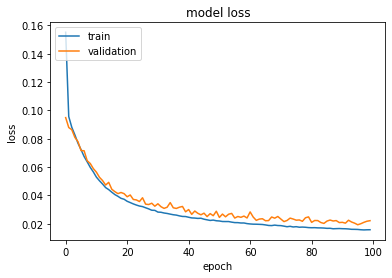

Model: "functional_155"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_78 (InputLayer)        [(None, 3, 3, 96)]        0         
_________________________________________________________________
conv2d_190 (Conv2D)          (None, 3, 3, 150)         14550     
_________________________________________________________________
conv2d_191 (Conv2D)          (None, 1, 1, 150)         202650    
_________________________________________________________________
conv2d_192 (Conv2D)          (None, 1, 1, 200)         30200     
_________________________________________________________________
dropout_77 (Dropout)         (None, 1, 1, 200)         0         
_________________________________________________________________
conv2d_193 (Conv2D)          (None, 1, 1, 1)           201       
Total params: 247,601
Trainable params: 247,601
Non-trainable params: 0
______________________________________________

2022-03-08 16:11:46.924612: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 16:11:46.924739: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 21/259 [=>............................] - ETA: 1s - loss: 0.4048 - accuracy: 0.0000e+00

2022-03-08 16:11:47.606716: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 16:11:47.633648: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 16:11:47.633979: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 16:11:47.635419: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_16_11_47
2022-03-08 16:11:47.636070: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_16_11_47/vw.trace.json.gz
2022-03-08 16:11:47.636158: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 16:11:47.637121: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

259/259 [==============================] - 2s 9ms/step - loss: 0.3971 - accuracy: 0.0000e+00 - val_loss: 0.4192 - val_accuracy: 0.0000e+00
Epoch 2/100
259/259 [==============================] - 2s 8ms/step - loss: 0.2640 - accuracy: 1.6638e-04 - val_loss: 0.1083 - val_accuracy: 1.2100e-04
Epoch 3/100
259/259 [==============================] - 2s 8ms/step - loss: 0.1001 - accuracy: 2.7227e-04 - val_loss: 0.0890 - val_accuracy: 2.4200e-04
Epoch 4/100
259/259 [==============================] - 2s 8ms/step - loss: 0.0886 - accuracy: 3.0252e-04 - val_loss: 0.0814 - val_accuracy: 3.6300e-04
Epoch 5/100
259/259 [==============================] - 2s 8ms/step - loss: 0.0807 - accuracy: 3.3277e-04 - val_loss: 0.0769 - val_accuracy: 3.0250e-04
Epoch 6/100
259/259 [==============================] - 2s 8ms/step - loss: 0.0739 - accuracy: 3.9327e-04 - val_loss: 0.0703 - val_accuracy: 3.0250e-04
Epoch 7/100
259/259 [==============================] - 2s 8ms/step - loss: 0.0683 - accuracy: 4.6890e-04 -

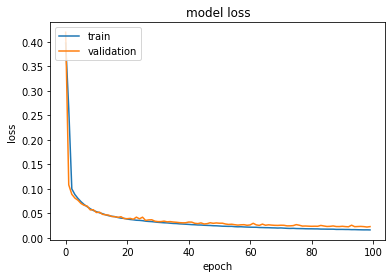

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_157"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_79 (InputLayer)        [(None, 84, 50, 96)]      0         
_________________________________________________________________
conv2d_194 (Conv2D)          (None, 84, 50, 150)       14550     
_________________________________________________________________
conv2d_195 (Conv2D)          (None, 84, 50, 150)       202650    
_________________________________________________________________
conv2d_196 (Conv2D)          (None, 84, 50, 200)       30200     
_________________________________________________________________
dropout_78 (Dropout)         (None, 84, 50, 200)       0         
_________________________________________________________________
conv2d_197 (Conv2D)          (None, 84, 50, 1)         201       
Total params: 247,601
Trainable params: 247,601
Non-trainable params: 0

In [114]:
# 5 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv2d --layer 5 --train --label_type O"
plot_loss(cmd)# train and test the conv2d_new model
cmd = "--train_subjects s01_still --DWI 96 --model conv2d_new --layer 2 --train --label_type O"
plot_loss(cmd)
cmd = "--test_subjects s02_still --DWI 96 --model conv2d_new --layer 2 --label_type O"
args = model_parser().parse_args(cmd.split())
test_model(args)

In [115]:
# 5 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv2d --layer 5 --label_type O"
args = model_parser().parse_args(cmd.split())
test_model(args)

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_159"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_80 (InputLayer)        [(None, 84, 50, 96)]      0         
_________________________________________________________________
conv2d_198 (Conv2D)          (None, 84, 50, 150)       129750    
_________________________________________________________________
conv2d_199 (Conv2D)          (None, 84, 50, 200)       30200     
_________________________________________________________________
conv2d_200 (Conv2D)          (None, 84, 50, 200)       40200     
_________________________________________________________________
conv2d_201 (Conv2D)          (None, 84, 50, 200)       40200     
_________________________________________________________________
conv2d_202 (Conv2D)          (None, 84, 50, 200)       40200     
_________________________________________________________________
dropo

Model: "functional_161"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_81 (InputLayer)        [(None, 3, 3, 96)]        0         
_________________________________________________________________
conv2d_204 (Conv2D)          (None, 3, 3, 150)         14550     
_________________________________________________________________
conv2d_205 (Conv2D)          (None, 1, 1, 150)         202650    
_________________________________________________________________
conv2d_206 (Conv2D)          (None, 1, 1, 200)         30200     
_________________________________________________________________
conv2d_207 (Conv2D)          (None, 1, 1, 200)         40200     
_________________________________________________________________
conv2d_208 (Conv2D)          (None, 1, 1, 200)         40200     
_________________________________________________________________
conv2d_209 (Conv2D)          (None, 1, 1, 200)      

2022-03-08 16:15:02.281214: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 16:15:02.281302: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 15/259 [>.............................] - ETA: 2s - loss: 0.1970 - accuracy: 0.0000e+00

2022-03-08 16:15:02.990554: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 16:15:03.027135: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 16:15:03.027572: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 16:15:03.029040: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_16_15_03
2022-03-08 16:15:03.029808: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_16_15_03/vw.trace.json.gz
2022-03-08 16:15:03.029923: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 16:15:03.030982: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

259/259 [==============================] - 3s 11ms/step - loss: 0.1107 - accuracy: 2.5714e-04 - val_loss: 0.0891 - val_accuracy: 3.0250e-04
Epoch 2/100
259/259 [==============================] - 3s 11ms/step - loss: 0.0864 - accuracy: 2.8739e-04 - val_loss: 0.0854 - val_accuracy: 3.0250e-04
Epoch 3/100
259/259 [==============================] - 3s 11ms/step - loss: 0.0766 - accuracy: 3.1764e-04 - val_loss: 0.0866 - val_accuracy: 3.6300e-04
Epoch 4/100
259/259 [==============================] - 3s 11ms/step - loss: 0.0689 - accuracy: 3.4789e-04 - val_loss: 0.0672 - val_accuracy: 3.0250e-04
Epoch 5/100
259/259 [==============================] - 3s 11ms/step - loss: 0.0622 - accuracy: 4.2352e-04 - val_loss: 0.0628 - val_accuracy: 3.0250e-04
Epoch 6/100
259/259 [==============================] - 3s 11ms/step - loss: 0.0575 - accuracy: 3.7815e-04 - val_loss: 0.0600 - val_accuracy: 3.0250e-04
Epoch 7/100
259/259 [==============================] - 3s 11ms/step - loss: 0.0529 - accuracy: 4.537

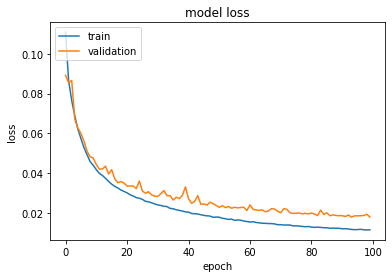

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_163"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_82 (InputLayer)        [(None, 84, 50, 96)]      0         
_________________________________________________________________
conv2d_211 (Conv2D)          (None, 84, 50, 150)       14550     
_________________________________________________________________
conv2d_212 (Conv2D)          (None, 84, 50, 150)       202650    
_________________________________________________________________
conv2d_213 (Conv2D)          (None, 84, 50, 200)       30200     
_________________________________________________________________
conv2d_214 (Conv2D)          (None, 84, 50, 200)       40200     
_________________________________________________________________
conv2d_215 (Conv2D)          (None, 84, 50, 200)       40200     
_________________________________________________________________
conv2

In [116]:
# train and test the conv2d_new model
cmd = "--train_subjects s01_still --DWI 96 --model conv2d_new --layer 5 --train --label_type O"
plot_loss(cmd)
cmd = "--test_subjects s02_still --DWI 96 --model conv2d_new --layer 5 --label_type O"
args = model_parser().parse_args(cmd.split())
test_model(args)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for old model: (0.12292381592350198, -51.878827573252615, 0.9254668438069428)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for new model: (0.09621144268786688, -55.13963795945485, 0.9471538997827852)


Text(0.5, 0.98, 'Center slices for s02_still_ODI predicted by new model image')

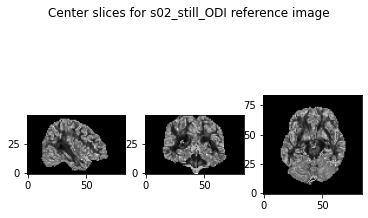

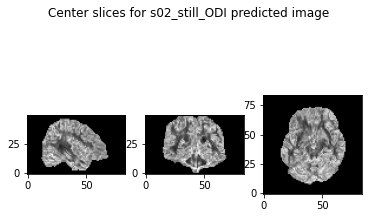

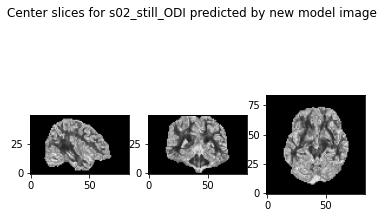

In [117]:
# load the reference img and pred imgs (the one generated from old model and new model)
pred_path = '../Net-DTI/nii/s02_still-ODI-96-first-conv2d-5layer.nii'
pred_ODI_img = nib.load(pred_path)
pred_ODI_img_data = pred_ODI_img.get_fdata()
new_pred_path = '../Net-DTI/nii/s02_still-ODI-96-first-conv2d_new-5layer.nii'
new_pred_ODI_img = nib.load(new_pred_path)
new_pred_ODI_img_data = new_pred_ODI_img.get_fdata()


# evaluate the model
eval_re = evaluate_model(pred_ODI_img_data, s02_ODI_img_data, s02_mask_img_data)
print("evaluation score for old model: " + str(eval_re))
new_eval_re = evaluate_model(new_pred_ODI_img_data, s02_ODI_img_data, s02_mask_img_data)
print("evaluation score for new model: " + str(new_eval_re))

# visualise both ref img and pred img
ref_slice_0 = s02_ODI_img_data[26, :, :]
ref_slice_1 = s02_ODI_img_data[:, 30, :]
ref_slice_2 = s02_ODI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_ODI reference image")

pred_slice_0 = pred_ODI_img_data[26, :, :]
pred_slice_1 = pred_ODI_img_data[:, 30, :]
pred_slice_2 = pred_ODI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_ODI predicted image")

new_pred_slice_0 = new_pred_ODI_img_data[26, :, :]
new_pred_slice_1 = new_pred_ODI_img_data[:, 30, :]
new_pred_slice_2 = new_pred_ODI_img_data[:, :, 16]
show_slices([new_pred_slice_0, new_pred_slice_1, new_pred_slice_2])
plt.suptitle("Center slices for s02_still_ODI predicted by new model image")

<strong>6 layer</strong>

Model: "functional_165"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_83 (InputLayer)        [(None, 3, 3, 96)]        0         
_________________________________________________________________
conv2d_218 (Conv2D)          (None, 1, 1, 150)         129750    
_________________________________________________________________
conv2d_219 (Conv2D)          (None, 1, 1, 200)         30200     
_________________________________________________________________
conv2d_220 (Conv2D)          (None, 1, 1, 200)         40200     
_________________________________________________________________
conv2d_221 (Conv2D)          (None, 1, 1, 200)         40200     
_________________________________________________________________
conv2d_222 (Conv2D)          (None, 1, 1, 200)         40200     
_________________________________________________________________
conv2d_223 (Conv2D)          (None, 1, 1, 200)      

2022-03-08 16:19:29.026560: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 16:19:29.026664: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 20/259 [=>............................] - ETA: 1s - loss: 0.1673 - accuracy: 0.0000e+00

2022-03-08 16:19:29.830229: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 16:19:29.868725: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 16:19:29.869233: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 16:19:29.871706: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_16_19_29
2022-03-08 16:19:29.872597: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_16_19_29/vw.trace.json.gz
2022-03-08 16:19:29.872885: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 16:19:29.874441: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

259/259 [==============================] - 2s 9ms/step - loss: 0.1114 - accuracy: 2.4201e-04 - val_loss: 0.0936 - val_accuracy: 6.0500e-05
Epoch 2/100
259/259 [==============================] - 2s 8ms/step - loss: 0.0920 - accuracy: 2.4201e-04 - val_loss: 0.0873 - val_accuracy: 6.0500e-05
Epoch 3/100
259/259 [==============================] - 2s 8ms/step - loss: 0.0830 - accuracy: 2.7227e-04 - val_loss: 0.0817 - val_accuracy: 2.4200e-04
Epoch 4/100
259/259 [==============================] - 2s 7ms/step - loss: 0.0762 - accuracy: 3.4789e-04 - val_loss: 0.0785 - val_accuracy: 2.4200e-04
Epoch 5/100
259/259 [==============================] - 2s 7ms/step - loss: 0.0692 - accuracy: 3.9327e-04 - val_loss: 0.0716 - val_accuracy: 2.4200e-04
Epoch 6/100
259/259 [==============================] - 2s 8ms/step - loss: 0.0639 - accuracy: 4.2352e-04 - val_loss: 0.0711 - val_accuracy: 1.8150e-04
Epoch 7/100
259/259 [==============================] - 2s 7ms/step - loss: 0.0589 - accuracy: 3.9327e-04 -

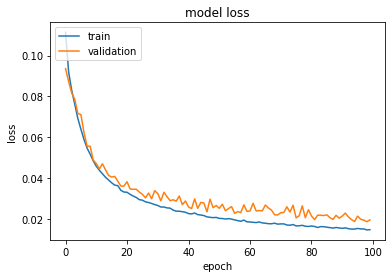

In [118]:
# 6 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv2d --layer 6 --train --label_type O"
plot_loss(cmd)

In [119]:
# 6 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv2d --layer 6 --label_type O"
args = model_parser().parse_args(cmd.split())
test_model(args)

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_167"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_84 (InputLayer)        [(None, 84, 50, 96)]      0         
_________________________________________________________________
conv2d_225 (Conv2D)          (None, 84, 50, 150)       129750    
_________________________________________________________________
conv2d_226 (Conv2D)          (None, 84, 50, 200)       30200     
_________________________________________________________________
conv2d_227 (Conv2D)          (None, 84, 50, 200)       40200     
_________________________________________________________________
conv2d_228 (Conv2D)          (None, 84, 50, 200)       40200     
_________________________________________________________________
conv2d_229 (Conv2D)          (None, 84, 50, 200)       40200     
_________________________________________________________________
conv2

Model: "functional_169"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_85 (InputLayer)        [(None, 3, 3, 96)]        0         
_________________________________________________________________
conv2d_232 (Conv2D)          (None, 3, 3, 150)         14550     
_________________________________________________________________
conv2d_233 (Conv2D)          (None, 1, 1, 150)         202650    
_________________________________________________________________
conv2d_234 (Conv2D)          (None, 1, 1, 200)         30200     
_________________________________________________________________
conv2d_235 (Conv2D)          (None, 1, 1, 200)         40200     
_________________________________________________________________
conv2d_236 (Conv2D)          (None, 1, 1, 200)         40200     
_________________________________________________________________
conv2d_237 (Conv2D)          (None, 1, 1, 200)      

2022-03-08 16:22:39.065397: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 16:22:39.065513: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 14/259 [>.............................] - ETA: 3s - loss: 0.2015 - accuracy: 5.5804e-04

2022-03-08 16:22:40.314764: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 16:22:40.376727: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 16:22:40.377182: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 16:22:40.378837: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_16_22_40
2022-03-08 16:22:40.379662: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_16_22_40/vw.trace.json.gz
2022-03-08 16:22:40.379783: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 16:22:40.380973: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

259/259 [==============================] - 3s 13ms/step - loss: 0.1079 - accuracy: 2.8739e-04 - val_loss: 0.0888 - val_accuracy: 1.2100e-04
Epoch 2/100
259/259 [==============================] - 3s 12ms/step - loss: 0.0842 - accuracy: 3.0252e-04 - val_loss: 0.0816 - val_accuracy: 2.4200e-04
Epoch 3/100
259/259 [==============================] - 3s 12ms/step - loss: 0.0732 - accuracy: 3.1764e-04 - val_loss: 0.0706 - val_accuracy: 3.6300e-04
Epoch 4/100
259/259 [==============================] - 3s 12ms/step - loss: 0.0652 - accuracy: 3.9327e-04 - val_loss: 0.0664 - val_accuracy: 3.0250e-04
Epoch 5/100
259/259 [==============================] - 3s 12ms/step - loss: 0.0581 - accuracy: 3.7815e-04 - val_loss: 0.0591 - val_accuracy: 3.0250e-04
Epoch 6/100
259/259 [==============================] - 3s 12ms/step - loss: 0.0534 - accuracy: 3.9327e-04 - val_loss: 0.0564 - val_accuracy: 3.6300e-04
Epoch 7/100
259/259 [==============================] - 3s 12ms/step - loss: 0.0485 - accuracy: 4.235

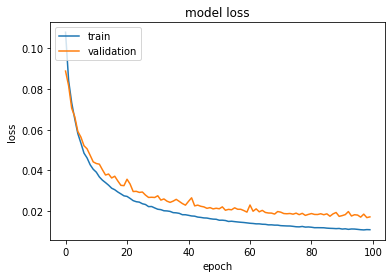

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_171"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_86 (InputLayer)        [(None, 84, 50, 96)]      0         
_________________________________________________________________
conv2d_240 (Conv2D)          (None, 84, 50, 150)       14550     
_________________________________________________________________
conv2d_241 (Conv2D)          (None, 84, 50, 150)       202650    
_________________________________________________________________
conv2d_242 (Conv2D)          (None, 84, 50, 200)       30200     
_________________________________________________________________
conv2d_243 (Conv2D)          (None, 84, 50, 200)       40200     
_________________________________________________________________
conv2d_244 (Conv2D)          (None, 84, 50, 200)       40200     
_________________________________________________________________
conv2

In [120]:
# train and test the conv2d_new model
cmd = "--train_subjects s01_still --DWI 96 --model conv2d_new --layer 6 --train --label_type O"
plot_loss(cmd)
cmd = "--test_subjects s02_still --DWI 96 --model conv2d_new --layer 6 --label_type O"
args = model_parser().parse_args(cmd.split())
test_model(args)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for old model: (0.12337758572122229, -51.825840861940044, 0.9218439833278087)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for new model: (0.09861034477063399, -54.83647158458918, 0.9477762167926599)


Text(0.5, 0.98, 'Center slices for s02_still_ODI predicted by new model image')

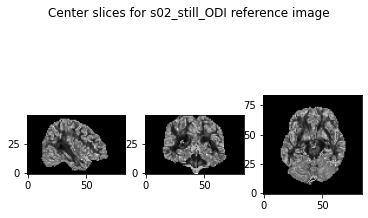

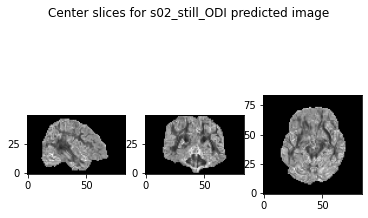

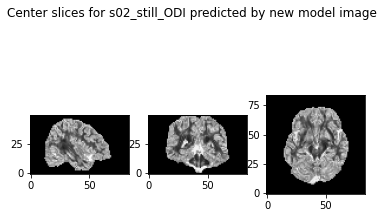

In [121]:
# load the reference img and pred imgs (the one generated from old model and new model)
pred_path = '../Net-DTI/nii/s02_still-ODI-96-first-conv2d-6layer.nii'
pred_ODI_img = nib.load(pred_path)
pred_ODI_img_data = pred_ODI_img.get_fdata()
new_pred_path = '../Net-DTI/nii/s02_still-ODI-96-first-conv2d_new-6layer.nii'
new_pred_ODI_img = nib.load(new_pred_path)
new_pred_ODI_img_data = new_pred_ODI_img.get_fdata()


# evaluate the model
eval_re = evaluate_model(pred_ODI_img_data, s02_ODI_img_data, s02_mask_img_data)
print("evaluation score for old model: " + str(eval_re))
new_eval_re = evaluate_model(new_pred_ODI_img_data, s02_ODI_img_data, s02_mask_img_data)
print("evaluation score for new model: " + str(new_eval_re))

# visualise both ref img and pred img
ref_slice_0 = s02_ODI_img_data[26, :, :]
ref_slice_1 = s02_ODI_img_data[:, 30, :]
ref_slice_2 = s02_ODI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_ODI reference image")

pred_slice_0 = pred_ODI_img_data[26, :, :]
pred_slice_1 = pred_ODI_img_data[:, 30, :]
pred_slice_2 = pred_ODI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_ODI predicted image")

new_pred_slice_0 = new_pred_ODI_img_data[26, :, :]
new_pred_slice_1 = new_pred_ODI_img_data[:, 30, :]
new_pred_slice_2 = new_pred_ODI_img_data[:, :, 16]
show_slices([new_pred_slice_0, new_pred_slice_1, new_pred_slice_2])
plt.suptitle("Center slices for s02_still_ODI predicted by new model image")

<strong>Training subject: s01_still<br/>

Test subject: s02_still<br/>

Network; 2D-CNN<br/>

Outcome: FWF<br/>


The training data is stored in datasets/data/s01_still-96-first-2d.mat<br/>

The training label is stored in datasets/label/s01_still-FWF-96-first-2d.mat<br/>

The testing data is stored in datasets/data/s02_still-96-first.mat<br/>

The testing label is stored in datasets/label/s02_still-FWF-96-first.mat</strong>

In [122]:
"""
Generate training dataset FWF for 2D CNN.
Using all of the DWI. 96. as training size.
"""
cmd = "--subjects s01_still --nDWI 96 --conv2d_train --label_type F"
args = data_parser().parse_args(cmd.split())
generate_data(args)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
152
425
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
152
425
training dataset has shape:(82641, 3, 3, 96)
training label has shape:(82641, 1, 1, 1)


<strong>1 layer</strong>

Model: "functional_173"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_87 (InputLayer)        [(None, 3, 3, 96)]        0         
_________________________________________________________________
conv2d_248 (Conv2D)          (None, 1, 1, 150)         129750    
_________________________________________________________________
dropout_86 (Dropout)         (None, 1, 1, 150)         0         
_________________________________________________________________
conv2d_249 (Conv2D)          (None, 1, 1, 1)           151       
Total params: 129,901
Trainable params: 129,901
Non-trainable params: 0
_________________________________________________________________
['F']
Training start ...


2022-03-08 16:27:45.179753: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 16:27:45.179851: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 54/259 [=====>........................] - ETA: 0s - loss: 0.1275 - accuracy: 0.3947

2022-03-08 16:27:45.807862: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 16:27:45.844142: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 16:27:45.844412: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 16:27:45.845599: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_16_27_45
2022-03-08 16:27:45.846149: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_16_27_45/vw.trace.json.gz
2022-03-08 16:27:45.846235: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 16:27:45.847136: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

259/259 [==============================] - 1s 3ms/step - loss: 0.1200 - accuracy: 0.3964 - val_loss: 0.1231 - val_accuracy: 0.4004
Epoch 2/100
259/259 [==============================] - 1s 3ms/step - loss: 0.1176 - accuracy: 0.3973 - val_loss: 0.1233 - val_accuracy: 0.4004
Epoch 3/100
259/259 [==============================] - 1s 3ms/step - loss: 0.1172 - accuracy: 0.3973 - val_loss: 0.1229 - val_accuracy: 0.4004
Epoch 4/100
259/259 [==============================] - 1s 3ms/step - loss: 0.1172 - accuracy: 0.3974 - val_loss: 0.1232 - val_accuracy: 0.4004
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.1171 - accuracy: 0.3975 - val_loss: 0.1226 - val_accuracy: 0.4004
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.1161 - accuracy: 0.3984 - val_loss: 0.1219 - val_accuracy: 0.4007
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.1149 - accuracy: 0.3994 - val_loss: 0.1190 - val_accuracy: 0.4009
Epoch 8/100

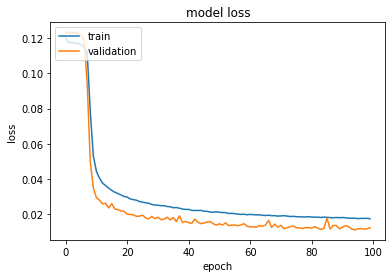

In [123]:
# 1 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv2d --layer 1 --train --label_type F"
plot_loss(cmd)

In [124]:
# 1 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv2d --layer 1 --label_type F"
args = model_parser().parse_args(cmd.split())
test_model(args)

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_175"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_88 (InputLayer)        [(None, 84, 50, 96)]      0         
_________________________________________________________________
conv2d_250 (Conv2D)          (None, 84, 50, 150)       129750    
_________________________________________________________________
dropout_87 (Dropout)         (None, 84, 50, 150)       0         
_________________________________________________________________
conv2d_251 (Conv2D)          (None, 84, 50, 1)         151       
Total params: 129,901
Trainable params: 129,901
Non-trainable params: 0
_________________________________________________________________
(84, 84, 50, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
0.08180808155192405


Model: "functional_423"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_212 (InputLayer)       [(None, 3, 3, 96)]        0         
_________________________________________________________________
conv2d_404 (Conv2D)          (None, 3, 3, 150)         14550     
_________________________________________________________________
conv2d_405 (Conv2D)          (None, 1, 1, 150)         202650    
_________________________________________________________________
dropout_211 (Dropout)        (None, 1, 1, 150)         0         
_________________________________________________________________
conv2d_406 (Conv2D)          (None, 1, 1, 1)           151       
Total params: 217,351
Trainable params: 217,351
Non-trainable params: 0
_________________________________________________________________
['F']
Training start ...


2022-03-08 20:48:44.098302: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 20:48:44.098427: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 27/259 [==>...........................] - ETA: 1s - loss: 0.1123 - accuracy: 0.4099

2022-03-08 20:48:44.810192: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 20:48:44.833090: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 20:48:44.833411: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 20:48:44.834562: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_20_48_44
2022-03-08 20:48:44.835030: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_20_48_44/vw.trace.json.gz
2022-03-08 20:48:44.835094: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 20:48:44.835818: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

259/259 [==============================] - 1s 6ms/step - loss: 0.0899 - accuracy: 0.4063 - val_loss: 0.0656 - val_accuracy: 0.4034
Epoch 2/100
259/259 [==============================] - 1s 5ms/step - loss: 0.0516 - accuracy: 0.4105 - val_loss: 0.0395 - val_accuracy: 0.4038
Epoch 3/100
259/259 [==============================] - 1s 5ms/step - loss: 0.0375 - accuracy: 0.4106 - val_loss: 0.0305 - val_accuracy: 0.4037
Epoch 4/100
259/259 [==============================] - 1s 5ms/step - loss: 0.0320 - accuracy: 0.4107 - val_loss: 0.0253 - val_accuracy: 0.4037
Epoch 5/100
259/259 [==============================] - 1s 5ms/step - loss: 0.0291 - accuracy: 0.4107 - val_loss: 0.0230 - val_accuracy: 0.4037
Epoch 6/100
259/259 [==============================] - 1s 6ms/step - loss: 0.0265 - accuracy: 0.4107 - val_loss: 0.0221 - val_accuracy: 0.4037
Epoch 7/100
259/259 [==============================] - 1s 5ms/step - loss: 0.0243 - accuracy: 0.4107 - val_loss: 0.0211 - val_accuracy: 0.4037
Epoch 8/100

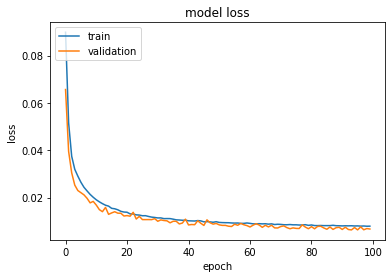

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_425"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_213 (InputLayer)       [(None, 84, 50, 96)]      0         
_________________________________________________________________
conv2d_407 (Conv2D)          (None, 84, 50, 150)       14550     
_________________________________________________________________
conv2d_408 (Conv2D)          (None, 84, 50, 150)       202650    
_________________________________________________________________
dropout_212 (Dropout)        (None, 84, 50, 150)       0         
_________________________________________________________________
conv2d_409 (Conv2D)          (None, 84, 50, 1)         151       
Total params: 217,351
Trainable params: 217,351
Non-trainable params: 0
_________________________________________________________________
(84, 84, 50, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
0

In [243]:
# train and test the conv2d_new model
cmd = "--train_subjects s01_still --DWI 96 --model conv2d_new --layer 1 --train --label_type F"
plot_loss(cmd)
cmd = "--test_subjects s02_still --DWI 96 --model conv2d_new --layer 1 --label_type F"
args = model_parser().parse_args(cmd.split())
test_model(args)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(0.08180808155192405, -63.33170132825685, 0.9610119051116631)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for new model: (0.07432707616529502, -65.24971598961649, 0.9581334364126342)


Text(0.5, 0.98, 'Center slices for s02_still_FWF predicted by new model image')

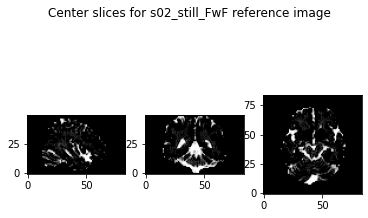

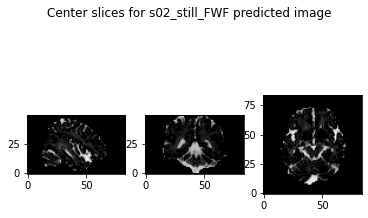

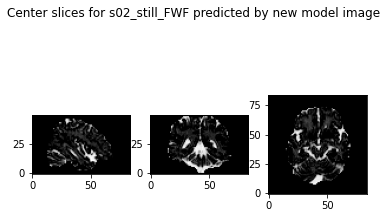

In [244]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-conv2d-1layer.nii'
pred_FWF_img = nib.load(pred_path)
pred_FWF_img_data = pred_FWF_img.get_fdata()
new_pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-conv2d_new-1layer.nii'
new_pred_FWF_img = nib.load(new_pred_path)
new_pred_FWF_img_data = new_pred_FWF_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_FWF_img_data, s02_FWF_img_data, s02_mask_img_data)
print(eval_re)
new_eval_re = evaluate_model(new_pred_FWF_img_data, s02_FWF_img_data, s02_mask_img_data)
print("evaluation score for new model: " + str(new_eval_re))

# visualise both ref img and pred img
ref_slice_0 = s02_FWF_img_data[26, :, :]
ref_slice_1 = s02_FWF_img_data[:, 30, :]
ref_slice_2 = s02_FWF_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_FwF reference image")

pred_slice_0 = pred_FWF_img_data[26, :, :]
pred_slice_1 = pred_FWF_img_data[:, 30, :]
pred_slice_2 = pred_FWF_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_FWF predicted image")

new_pred_slice_0 = new_pred_FWF_img_data[26, :, :]
new_pred_slice_1 = new_pred_FWF_img_data[:, 30, :]
new_pred_slice_2 = new_pred_FWF_img_data[:, :, 16]
show_slices([new_pred_slice_0, new_pred_slice_1, new_pred_slice_2])
plt.suptitle("Center slices for s02_still_FWF predicted by new model image")

<strong>2 layer</strong>

Model: "functional_181"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_91 (InputLayer)        [(None, 3, 3, 96)]        0         
_________________________________________________________________
conv2d_258 (Conv2D)          (None, 1, 1, 150)         129750    
_________________________________________________________________
conv2d_259 (Conv2D)          (None, 1, 1, 200)         30200     
_________________________________________________________________
dropout_90 (Dropout)         (None, 1, 1, 200)         0         
_________________________________________________________________
conv2d_260 (Conv2D)          (None, 1, 1, 1)           201       
Total params: 160,151
Trainable params: 160,151
Non-trainable params: 0
_________________________________________________________________
['F']
Training start ...


2022-03-08 16:29:51.432372: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 16:29:51.432481: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 45/259 [====>.........................] - ETA: 0s - loss: 0.1168 - accuracy: 0.4001

2022-03-08 16:29:52.074625: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 16:29:52.097109: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 16:29:52.097448: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 16:29:52.098908: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_16_29_52
2022-03-08 16:29:52.099573: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_16_29_52/vw.trace.json.gz
2022-03-08 16:29:52.099678: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 16:29:52.100883: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

259/259 [==============================] - 1s 4ms/step - loss: 0.1177 - accuracy: 0.3968 - val_loss: 0.1233 - val_accuracy: 0.4004
Epoch 2/100
259/259 [==============================] - 1s 4ms/step - loss: 0.1176 - accuracy: 0.3969 - val_loss: 0.1233 - val_accuracy: 0.4004
Epoch 3/100
259/259 [==============================] - 1s 4ms/step - loss: 0.1176 - accuracy: 0.3969 - val_loss: 0.1233 - val_accuracy: 0.4004
Epoch 4/100
259/259 [==============================] - 1s 4ms/step - loss: 0.1176 - accuracy: 0.3969 - val_loss: 0.1233 - val_accuracy: 0.4004
Epoch 5/100
259/259 [==============================] - 1s 4ms/step - loss: 0.1176 - accuracy: 0.3969 - val_loss: 0.1233 - val_accuracy: 0.4004
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.1176 - accuracy: 0.3969 - val_loss: 0.1233 - val_accuracy: 0.4004
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.1176 - accuracy: 0.3969 - val_loss: 0.1233 - val_accuracy: 0.4004
Epoch 8/100

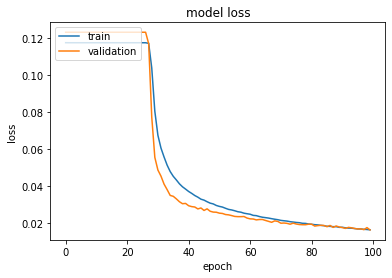

In [127]:
# 2 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv2d --layer 2 --train --label_type F"
plot_loss(cmd)

In [128]:
# 2 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv2d --layer 2 --label_type F"
args = model_parser().parse_args(cmd.split())
test_model(args)

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_183"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_92 (InputLayer)        [(None, 84, 50, 96)]      0         
_________________________________________________________________
conv2d_261 (Conv2D)          (None, 84, 50, 150)       129750    
_________________________________________________________________
conv2d_262 (Conv2D)          (None, 84, 50, 200)       30200     
_________________________________________________________________
dropout_91 (Dropout)         (None, 84, 50, 200)       0         
_________________________________________________________________
conv2d_263 (Conv2D)          (None, 84, 50, 1)         201       
Total params: 160,151
Trainable params: 160,151
Non-trainable params: 0
_________________________________________________________________
(84, 84, 50, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
0

Model: "functional_185"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_93 (InputLayer)        [(None, 3, 3, 96)]        0         
_________________________________________________________________
conv2d_264 (Conv2D)          (None, 3, 3, 150)         14550     
_________________________________________________________________
conv2d_265 (Conv2D)          (None, 1, 1, 150)         202650    
_________________________________________________________________
conv2d_266 (Conv2D)          (None, 1, 1, 200)         30200     
_________________________________________________________________
dropout_92 (Dropout)         (None, 1, 1, 200)         0         
_________________________________________________________________
conv2d_267 (Conv2D)          (None, 1, 1, 1)           201       
Total params: 247,601
Trainable params: 247,601
Non-trainable params: 0
______________________________________________

2022-03-08 16:31:20.417741: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 16:31:20.417999: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 19/259 [=>............................] - ETA: 1s - loss: 0.1252 - accuracy: 0.3966

2022-03-08 16:31:21.160846: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 16:31:21.189702: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 16:31:21.190077: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 16:31:21.191853: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_16_31_21
2022-03-08 16:31:21.192696: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_16_31_21/vw.trace.json.gz
2022-03-08 16:31:21.192867: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 16:31:21.194327: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

259/259 [==============================] - 2s 9ms/step - loss: 0.1181 - accuracy: 0.3968 - val_loss: 0.1215 - val_accuracy: 0.4005
Epoch 2/100
259/259 [==============================] - 2s 8ms/step - loss: 0.0851 - accuracy: 0.4065 - val_loss: 0.0543 - val_accuracy: 0.4037
Epoch 3/100
259/259 [==============================] - 2s 8ms/step - loss: 0.0529 - accuracy: 0.4103 - val_loss: 0.0382 - val_accuracy: 0.4037
Epoch 4/100
259/259 [==============================] - 2s 8ms/step - loss: 0.0402 - accuracy: 0.4107 - val_loss: 0.0314 - val_accuracy: 0.4037
Epoch 5/100
259/259 [==============================] - 2s 8ms/step - loss: 0.0333 - accuracy: 0.4107 - val_loss: 0.0260 - val_accuracy: 0.4037
Epoch 6/100
259/259 [==============================] - 2s 8ms/step - loss: 0.0292 - accuracy: 0.4107 - val_loss: 0.0265 - val_accuracy: 0.4037
Epoch 7/100
259/259 [==============================] - 2s 7ms/step - loss: 0.0266 - accuracy: 0.4107 - val_loss: 0.0205 - val_accuracy: 0.4037
Epoch 8/100

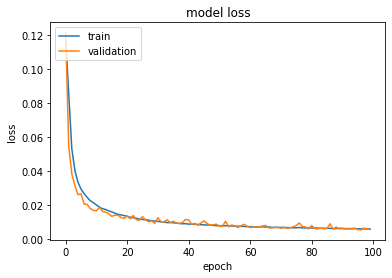

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_187"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_94 (InputLayer)        [(None, 84, 50, 96)]      0         
_________________________________________________________________
conv2d_268 (Conv2D)          (None, 84, 50, 150)       14550     
_________________________________________________________________
conv2d_269 (Conv2D)          (None, 84, 50, 150)       202650    
_________________________________________________________________
conv2d_270 (Conv2D)          (None, 84, 50, 200)       30200     
_________________________________________________________________
dropout_93 (Dropout)         (None, 84, 50, 200)       0         
_________________________________________________________________
conv2d_271 (Conv2D)          (None, 84, 50, 1)         201       
Total params: 247,601
Trainable params: 247,601
Non-trainable params: 0

In [129]:
# train and test the conv2d_new model
cmd = "--train_subjects s01_still --DWI 96 --model conv2d_new --layer 2 --train --label_type F"
plot_loss(cmd)
cmd = "--test_subjects s02_still --DWI 96 --model conv2d_new --layer 2 --label_type F"
args = model_parser().parse_args(cmd.split())
test_model(args)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(0.09954826203205919, -59.40637059189732, 0.9339132082104576)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for new model: (0.05500511741729786, -71.27069753253348, 0.9819212794005355)


Text(0.5, 0.98, 'Center slices for s02_still_FWF predicted by new model image')

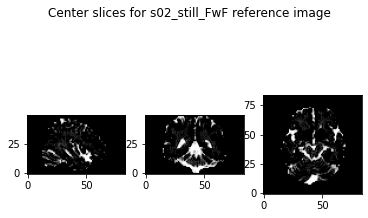

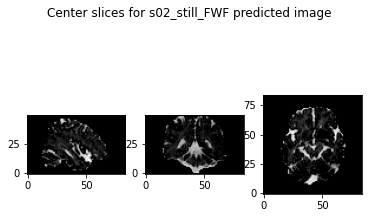

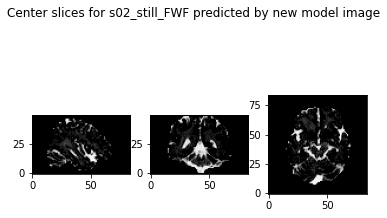

In [130]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-conv2d-2layer.nii'
pred_FWF_img = nib.load(pred_path)
pred_FWF_img_data = pred_FWF_img.get_fdata()
new_pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-conv2d_new-2layer.nii'
new_pred_FWF_img = nib.load(new_pred_path)
new_pred_FWF_img_data = new_pred_FWF_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_FWF_img_data, s02_FWF_img_data, s02_mask_img_data)
print(eval_re)
new_eval_re = evaluate_model(new_pred_FWF_img_data, s02_FWF_img_data, s02_mask_img_data)
print("evaluation score for new model: " + str(new_eval_re))

# visualise both ref img and pred img
ref_slice_0 = s02_FWF_img_data[26, :, :]
ref_slice_1 = s02_FWF_img_data[:, 30, :]
ref_slice_2 = s02_FWF_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_FwF reference image")

pred_slice_0 = pred_FWF_img_data[26, :, :]
pred_slice_1 = pred_FWF_img_data[:, 30, :]
pred_slice_2 = pred_FWF_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_FWF predicted image")

new_pred_slice_0 = new_pred_FWF_img_data[26, :, :]
new_pred_slice_1 = new_pred_FWF_img_data[:, 30, :]
new_pred_slice_2 = new_pred_FWF_img_data[:, :, 16]
show_slices([new_pred_slice_0, new_pred_slice_1, new_pred_slice_2])
plt.suptitle("Center slices for s02_still_FWF predicted by new model image")

<strong>3 layer</strong>

Model: "functional_189"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_95 (InputLayer)        [(None, 3, 3, 96)]        0         
_________________________________________________________________
conv2d_272 (Conv2D)          (None, 1, 1, 150)         129750    
_________________________________________________________________
conv2d_273 (Conv2D)          (None, 1, 1, 200)         30200     
_________________________________________________________________
conv2d_274 (Conv2D)          (None, 1, 1, 200)         40200     
_________________________________________________________________
dropout_94 (Dropout)         (None, 1, 1, 200)         0         
_________________________________________________________________
conv2d_275 (Conv2D)          (None, 1, 1, 1)           201       
Total params: 200,351
Trainable params: 200,351
Non-trainable params: 0
______________________________________________

2022-03-08 16:34:34.479973: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 16:34:34.480090: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 32/259 [==>...........................] - ETA: 1s - loss: 0.1221 - accuracy: 0.3943

2022-03-08 16:34:35.176969: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 16:34:35.206016: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 16:34:35.206352: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 16:34:35.207643: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_16_34_35
2022-03-08 16:34:35.208293: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_16_34_35/vw.trace.json.gz
2022-03-08 16:34:35.208379: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 16:34:35.209323: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

259/259 [==============================] - 1s 5ms/step - loss: 0.1137 - accuracy: 0.3994 - val_loss: 0.0840 - val_accuracy: 0.4037
Epoch 2/100
259/259 [==============================] - 1s 5ms/step - loss: 0.0719 - accuracy: 0.4088 - val_loss: 0.0458 - val_accuracy: 0.4037
Epoch 3/100
259/259 [==============================] - 1s 5ms/step - loss: 0.0478 - accuracy: 0.4104 - val_loss: 0.0338 - val_accuracy: 0.4037
Epoch 4/100
259/259 [==============================] - 1s 4ms/step - loss: 0.0376 - accuracy: 0.4106 - val_loss: 0.0278 - val_accuracy: 0.4037
Epoch 5/100
259/259 [==============================] - 1s 4ms/step - loss: 0.0332 - accuracy: 0.4107 - val_loss: 0.0289 - val_accuracy: 0.4037
Epoch 6/100
259/259 [==============================] - 1s 4ms/step - loss: 0.0308 - accuracy: 0.4107 - val_loss: 0.0248 - val_accuracy: 0.4037
Epoch 7/100
259/259 [==============================] - 1s 4ms/step - loss: 0.0281 - accuracy: 0.4107 - val_loss: 0.0248 - val_accuracy: 0.4037
Epoch 8/100

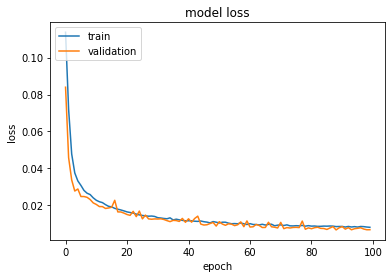

In [131]:
# 3 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv2d --layer 3 --train --label_type F"
plot_loss(cmd)

In [132]:
# 3 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv2d --layer 3 --label_type F"
args = model_parser().parse_args(cmd.split())
test_model(args)

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_191"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_96 (InputLayer)        [(None, 84, 50, 96)]      0         
_________________________________________________________________
conv2d_276 (Conv2D)          (None, 84, 50, 150)       129750    
_________________________________________________________________
conv2d_277 (Conv2D)          (None, 84, 50, 200)       30200     
_________________________________________________________________
conv2d_278 (Conv2D)          (None, 84, 50, 200)       40200     
_________________________________________________________________
dropout_95 (Dropout)         (None, 84, 50, 200)       0         
_________________________________________________________________
conv2d_279 (Conv2D)          (None, 84, 50, 1)         201       
Total params: 200,351
Trainable params: 200,351
Non-trainable params: 0

Model: "functional_427"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_214 (InputLayer)       [(None, 3, 3, 96)]        0         
_________________________________________________________________
conv2d_410 (Conv2D)          (None, 3, 3, 150)         14550     
_________________________________________________________________
conv2d_411 (Conv2D)          (None, 1, 1, 150)         202650    
_________________________________________________________________
conv2d_412 (Conv2D)          (None, 1, 1, 200)         30200     
_________________________________________________________________
conv2d_413 (Conv2D)          (None, 1, 1, 200)         40200     
_________________________________________________________________
dropout_213 (Dropout)        (None, 1, 1, 200)         0         
_________________________________________________________________
conv2d_414 (Conv2D)          (None, 1, 1, 1)        

2022-03-08 21:11:20.818878: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 21:11:20.819019: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 22/259 [=>............................] - ETA: 1s - loss: 0.1438 - accuracy: 0.3935

2022-03-08 21:11:21.564047: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 21:11:21.591643: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 21:11:21.591997: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 21:11:21.593170: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_21_11_21
2022-03-08 21:11:21.593730: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_21_11_21/vw.trace.json.gz
2022-03-08 21:11:21.593809: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 21:11:21.594607: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

259/259 [==============================] - 2s 7ms/step - loss: 0.0923 - accuracy: 0.4032 - val_loss: 0.0527 - val_accuracy: 0.4037
Epoch 2/100
259/259 [==============================] - 2s 7ms/step - loss: 0.0480 - accuracy: 0.4104 - val_loss: 0.0297 - val_accuracy: 0.4037
Epoch 3/100
259/259 [==============================] - 2s 6ms/step - loss: 0.0347 - accuracy: 0.4107 - val_loss: 0.0269 - val_accuracy: 0.4037
Epoch 4/100
259/259 [==============================] - 2s 6ms/step - loss: 0.0283 - accuracy: 0.4107 - val_loss: 0.0227 - val_accuracy: 0.4037
Epoch 5/100
259/259 [==============================] - 2s 7ms/step - loss: 0.0250 - accuracy: 0.4107 - val_loss: 0.0218 - val_accuracy: 0.4037
Epoch 6/100
259/259 [==============================] - 2s 6ms/step - loss: 0.0225 - accuracy: 0.4107 - val_loss: 0.0183 - val_accuracy: 0.4038
Epoch 7/100
259/259 [==============================] - 2s 6ms/step - loss: 0.0207 - accuracy: 0.4107 - val_loss: 0.0189 - val_accuracy: 0.4037
Epoch 8/100

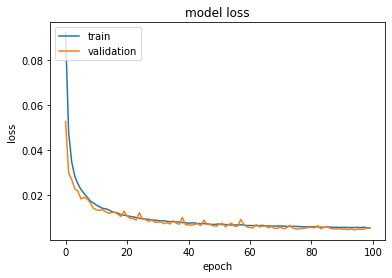

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_429"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_215 (InputLayer)       [(None, 84, 50, 96)]      0         
_________________________________________________________________
conv2d_415 (Conv2D)          (None, 84, 50, 150)       14550     
_________________________________________________________________
conv2d_416 (Conv2D)          (None, 84, 50, 150)       202650    
_________________________________________________________________
conv2d_417 (Conv2D)          (None, 84, 50, 200)       30200     
_________________________________________________________________
conv2d_418 (Conv2D)          (None, 84, 50, 200)       40200     
_________________________________________________________________
dropout_214 (Dropout)        (None, 84, 50, 200)       0         
_________________________________________________________________
conv2

In [245]:
# train and test the conv2d_new model
cmd = "--train_subjects s01_still --DWI 96 --model conv2d_new --layer 3 --train --label_type F"
plot_loss(cmd)
cmd = "--test_subjects s02_still --DWI 96 --model conv2d_new --layer 3 --label_type F"
args = model_parser().parse_args(cmd.split())
test_model(args)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(0.08109532327432306, -63.50671616637491, 0.9486399708261011)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for new model: (0.051087506971266246, -72.74842232227496, 0.9837221374623867)


Text(0.5, 0.98, 'Center slices for s02_still_FWF predicted by new model image')

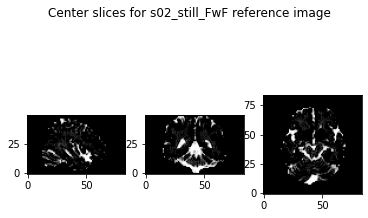

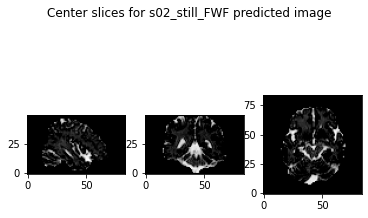

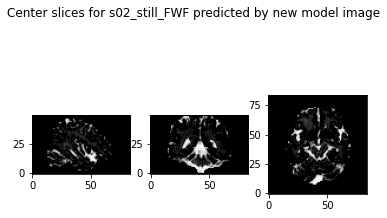

In [246]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-conv2d-3layer.nii'
pred_FWF_img = nib.load(pred_path)
pred_FWF_img_data = pred_FWF_img.get_fdata()
new_pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-conv2d_new-3layer.nii'
new_pred_FWF_img = nib.load(new_pred_path)
new_pred_FWF_img_data = new_pred_FWF_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_FWF_img_data, s02_FWF_img_data, s02_mask_img_data)
print(eval_re)
new_eval_re = evaluate_model(new_pred_FWF_img_data, s02_FWF_img_data, s02_mask_img_data)
print("evaluation score for new model: " + str(new_eval_re))

# visualise both ref img and pred img
ref_slice_0 = s02_FWF_img_data[26, :, :]
ref_slice_1 = s02_FWF_img_data[:, 30, :]
ref_slice_2 = s02_FWF_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_FwF reference image")

pred_slice_0 = pred_FWF_img_data[26, :, :]
pred_slice_1 = pred_FWF_img_data[:, 30, :]
pred_slice_2 = pred_FWF_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_FWF predicted image")

new_pred_slice_0 = new_pred_FWF_img_data[26, :, :]
new_pred_slice_1 = new_pred_FWF_img_data[:, 30, :]
new_pred_slice_2 = new_pred_FWF_img_data[:, :, 16]
show_slices([new_pred_slice_0, new_pred_slice_1, new_pred_slice_2])
plt.suptitle("Center slices for s02_still_FWF predicted by new model image")

<strong>4 layer</strong>

Model: "functional_197"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_99 (InputLayer)        [(None, 3, 3, 96)]        0         
_________________________________________________________________
conv2d_290 (Conv2D)          (None, 1, 1, 150)         129750    
_________________________________________________________________
conv2d_291 (Conv2D)          (None, 1, 1, 200)         30200     
_________________________________________________________________
conv2d_292 (Conv2D)          (None, 1, 1, 200)         40200     
_________________________________________________________________
conv2d_293 (Conv2D)          (None, 1, 1, 200)         40200     
_________________________________________________________________
dropout_98 (Dropout)         (None, 1, 1, 200)         0         
_________________________________________________________________
conv2d_294 (Conv2D)          (None, 1, 1, 1)        

2022-03-08 16:40:08.202639: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 16:40:08.202818: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 24/259 [=>............................] - ETA: 1s - loss: 0.1148 - accuracy: 0.4009

2022-03-08 16:40:09.050747: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 16:40:09.112106: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 16:40:09.112598: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 16:40:09.114639: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_16_40_09
2022-03-08 16:40:09.115497: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_16_40_09/vw.trace.json.gz
2022-03-08 16:40:09.115677: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 16:40:09.117245: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

259/259 [==============================] - 2s 7ms/step - loss: 0.0983 - accuracy: 0.4023 - val_loss: 0.0497 - val_accuracy: 0.4037
Epoch 2/100
259/259 [==============================] - 2s 6ms/step - loss: 0.0499 - accuracy: 0.4103 - val_loss: 0.0322 - val_accuracy: 0.4037
Epoch 3/100
259/259 [==============================] - 1s 6ms/step - loss: 0.0373 - accuracy: 0.4106 - val_loss: 0.0299 - val_accuracy: 0.4037
Epoch 4/100
259/259 [==============================] - 1s 6ms/step - loss: 0.0322 - accuracy: 0.4106 - val_loss: 0.0263 - val_accuracy: 0.4037
Epoch 5/100
259/259 [==============================] - 1s 5ms/step - loss: 0.0289 - accuracy: 0.4107 - val_loss: 0.0251 - val_accuracy: 0.4037
Epoch 6/100
259/259 [==============================] - 1s 5ms/step - loss: 0.0264 - accuracy: 0.4107 - val_loss: 0.0304 - val_accuracy: 0.4037
Epoch 7/100
259/259 [==============================] - 1s 5ms/step - loss: 0.0255 - accuracy: 0.4107 - val_loss: 0.0230 - val_accuracy: 0.4037
Epoch 8/100

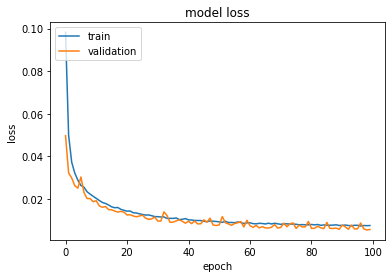

In [135]:
# 4 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv2d --layer 4 --train --label_type F"
plot_loss(cmd)

In [136]:
# 4 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv2d --layer 4 --label_type F"
args = model_parser().parse_args(cmd.split())
test_model(args)

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_199"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_100 (InputLayer)       [(None, 84, 50, 96)]      0         
_________________________________________________________________
conv2d_295 (Conv2D)          (None, 84, 50, 150)       129750    
_________________________________________________________________
conv2d_296 (Conv2D)          (None, 84, 50, 200)       30200     
_________________________________________________________________
conv2d_297 (Conv2D)          (None, 84, 50, 200)       40200     
_________________________________________________________________
conv2d_298 (Conv2D)          (None, 84, 50, 200)       40200     
_________________________________________________________________
dropout_99 (Dropout)         (None, 84, 50, 200)       0         
_________________________________________________________________
conv2

Model: "functional_201"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_101 (InputLayer)       [(None, 3, 3, 96)]        0         
_________________________________________________________________
conv2d_300 (Conv2D)          (None, 3, 3, 150)         14550     
_________________________________________________________________
conv2d_301 (Conv2D)          (None, 1, 1, 150)         202650    
_________________________________________________________________
conv2d_302 (Conv2D)          (None, 1, 1, 200)         30200     
_________________________________________________________________
conv2d_303 (Conv2D)          (None, 1, 1, 200)         40200     
_________________________________________________________________
conv2d_304 (Conv2D)          (None, 1, 1, 200)         40200     
_________________________________________________________________
dropout_100 (Dropout)        (None, 1, 1, 200)      

2022-03-08 16:42:30.265712: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 16:42:30.265809: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 17/259 [>.............................] - ETA: 2s - loss: 0.1081 - accuracy: 0.4028

2022-03-08 16:42:31.168997: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 16:42:31.211256: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 16:42:31.211683: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 16:42:31.213223: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_16_42_31
2022-03-08 16:42:31.213961: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_16_42_31/vw.trace.json.gz
2022-03-08 16:42:31.214079: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 16:42:31.215187: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

259/259 [==============================] - 3s 11ms/step - loss: 0.0581 - accuracy: 0.4097 - val_loss: 0.0362 - val_accuracy: 0.4037
Epoch 2/100
259/259 [==============================] - 3s 10ms/step - loss: 0.0359 - accuracy: 0.4107 - val_loss: 0.0269 - val_accuracy: 0.4038
Epoch 3/100
259/259 [==============================] - 2s 10ms/step - loss: 0.0294 - accuracy: 0.4107 - val_loss: 0.0237 - val_accuracy: 0.4037
Epoch 4/100
259/259 [==============================] - 3s 10ms/step - loss: 0.0259 - accuracy: 0.4107 - val_loss: 0.0211 - val_accuracy: 0.4037
Epoch 5/100
259/259 [==============================] - 2s 10ms/step - loss: 0.0232 - accuracy: 0.4107 - val_loss: 0.0197 - val_accuracy: 0.4037
Epoch 6/100
259/259 [==============================] - 3s 10ms/step - loss: 0.0209 - accuracy: 0.4107 - val_loss: 0.0178 - val_accuracy: 0.4038
Epoch 7/100
259/259 [==============================] - 2s 10ms/step - loss: 0.0191 - accuracy: 0.4107 - val_loss: 0.0221 - val_accuracy: 0.4037
Epoc

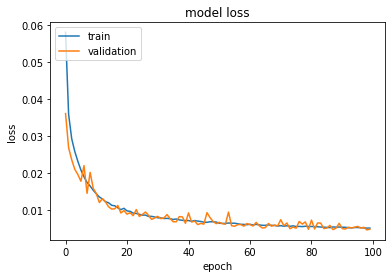

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_203"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_102 (InputLayer)       [(None, 84, 50, 96)]      0         
_________________________________________________________________
conv2d_306 (Conv2D)          (None, 84, 50, 150)       14550     
_________________________________________________________________
conv2d_307 (Conv2D)          (None, 84, 50, 150)       202650    
_________________________________________________________________
conv2d_308 (Conv2D)          (None, 84, 50, 200)       30200     
_________________________________________________________________
conv2d_309 (Conv2D)          (None, 84, 50, 200)       40200     
_________________________________________________________________
conv2d_310 (Conv2D)          (None, 84, 50, 200)       40200     
_________________________________________________________________
dropo

In [137]:
# train and test the conv2d_new model
cmd = "--train_subjects s01_still --DWI 96 --model conv2d_new --layer 4 --train --label_type F"
plot_loss(cmd)
cmd = "--test_subjects s02_still --DWI 96 --model conv2d_new --layer 4 --label_type F"
args = model_parser().parse_args(cmd.split())
test_model(args)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(0.0666028579299192, -67.44427226110282, 0.9751093431720806)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for new model: (0.0661449902069151, -67.58223895359114, 0.9656919300745653)


Text(0.5, 0.98, 'Center slices for s02_still_FWF predicted by new model image')

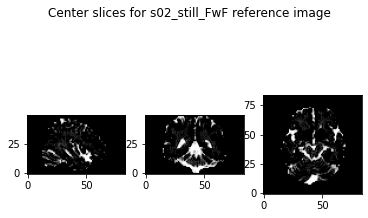

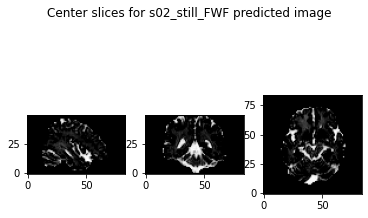

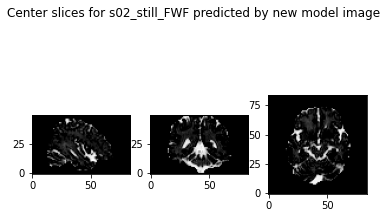

In [138]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-conv2d-4layer.nii'
pred_FWF_img = nib.load(pred_path)
pred_FWF_img_data = pred_FWF_img.get_fdata()
new_pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-conv2d_new-4layer.nii'
new_pred_FWF_img = nib.load(new_pred_path)
new_pred_FWF_img_data = new_pred_FWF_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_FWF_img_data, s02_FWF_img_data, s02_mask_img_data)
print(eval_re)
new_eval_re = evaluate_model(new_pred_FWF_img_data, s02_FWF_img_data, s02_mask_img_data)
print("evaluation score for new model: " + str(new_eval_re))

# visualise both ref img and pred img
ref_slice_0 = s02_FWF_img_data[26, :, :]
ref_slice_1 = s02_FWF_img_data[:, 30, :]
ref_slice_2 = s02_FWF_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_FwF reference image")

pred_slice_0 = pred_FWF_img_data[26, :, :]
pred_slice_1 = pred_FWF_img_data[:, 30, :]
pred_slice_2 = pred_FWF_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_FWF predicted image")

new_pred_slice_0 = new_pred_FWF_img_data[26, :, :]
new_pred_slice_1 = new_pred_FWF_img_data[:, 30, :]
new_pred_slice_2 = new_pred_FWF_img_data[:, :, 16]
show_slices([new_pred_slice_0, new_pred_slice_1, new_pred_slice_2])
plt.suptitle("Center slices for s02_still_FWF predicted by new model image")

<strong>5 layer</strong>

Model: "functional_205"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_103 (InputLayer)       [(None, 3, 3, 96)]        0         
_________________________________________________________________
conv2d_312 (Conv2D)          (None, 1, 1, 150)         129750    
_________________________________________________________________
conv2d_313 (Conv2D)          (None, 1, 1, 200)         30200     
_________________________________________________________________
conv2d_314 (Conv2D)          (None, 1, 1, 200)         40200     
_________________________________________________________________
conv2d_315 (Conv2D)          (None, 1, 1, 200)         40200     
_________________________________________________________________
conv2d_316 (Conv2D)          (None, 1, 1, 200)         40200     
_________________________________________________________________
dropout_102 (Dropout)        (None, 1, 1, 200)      

2022-03-08 16:46:35.009910: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 16:46:35.010004: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 21/259 [=>............................] - ETA: 1s - loss: 0.1339 - accuracy: 0.3921

2022-03-08 16:46:35.800275: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 16:46:35.837225: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 16:46:35.837668: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 16:46:35.839222: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_16_46_35
2022-03-08 16:46:35.839960: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_16_46_35/vw.trace.json.gz
2022-03-08 16:46:35.840121: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 16:46:35.841331: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

259/259 [==============================] - 2s 7ms/step - loss: 0.0871 - accuracy: 0.4052 - val_loss: 0.0451 - val_accuracy: 0.4037
Epoch 2/100
259/259 [==============================] - 2s 7ms/step - loss: 0.0449 - accuracy: 0.4104 - val_loss: 0.0323 - val_accuracy: 0.4037
Epoch 3/100
259/259 [==============================] - 2s 7ms/step - loss: 0.0342 - accuracy: 0.4106 - val_loss: 0.0267 - val_accuracy: 0.4037
Epoch 4/100
259/259 [==============================] - 2s 7ms/step - loss: 0.0300 - accuracy: 0.4107 - val_loss: 0.0259 - val_accuracy: 0.4037
Epoch 5/100
259/259 [==============================] - 2s 6ms/step - loss: 0.0269 - accuracy: 0.4107 - val_loss: 0.0224 - val_accuracy: 0.4037
Epoch 6/100
259/259 [==============================] - 2s 6ms/step - loss: 0.0244 - accuracy: 0.4107 - val_loss: 0.0208 - val_accuracy: 0.4038
Epoch 7/100
259/259 [==============================] - 2s 7ms/step - loss: 0.0233 - accuracy: 0.4107 - val_loss: 0.0209 - val_accuracy: 0.4038
Epoch 8/100

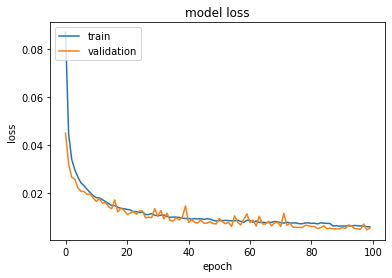

In [139]:
# 5 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv2d --layer 5 --train --label_type F"
plot_loss(cmd)

In [140]:
# 5 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv2d --layer 5 --label_type F"
args = model_parser().parse_args(cmd.split())
test_model(args)

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_207"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_104 (InputLayer)       [(None, 84, 50, 96)]      0         
_________________________________________________________________
conv2d_318 (Conv2D)          (None, 84, 50, 150)       129750    
_________________________________________________________________
conv2d_319 (Conv2D)          (None, 84, 50, 200)       30200     
_________________________________________________________________
conv2d_320 (Conv2D)          (None, 84, 50, 200)       40200     
_________________________________________________________________
conv2d_321 (Conv2D)          (None, 84, 50, 200)       40200     
_________________________________________________________________
conv2d_322 (Conv2D)          (None, 84, 50, 200)       40200     
_________________________________________________________________
dropo

Model: "functional_209"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_105 (InputLayer)       [(None, 3, 3, 96)]        0         
_________________________________________________________________
conv2d_324 (Conv2D)          (None, 3, 3, 150)         14550     
_________________________________________________________________
conv2d_325 (Conv2D)          (None, 1, 1, 150)         202650    
_________________________________________________________________
conv2d_326 (Conv2D)          (None, 1, 1, 200)         30200     
_________________________________________________________________
conv2d_327 (Conv2D)          (None, 1, 1, 200)         40200     
_________________________________________________________________
conv2d_328 (Conv2D)          (None, 1, 1, 200)         40200     
_________________________________________________________________
conv2d_329 (Conv2D)          (None, 1, 1, 200)      

2022-03-08 16:49:19.590527: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 16:49:19.590662: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 18/259 [=>............................] - ETA: 2s - loss: 0.0763 - accuracy: 0.4049

2022-03-08 16:49:20.338348: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 16:49:20.372149: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 16:49:20.372506: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 16:49:20.373849: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_16_49_20
2022-03-08 16:49:20.374501: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_16_49_20/vw.trace.json.gz
2022-03-08 16:49:20.374595: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 16:49:20.375598: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

259/259 [==============================] - 3s 11ms/step - loss: 0.0504 - accuracy: 0.4102 - val_loss: 0.0312 - val_accuracy: 0.4037
Epoch 2/100
259/259 [==============================] - 3s 10ms/step - loss: 0.0316 - accuracy: 0.4107 - val_loss: 0.0239 - val_accuracy: 0.4037
Epoch 3/100
259/259 [==============================] - 3s 10ms/step - loss: 0.0264 - accuracy: 0.4107 - val_loss: 0.0221 - val_accuracy: 0.4037
Epoch 4/100
259/259 [==============================] - 3s 10ms/step - loss: 0.0232 - accuracy: 0.4107 - val_loss: 0.0244 - val_accuracy: 0.4037
Epoch 5/100
259/259 [==============================] - 3s 10ms/step - loss: 0.0200 - accuracy: 0.4107 - val_loss: 0.0198 - val_accuracy: 0.4037
Epoch 6/100
259/259 [==============================] - 3s 11ms/step - loss: 0.0184 - accuracy: 0.4107 - val_loss: 0.0173 - val_accuracy: 0.4037
Epoch 7/100
259/259 [==============================] - 3s 10ms/step - loss: 0.0173 - accuracy: 0.4107 - val_loss: 0.0158 - val_accuracy: 0.4037
Epoc

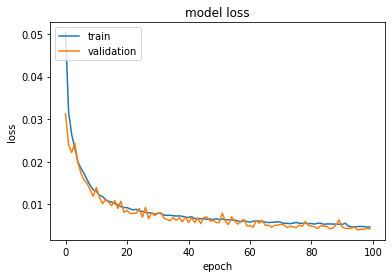

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_211"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_106 (InputLayer)       [(None, 84, 50, 96)]      0         
_________________________________________________________________
conv2d_331 (Conv2D)          (None, 84, 50, 150)       14550     
_________________________________________________________________
conv2d_332 (Conv2D)          (None, 84, 50, 150)       202650    
_________________________________________________________________
conv2d_333 (Conv2D)          (None, 84, 50, 200)       30200     
_________________________________________________________________
conv2d_334 (Conv2D)          (None, 84, 50, 200)       40200     
_________________________________________________________________
conv2d_335 (Conv2D)          (None, 84, 50, 200)       40200     
_________________________________________________________________
conv2

In [141]:
# train and test the conv2d_new model
cmd = "--train_subjects s01_still --DWI 96 --model conv2d_new --layer 5 --train --label_type F"
plot_loss(cmd)
cmd = "--test_subjects s02_still --DWI 96 --model conv2d_new --layer 5 --label_type F"
args = model_parser().parse_args(cmd.split())
test_model(args)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(0.0654670014073893, -67.7882976229783, 0.977261757980318)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for new model: (0.0613698691546498, -69.0808423437849, 0.9739944531563723)


Text(0.5, 0.98, 'Center slices for s02_still_FWF predicted by new model image')

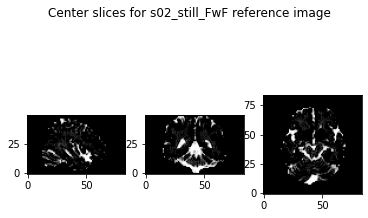

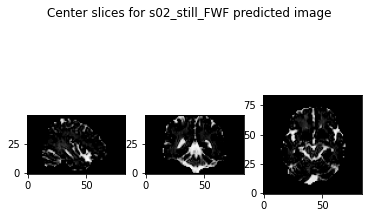

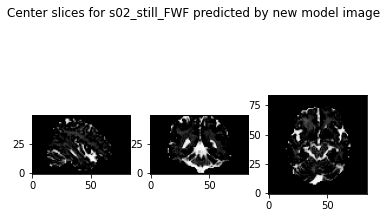

In [142]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-conv2d-5layer.nii'
pred_FWF_img = nib.load(pred_path)
pred_FWF_img_data = pred_FWF_img.get_fdata()
new_pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-conv2d_new-5layer.nii'
new_pred_FWF_img = nib.load(new_pred_path)
new_pred_FWF_img_data = new_pred_FWF_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_FWF_img_data, s02_FWF_img_data, s02_mask_img_data)
print(eval_re)
new_eval_re = evaluate_model(new_pred_FWF_img_data, s02_FWF_img_data, s02_mask_img_data)
print("evaluation score for new model: " + str(new_eval_re))

# visualise both ref img and pred img
ref_slice_0 = s02_FWF_img_data[26, :, :]
ref_slice_1 = s02_FWF_img_data[:, 30, :]
ref_slice_2 = s02_FWF_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_FwF reference image")

pred_slice_0 = pred_FWF_img_data[26, :, :]
pred_slice_1 = pred_FWF_img_data[:, 30, :]
pred_slice_2 = pred_FWF_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_FWF predicted image")

new_pred_slice_0 = new_pred_FWF_img_data[26, :, :]
new_pred_slice_1 = new_pred_FWF_img_data[:, 30, :]
new_pred_slice_2 = new_pred_FWF_img_data[:, :, 16]
show_slices([new_pred_slice_0, new_pred_slice_1, new_pred_slice_2])
plt.suptitle("Center slices for s02_still_FWF predicted by new model image")

<strong>6 layer</strong>

Model: "functional_213"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_107 (InputLayer)       [(None, 3, 3, 96)]        0         
_________________________________________________________________
conv2d_338 (Conv2D)          (None, 1, 1, 150)         129750    
_________________________________________________________________
conv2d_339 (Conv2D)          (None, 1, 1, 200)         30200     
_________________________________________________________________
conv2d_340 (Conv2D)          (None, 1, 1, 200)         40200     
_________________________________________________________________
conv2d_341 (Conv2D)          (None, 1, 1, 200)         40200     
_________________________________________________________________
conv2d_342 (Conv2D)          (None, 1, 1, 200)         40200     
_________________________________________________________________
conv2d_343 (Conv2D)          (None, 1, 1, 200)      

2022-03-08 16:53:15.681728: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 16:53:15.681882: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 25/259 [=>............................] - ETA: 1s - loss: 0.1554 - accuracy: 0.3742

2022-03-08 16:53:16.293877: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 16:53:16.322540: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 16:53:16.322864: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 16:53:16.326168: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_16_53_16
2022-03-08 16:53:16.326778: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_16_53_16/vw.trace.json.gz
2022-03-08 16:53:16.326879: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 16:53:16.327785: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

259/259 [==============================] - 2s 7ms/step - loss: 0.0687 - accuracy: 0.4067 - val_loss: 0.0394 - val_accuracy: 0.4037
Epoch 2/100
259/259 [==============================] - 2s 7ms/step - loss: 0.0389 - accuracy: 0.4106 - val_loss: 0.0291 - val_accuracy: 0.4036
Epoch 3/100
259/259 [==============================] - 2s 6ms/step - loss: 0.0322 - accuracy: 0.4106 - val_loss: 0.0245 - val_accuracy: 0.4036
Epoch 4/100
259/259 [==============================] - 2s 6ms/step - loss: 0.0287 - accuracy: 0.4106 - val_loss: 0.0310 - val_accuracy: 0.4037
Epoch 5/100
259/259 [==============================] - 2s 6ms/step - loss: 0.0261 - accuracy: 0.4107 - val_loss: 0.0238 - val_accuracy: 0.4037
Epoch 6/100
259/259 [==============================] - 2s 6ms/step - loss: 0.0239 - accuracy: 0.4107 - val_loss: 0.0211 - val_accuracy: 0.4037
Epoch 7/100
259/259 [==============================] - 2s 6ms/step - loss: 0.0224 - accuracy: 0.4107 - val_loss: 0.0240 - val_accuracy: 0.4037
Epoch 8/100

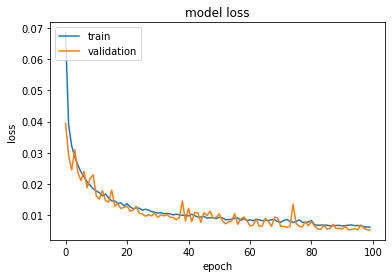

In [143]:
# 6 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv2d --layer 6 --train --label_type F"
plot_loss(cmd)

In [144]:
# 6 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv2d --layer 6 --label_type F"
args = model_parser().parse_args(cmd.split())
test_model(args)

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_215"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_108 (InputLayer)       [(None, 84, 50, 96)]      0         
_________________________________________________________________
conv2d_345 (Conv2D)          (None, 84, 50, 150)       129750    
_________________________________________________________________
conv2d_346 (Conv2D)          (None, 84, 50, 200)       30200     
_________________________________________________________________
conv2d_347 (Conv2D)          (None, 84, 50, 200)       40200     
_________________________________________________________________
conv2d_348 (Conv2D)          (None, 84, 50, 200)       40200     
_________________________________________________________________
conv2d_349 (Conv2D)          (None, 84, 50, 200)       40200     
_________________________________________________________________
conv2

Model: "functional_217"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_109 (InputLayer)       [(None, 3, 3, 96)]        0         
_________________________________________________________________
conv2d_352 (Conv2D)          (None, 3, 3, 150)         14550     
_________________________________________________________________
conv2d_353 (Conv2D)          (None, 1, 1, 150)         202650    
_________________________________________________________________
conv2d_354 (Conv2D)          (None, 1, 1, 200)         30200     
_________________________________________________________________
conv2d_355 (Conv2D)          (None, 1, 1, 200)         40200     
_________________________________________________________________
conv2d_356 (Conv2D)          (None, 1, 1, 200)         40200     
_________________________________________________________________
conv2d_357 (Conv2D)          (None, 1, 1, 200)      

2022-03-08 16:55:58.384087: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 16:55:58.384212: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 16/259 [>.............................] - ETA: 2s - loss: 0.1177 - accuracy: 0.4050

2022-03-08 16:55:59.147366: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 16:55:59.183141: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 16:55:59.183494: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 16:55:59.184826: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_16_55_59
2022-03-08 16:55:59.185531: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_16_55_59/vw.trace.json.gz
2022-03-08 16:55:59.185631: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 16:55:59.186606: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

259/259 [==============================] - 3s 11ms/step - loss: 0.1177 - accuracy: 0.3969 - val_loss: 0.1233 - val_accuracy: 0.4004
Epoch 2/100
259/259 [==============================] - 3s 10ms/step - loss: 0.1176 - accuracy: 0.3969 - val_loss: 0.1233 - val_accuracy: 0.4004
Epoch 3/100
259/259 [==============================] - 3s 10ms/step - loss: 0.1176 - accuracy: 0.3969 - val_loss: 0.1233 - val_accuracy: 0.4004
Epoch 4/100
259/259 [==============================] - 3s 10ms/step - loss: 0.0697 - accuracy: 0.4063 - val_loss: 0.0274 - val_accuracy: 0.4036
Epoch 5/100
259/259 [==============================] - 3s 10ms/step - loss: 0.0262 - accuracy: 0.4107 - val_loss: 0.0202 - val_accuracy: 0.4037
Epoch 6/100
259/259 [==============================] - 3s 10ms/step - loss: 0.0202 - accuracy: 0.4107 - val_loss: 0.0159 - val_accuracy: 0.4037
Epoch 7/100
259/259 [==============================] - 3s 11ms/step - loss: 0.0174 - accuracy: 0.4107 - val_loss: 0.0136 - val_accuracy: 0.4037
Epoc

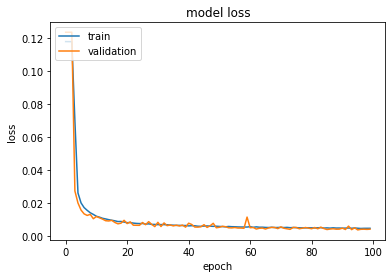

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_219"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_110 (InputLayer)       [(None, 84, 50, 96)]      0         
_________________________________________________________________
conv2d_360 (Conv2D)          (None, 84, 50, 150)       14550     
_________________________________________________________________
conv2d_361 (Conv2D)          (None, 84, 50, 150)       202650    
_________________________________________________________________
conv2d_362 (Conv2D)          (None, 84, 50, 200)       30200     
_________________________________________________________________
conv2d_363 (Conv2D)          (None, 84, 50, 200)       40200     
_________________________________________________________________
conv2d_364 (Conv2D)          (None, 84, 50, 200)       40200     
_________________________________________________________________
conv2

In [145]:
# train and test the conv2d_new model
cmd = "--train_subjects s01_still --DWI 96 --model conv2d_new --layer 6 --train --label_type F"
plot_loss(cmd)
cmd = "--test_subjects s02_still --DWI 96 --model conv2d_new --layer 6 --label_type F"
args = model_parser().parse_args(cmd.split())
test_model(args)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(0.07637103086533675, -64.7071530896082, 0.9597734897361713)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for new model: (0.05775574481310448, -70.29476559516611, 0.979098843269139)


Text(0.5, 0.98, 'Center slices for s02_still_FWF predicted by new model image')

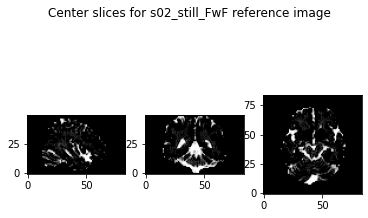

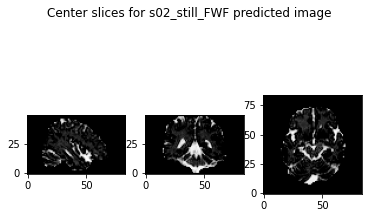

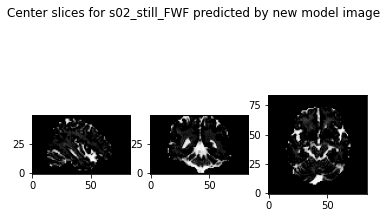

In [146]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-conv2d-6layer.nii'
pred_FWF_img = nib.load(pred_path)
pred_FWF_img_data = pred_FWF_img.get_fdata()
new_pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-conv2d_new-6layer.nii'
new_pred_FWF_img = nib.load(new_pred_path)
new_pred_FWF_img_data = new_pred_FWF_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_FWF_img_data, s02_FWF_img_data, s02_mask_img_data)
print(eval_re)
new_eval_re = evaluate_model(new_pred_FWF_img_data, s02_FWF_img_data, s02_mask_img_data)
print("evaluation score for new model: " + str(new_eval_re))

# visualise both ref img and pred img
ref_slice_0 = s02_FWF_img_data[26, :, :]
ref_slice_1 = s02_FWF_img_data[:, 30, :]
ref_slice_2 = s02_FWF_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_FwF reference image")

pred_slice_0 = pred_FWF_img_data[26, :, :]
pred_slice_1 = pred_FWF_img_data[:, 30, :]
pred_slice_2 = pred_FWF_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_FWF predicted image")

new_pred_slice_0 = new_pred_FWF_img_data[26, :, :]
new_pred_slice_1 = new_pred_FWF_img_data[:, 30, :]
new_pred_slice_2 = new_pred_FWF_img_data[:, :, 16]
show_slices([new_pred_slice_0, new_pred_slice_1, new_pred_slice_2])
plt.suptitle("Center slices for s02_still_FWF predicted by new model image")

<strong>Training subject: s01_still<br/>

Test subject: s02_still<br/>

Network; 3D-CNN<br/>

Outcome: NDI<br/>


The training data is stored in datasets/data/s01_still-96-first-3d.mat<br/>

The training label is stored in datasets/label/s01_still-NDI-96-first-3d.mat<br/>

The testing data is stored in datasets/data/s02_still-96-first.mat<br/>

The testing label is stored in datasets/label/s02_still-NDI-96-first.mat</strong>

In [147]:
"""
Generate training dataset NDI for 3D CNN.
Using all of the DWI. 96. as training size.
"""
cmd = "--subjects s01_still --nDWI 96 --conv3d_train --label_type N"
args = data_parser().parse_args(cmd.split())
generate_data(args)

generating data patches
training dataset has shape:(82180, 3, 3, 3, 96)
generating label patches
training label has shape:(82641, 1, 1, 1, 1)


Model: "functional_221"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_111 (InputLayer)       [(None, 3, 3, 3, 96)]     0         
_________________________________________________________________
conv3d (Conv3D)              (None, 1, 1, 1, 150)      388950    
_________________________________________________________________
dropout_110 (Dropout)        (None, 1, 1, 1, 150)      0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 1, 1, 1, 1)        151       
Total params: 389,101
Trainable params: 389,101
Non-trainable params: 0
_________________________________________________________________
['N']
Training start ...


2022-03-08 17:00:26.167139: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 17:00:26.167265: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 17:00:27.227494: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 681633792 exceeds 10% of free system memory.


Epoch 1/100
 27/257 [==>...........................] - ETA: 1s - loss: 0.5068 - accuracy: 0.0148

2022-03-08 17:00:27.923911: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 17:00:27.959045: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 17:00:27.959342: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 17:00:27.960519: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_17_00_27
2022-03-08 17:00:27.960977: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_17_00_27/vw.trace.json.gz
2022-03-08 17:00:27.961058: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 17:00:27.961850: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

257/257 [==============================] - 2s 7ms/step - loss: 0.4979 - accuracy: 0.0145 - val_loss: 0.4522 - val_accuracy: 0.0035
Epoch 2/100
257/257 [==============================] - 1s 5ms/step - loss: 0.4964 - accuracy: 0.0149 - val_loss: 0.4521 - val_accuracy: 0.0034
Epoch 3/100
257/257 [==============================] - 1s 5ms/step - loss: 0.4962 - accuracy: 0.0153 - val_loss: 0.4543 - val_accuracy: 0.0037
Epoch 4/100
257/257 [==============================] - 1s 5ms/step - loss: 0.4962 - accuracy: 0.0152 - val_loss: 0.4520 - val_accuracy: 0.0035
Epoch 5/100
257/257 [==============================] - 1s 5ms/step - loss: 0.4958 - accuracy: 0.0160 - val_loss: 0.4521 - val_accuracy: 0.0034
Epoch 6/100
257/257 [==============================] - 1s 6ms/step - loss: 0.4958 - accuracy: 0.0163 - val_loss: 0.4521 - val_accuracy: 0.0034
Epoch 7/100
257/257 [==============================] - 2s 6ms/step - loss: 0.4954 - accuracy: 0.0161 - val_loss: 0.4521 - val_accuracy: 0.0035
Epoch 8/100

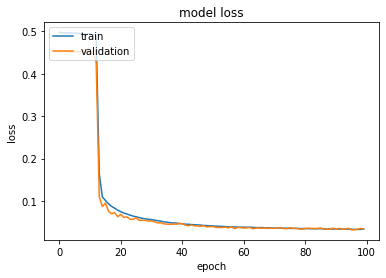

In [148]:
# 1 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv3d --layer 1 --train --label_type N"
plot_loss(cmd)

In [149]:
# 1 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv3d --layer 1 --label_type N"
args = model_parser().parse_args(cmd.split())
test_model(args)

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_223"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_112 (InputLayer)       [(None, 84, 84, 50, 96)]  0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 84, 84, 50, 150)   388950    
_________________________________________________________________
dropout_111 (Dropout)        (None, 84, 84, 50, 150)   0         
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 84, 84, 50, 1)     151       
Total params: 389,101
Trainable params: 389,101
Non-trainable params: 0
_________________________________________________________________
(1, 84, 84, 50, 1)
(84, 84, 50, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
0.2776795765300233


Model: "functional_447"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_224 (InputLayer)       [(None, 3, 3, 3, 96)]     0         
_________________________________________________________________
conv3d_384 (Conv3D)          (None, 3, 3, 3, 128)      12416     
_________________________________________________________________
conv3d_385 (Conv3D)          (None, 1, 1, 1, 128)      442496    
_________________________________________________________________
dropout_223 (Dropout)        (None, 1, 1, 1, 128)      0         
_________________________________________________________________
conv3d_386 (Conv3D)          (None, 1, 1, 1, 1)        129       
Total params: 455,041
Trainable params: 455,041
Non-trainable params: 0
_________________________________________________________________
['N']
Training start ...


2022-03-08 21:32:19.619078: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 21:32:19.619213: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 18/257 [=>............................] - ETA: 2s - loss: 0.5620 - accuracy: 0.0176

2022-03-08 21:32:21.383125: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 21:32:21.405233: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 21:32:21.405517: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 21:32:21.406667: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_21_32_21
2022-03-08 21:32:21.407135: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_21_32_21/vw.trace.json.gz
2022-03-08 21:32:21.407200: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 21:32:21.407947: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

257/257 [==============================] - 3s 10ms/step - loss: 0.5017 - accuracy: 0.0142 - val_loss: 0.4521 - val_accuracy: 0.0034
Epoch 2/100
257/257 [==============================] - 2s 9ms/step - loss: 0.4968 - accuracy: 0.0141 - val_loss: 0.4521 - val_accuracy: 0.0034
Epoch 3/100
257/257 [==============================] - 2s 9ms/step - loss: 0.4968 - accuracy: 0.0141 - val_loss: 0.4521 - val_accuracy: 0.0034
Epoch 4/100
257/257 [==============================] - 2s 9ms/step - loss: 0.4968 - accuracy: 0.0141 - val_loss: 0.4521 - val_accuracy: 0.0034
Epoch 5/100
257/257 [==============================] - 2s 9ms/step - loss: 0.4968 - accuracy: 0.0141 - val_loss: 0.4521 - val_accuracy: 0.0034
Epoch 6/100
257/257 [==============================] - 2s 9ms/step - loss: 0.4968 - accuracy: 0.0141 - val_loss: 0.4521 - val_accuracy: 0.0034
Epoch 7/100
257/257 [==============================] - 2s 9ms/step - loss: 0.4968 - accuracy: 0.0141 - val_loss: 0.4521 - val_accuracy: 0.0034
Epoch 8/10

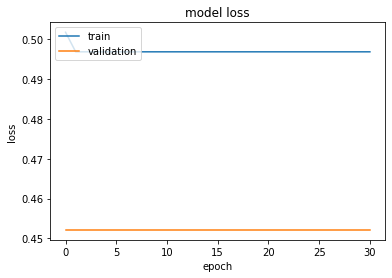

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_449"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_225 (InputLayer)       [(None, 84, 84, 50, 96)]  0         
_________________________________________________________________
conv3d_387 (Conv3D)          (None, 84, 84, 50, 128)   12416     
_________________________________________________________________
conv3d_388 (Conv3D)          (None, 84, 84, 50, 128)   442496    
_________________________________________________________________
dropout_224 (Dropout)        (None, 84, 84, 50, 128)   0         
_________________________________________________________________
conv3d_389 (Conv3D)          (None, 84, 84, 50, 1)     129       
Total params: 455,041
Trainable params: 455,041
Non-trainable params: 0
_________________________________________________________________
(1, 84, 84, 50, 1)
(84, 84, 50, 1)
<class 'numpy.ndarray'>
<class

In [251]:
# train and test the conv3d_new model
cmd = "--train_subjects s01_still --DWI 96 --model conv3d_new --layer 1 --train --label_type N"
plot_loss(cmd)
cmd = "--test_subjects s02_still --DWI 96 --model conv3d_new --layer 1 --label_type N"
args = model_parser().parse_args(cmd.split())
test_model(args)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for old model: (0.2776795765300233, -38.8898651221053, 0.8265762520468225)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for new model: (0.5266027119447034, -26.090294138968403, nan)


Text(0.5, 0.98, 'Center slices for s02_still_NDI predicted by new model image')

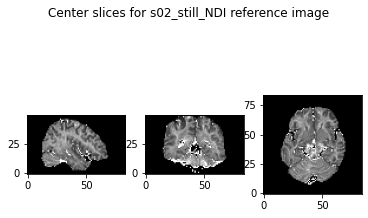

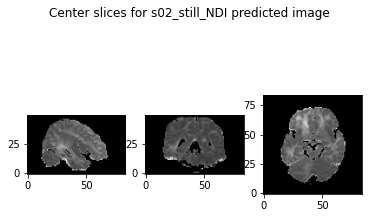

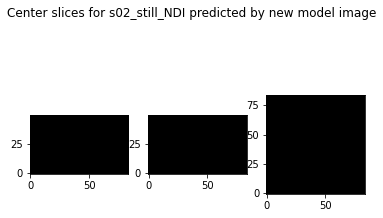

In [151]:
# load the reference img and pred imgs (the one generated from old model and new model)
pred_path = '../Net-DTI/nii/s02_still-NDI-96-first-conv3d-1layer.nii'
pred_NDI_img = nib.load(pred_path)
pred_NDI_img_data = pred_NDI_img.get_fdata()
new_pred_path = '../Net-DTI/nii/s02_still-NDI-96-first-conv3d_new-1layer.nii'
new_pred_NDI_img = nib.load(new_pred_path)
new_pred_NDI_img_data = new_pred_NDI_img.get_fdata()


# evaluate the model
eval_re = evaluate_model(pred_NDI_img_data, s02_NDI_img_data, s02_mask_img_data)
print("evaluation score for old model: " + str(eval_re))
new_eval_re = evaluate_model(new_pred_NDI_img_data, s02_NDI_img_data, s02_mask_img_data)
print("evaluation score for new model: " + str(new_eval_re))

# visualise both ref img and pred img
ref_slice_0 = s02_NDI_img_data[26, :, :]
ref_slice_1 = s02_NDI_img_data[:, 30, :]
ref_slice_2 = s02_NDI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_NDI reference image")

pred_slice_0 = pred_NDI_img_data[26, :, :]
pred_slice_1 = pred_NDI_img_data[:, 30, :]
pred_slice_2 = pred_NDI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_NDI predicted image")

new_pred_slice_0 = new_pred_NDI_img_data[26, :, :]
new_pred_slice_1 = new_pred_NDI_img_data[:, 30, :]
new_pred_slice_2 = new_pred_NDI_img_data[:, :, 16]
show_slices([new_pred_slice_0, new_pred_slice_1, new_pred_slice_2])
plt.suptitle("Center slices for s02_still_NDI predicted by new model image")

Model: "functional_229"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_115 (InputLayer)       [(None, 3, 3, 3, 96)]     0         
_________________________________________________________________
conv3d_10 (Conv3D)           (None, 1, 1, 1, 150)      388950    
_________________________________________________________________
conv3d_11 (Conv3D)           (None, 1, 1, 1, 200)      30200     
_________________________________________________________________
dropout_114 (Dropout)        (None, 1, 1, 1, 200)      0         
_________________________________________________________________
conv3d_12 (Conv3D)           (None, 1, 1, 1, 1)        201       
Total params: 419,351
Trainable params: 419,351
Non-trainable params: 0
_________________________________________________________________
['N']
Training start ...


2022-03-08 17:04:15.562614: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 17:04:15.562711: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 17:04:16.619473: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 681633792 exceeds 10% of free system memory.


Epoch 1/100
 27/257 [==>...........................] - ETA: 1s - loss: 0.5015 - accuracy: 0.0146

2022-03-08 17:04:17.272709: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 17:04:17.296647: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 17:04:17.296954: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 17:04:17.298019: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_17_04_17
2022-03-08 17:04:17.298503: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_17_04_17/vw.trace.json.gz
2022-03-08 17:04:17.298570: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 17:04:17.299341: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

257/257 [==============================] - 2s 8ms/step - loss: 0.4974 - accuracy: 0.0147 - val_loss: 0.4520 - val_accuracy: 0.0034
Epoch 2/100
257/257 [==============================] - 2s 6ms/step - loss: 0.4949 - accuracy: 0.0170 - val_loss: 0.4523 - val_accuracy: 0.0034
Epoch 3/100
257/257 [==============================] - 2s 6ms/step - loss: 0.4935 - accuracy: 0.0190 - val_loss: 0.4519 - val_accuracy: 0.0034
Epoch 4/100
257/257 [==============================] - 2s 6ms/step - loss: 0.4934 - accuracy: 0.0175 - val_loss: 0.4521 - val_accuracy: 0.0035
Epoch 5/100
257/257 [==============================] - 2s 6ms/step - loss: 0.4028 - accuracy: 0.0211 - val_loss: 0.1362 - val_accuracy: 0.0035
Epoch 6/100
257/257 [==============================] - 2s 6ms/step - loss: 0.1109 - accuracy: 0.0276 - val_loss: 0.0836 - val_accuracy: 0.0037
Epoch 7/100
257/257 [==============================] - 2s 6ms/step - loss: 0.0866 - accuracy: 0.0289 - val_loss: 0.0721 - val_accuracy: 0.0037
Epoch 8/100

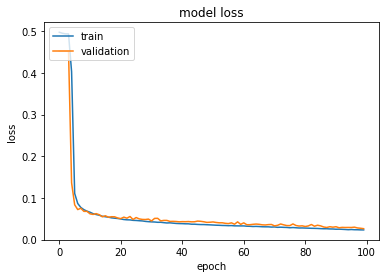

In [152]:
# 2 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv3d --layer 2 --train --label_type N"
plot_loss(cmd)

In [153]:
# 2 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv3d --layer 2 --label_type N"
args = model_parser().parse_args(cmd.split())
test_model(args)

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_231"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_116 (InputLayer)       [(None, 84, 84, 50, 96)]  0         
_________________________________________________________________
conv3d_13 (Conv3D)           (None, 84, 84, 50, 150)   388950    
_________________________________________________________________
conv3d_14 (Conv3D)           (None, 84, 84, 50, 200)   30200     
_________________________________________________________________
dropout_115 (Dropout)        (None, 84, 84, 50, 200)   0         
_________________________________________________________________
conv3d_15 (Conv3D)           (None, 84, 84, 50, 1)     201       
Total params: 419,351
Trainable params: 419,351
Non-trainable params: 0
_________________________________________________________________
(1, 84, 84, 50, 1)
(84, 84, 50, 1)
<class 'numpy.ndarray'>
<class

Model: "functional_233"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_117 (InputLayer)       [(None, 3, 3, 3, 96)]     0         
_________________________________________________________________
conv3d_16 (Conv3D)           (None, 3, 3, 3, 128)      12416     
_________________________________________________________________
conv3d_17 (Conv3D)           (None, 1, 1, 1, 128)      442496    
_________________________________________________________________
conv3d_18 (Conv3D)           (None, 1, 1, 1, 256)      33024     
_________________________________________________________________
dropout_116 (Dropout)        (None, 1, 1, 1, 256)      0         
_________________________________________________________________
conv3d_19 (Conv3D)           (None, 1, 1, 1, 1)        257       
Total params: 488,193
Trainable params: 488,193
Non-trainable params: 0
______________________________________________

2022-03-08 17:06:55.681203: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 17:06:55.681323: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 17:06:56.770004: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 681633792 exceeds 10% of free system memory.


Epoch 1/100
 16/257 [>.............................] - ETA: 2s - loss: 0.4992 - accuracy: 0.0176

2022-03-08 17:06:57.441721: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 17:06:57.468547: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 17:06:57.468834: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 17:06:57.471882: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_17_06_57
2022-03-08 17:06:57.472434: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_17_06_57/vw.trace.json.gz
2022-03-08 17:06:57.472514: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 17:06:57.473372: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

257/257 [==============================] - 3s 13ms/step - loss: 0.2127 - accuracy: 0.0238 - val_loss: 0.0854 - val_accuracy: 0.0039
Epoch 2/100
257/257 [==============================] - 3s 11ms/step - loss: 0.0996 - accuracy: 0.0282 - val_loss: 0.0707 - val_accuracy: 0.0040
Epoch 3/100
257/257 [==============================] - 3s 11ms/step - loss: 0.0835 - accuracy: 0.0300 - val_loss: 0.0703 - val_accuracy: 0.0046
Epoch 4/100
257/257 [==============================] - 3s 11ms/step - loss: 0.0747 - accuracy: 0.0317 - val_loss: 0.0591 - val_accuracy: 0.0043
Epoch 5/100
257/257 [==============================] - 3s 11ms/step - loss: 0.0684 - accuracy: 0.0327 - val_loss: 0.0555 - val_accuracy: 0.0047
Epoch 6/100
257/257 [==============================] - 3s 11ms/step - loss: 0.0634 - accuracy: 0.0339 - val_loss: 0.0494 - val_accuracy: 0.0046
Epoch 7/100
257/257 [==============================] - 3s 11ms/step - loss: 0.0602 - accuracy: 0.0343 - val_loss: 0.0497 - val_accuracy: 0.0047
Epoc

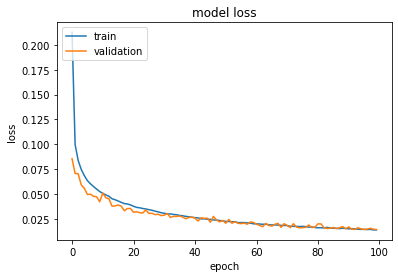

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_235"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_118 (InputLayer)       [(None, 84, 84, 50, 96)]  0         
_________________________________________________________________
conv3d_20 (Conv3D)           (None, 84, 84, 50, 128)   12416     
_________________________________________________________________
conv3d_21 (Conv3D)           (None, 84, 84, 50, 128)   442496    
_________________________________________________________________
conv3d_22 (Conv3D)           (None, 84, 84, 50, 256)   33024     
_________________________________________________________________
dropout_117 (Dropout)        (None, 84, 84, 50, 256)   0         
_________________________________________________________________
conv3d_23 (Conv3D)           (None, 84, 84, 50, 1)     257       
Total params: 488,193
Trainable params: 488,193
Non-trainable params: 0

In [154]:
# train and test the conv3d_new model
cmd = "--train_subjects s01_still --DWI 96 --model conv3d_new --layer 2 --train --label_type N"
plot_loss(cmd)
cmd = "--test_subjects s02_still --DWI 96 --model conv3d_new --layer 2 --label_type N"
args = model_parser().parse_args(cmd.split())
test_model(args)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for old model: (0.2780042161244131, -38.866496462795766, 0.8360550015086247)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for new model: (0.2427637928548431, -41.5774435543255, 0.8727116287788402)


Text(0.5, 0.98, 'Center slices for s02_still_NDI predicted by new model image')

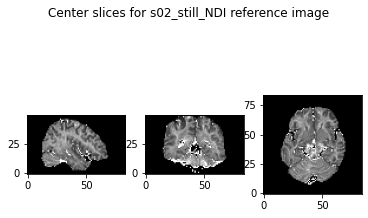

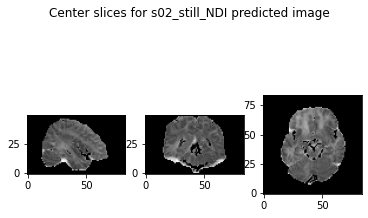

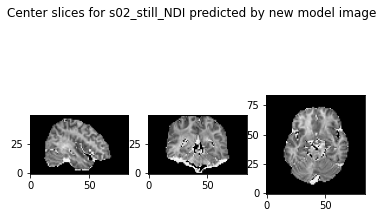

In [155]:
# load the reference img and pred imgs (the one generated from old model and new model)
pred_path = '../Net-DTI/nii/s02_still-NDI-96-first-conv3d-2layer.nii'
pred_NDI_img = nib.load(pred_path)
pred_NDI_img_data = pred_NDI_img.get_fdata()
new_pred_path = '../Net-DTI/nii/s02_still-NDI-96-first-conv3d_new-2layer.nii'
new_pred_NDI_img = nib.load(new_pred_path)
new_pred_NDI_img_data = new_pred_NDI_img.get_fdata()


# evaluate the model
eval_re = evaluate_model(pred_NDI_img_data, s02_NDI_img_data, s02_mask_img_data)
print("evaluation score for old model: " + str(eval_re))
new_eval_re = evaluate_model(new_pred_NDI_img_data, s02_NDI_img_data, s02_mask_img_data)
print("evaluation score for new model: " + str(new_eval_re))

# visualise both ref img and pred img
ref_slice_0 = s02_NDI_img_data[26, :, :]
ref_slice_1 = s02_NDI_img_data[:, 30, :]
ref_slice_2 = s02_NDI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_NDI reference image")

pred_slice_0 = pred_NDI_img_data[26, :, :]
pred_slice_1 = pred_NDI_img_data[:, 30, :]
pred_slice_2 = pred_NDI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_NDI predicted image")

new_pred_slice_0 = new_pred_NDI_img_data[26, :, :]
new_pred_slice_1 = new_pred_NDI_img_data[:, 30, :]
new_pred_slice_2 = new_pred_NDI_img_data[:, :, 16]
show_slices([new_pred_slice_0, new_pred_slice_1, new_pred_slice_2])
plt.suptitle("Center slices for s02_still_NDI predicted by new model image")

Model: "functional_237"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_119 (InputLayer)       [(None, 3, 3, 3, 96)]     0         
_________________________________________________________________
conv3d_24 (Conv3D)           (None, 1, 1, 1, 150)      388950    
_________________________________________________________________
conv3d_25 (Conv3D)           (None, 1, 1, 1, 200)      30200     
_________________________________________________________________
conv3d_26 (Conv3D)           (None, 1, 1, 1, 200)      40200     
_________________________________________________________________
dropout_118 (Dropout)        (None, 1, 1, 1, 200)      0         
_________________________________________________________________
conv3d_27 (Conv3D)           (None, 1, 1, 1, 1)        201       
Total params: 459,551
Trainable params: 459,551
Non-trainable params: 0
______________________________________________

2022-03-08 17:11:26.049960: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 17:11:26.050118: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 17:11:27.139260: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 681633792 exceeds 10% of free system memory.


Epoch 1/100
 25/257 [=>............................] - ETA: 1s - loss: 0.4963 - accuracy: 0.0158

2022-03-08 17:11:27.758581: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 17:11:27.782107: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 17:11:27.782385: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 17:11:27.783445: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_17_11_27
2022-03-08 17:11:27.783968: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_17_11_27/vw.trace.json.gz
2022-03-08 17:11:27.784035: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 17:11:27.784835: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

257/257 [==============================] - 2s 8ms/step - loss: 0.4963 - accuracy: 0.0155 - val_loss: 0.4519 - val_accuracy: 0.0035
Epoch 2/100
257/257 [==============================] - 2s 7ms/step - loss: 0.4931 - accuracy: 0.0189 - val_loss: 0.4519 - val_accuracy: 0.0035
Epoch 3/100
257/257 [==============================] - 2s 7ms/step - loss: 0.4730 - accuracy: 0.0202 - val_loss: 0.1556 - val_accuracy: 0.0034
Epoch 4/100
257/257 [==============================] - 2s 7ms/step - loss: 0.1267 - accuracy: 0.0278 - val_loss: 0.0919 - val_accuracy: 0.0041
Epoch 5/100
257/257 [==============================] - 2s 7ms/step - loss: 0.0905 - accuracy: 0.0294 - val_loss: 0.0741 - val_accuracy: 0.0042
Epoch 6/100
257/257 [==============================] - 2s 7ms/step - loss: 0.0784 - accuracy: 0.0316 - val_loss: 0.0671 - val_accuracy: 0.0041
Epoch 7/100
257/257 [==============================] - 2s 7ms/step - loss: 0.0697 - accuracy: 0.0336 - val_loss: 0.0573 - val_accuracy: 0.0046
Epoch 8/100

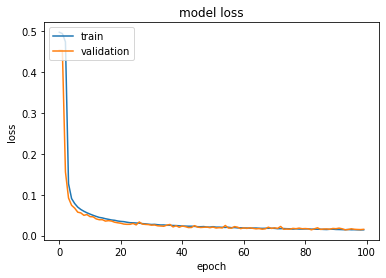

In [156]:
# 3 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv3d --layer 3 --train --label_type N"
plot_loss(cmd)

In [157]:
# 3 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv3d --layer 3 --label_type N"
args = model_parser().parse_args(cmd.split())
test_model(args)

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_239"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_120 (InputLayer)       [(None, 84, 84, 50, 96)]  0         
_________________________________________________________________
conv3d_28 (Conv3D)           (None, 84, 84, 50, 150)   388950    
_________________________________________________________________
conv3d_29 (Conv3D)           (None, 84, 84, 50, 200)   30200     
_________________________________________________________________
conv3d_30 (Conv3D)           (None, 84, 84, 50, 200)   40200     
_________________________________________________________________
dropout_119 (Dropout)        (None, 84, 84, 50, 200)   0         
_________________________________________________________________
conv3d_31 (Conv3D)           (None, 84, 84, 50, 1)     201       
Total params: 459,551
Trainable params: 459,551
Non-trainable params: 0

Model: "functional_241"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_121 (InputLayer)       [(None, 3, 3, 3, 96)]     0         
_________________________________________________________________
conv3d_32 (Conv3D)           (None, 3, 3, 3, 128)      12416     
_________________________________________________________________
conv3d_33 (Conv3D)           (None, 1, 1, 1, 128)      442496    
_________________________________________________________________
conv3d_34 (Conv3D)           (None, 1, 1, 1, 256)      33024     
_________________________________________________________________
conv3d_35 (Conv3D)           (None, 1, 1, 1, 256)      65792     
_________________________________________________________________
dropout_120 (Dropout)        (None, 1, 1, 1, 256)      0         
_________________________________________________________________
conv3d_36 (Conv3D)           (None, 1, 1, 1, 1)     

2022-03-08 17:14:19.973270: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 17:14:19.973409: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 16/257 [>.............................] - ETA: 2s - loss: 0.3585 - accuracy: 0.0151

2022-03-08 17:14:21.708192: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 17:14:21.736237: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 17:14:21.736528: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 17:14:21.737680: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_17_14_21
2022-03-08 17:14:21.738272: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_17_14_21/vw.trace.json.gz
2022-03-08 17:14:21.738348: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 17:14:21.739204: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

257/257 [==============================] - 3s 13ms/step - loss: 0.1396 - accuracy: 0.0254 - val_loss: 0.0800 - val_accuracy: 0.0039
Epoch 2/100
257/257 [==============================] - 3s 12ms/step - loss: 0.0864 - accuracy: 0.0295 - val_loss: 0.0610 - val_accuracy: 0.0044
Epoch 3/100
257/257 [==============================] - 3s 12ms/step - loss: 0.0729 - accuracy: 0.0315 - val_loss: 0.0533 - val_accuracy: 0.0043
Epoch 4/100
257/257 [==============================] - 3s 11ms/step - loss: 0.0657 - accuracy: 0.0329 - val_loss: 0.0490 - val_accuracy: 0.0041
Epoch 5/100
257/257 [==============================] - 3s 11ms/step - loss: 0.0609 - accuracy: 0.0343 - val_loss: 0.0492 - val_accuracy: 0.0045
Epoch 6/100
257/257 [==============================] - 3s 11ms/step - loss: 0.0572 - accuracy: 0.0346 - val_loss: 0.0455 - val_accuracy: 0.0043
Epoch 7/100
257/257 [==============================] - 3s 11ms/step - loss: 0.0547 - accuracy: 0.0353 - val_loss: 0.0460 - val_accuracy: 0.0051
Epoc

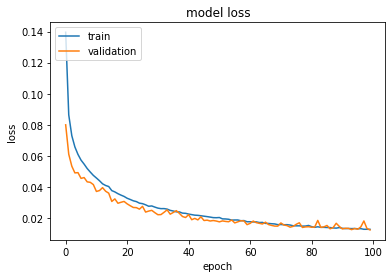

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_243"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_122 (InputLayer)       [(None, 84, 84, 50, 96)]  0         
_________________________________________________________________
conv3d_37 (Conv3D)           (None, 84, 84, 50, 128)   12416     
_________________________________________________________________
conv3d_38 (Conv3D)           (None, 84, 84, 50, 128)   442496    
_________________________________________________________________
conv3d_39 (Conv3D)           (None, 84, 84, 50, 256)   33024     
_________________________________________________________________
conv3d_40 (Conv3D)           (None, 84, 84, 50, 256)   65792     
_________________________________________________________________
dropout_121 (Dropout)        (None, 84, 84, 50, 256)   0         
_________________________________________________________________
conv3

In [158]:
# train and test the conv3d_new model
cmd = "--train_subjects s01_still --DWI 96 --model conv3d_new --layer 3 --train --label_type N"
plot_loss(cmd)
cmd = "--test_subjects s02_still --DWI 96 --model conv3d_new --layer 3 --label_type N"
args = model_parser().parse_args(cmd.split())
test_model(args)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for old model: (0.2450927711240965, -41.3864861187927, 0.869458128932164)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for new model: (0.2250586985216896, -43.091997037172796, 0.8837157208073535)


Text(0.5, 0.98, 'Center slices for s02_still_NDI predicted by new model image')

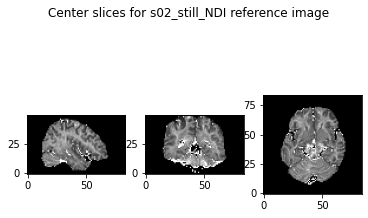

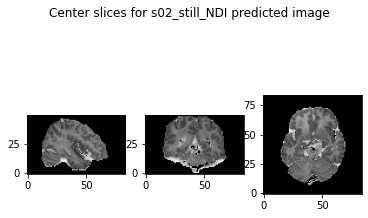

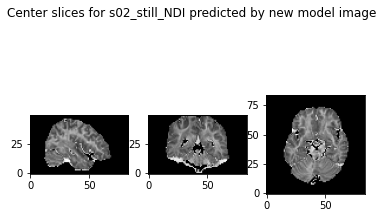

In [159]:
# load the reference img and pred imgs (the one generated from old model and new model)
pred_path = '../Net-DTI/nii/s02_still-NDI-96-first-conv3d-3layer.nii'
pred_NDI_img = nib.load(pred_path)
pred_NDI_img_data = pred_NDI_img.get_fdata()
new_pred_path = '../Net-DTI/nii/s02_still-NDI-96-first-conv3d_new-3layer.nii'
new_pred_NDI_img = nib.load(new_pred_path)
new_pred_NDI_img_data = new_pred_NDI_img.get_fdata()


# evaluate the model
eval_re = evaluate_model(pred_NDI_img_data, s02_NDI_img_data, s02_mask_img_data)
print("evaluation score for old model: " + str(eval_re))
new_eval_re = evaluate_model(new_pred_NDI_img_data, s02_NDI_img_data, s02_mask_img_data)
print("evaluation score for new model: " + str(new_eval_re))

# visualise both ref img and pred img
ref_slice_0 = s02_NDI_img_data[26, :, :]
ref_slice_1 = s02_NDI_img_data[:, 30, :]
ref_slice_2 = s02_NDI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_NDI reference image")

pred_slice_0 = pred_NDI_img_data[26, :, :]
pred_slice_1 = pred_NDI_img_data[:, 30, :]
pred_slice_2 = pred_NDI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_NDI predicted image")

new_pred_slice_0 = new_pred_NDI_img_data[26, :, :]
new_pred_slice_1 = new_pred_NDI_img_data[:, 30, :]
new_pred_slice_2 = new_pred_NDI_img_data[:, :, 16]
show_slices([new_pred_slice_0, new_pred_slice_1, new_pred_slice_2])
plt.suptitle("Center slices for s02_still_NDI predicted by new model image")

Model: "functional_245"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_123 (InputLayer)       [(None, 3, 3, 3, 96)]     0         
_________________________________________________________________
conv3d_42 (Conv3D)           (None, 1, 1, 1, 150)      388950    
_________________________________________________________________
conv3d_43 (Conv3D)           (None, 1, 1, 1, 200)      30200     
_________________________________________________________________
conv3d_44 (Conv3D)           (None, 1, 1, 1, 200)      40200     
_________________________________________________________________
conv3d_45 (Conv3D)           (None, 1, 1, 1, 200)      40200     
_________________________________________________________________
dropout_122 (Dropout)        (None, 1, 1, 1, 200)      0         
_________________________________________________________________
conv3d_46 (Conv3D)           (None, 1, 1, 1, 1)     

2022-03-08 17:19:39.401430: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 17:19:39.401529: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 22/257 [=>............................] - ETA: 1s - loss: 0.3653 - accuracy: 0.0199

2022-03-08 17:19:41.248057: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 17:19:41.284499: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 17:19:41.284881: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 17:19:41.286198: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_17_19_41
2022-03-08 17:19:41.286811: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_17_19_41/vw.trace.json.gz
2022-03-08 17:19:41.286912: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 17:19:41.287895: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

257/257 [==============================] - 2s 9ms/step - loss: 0.1533 - accuracy: 0.0238 - val_loss: 0.0989 - val_accuracy: 0.0038
Epoch 2/100
257/257 [==============================] - 2s 7ms/step - loss: 0.0966 - accuracy: 0.0287 - val_loss: 0.0816 - val_accuracy: 0.0041
Epoch 3/100
257/257 [==============================] - 2s 8ms/step - loss: 0.0809 - accuracy: 0.0309 - val_loss: 0.0692 - val_accuracy: 0.0041
Epoch 4/100
257/257 [==============================] - 2s 8ms/step - loss: 0.0707 - accuracy: 0.0331 - val_loss: 0.0625 - val_accuracy: 0.0041
Epoch 5/100
257/257 [==============================] - 2s 7ms/step - loss: 0.0645 - accuracy: 0.0341 - val_loss: 0.0598 - val_accuracy: 0.0044
Epoch 6/100
257/257 [==============================] - 2s 8ms/step - loss: 0.0587 - accuracy: 0.0349 - val_loss: 0.0478 - val_accuracy: 0.0043
Epoch 7/100
257/257 [==============================] - 2s 7ms/step - loss: 0.0547 - accuracy: 0.0356 - val_loss: 0.0489 - val_accuracy: 0.0047
Epoch 8/100

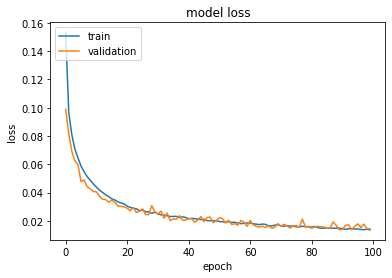

In [160]:
# 4 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv3d --layer 4 --train --label_type N"
plot_loss(cmd)

In [161]:
# 4 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv3d --layer 4 --label_type N"
args = model_parser().parse_args(cmd.split())
test_model(args)

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_247"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_124 (InputLayer)       [(None, 84, 84, 50, 96)]  0         
_________________________________________________________________
conv3d_47 (Conv3D)           (None, 84, 84, 50, 150)   388950    
_________________________________________________________________
conv3d_48 (Conv3D)           (None, 84, 84, 50, 200)   30200     
_________________________________________________________________
conv3d_49 (Conv3D)           (None, 84, 84, 50, 200)   40200     
_________________________________________________________________
conv3d_50 (Conv3D)           (None, 84, 84, 50, 200)   40200     
_________________________________________________________________
dropout_123 (Dropout)        (None, 84, 84, 50, 200)   0         
_________________________________________________________________
conv3

Model: "functional_249"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_125 (InputLayer)       [(None, 3, 3, 3, 96)]     0         
_________________________________________________________________
conv3d_52 (Conv3D)           (None, 3, 3, 3, 128)      12416     
_________________________________________________________________
conv3d_53 (Conv3D)           (None, 1, 1, 1, 128)      442496    
_________________________________________________________________
conv3d_54 (Conv3D)           (None, 1, 1, 1, 256)      33024     
_________________________________________________________________
conv3d_55 (Conv3D)           (None, 1, 1, 1, 256)      65792     
_________________________________________________________________
conv3d_56 (Conv3D)           (None, 1, 1, 1, 256)      65792     
_________________________________________________________________
dropout_124 (Dropout)        (None, 1, 1, 1, 256)   

2022-03-08 17:22:50.622533: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 17:22:50.622686: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 14/257 [>.............................] - ETA: 2s - loss: 0.2307 - accuracy: 0.0184

2022-03-08 17:22:52.485505: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 17:22:52.523174: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 17:22:52.523520: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 17:22:52.524853: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_17_22_52
2022-03-08 17:22:52.525480: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_17_22_52/vw.trace.json.gz
2022-03-08 17:22:52.525592: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 17:22:52.526592: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

257/257 [==============================] - 4s 14ms/step - loss: 0.1205 - accuracy: 0.0253 - val_loss: 0.0779 - val_accuracy: 0.0041
Epoch 2/100
257/257 [==============================] - 3s 12ms/step - loss: 0.0851 - accuracy: 0.0293 - val_loss: 0.0707 - val_accuracy: 0.0042
Epoch 3/100
257/257 [==============================] - 3s 12ms/step - loss: 0.0716 - accuracy: 0.0316 - val_loss: 0.0632 - val_accuracy: 0.0045
Epoch 4/100
257/257 [==============================] - 3s 12ms/step - loss: 0.0629 - accuracy: 0.0335 - val_loss: 0.0498 - val_accuracy: 0.0046
Epoch 5/100
257/257 [==============================] - 3s 12ms/step - loss: 0.0561 - accuracy: 0.0346 - val_loss: 0.0457 - val_accuracy: 0.0048
Epoch 6/100
257/257 [==============================] - 3s 12ms/step - loss: 0.0514 - accuracy: 0.0352 - val_loss: 0.0416 - val_accuracy: 0.0047
Epoch 7/100
257/257 [==============================] - 3s 12ms/step - loss: 0.0474 - accuracy: 0.0359 - val_loss: 0.0362 - val_accuracy: 0.0048
Epoc

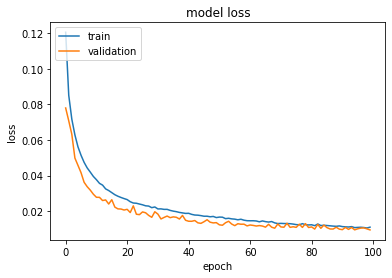

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_251"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_126 (InputLayer)       [(None, 84, 84, 50, 96)]  0         
_________________________________________________________________
conv3d_58 (Conv3D)           (None, 84, 84, 50, 128)   12416     
_________________________________________________________________
conv3d_59 (Conv3D)           (None, 84, 84, 50, 128)   442496    
_________________________________________________________________
conv3d_60 (Conv3D)           (None, 84, 84, 50, 256)   33024     
_________________________________________________________________
conv3d_61 (Conv3D)           (None, 84, 84, 50, 256)   65792     
_________________________________________________________________
conv3d_62 (Conv3D)           (None, 84, 84, 50, 256)   65792     
_________________________________________________________________
dropo

In [162]:
# train and test the conv3d_new model
cmd = "--train_subjects s01_still --DWI 96 --model conv3d_new --layer 4 --train --label_type N"
plot_loss(cmd)
cmd = "--test_subjects s02_still --DWI 96 --model conv3d_new --layer 4 --label_type N"
args = model_parser().parse_args(cmd.split())
test_model(args)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for old model: (0.259172054870282, -40.26937913736263, 0.8578154627086899)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for new model: (0.22156973256251217, -43.40447485409296, 0.8823109570670191)


Text(0.5, 0.98, 'Center slices for s02_still_NDI predicted by new model image')

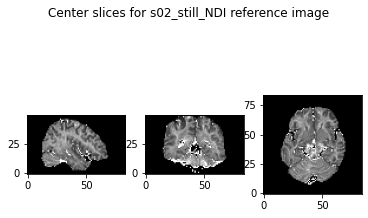

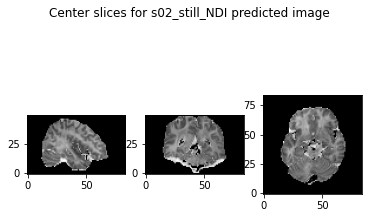

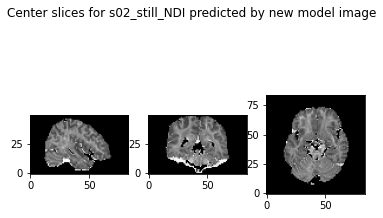

In [163]:
# load the reference img and pred imgs (the one generated from old model and new model)
pred_path = '../Net-DTI/nii/s02_still-NDI-96-first-conv3d-4layer.nii'
pred_NDI_img = nib.load(pred_path)
pred_NDI_img_data = pred_NDI_img.get_fdata()
new_pred_path = '../Net-DTI/nii/s02_still-NDI-96-first-conv3d_new-4layer.nii'
new_pred_NDI_img = nib.load(new_pred_path)
new_pred_NDI_img_data = new_pred_NDI_img.get_fdata()


# evaluate the model
eval_re = evaluate_model(pred_NDI_img_data, s02_NDI_img_data, s02_mask_img_data)
print("evaluation score for old model: " + str(eval_re))
new_eval_re = evaluate_model(new_pred_NDI_img_data, s02_NDI_img_data, s02_mask_img_data)
print("evaluation score for new model: " + str(new_eval_re))

# visualise both ref img and pred img
ref_slice_0 = s02_NDI_img_data[26, :, :]
ref_slice_1 = s02_NDI_img_data[:, 30, :]
ref_slice_2 = s02_NDI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_NDI reference image")

pred_slice_0 = pred_NDI_img_data[26, :, :]
pred_slice_1 = pred_NDI_img_data[:, 30, :]
pred_slice_2 = pred_NDI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_NDI predicted image")

new_pred_slice_0 = new_pred_NDI_img_data[26, :, :]
new_pred_slice_1 = new_pred_NDI_img_data[:, 30, :]
new_pred_slice_2 = new_pred_NDI_img_data[:, :, 16]
show_slices([new_pred_slice_0, new_pred_slice_1, new_pred_slice_2])
plt.suptitle("Center slices for s02_still_NDI predicted by new model image")

Model: "functional_253"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_127 (InputLayer)       [(None, 3, 3, 3, 96)]     0         
_________________________________________________________________
conv3d_64 (Conv3D)           (None, 1, 1, 1, 150)      388950    
_________________________________________________________________
conv3d_65 (Conv3D)           (None, 1, 1, 1, 200)      30200     
_________________________________________________________________
conv3d_66 (Conv3D)           (None, 1, 1, 1, 200)      40200     
_________________________________________________________________
conv3d_67 (Conv3D)           (None, 1, 1, 1, 200)      40200     
_________________________________________________________________
conv3d_68 (Conv3D)           (None, 1, 1, 1, 200)      40200     
_________________________________________________________________
dropout_126 (Dropout)        (None, 1, 1, 1, 200)   

2022-03-08 17:28:02.083386: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 17:28:02.083552: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 21/257 [=>............................] - ETA: 1s - loss: 0.4959 - accuracy: 0.0164

2022-03-08 17:28:03.901330: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 17:28:03.931996: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 17:28:03.932315: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 17:28:03.933623: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_17_28_03
2022-03-08 17:28:03.934253: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_17_28_03/vw.trace.json.gz
2022-03-08 17:28:03.934344: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 17:28:03.935305: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

257/257 [==============================] - 3s 10ms/step - loss: 0.1641 - accuracy: 0.0232 - val_loss: 0.0926 - val_accuracy: 0.0040
Epoch 2/100
257/257 [==============================] - 2s 8ms/step - loss: 0.0916 - accuracy: 0.0286 - val_loss: 0.0807 - val_accuracy: 0.0040
Epoch 3/100
257/257 [==============================] - 2s 8ms/step - loss: 0.0783 - accuracy: 0.0318 - val_loss: 0.0651 - val_accuracy: 0.0042
Epoch 4/100
257/257 [==============================] - 2s 8ms/step - loss: 0.0685 - accuracy: 0.0340 - val_loss: 0.0595 - val_accuracy: 0.0046
Epoch 5/100
257/257 [==============================] - 2s 8ms/step - loss: 0.0607 - accuracy: 0.0354 - val_loss: 0.0612 - val_accuracy: 0.0051
Epoch 6/100
257/257 [==============================] - 2s 8ms/step - loss: 0.0553 - accuracy: 0.0363 - val_loss: 0.0486 - val_accuracy: 0.0044
Epoch 7/100
257/257 [==============================] - 2s 8ms/step - loss: 0.0515 - accuracy: 0.0368 - val_loss: 0.0447 - val_accuracy: 0.0048
Epoch 8/10

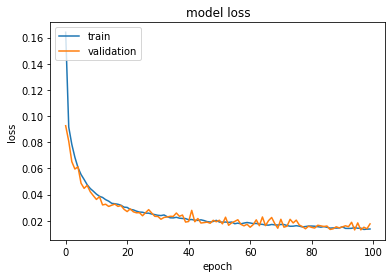

In [164]:
# 5 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv3d --layer 5 --train --label_type N"
plot_loss(cmd)

In [165]:
# 5 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv3d --layer 5 --label_type N"
args = model_parser().parse_args(cmd.split())
test_model(args)

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_255"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_128 (InputLayer)       [(None, 84, 84, 50, 96)]  0         
_________________________________________________________________
conv3d_70 (Conv3D)           (None, 84, 84, 50, 150)   388950    
_________________________________________________________________
conv3d_71 (Conv3D)           (None, 84, 84, 50, 200)   30200     
_________________________________________________________________
conv3d_72 (Conv3D)           (None, 84, 84, 50, 200)   40200     
_________________________________________________________________
conv3d_73 (Conv3D)           (None, 84, 84, 50, 200)   40200     
_________________________________________________________________
conv3d_74 (Conv3D)           (None, 84, 84, 50, 200)   40200     
_________________________________________________________________
dropo

Model: "functional_257"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_129 (InputLayer)       [(None, 3, 3, 3, 96)]     0         
_________________________________________________________________
conv3d_76 (Conv3D)           (None, 3, 3, 3, 128)      12416     
_________________________________________________________________
conv3d_77 (Conv3D)           (None, 1, 1, 1, 128)      442496    
_________________________________________________________________
conv3d_78 (Conv3D)           (None, 1, 1, 1, 256)      33024     
_________________________________________________________________
conv3d_79 (Conv3D)           (None, 1, 1, 1, 256)      65792     
_________________________________________________________________
conv3d_80 (Conv3D)           (None, 1, 1, 1, 256)      65792     
_________________________________________________________________
conv3d_81 (Conv3D)           (None, 1, 1, 1, 256)   

2022-03-08 17:31:27.476079: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 17:31:27.476157: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 14/257 [>.............................] - ETA: 2s - loss: 0.2431 - accuracy: 0.0142

2022-03-08 17:31:29.239485: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 17:31:29.272830: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 17:31:29.273157: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 17:31:29.274411: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_17_31_29
2022-03-08 17:31:29.275061: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_17_31_29/vw.trace.json.gz
2022-03-08 17:31:29.275147: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 17:31:29.276080: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

257/257 [==============================] - 4s 16ms/step - loss: 0.1116 - accuracy: 0.0236 - val_loss: 0.0650 - val_accuracy: 0.0038
Epoch 2/100
257/257 [==============================] - 3s 13ms/step - loss: 0.0766 - accuracy: 0.0299 - val_loss: 0.0573 - val_accuracy: 0.0043
Epoch 3/100
257/257 [==============================] - 3s 13ms/step - loss: 0.0639 - accuracy: 0.0328 - val_loss: 0.0481 - val_accuracy: 0.0045
Epoch 4/100
257/257 [==============================] - 3s 13ms/step - loss: 0.0563 - accuracy: 0.0342 - val_loss: 0.0423 - val_accuracy: 0.0046
Epoch 5/100
257/257 [==============================] - 3s 13ms/step - loss: 0.0500 - accuracy: 0.0356 - val_loss: 0.0405 - val_accuracy: 0.0046
Epoch 6/100
257/257 [==============================] - 4s 14ms/step - loss: 0.0450 - accuracy: 0.0370 - val_loss: 0.0384 - val_accuracy: 0.0051
Epoch 7/100
257/257 [==============================] - 4s 14ms/step - loss: 0.0416 - accuracy: 0.0373 - val_loss: 0.0356 - val_accuracy: 0.0052
Epoc

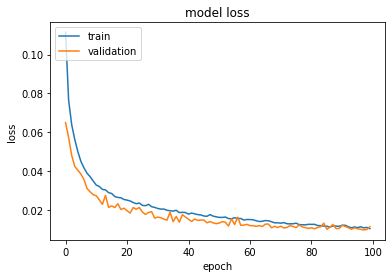

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_259"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_130 (InputLayer)       [(None, 84, 84, 50, 96)]  0         
_________________________________________________________________
conv3d_83 (Conv3D)           (None, 84, 84, 50, 128)   12416     
_________________________________________________________________
conv3d_84 (Conv3D)           (None, 84, 84, 50, 128)   442496    
_________________________________________________________________
conv3d_85 (Conv3D)           (None, 84, 84, 50, 256)   33024     
_________________________________________________________________
conv3d_86 (Conv3D)           (None, 84, 84, 50, 256)   65792     
_________________________________________________________________
conv3d_87 (Conv3D)           (None, 84, 84, 50, 256)   65792     
_________________________________________________________________
conv3

In [166]:
# train and test the conv3d_new model
cmd = "--train_subjects s01_still --DWI 96 --model conv3d_new --layer 5 --train --label_type N"
plot_loss(cmd)
cmd = "--test_subjects s02_still --DWI 96 --model conv3d_new --layer 5 --label_type N"
args = model_parser().parse_args(cmd.split())
test_model(args)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for old model: (0.23199795266426657, -42.48465110978348, 0.8789527974257517)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for new model: (0.22296246268611167, -43.279153476351894, 0.8879202845821692)


Text(0.5, 0.98, 'Center slices for s02_still_NDI predicted by new model image')

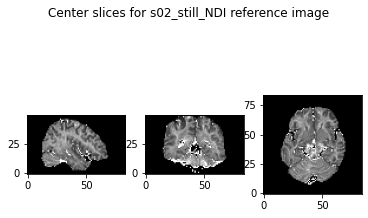

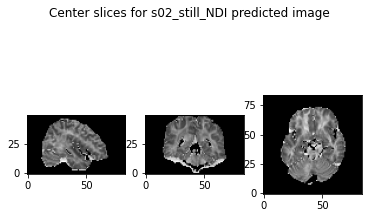

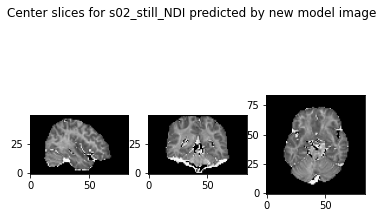

In [167]:
# load the reference img and pred imgs (the one generated from old model and new model)
pred_path = '../Net-DTI/nii/s02_still-NDI-96-first-conv3d-5layer.nii'
pred_NDI_img = nib.load(pred_path)
pred_NDI_img_data = pred_NDI_img.get_fdata()
new_pred_path = '../Net-DTI/nii/s02_still-NDI-96-first-conv3d_new-5layer.nii'
new_pred_NDI_img = nib.load(new_pred_path)
new_pred_NDI_img_data = new_pred_NDI_img.get_fdata()


# evaluate the model
eval_re = evaluate_model(pred_NDI_img_data, s02_NDI_img_data, s02_mask_img_data)
print("evaluation score for old model: " + str(eval_re))
new_eval_re = evaluate_model(new_pred_NDI_img_data, s02_NDI_img_data, s02_mask_img_data)
print("evaluation score for new model: " + str(new_eval_re))

# visualise both ref img and pred img
ref_slice_0 = s02_NDI_img_data[26, :, :]
ref_slice_1 = s02_NDI_img_data[:, 30, :]
ref_slice_2 = s02_NDI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_NDI reference image")

pred_slice_0 = pred_NDI_img_data[26, :, :]
pred_slice_1 = pred_NDI_img_data[:, 30, :]
pred_slice_2 = pred_NDI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_NDI predicted image")

new_pred_slice_0 = new_pred_NDI_img_data[26, :, :]
new_pred_slice_1 = new_pred_NDI_img_data[:, 30, :]
new_pred_slice_2 = new_pred_NDI_img_data[:, :, 16]
show_slices([new_pred_slice_0, new_pred_slice_1, new_pred_slice_2])
plt.suptitle("Center slices for s02_still_NDI predicted by new model image")

Model: "functional_261"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_131 (InputLayer)       [(None, 3, 3, 3, 96)]     0         
_________________________________________________________________
conv3d_90 (Conv3D)           (None, 1, 1, 1, 150)      388950    
_________________________________________________________________
conv3d_91 (Conv3D)           (None, 1, 1, 1, 200)      30200     
_________________________________________________________________
conv3d_92 (Conv3D)           (None, 1, 1, 1, 200)      40200     
_________________________________________________________________
conv3d_93 (Conv3D)           (None, 1, 1, 1, 200)      40200     
_________________________________________________________________
conv3d_94 (Conv3D)           (None, 1, 1, 1, 200)      40200     
_________________________________________________________________
conv3d_95 (Conv3D)           (None, 1, 1, 1, 200)   

2022-03-08 17:36:57.711420: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 17:36:57.711522: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 21/257 [=>............................] - ETA: 1s - loss: 0.2371 - accuracy: 0.0167

2022-03-08 17:36:59.503822: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 17:36:59.535131: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 17:36:59.535467: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 17:36:59.536767: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_17_36_59
2022-03-08 17:36:59.537453: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_17_36_59/vw.trace.json.gz
2022-03-08 17:36:59.537556: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 17:36:59.538538: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

257/257 [==============================] - 3s 10ms/step - loss: 0.1198 - accuracy: 0.0244 - val_loss: 0.0813 - val_accuracy: 0.0038
Epoch 2/100
257/257 [==============================] - 2s 9ms/step - loss: 0.0806 - accuracy: 0.0308 - val_loss: 0.0704 - val_accuracy: 0.0043
Epoch 3/100
257/257 [==============================] - 2s 9ms/step - loss: 0.0673 - accuracy: 0.0336 - val_loss: 0.0566 - val_accuracy: 0.0044
Epoch 4/100
257/257 [==============================] - 2s 9ms/step - loss: 0.0584 - accuracy: 0.0352 - val_loss: 0.0615 - val_accuracy: 0.0049
Epoch 5/100
257/257 [==============================] - 2s 9ms/step - loss: 0.0525 - accuracy: 0.0361 - val_loss: 0.0438 - val_accuracy: 0.0050
Epoch 6/100
257/257 [==============================] - 2s 9ms/step - loss: 0.0485 - accuracy: 0.0368 - val_loss: 0.0422 - val_accuracy: 0.0050
Epoch 7/100
257/257 [==============================] - 2s 9ms/step - loss: 0.0443 - accuracy: 0.0371 - val_loss: 0.0390 - val_accuracy: 0.0049
Epoch 8/10

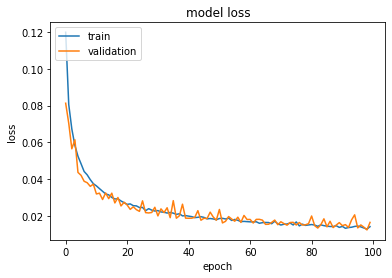

In [168]:
# 6 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv3d --layer 6 --train --label_type N"
plot_loss(cmd)

In [169]:
# 6 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv3d --layer 6 --label_type N"
args = model_parser().parse_args(cmd.split())
test_model(args)

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_263"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_132 (InputLayer)       [(None, 84, 84, 50, 96)]  0         
_________________________________________________________________
conv3d_97 (Conv3D)           (None, 84, 84, 50, 150)   388950    
_________________________________________________________________
conv3d_98 (Conv3D)           (None, 84, 84, 50, 200)   30200     
_________________________________________________________________
conv3d_99 (Conv3D)           (None, 84, 84, 50, 200)   40200     
_________________________________________________________________
conv3d_100 (Conv3D)          (None, 84, 84, 50, 200)   40200     
_________________________________________________________________
conv3d_101 (Conv3D)          (None, 84, 84, 50, 200)   40200     
_________________________________________________________________
conv3

Model: "functional_265"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_133 (InputLayer)       [(None, 3, 3, 3, 96)]     0         
_________________________________________________________________
conv3d_104 (Conv3D)          (None, 3, 3, 3, 128)      12416     
_________________________________________________________________
conv3d_105 (Conv3D)          (None, 1, 1, 1, 128)      442496    
_________________________________________________________________
conv3d_106 (Conv3D)          (None, 1, 1, 1, 256)      33024     
_________________________________________________________________
conv3d_107 (Conv3D)          (None, 1, 1, 1, 256)      65792     
_________________________________________________________________
conv3d_108 (Conv3D)          (None, 1, 1, 1, 256)      65792     
_________________________________________________________________
conv3d_109 (Conv3D)          (None, 1, 1, 1, 256)   

2022-03-08 17:40:36.776110: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 17:40:36.776225: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 12/257 [>.............................] - ETA: 3s - loss: 0.2221 - accuracy: 0.0143

2022-03-08 17:40:38.540780: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 17:40:38.589055: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 17:40:38.589404: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 17:40:38.590717: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_17_40_38
2022-03-08 17:40:38.591408: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_17_40_38/vw.trace.json.gz
2022-03-08 17:40:38.591496: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 17:40:38.592466: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

257/257 [==============================] - 4s 16ms/step - loss: 0.1072 - accuracy: 0.0243 - val_loss: 0.0678 - val_accuracy: 0.0040
Epoch 2/100
257/257 [==============================] - 4s 14ms/step - loss: 0.0756 - accuracy: 0.0298 - val_loss: 0.0600 - val_accuracy: 0.0040
Epoch 3/100
257/257 [==============================] - 4s 14ms/step - loss: 0.0630 - accuracy: 0.0335 - val_loss: 0.0495 - val_accuracy: 0.0052
Epoch 4/100
257/257 [==============================] - 4s 14ms/step - loss: 0.0546 - accuracy: 0.0350 - val_loss: 0.0428 - val_accuracy: 0.0050
Epoch 5/100
257/257 [==============================] - 4s 14ms/step - loss: 0.0480 - accuracy: 0.0367 - val_loss: 0.0408 - val_accuracy: 0.0045
Epoch 6/100
257/257 [==============================] - 4s 14ms/step - loss: 0.0444 - accuracy: 0.0373 - val_loss: 0.0357 - val_accuracy: 0.0058
Epoch 7/100
257/257 [==============================] - 4s 14ms/step - loss: 0.0415 - accuracy: 0.0382 - val_loss: 0.0355 - val_accuracy: 0.0058
Epoc

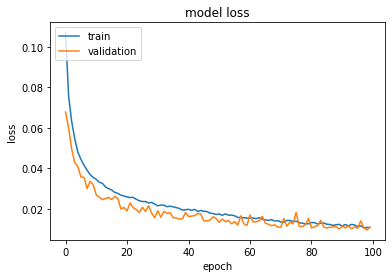

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_267"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_134 (InputLayer)       [(None, 84, 84, 50, 96)]  0         
_________________________________________________________________
conv3d_112 (Conv3D)          (None, 84, 84, 50, 128)   12416     
_________________________________________________________________
conv3d_113 (Conv3D)          (None, 84, 84, 50, 128)   442496    
_________________________________________________________________
conv3d_114 (Conv3D)          (None, 84, 84, 50, 256)   33024     
_________________________________________________________________
conv3d_115 (Conv3D)          (None, 84, 84, 50, 256)   65792     
_________________________________________________________________
conv3d_116 (Conv3D)          (None, 84, 84, 50, 256)   65792     
_________________________________________________________________
conv3

In [170]:
# train and test the conv3d_new model
cmd = "--train_subjects s01_still --DWI 96 --model conv3d_new --layer 6 --train --label_type N"
plot_loss(cmd)
cmd = "--test_subjects s02_still --DWI 96 --model conv3d_new --layer 6 --label_type N"
args = model_parser().parse_args(cmd.split())
test_model(args)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for old model: (0.24094096026737352, -41.72818354209403, 0.8614720796342966)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for new model: (0.22170920592178361, -43.39188924700848, 0.8810614913796934)


Text(0.5, 0.98, 'Center slices for s02_still_NDI predicted by new model image')

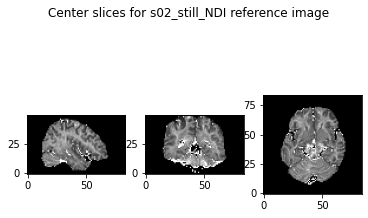

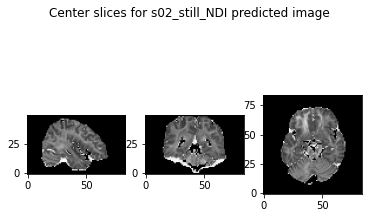

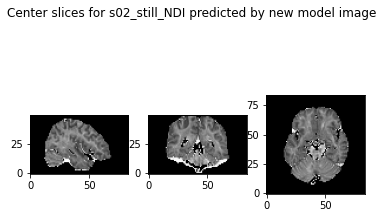

In [171]:
# load the reference img and pred imgs (the one generated from old model and new model)
pred_path = '../Net-DTI/nii/s02_still-NDI-96-first-conv3d-6layer.nii'
pred_NDI_img = nib.load(pred_path)
pred_NDI_img_data = pred_NDI_img.get_fdata()
new_pred_path = '../Net-DTI/nii/s02_still-NDI-96-first-conv3d_new-6layer.nii'
new_pred_NDI_img = nib.load(new_pred_path)
new_pred_NDI_img_data = new_pred_NDI_img.get_fdata()


# evaluate the model
eval_re = evaluate_model(pred_NDI_img_data, s02_NDI_img_data, s02_mask_img_data)
print("evaluation score for old model: " + str(eval_re))
new_eval_re = evaluate_model(new_pred_NDI_img_data, s02_NDI_img_data, s02_mask_img_data)
print("evaluation score for new model: " + str(new_eval_re))

# visualise both ref img and pred img
ref_slice_0 = s02_NDI_img_data[26, :, :]
ref_slice_1 = s02_NDI_img_data[:, 30, :]
ref_slice_2 = s02_NDI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_NDI reference image")

pred_slice_0 = pred_NDI_img_data[26, :, :]
pred_slice_1 = pred_NDI_img_data[:, 30, :]
pred_slice_2 = pred_NDI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_NDI predicted image")

new_pred_slice_0 = new_pred_NDI_img_data[26, :, :]
new_pred_slice_1 = new_pred_NDI_img_data[:, 30, :]
new_pred_slice_2 = new_pred_NDI_img_data[:, :, 16]
show_slices([new_pred_slice_0, new_pred_slice_1, new_pred_slice_2])
plt.suptitle("Center slices for s02_still_NDI predicted by new model image")

<strong>Training subject: s01_still<br/>

Test subject: s02_still<br/>

Network; 3D-CNN<br/>

Outcome: ODI<br/>


The training data is stored in datasets/data/s01_still-96-first-3d.mat<br/>

The training label is stored in datasets/label/s01_still-ODI-96-first-3d.mat<br/>

The testing data is stored in datasets/data/s02_still-96-first.mat<br/>

The testing label is stored in datasets/label/s02_still-ODI-96-first.mat</strong>

In [172]:
"""
Generate training dataset ODI for 3D CNN.
Using all of the DWI. 96. as training size.
"""
cmd = "--subjects s01_still --nDWI 96 --conv3d_train --label_type O"
args = data_parser().parse_args(cmd.split())
generate_data(args)

generating data patches
training dataset has shape:(82180, 3, 3, 3, 96)
generating label patches
training label has shape:(82641, 1, 1, 1, 1)


Model: "functional_269"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_135 (InputLayer)       [(None, 3, 3, 3, 96)]     0         
_________________________________________________________________
conv3d_120 (Conv3D)          (None, 1, 1, 1, 150)      388950    
_________________________________________________________________
dropout_134 (Dropout)        (None, 1, 1, 1, 150)      0         
_________________________________________________________________
conv3d_121 (Conv3D)          (None, 1, 1, 1, 1)        151       
Total params: 389,101
Trainable params: 389,101
Non-trainable params: 0
_________________________________________________________________
['O']
Training start ...


2022-03-08 17:46:35.851729: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 17:46:35.851889: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 32/257 [==>...........................] - ETA: 1s - loss: 0.4217 - accuracy: 0.0000e+00

2022-03-08 17:46:37.529042: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 17:46:37.549729: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 17:46:37.549952: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 17:46:37.550931: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_17_46_37
2022-03-08 17:46:37.551357: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_17_46_37/vw.trace.json.gz
2022-03-08 17:46:37.551419: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 17:46:37.552123: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

257/257 [==============================] - 2s 7ms/step - loss: 0.4003 - accuracy: 3.0421e-05 - val_loss: 0.4161 - val_accuracy: 0.0000e+00
Epoch 2/100
257/257 [==============================] - 1s 5ms/step - loss: 0.3972 - accuracy: 1.5211e-05 - val_loss: 0.4160 - val_accuracy: 0.0000e+00
Epoch 3/100
257/257 [==============================] - 1s 5ms/step - loss: 0.3970 - accuracy: 1.5211e-05 - val_loss: 0.4164 - val_accuracy: 0.0000e+00
Epoch 4/100
257/257 [==============================] - 1s 6ms/step - loss: 0.3972 - accuracy: 0.0000e+00 - val_loss: 0.4161 - val_accuracy: 0.0000e+00
Epoch 5/100
257/257 [==============================] - 2s 6ms/step - loss: 0.3972 - accuracy: 4.5632e-05 - val_loss: 0.4163 - val_accuracy: 0.0000e+00
Epoch 6/100
257/257 [==============================] - 1s 6ms/step - loss: 0.3972 - accuracy: 0.0000e+00 - val_loss: 0.4163 - val_accuracy: 0.0000e+00
Epoch 7/100
257/257 [==============================] - 2s 6ms/step - loss: 0.3972 - accuracy: 0.0000e+00 -

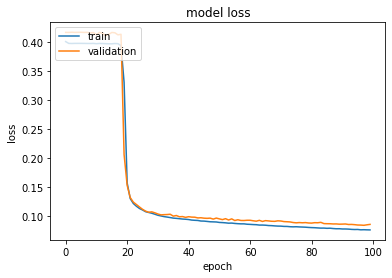

In [173]:
# 1 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv3d --layer 1 --train --label_type O --lr 0.00001"
plot_loss(cmd)

In [174]:
# 1 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv3d --layer 1 --label_type O"
args = model_parser().parse_args(cmd.split())
test_model(args)

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_271"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_136 (InputLayer)       [(None, 84, 84, 50, 96)]  0         
_________________________________________________________________
conv3d_122 (Conv3D)          (None, 84, 84, 50, 150)   388950    
_________________________________________________________________
dropout_135 (Dropout)        (None, 84, 84, 50, 150)   0         
_________________________________________________________________
conv3d_123 (Conv3D)          (None, 84, 84, 50, 1)     151       
Total params: 389,101
Trainable params: 389,101
Non-trainable params: 0
_________________________________________________________________
(1, 84, 84, 50, 1)
(84, 84, 50, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
0.20760908919453958


Model: "functional_273"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_137 (InputLayer)       [(None, 3, 3, 3, 96)]     0         
_________________________________________________________________
conv3d_124 (Conv3D)          (None, 3, 3, 3, 128)      12416     
_________________________________________________________________
conv3d_125 (Conv3D)          (None, 1, 1, 1, 128)      442496    
_________________________________________________________________
dropout_136 (Dropout)        (None, 1, 1, 1, 128)      0         
_________________________________________________________________
conv3d_126 (Conv3D)          (None, 1, 1, 1, 1)        129       
Total params: 455,041
Trainable params: 455,041
Non-trainable params: 0
_________________________________________________________________
['O']
Training start ...


2022-03-08 17:49:02.714787: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 17:49:02.714880: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 20/257 [=>............................] - ETA: 1s - loss: 0.4261 - accuracy: 0.0000e+00

2022-03-08 17:49:04.468708: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 17:49:04.488912: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 17:49:04.489157: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 17:49:04.490129: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_17_49_04
2022-03-08 17:49:04.490596: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_17_49_04/vw.trace.json.gz
2022-03-08 17:49:04.490662: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 17:49:04.491406: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

257/257 [==============================] - 3s 12ms/step - loss: 0.3999 - accuracy: 0.0000e+00 - val_loss: 0.4165 - val_accuracy: 0.0000e+00
Epoch 2/100
257/257 [==============================] - 3s 10ms/step - loss: 0.3974 - accuracy: 0.0000e+00 - val_loss: 0.4165 - val_accuracy: 0.0000e+00
Epoch 3/100
257/257 [==============================] - 3s 10ms/step - loss: 0.3974 - accuracy: 0.0000e+00 - val_loss: 0.4165 - val_accuracy: 0.0000e+00
Epoch 4/100
257/257 [==============================] - 3s 10ms/step - loss: 0.3974 - accuracy: 0.0000e+00 - val_loss: 0.4165 - val_accuracy: 0.0000e+00
Epoch 5/100
257/257 [==============================] - 3s 10ms/step - loss: 0.3974 - accuracy: 0.0000e+00 - val_loss: 0.4165 - val_accuracy: 0.0000e+00
Epoch 6/100
257/257 [==============================] - 3s 10ms/step - loss: 0.3974 - accuracy: 0.0000e+00 - val_loss: 0.4165 - val_accuracy: 0.0000e+00
Epoch 7/100
257/257 [==============================] - 3s 10ms/step - loss: 0.3974 - accuracy: 0.000

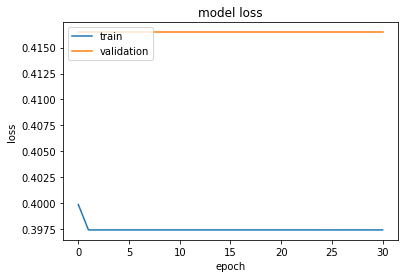

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_275"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_138 (InputLayer)       [(None, 84, 84, 50, 96)]  0         
_________________________________________________________________
conv3d_127 (Conv3D)          (None, 84, 84, 50, 128)   12416     
_________________________________________________________________
conv3d_128 (Conv3D)          (None, 84, 84, 50, 128)   442496    
_________________________________________________________________
dropout_137 (Dropout)        (None, 84, 84, 50, 128)   0         
_________________________________________________________________
conv3d_129 (Conv3D)          (None, 84, 84, 50, 1)     129       
Total params: 455,041
Trainable params: 455,041
Non-trainable params: 0
_________________________________________________________________
(1, 84, 84, 50, 1)
(84, 84, 50, 1)
<class 'numpy.ndarray'>
<class

In [175]:
# train and test the conv3d_new model
cmd = "--train_subjects s01_still --DWI 96 --model conv3d_new --layer 1 --train --label_type O"
plot_loss(cmd)
cmd = "--test_subjects s02_still --DWI 96 --model conv3d_new --layer 1 --label_type O"
args = model_parser().parse_args(cmd.split())
test_model(args)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for old model: (0.20760908919453958, -43.417692773459436, 0.8008131713784485)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for new model: (0.445013776934791, -29.16223292540886, nan)


Text(0.5, 0.98, 'Center slices for s02_still_ODI predicted by new model image')

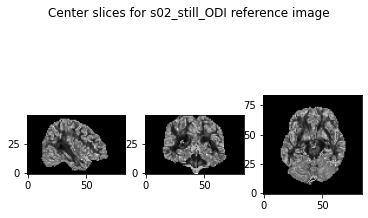

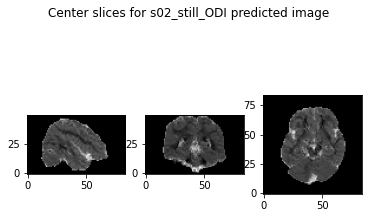

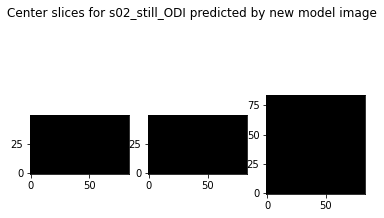

In [176]:
# load the reference img and pred imgs (the one generated from old model and new model)
pred_path = '../Net-DTI/nii/s02_still-ODI-96-first-conv3d-1layer.nii'
pred_ODI_img = nib.load(pred_path)
pred_ODI_img_data = pred_ODI_img.get_fdata()
new_pred_path = '../Net-DTI/nii/s02_still-ODI-96-first-conv3d_new-1layer.nii'
new_pred_ODI_img = nib.load(new_pred_path)
new_pred_ODI_img_data = new_pred_ODI_img.get_fdata()


# evaluate the model
eval_re = evaluate_model(pred_ODI_img_data, s02_ODI_img_data, s02_mask_img_data)
print("evaluation score for old model: " + str(eval_re))
new_eval_re = evaluate_model(new_pred_ODI_img_data, s02_ODI_img_data, s02_mask_img_data)
print("evaluation score for new model: " + str(new_eval_re))

# visualise both ref img and pred img
ref_slice_0 = s02_ODI_img_data[26, :, :]
ref_slice_1 = s02_ODI_img_data[:, 30, :]
ref_slice_2 = s02_ODI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_ODI reference image")

pred_slice_0 = pred_ODI_img_data[26, :, :]
pred_slice_1 = pred_ODI_img_data[:, 30, :]
pred_slice_2 = pred_ODI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_ODI predicted image")

new_pred_slice_0 = new_pred_ODI_img_data[26, :, :]
new_pred_slice_1 = new_pred_ODI_img_data[:, 30, :]
new_pred_slice_2 = new_pred_ODI_img_data[:, :, 16]
show_slices([new_pred_slice_0, new_pred_slice_1, new_pred_slice_2])
plt.suptitle("Center slices for s02_still_ODI predicted by new model image")

Model: "functional_277"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_139 (InputLayer)       [(None, 3, 3, 3, 96)]     0         
_________________________________________________________________
conv3d_130 (Conv3D)          (None, 1, 1, 1, 150)      388950    
_________________________________________________________________
conv3d_131 (Conv3D)          (None, 1, 1, 1, 200)      30200     
_________________________________________________________________
dropout_138 (Dropout)        (None, 1, 1, 1, 200)      0         
_________________________________________________________________
conv3d_132 (Conv3D)          (None, 1, 1, 1, 1)        201       
Total params: 419,351
Trainable params: 419,351
Non-trainable params: 0
_________________________________________________________________
['O']
Training start ...


2022-03-08 17:50:27.188075: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 17:50:27.188222: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 26/257 [==>...........................] - ETA: 1s - loss: 0.4508 - accuracy: 1.5024e-04

2022-03-08 17:50:28.985090: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 17:50:29.018955: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 17:50:29.019260: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 17:50:29.020488: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_17_50_29
2022-03-08 17:50:29.020963: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_17_50_29/vw.trace.json.gz
2022-03-08 17:50:29.021052: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 17:50:29.021920: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

257/257 [==============================] - 2s 8ms/step - loss: 0.4028 - accuracy: 1.5211e-05 - val_loss: 0.4166 - val_accuracy: 0.0000e+00
Epoch 2/100
257/257 [==============================] - 2s 7ms/step - loss: 0.3971 - accuracy: 0.0000e+00 - val_loss: 0.4156 - val_accuracy: 0.0000e+00
Epoch 3/100
257/257 [==============================] - 2s 6ms/step - loss: 0.3971 - accuracy: 1.5211e-05 - val_loss: 0.4164 - val_accuracy: 0.0000e+00
Epoch 4/100
257/257 [==============================] - 2s 6ms/step - loss: 0.3969 - accuracy: 1.5211e-05 - val_loss: 0.4181 - val_accuracy: 0.0000e+00
Epoch 5/100
257/257 [==============================] - 2s 6ms/step - loss: 0.3968 - accuracy: 0.0000e+00 - val_loss: 0.4145 - val_accuracy: 0.0000e+00
Epoch 6/100
257/257 [==============================] - 2s 6ms/step - loss: 0.3964 - accuracy: 3.0421e-05 - val_loss: 0.4148 - val_accuracy: 0.0000e+00
Epoch 7/100
257/257 [==============================] - 2s 6ms/step - loss: 0.3962 - accuracy: 3.0421e-05 -

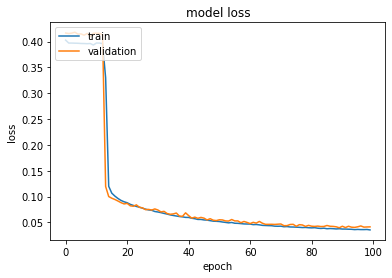

In [177]:
# 2 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv3d --layer 2 --train --label_type O"
plot_loss(cmd)

In [178]:
# 2 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv3d --layer 2 --label_type O"
args = model_parser().parse_args(cmd.split())
test_model(args)

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_279"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_140 (InputLayer)       [(None, 84, 84, 50, 96)]  0         
_________________________________________________________________
conv3d_133 (Conv3D)          (None, 84, 84, 50, 150)   388950    
_________________________________________________________________
conv3d_134 (Conv3D)          (None, 84, 84, 50, 200)   30200     
_________________________________________________________________
dropout_139 (Dropout)        (None, 84, 84, 50, 200)   0         
_________________________________________________________________
conv3d_135 (Conv3D)          (None, 84, 84, 50, 1)     201       
Total params: 419,351
Trainable params: 419,351
Non-trainable params: 0
_________________________________________________________________
(1, 84, 84, 50, 1)
(84, 84, 50, 1)
<class 'numpy.ndarray'>
<class

Model: "functional_281"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_141 (InputLayer)       [(None, 3, 3, 3, 96)]     0         
_________________________________________________________________
conv3d_136 (Conv3D)          (None, 3, 3, 3, 128)      12416     
_________________________________________________________________
conv3d_137 (Conv3D)          (None, 1, 1, 1, 128)      442496    
_________________________________________________________________
conv3d_138 (Conv3D)          (None, 1, 1, 1, 256)      33024     
_________________________________________________________________
dropout_140 (Dropout)        (None, 1, 1, 1, 256)      0         
_________________________________________________________________
conv3d_139 (Conv3D)          (None, 1, 1, 1, 1)        257       
Total params: 488,193
Trainable params: 488,193
Non-trainable params: 0
______________________________________________

2022-03-08 17:53:09.564802: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 17:53:09.564920: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 16/257 [>.............................] - ETA: 2s - loss: 0.3990 - accuracy: 0.0000e+00

2022-03-08 17:53:11.397863: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 17:53:11.429411: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 17:53:11.429723: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 17:53:11.430950: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_17_53_11
2022-03-08 17:53:11.431507: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_17_53_11/vw.trace.json.gz
2022-03-08 17:53:11.431602: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 17:53:11.432515: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

257/257 [==============================] - 3s 13ms/step - loss: 0.2071 - accuracy: 2.7379e-04 - val_loss: 0.1097 - val_accuracy: 6.0842e-05
Epoch 2/100
257/257 [==============================] - 3s 11ms/step - loss: 0.1055 - accuracy: 2.5858e-04 - val_loss: 0.0927 - val_accuracy: 3.6505e-04
Epoch 3/100
257/257 [==============================] - 3s 11ms/step - loss: 0.0945 - accuracy: 1.6732e-04 - val_loss: 0.0857 - val_accuracy: 3.0421e-04
Epoch 4/100
257/257 [==============================] - 3s 11ms/step - loss: 0.0877 - accuracy: 2.8900e-04 - val_loss: 0.0804 - val_accuracy: 3.0421e-04
Epoch 5/100
257/257 [==============================] - 3s 11ms/step - loss: 0.0827 - accuracy: 3.3463e-04 - val_loss: 0.0780 - val_accuracy: 3.0421e-04
Epoch 6/100
257/257 [==============================] - 3s 11ms/step - loss: 0.0793 - accuracy: 3.0421e-04 - val_loss: 0.0761 - val_accuracy: 2.4337e-04
Epoch 7/100
257/257 [==============================] - 3s 11ms/step - loss: 0.0755 - accuracy: 3.954

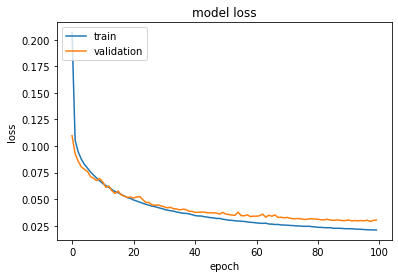

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_283"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_142 (InputLayer)       [(None, 84, 84, 50, 96)]  0         
_________________________________________________________________
conv3d_140 (Conv3D)          (None, 84, 84, 50, 128)   12416     
_________________________________________________________________
conv3d_141 (Conv3D)          (None, 84, 84, 50, 128)   442496    
_________________________________________________________________
conv3d_142 (Conv3D)          (None, 84, 84, 50, 256)   33024     
_________________________________________________________________
dropout_141 (Dropout)        (None, 84, 84, 50, 256)   0         
_________________________________________________________________
conv3d_143 (Conv3D)          (None, 84, 84, 50, 1)     257       
Total params: 488,193
Trainable params: 488,193
Non-trainable params: 0

In [179]:
# train and test the conv3d_new model
cmd = "--train_subjects s01_still --DWI 96 --model conv3d_new --layer 2 --train --label_type O"
plot_loss(cmd)
cmd = "--test_subjects s02_still --DWI 96 --model conv3d_new --layer 2 --label_type O"
args = model_parser().parse_args(cmd.split())
test_model(args)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for old model: (0.159527341970758, -47.88132030054542, 0.897687561887419)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for new model: (0.15550185398220254, -48.29389592362873, 0.9016276810596439)


Text(0.5, 0.98, 'Center slices for s02_still_ODI predicted by new model image')

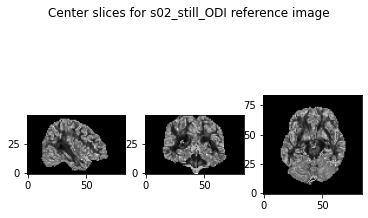

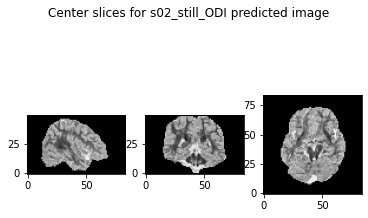

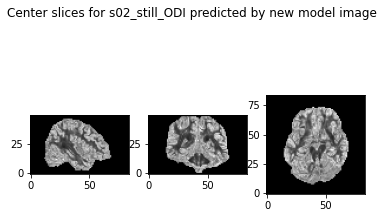

In [180]:
# load the reference img and pred imgs (the one generated from old model and new model)
pred_path = '../Net-DTI/nii/s02_still-ODI-96-first-conv3d-2layer.nii'
pred_ODI_img = nib.load(pred_path)
pred_ODI_img_data = pred_ODI_img.get_fdata()
new_pred_path = '../Net-DTI/nii/s02_still-ODI-96-first-conv3d_new-2layer.nii'
new_pred_ODI_img = nib.load(new_pred_path)
new_pred_ODI_img_data = new_pred_ODI_img.get_fdata()


# evaluate the model
eval_re = evaluate_model(pred_ODI_img_data, s02_ODI_img_data, s02_mask_img_data)
print("evaluation score for old model: " + str(eval_re))
new_eval_re = evaluate_model(new_pred_ODI_img_data, s02_ODI_img_data, s02_mask_img_data)
print("evaluation score for new model: " + str(new_eval_re))

# visualise both ref img and pred img
ref_slice_0 = s02_ODI_img_data[26, :, :]
ref_slice_1 = s02_ODI_img_data[:, 30, :]
ref_slice_2 = s02_ODI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_ODI reference image")

pred_slice_0 = pred_ODI_img_data[26, :, :]
pred_slice_1 = pred_ODI_img_data[:, 30, :]
pred_slice_2 = pred_ODI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_ODI predicted image")

new_pred_slice_0 = new_pred_ODI_img_data[26, :, :]
new_pred_slice_1 = new_pred_ODI_img_data[:, 30, :]
new_pred_slice_2 = new_pred_ODI_img_data[:, :, 16]
show_slices([new_pred_slice_0, new_pred_slice_1, new_pred_slice_2])
plt.suptitle("Center slices for s02_still_ODI predicted by new model image")

Model: "functional_285"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_143 (InputLayer)       [(None, 3, 3, 3, 96)]     0         
_________________________________________________________________
conv3d_144 (Conv3D)          (None, 1, 1, 1, 150)      388950    
_________________________________________________________________
conv3d_145 (Conv3D)          (None, 1, 1, 1, 200)      30200     
_________________________________________________________________
conv3d_146 (Conv3D)          (None, 1, 1, 1, 200)      40200     
_________________________________________________________________
dropout_142 (Dropout)        (None, 1, 1, 1, 200)      0         
_________________________________________________________________
conv3d_147 (Conv3D)          (None, 1, 1, 1, 1)        201       
Total params: 459,551
Trainable params: 459,551
Non-trainable params: 0
______________________________________________

2022-03-08 17:57:41.903351: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 17:57:41.903463: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 25/257 [=>............................] - ETA: 1s - loss: 0.4400 - accuracy: 0.0000e+00

2022-03-08 17:57:43.670142: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 17:57:43.696391: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 17:57:43.696672: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 17:57:43.697840: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_17_57_43
2022-03-08 17:57:43.698391: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_17_57_43/vw.trace.json.gz
2022-03-08 17:57:43.698472: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 17:57:43.699329: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

257/257 [==============================] - 2s 8ms/step - loss: 0.4010 - accuracy: 0.0000e+00 - val_loss: 0.4034 - val_accuracy: 0.0000e+00
Epoch 2/100
257/257 [==============================] - 2s 7ms/step - loss: 0.2308 - accuracy: 1.8253e-04 - val_loss: 0.1158 - val_accuracy: 0.0000e+00
Epoch 3/100
257/257 [==============================] - 2s 7ms/step - loss: 0.1093 - accuracy: 2.1295e-04 - val_loss: 0.1022 - val_accuracy: 1.2168e-04
Epoch 4/100
257/257 [==============================] - 2s 7ms/step - loss: 0.0998 - accuracy: 2.4337e-04 - val_loss: 0.0946 - val_accuracy: 1.8253e-04
Epoch 5/100
257/257 [==============================] - 2s 7ms/step - loss: 0.0941 - accuracy: 2.8900e-04 - val_loss: 0.0921 - val_accuracy: 0.0000e+00
Epoch 6/100
257/257 [==============================] - 2s 7ms/step - loss: 0.0903 - accuracy: 3.3463e-04 - val_loss: 0.0895 - val_accuracy: 2.4337e-04
Epoch 7/100
257/257 [==============================] - 2s 7ms/step - loss: 0.0862 - accuracy: 4.4110e-04 -

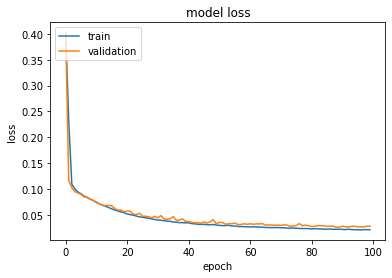

In [181]:
# 3 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv3d --layer 3 --train --label_type O"
plot_loss(cmd)

In [182]:
# 3 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv3d --layer 3 --label_type O"
args = model_parser().parse_args(cmd.split())
test_model(args)

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_287"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_144 (InputLayer)       [(None, 84, 84, 50, 96)]  0         
_________________________________________________________________
conv3d_148 (Conv3D)          (None, 84, 84, 50, 150)   388950    
_________________________________________________________________
conv3d_149 (Conv3D)          (None, 84, 84, 50, 200)   30200     
_________________________________________________________________
conv3d_150 (Conv3D)          (None, 84, 84, 50, 200)   40200     
_________________________________________________________________
dropout_143 (Dropout)        (None, 84, 84, 50, 200)   0         
_________________________________________________________________
conv3d_151 (Conv3D)          (None, 84, 84, 50, 1)     201       
Total params: 459,551
Trainable params: 459,551
Non-trainable params: 0

Model: "functional_289"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_145 (InputLayer)       [(None, 3, 3, 3, 96)]     0         
_________________________________________________________________
conv3d_152 (Conv3D)          (None, 3, 3, 3, 128)      12416     
_________________________________________________________________
conv3d_153 (Conv3D)          (None, 1, 1, 1, 128)      442496    
_________________________________________________________________
conv3d_154 (Conv3D)          (None, 1, 1, 1, 256)      33024     
_________________________________________________________________
conv3d_155 (Conv3D)          (None, 1, 1, 1, 256)      65792     
_________________________________________________________________
dropout_144 (Dropout)        (None, 1, 1, 1, 256)      0         
_________________________________________________________________
conv3d_156 (Conv3D)          (None, 1, 1, 1, 1)     

2022-03-08 18:00:38.614577: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 18:00:38.614703: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 15/257 [>.............................] - ETA: 2s - loss: 0.3435 - accuracy: 2.6042e-04

2022-03-08 18:00:40.402815: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 18:00:40.442178: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 18:00:40.442737: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 18:00:40.444466: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_18_00_40
2022-03-08 18:00:40.445102: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_18_00_40/vw.trace.json.gz
2022-03-08 18:00:40.445295: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 18:00:40.446473: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

257/257 [==============================] - 4s 14ms/step - loss: 0.1437 - accuracy: 2.1295e-04 - val_loss: 0.0987 - val_accuracy: 2.4337e-04
Epoch 2/100
257/257 [==============================] - 3s 12ms/step - loss: 0.0985 - accuracy: 2.2816e-04 - val_loss: 0.0966 - val_accuracy: 1.2168e-04
Epoch 3/100
257/257 [==============================] - 3s 12ms/step - loss: 0.0895 - accuracy: 2.5858e-04 - val_loss: 0.0848 - val_accuracy: 2.4337e-04
Epoch 4/100
257/257 [==============================] - 3s 12ms/step - loss: 0.0840 - accuracy: 3.6505e-04 - val_loss: 0.0805 - val_accuracy: 3.0421e-04
Epoch 5/100
257/257 [==============================] - 3s 12ms/step - loss: 0.0791 - accuracy: 3.0421e-04 - val_loss: 0.0788 - val_accuracy: 2.4337e-04
Epoch 6/100
257/257 [==============================] - 3s 12ms/step - loss: 0.0749 - accuracy: 4.1068e-04 - val_loss: 0.0763 - val_accuracy: 3.0421e-04
Epoch 7/100
257/257 [==============================] - 3s 11ms/step - loss: 0.0712 - accuracy: 4.106

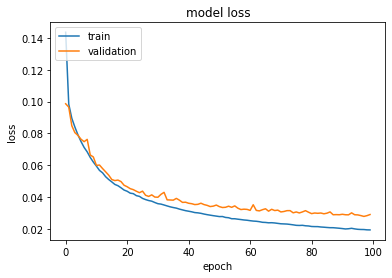

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_291"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_146 (InputLayer)       [(None, 84, 84, 50, 96)]  0         
_________________________________________________________________
conv3d_157 (Conv3D)          (None, 84, 84, 50, 128)   12416     
_________________________________________________________________
conv3d_158 (Conv3D)          (None, 84, 84, 50, 128)   442496    
_________________________________________________________________
conv3d_159 (Conv3D)          (None, 84, 84, 50, 256)   33024     
_________________________________________________________________
conv3d_160 (Conv3D)          (None, 84, 84, 50, 256)   65792     
_________________________________________________________________
dropout_145 (Dropout)        (None, 84, 84, 50, 256)   0         
_________________________________________________________________
conv3

In [183]:
# train and test the conv3d_new model
cmd = "--train_subjects s01_still --DWI 96 --model conv3d_new --layer 3 --train --label_type O"
plot_loss(cmd)
cmd = "--test_subjects s02_still --DWI 96 --model conv3d_new --layer 3 --label_type O"
args = model_parser().parse_args(cmd.split())
test_model(args)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for old model: (0.18916160431779722, -45.03452942585738, 0.8702180082253126)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for new model: (0.15667172473167357, -48.17332648063534, 0.8973241327237025)


Text(0.5, 0.98, 'Center slices for s02_still_ODI predicted by new model image')

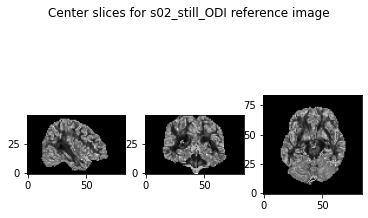

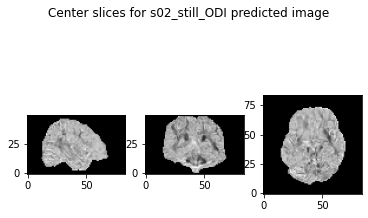

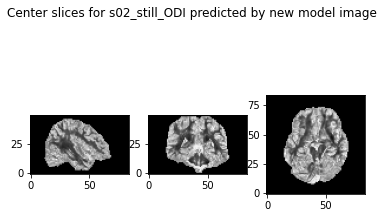

In [184]:
# load the reference img and pred imgs (the one generated from old model and new model)
pred_path = '../Net-DTI/nii/s02_still-ODI-96-first-conv3d-3layer.nii'
pred_ODI_img = nib.load(pred_path)
pred_ODI_img_data = pred_ODI_img.get_fdata()
new_pred_path = '../Net-DTI/nii/s02_still-ODI-96-first-conv3d_new-3layer.nii'
new_pred_ODI_img = nib.load(new_pred_path)
new_pred_ODI_img_data = new_pred_ODI_img.get_fdata()


# evaluate the model
eval_re = evaluate_model(pred_ODI_img_data, s02_ODI_img_data, s02_mask_img_data)
print("evaluation score for old model: " + str(eval_re))
new_eval_re = evaluate_model(new_pred_ODI_img_data, s02_ODI_img_data, s02_mask_img_data)
print("evaluation score for new model: " + str(new_eval_re))

# visualise both ref img and pred img
ref_slice_0 = s02_ODI_img_data[26, :, :]
ref_slice_1 = s02_ODI_img_data[:, 30, :]
ref_slice_2 = s02_ODI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_ODI reference image")

pred_slice_0 = pred_ODI_img_data[26, :, :]
pred_slice_1 = pred_ODI_img_data[:, 30, :]
pred_slice_2 = pred_ODI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_ODI predicted image")

new_pred_slice_0 = new_pred_ODI_img_data[26, :, :]
new_pred_slice_1 = new_pred_ODI_img_data[:, 30, :]
new_pred_slice_2 = new_pred_ODI_img_data[:, :, 16]
show_slices([new_pred_slice_0, new_pred_slice_1, new_pred_slice_2])
plt.suptitle("Center slices for s02_still_ODI predicted by new model image")

Model: "functional_293"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_147 (InputLayer)       [(None, 3, 3, 3, 96)]     0         
_________________________________________________________________
conv3d_162 (Conv3D)          (None, 1, 1, 1, 150)      388950    
_________________________________________________________________
conv3d_163 (Conv3D)          (None, 1, 1, 1, 200)      30200     
_________________________________________________________________
conv3d_164 (Conv3D)          (None, 1, 1, 1, 200)      40200     
_________________________________________________________________
conv3d_165 (Conv3D)          (None, 1, 1, 1, 200)      40200     
_________________________________________________________________
dropout_146 (Dropout)        (None, 1, 1, 1, 200)      0         
_________________________________________________________________
conv3d_166 (Conv3D)          (None, 1, 1, 1, 1)     

2022-03-08 18:05:31.213472: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 18:05:31.213623: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 24/257 [=>............................] - ETA: 1s - loss: 0.3653 - accuracy: 1.6276e-04

2022-03-08 18:05:32.985980: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 18:05:33.010411: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 18:05:33.010709: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 18:05:33.011859: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_18_05_33
2022-03-08 18:05:33.012452: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_18_05_33/vw.trace.json.gz
2022-03-08 18:05:33.012529: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 18:05:33.013404: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

257/257 [==============================] - 2s 9ms/step - loss: 0.1589 - accuracy: 1.5211e-04 - val_loss: 0.1049 - val_accuracy: 1.8253e-04
Epoch 2/100
257/257 [==============================] - 2s 8ms/step - loss: 0.1041 - accuracy: 2.2816e-04 - val_loss: 0.1003 - val_accuracy: 1.8253e-04
Epoch 3/100
257/257 [==============================] - 2s 7ms/step - loss: 0.0964 - accuracy: 3.0421e-04 - val_loss: 0.0943 - val_accuracy: 1.8253e-04
Epoch 4/100
257/257 [==============================] - 2s 8ms/step - loss: 0.0904 - accuracy: 2.4337e-04 - val_loss: 0.0903 - val_accuracy: 3.0421e-04
Epoch 5/100
257/257 [==============================] - 2s 7ms/step - loss: 0.0871 - accuracy: 2.7379e-04 - val_loss: 0.0884 - val_accuracy: 2.4337e-04
Epoch 6/100
257/257 [==============================] - 2s 7ms/step - loss: 0.0831 - accuracy: 3.3463e-04 - val_loss: 0.0836 - val_accuracy: 3.0421e-04
Epoch 7/100
257/257 [==============================] - 2s 7ms/step - loss: 0.0787 - accuracy: 3.9547e-04 -

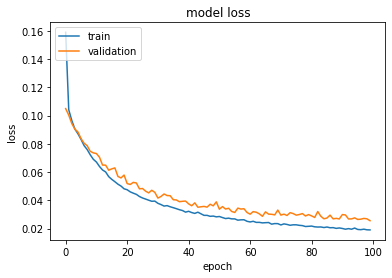

In [185]:
# 4 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv3d --layer 4 --train --label_type O"
plot_loss(cmd)

In [186]:
# 4 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv3d --layer 4 --label_type O"
args = model_parser().parse_args(cmd.split())
test_model(args)

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_295"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_148 (InputLayer)       [(None, 84, 84, 50, 96)]  0         
_________________________________________________________________
conv3d_167 (Conv3D)          (None, 84, 84, 50, 150)   388950    
_________________________________________________________________
conv3d_168 (Conv3D)          (None, 84, 84, 50, 200)   30200     
_________________________________________________________________
conv3d_169 (Conv3D)          (None, 84, 84, 50, 200)   40200     
_________________________________________________________________
conv3d_170 (Conv3D)          (None, 84, 84, 50, 200)   40200     
_________________________________________________________________
dropout_147 (Dropout)        (None, 84, 84, 50, 200)   0         
_________________________________________________________________
conv3

Model: "functional_297"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_149 (InputLayer)       [(None, 3, 3, 3, 96)]     0         
_________________________________________________________________
conv3d_172 (Conv3D)          (None, 3, 3, 3, 128)      12416     
_________________________________________________________________
conv3d_173 (Conv3D)          (None, 1, 1, 1, 128)      442496    
_________________________________________________________________
conv3d_174 (Conv3D)          (None, 1, 1, 1, 256)      33024     
_________________________________________________________________
conv3d_175 (Conv3D)          (None, 1, 1, 1, 256)      65792     
_________________________________________________________________
conv3d_176 (Conv3D)          (None, 1, 1, 1, 256)      65792     
_________________________________________________________________
dropout_148 (Dropout)        (None, 1, 1, 1, 256)   

2022-03-08 18:08:42.309273: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 18:08:42.309391: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 16/257 [>.............................] - ETA: 2s - loss: 0.2178 - accuracy: 2.4414e-04

2022-03-08 18:08:44.088335: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 18:08:44.117069: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 18:08:44.117401: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 18:08:44.118592: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_18_08_44
2022-03-08 18:08:44.119202: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_18_08_44/vw.trace.json.gz
2022-03-08 18:08:44.119283: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 18:08:44.120163: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

257/257 [==============================] - 4s 14ms/step - loss: 0.1193 - accuracy: 1.8253e-04 - val_loss: 0.0986 - val_accuracy: 6.0842e-05
Epoch 2/100
257/257 [==============================] - 3s 12ms/step - loss: 0.0939 - accuracy: 3.3463e-04 - val_loss: 0.0893 - val_accuracy: 1.8253e-04
Epoch 3/100
257/257 [==============================] - 3s 12ms/step - loss: 0.0858 - accuracy: 3.1942e-04 - val_loss: 0.0869 - val_accuracy: 1.8253e-04
Epoch 4/100
257/257 [==============================] - 3s 13ms/step - loss: 0.0791 - accuracy: 3.3463e-04 - val_loss: 0.0859 - val_accuracy: 1.8253e-04
Epoch 5/100
257/257 [==============================] - 3s 12ms/step - loss: 0.0732 - accuracy: 3.3463e-04 - val_loss: 0.0734 - val_accuracy: 3.0421e-04
Epoch 6/100
257/257 [==============================] - 3s 12ms/step - loss: 0.0684 - accuracy: 3.4984e-04 - val_loss: 0.0691 - val_accuracy: 3.0421e-04
Epoch 7/100
257/257 [==============================] - 3s 12ms/step - loss: 0.0637 - accuracy: 4.106

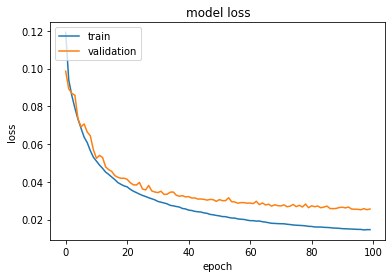

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_299"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_150 (InputLayer)       [(None, 84, 84, 50, 96)]  0         
_________________________________________________________________
conv3d_178 (Conv3D)          (None, 84, 84, 50, 128)   12416     
_________________________________________________________________
conv3d_179 (Conv3D)          (None, 84, 84, 50, 128)   442496    
_________________________________________________________________
conv3d_180 (Conv3D)          (None, 84, 84, 50, 256)   33024     
_________________________________________________________________
conv3d_181 (Conv3D)          (None, 84, 84, 50, 256)   65792     
_________________________________________________________________
conv3d_182 (Conv3D)          (None, 84, 84, 50, 256)   65792     
_________________________________________________________________
dropo

In [187]:
# train and test the conv3d_new model
cmd = "--train_subjects s01_still --DWI 96 --model conv3d_new --layer 4 --train --label_type O"
plot_loss(cmd)
cmd = "--test_subjects s02_still --DWI 96 --model conv3d_new --layer 4 --label_type O"
args = model_parser().parse_args(cmd.split())
test_model(args)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for old model: (0.1746474910627479, -46.388152005026264, 0.8838607382494034)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for new model: (0.15593741428305533, -48.248941843004765, 0.8927971290231193)


Text(0.5, 0.98, 'Center slices for s02_still_ODI predicted by new model image')

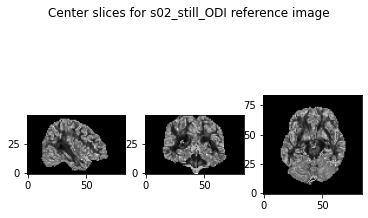

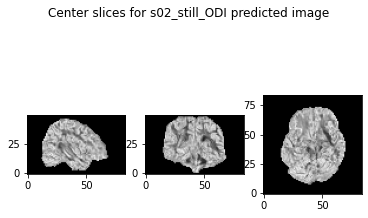

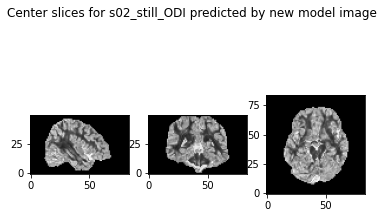

In [188]:
# load the reference img and pred imgs (the one generated from old model and new model)
pred_path = '../Net-DTI/nii/s02_still-ODI-96-first-conv3d-4layer.nii'
pred_ODI_img = nib.load(pred_path)
pred_ODI_img_data = pred_ODI_img.get_fdata()
new_pred_path = '../Net-DTI/nii/s02_still-ODI-96-first-conv3d_new-4layer.nii'
new_pred_ODI_img = nib.load(new_pred_path)
new_pred_ODI_img_data = new_pred_ODI_img.get_fdata()


# evaluate the model
eval_re = evaluate_model(pred_ODI_img_data, s02_ODI_img_data, s02_mask_img_data)
print("evaluation score for old model: " + str(eval_re))
new_eval_re = evaluate_model(new_pred_ODI_img_data, s02_ODI_img_data, s02_mask_img_data)
print("evaluation score for new model: " + str(new_eval_re))

# visualise both ref img and pred img
ref_slice_0 = s02_ODI_img_data[26, :, :]
ref_slice_1 = s02_ODI_img_data[:, 30, :]
ref_slice_2 = s02_ODI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_ODI reference image")

pred_slice_0 = pred_ODI_img_data[26, :, :]
pred_slice_1 = pred_ODI_img_data[:, 30, :]
pred_slice_2 = pred_ODI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_ODI predicted image")

new_pred_slice_0 = new_pred_ODI_img_data[26, :, :]
new_pred_slice_1 = new_pred_ODI_img_data[:, 30, :]
new_pred_slice_2 = new_pred_ODI_img_data[:, :, 16]
show_slices([new_pred_slice_0, new_pred_slice_1, new_pred_slice_2])
plt.suptitle("Center slices for s02_still_ODI predicted by new model image")

Model: "functional_301"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_151 (InputLayer)       [(None, 3, 3, 3, 96)]     0         
_________________________________________________________________
conv3d_184 (Conv3D)          (None, 1, 1, 1, 150)      388950    
_________________________________________________________________
conv3d_185 (Conv3D)          (None, 1, 1, 1, 200)      30200     
_________________________________________________________________
conv3d_186 (Conv3D)          (None, 1, 1, 1, 200)      40200     
_________________________________________________________________
conv3d_187 (Conv3D)          (None, 1, 1, 1, 200)      40200     
_________________________________________________________________
conv3d_188 (Conv3D)          (None, 1, 1, 1, 200)      40200     
_________________________________________________________________
dropout_150 (Dropout)        (None, 1, 1, 1, 200)   

2022-03-08 18:13:53.640401: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 18:13:53.640523: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 22/257 [=>............................] - ETA: 1s - loss: 0.2033 - accuracy: 3.5511e-04

2022-03-08 18:13:55.428697: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 18:13:55.455610: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 18:13:55.455921: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 18:13:55.457099: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_18_13_55
2022-03-08 18:13:55.457716: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_18_13_55/vw.trace.json.gz
2022-03-08 18:13:55.457796: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 18:13:55.458678: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

257/257 [==============================] - 3s 11ms/step - loss: 0.1212 - accuracy: 1.5211e-04 - val_loss: 0.1039 - val_accuracy: 6.0842e-05
Epoch 2/100
257/257 [==============================] - 2s 8ms/step - loss: 0.0971 - accuracy: 2.4337e-04 - val_loss: 0.0925 - val_accuracy: 1.8253e-04
Epoch 3/100
257/257 [==============================] - 2s 8ms/step - loss: 0.0901 - accuracy: 2.1295e-04 - val_loss: 0.0882 - val_accuracy: 2.4337e-04
Epoch 4/100
257/257 [==============================] - 2s 8ms/step - loss: 0.0847 - accuracy: 3.3463e-04 - val_loss: 0.0867 - val_accuracy: 2.4337e-04
Epoch 5/100
257/257 [==============================] - 2s 8ms/step - loss: 0.0800 - accuracy: 3.1942e-04 - val_loss: 0.0821 - val_accuracy: 3.0421e-04
Epoch 6/100
257/257 [==============================] - 2s 8ms/step - loss: 0.0760 - accuracy: 4.1068e-04 - val_loss: 0.0801 - val_accuracy: 3.6505e-04
Epoch 7/100
257/257 [==============================] - 2s 8ms/step - loss: 0.0727 - accuracy: 3.9547e-04 

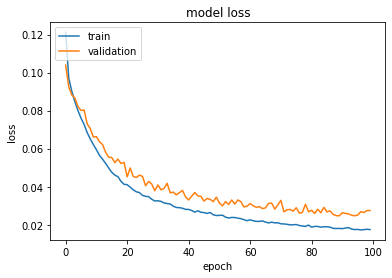

In [189]:
# 5 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv3d --layer 5 --train --label_type O"
plot_loss(cmd)

In [190]:
# 5 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv3d --layer 5 --label_type O"
args = model_parser().parse_args(cmd.split())
test_model(args)

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_303"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_152 (InputLayer)       [(None, 84, 84, 50, 96)]  0         
_________________________________________________________________
conv3d_190 (Conv3D)          (None, 84, 84, 50, 150)   388950    
_________________________________________________________________
conv3d_191 (Conv3D)          (None, 84, 84, 50, 200)   30200     
_________________________________________________________________
conv3d_192 (Conv3D)          (None, 84, 84, 50, 200)   40200     
_________________________________________________________________
conv3d_193 (Conv3D)          (None, 84, 84, 50, 200)   40200     
_________________________________________________________________
conv3d_194 (Conv3D)          (None, 84, 84, 50, 200)   40200     
_________________________________________________________________
dropo

Model: "functional_305"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_153 (InputLayer)       [(None, 3, 3, 3, 96)]     0         
_________________________________________________________________
conv3d_196 (Conv3D)          (None, 3, 3, 3, 128)      12416     
_________________________________________________________________
conv3d_197 (Conv3D)          (None, 1, 1, 1, 128)      442496    
_________________________________________________________________
conv3d_198 (Conv3D)          (None, 1, 1, 1, 256)      33024     
_________________________________________________________________
conv3d_199 (Conv3D)          (None, 1, 1, 1, 256)      65792     
_________________________________________________________________
conv3d_200 (Conv3D)          (None, 1, 1, 1, 256)      65792     
_________________________________________________________________
conv3d_201 (Conv3D)          (None, 1, 1, 1, 256)   

2022-03-08 18:17:19.548469: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 18:17:19.548600: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 12/257 [>.............................] - ETA: 3s - loss: 0.2494 - accuracy: 0.0000e+00

2022-03-08 18:17:21.826146: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 18:17:21.875108: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 18:17:21.875513: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 18:17:21.876979: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_18_17_21
2022-03-08 18:17:21.877649: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_18_17_21/vw.trace.json.gz
2022-03-08 18:17:21.877762: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 18:17:21.878817: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

257/257 [==============================] - 4s 15ms/step - loss: 0.1200 - accuracy: 1.9774e-04 - val_loss: 0.0953 - val_accuracy: 6.0842e-05
Epoch 2/100
257/257 [==============================] - 3s 13ms/step - loss: 0.0920 - accuracy: 2.8900e-04 - val_loss: 0.0865 - val_accuracy: 2.4337e-04
Epoch 3/100
257/257 [==============================] - 3s 13ms/step - loss: 0.0830 - accuracy: 2.8900e-04 - val_loss: 0.0814 - val_accuracy: 1.8253e-04
Epoch 4/100
257/257 [==============================] - 3s 13ms/step - loss: 0.0769 - accuracy: 2.8900e-04 - val_loss: 0.0858 - val_accuracy: 6.0842e-05
Epoch 5/100
257/257 [==============================] - 3s 13ms/step - loss: 0.0713 - accuracy: 3.4984e-04 - val_loss: 0.0746 - val_accuracy: 2.4337e-04
Epoch 6/100
257/257 [==============================] - 3s 13ms/step - loss: 0.0667 - accuracy: 3.9547e-04 - val_loss: 0.0702 - val_accuracy: 1.8253e-04
Epoch 7/100
257/257 [==============================] - 3s 13ms/step - loss: 0.0622 - accuracy: 3.954

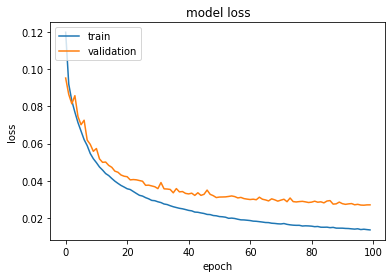

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_307"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_154 (InputLayer)       [(None, 84, 84, 50, 96)]  0         
_________________________________________________________________
conv3d_203 (Conv3D)          (None, 84, 84, 50, 128)   12416     
_________________________________________________________________
conv3d_204 (Conv3D)          (None, 84, 84, 50, 128)   442496    
_________________________________________________________________
conv3d_205 (Conv3D)          (None, 84, 84, 50, 256)   33024     
_________________________________________________________________
conv3d_206 (Conv3D)          (None, 84, 84, 50, 256)   65792     
_________________________________________________________________
conv3d_207 (Conv3D)          (None, 84, 84, 50, 256)   65792     
_________________________________________________________________
conv3

In [191]:
# train and test the conv3d_new model
cmd = "--train_subjects s01_still --DWI 96 --model conv3d_new --layer 5 --train --label_type O"
plot_loss(cmd)
cmd = "--test_subjects s02_still --DWI 96 --model conv3d_new --layer 5 --label_type O"
args = model_parser().parse_args(cmd.split())
test_model(args)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for old model: (0.16635777223350462, -47.19591073969839, 0.8901941288589954)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for new model: (0.16168338109160346, -47.66299541461737, 0.8791666550926287)


Text(0.5, 0.98, 'Center slices for s02_still_ODI predicted by new model image')

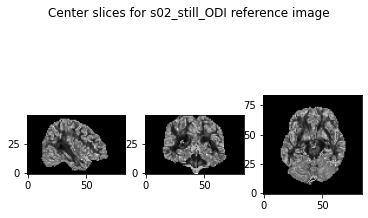

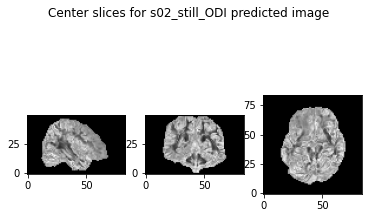

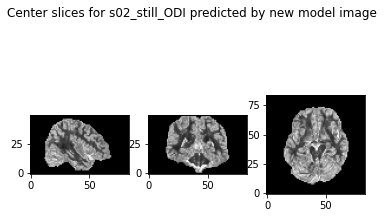

In [192]:
# load the reference img and pred imgs (the one generated from old model and new model)
pred_path = '../Net-DTI/nii/s02_still-ODI-96-first-conv3d-5layer.nii'
pred_ODI_img = nib.load(pred_path)
pred_ODI_img_data = pred_ODI_img.get_fdata()
new_pred_path = '../Net-DTI/nii/s02_still-ODI-96-first-conv3d_new-5layer.nii'
new_pred_ODI_img = nib.load(new_pred_path)
new_pred_ODI_img_data = new_pred_ODI_img.get_fdata()


# evaluate the model
eval_re = evaluate_model(pred_ODI_img_data, s02_ODI_img_data, s02_mask_img_data)
print("evaluation score for old model: " + str(eval_re))
new_eval_re = evaluate_model(new_pred_ODI_img_data, s02_ODI_img_data, s02_mask_img_data)
print("evaluation score for new model: " + str(new_eval_re))

# visualise both ref img and pred img
ref_slice_0 = s02_ODI_img_data[26, :, :]
ref_slice_1 = s02_ODI_img_data[:, 30, :]
ref_slice_2 = s02_ODI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_ODI reference image")

pred_slice_0 = pred_ODI_img_data[26, :, :]
pred_slice_1 = pred_ODI_img_data[:, 30, :]
pred_slice_2 = pred_ODI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_ODI predicted image")

new_pred_slice_0 = new_pred_ODI_img_data[26, :, :]
new_pred_slice_1 = new_pred_ODI_img_data[:, 30, :]
new_pred_slice_2 = new_pred_ODI_img_data[:, :, 16]
show_slices([new_pred_slice_0, new_pred_slice_1, new_pred_slice_2])
plt.suptitle("Center slices for s02_still_ODI predicted by new model image")

Model: "functional_309"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_155 (InputLayer)       [(None, 3, 3, 3, 96)]     0         
_________________________________________________________________
conv3d_210 (Conv3D)          (None, 1, 1, 1, 150)      388950    
_________________________________________________________________
conv3d_211 (Conv3D)          (None, 1, 1, 1, 200)      30200     
_________________________________________________________________
conv3d_212 (Conv3D)          (None, 1, 1, 1, 200)      40200     
_________________________________________________________________
conv3d_213 (Conv3D)          (None, 1, 1, 1, 200)      40200     
_________________________________________________________________
conv3d_214 (Conv3D)          (None, 1, 1, 1, 200)      40200     
_________________________________________________________________
conv3d_215 (Conv3D)          (None, 1, 1, 1, 200)   

2022-03-08 18:22:52.050686: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 18:22:52.050813: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 19/257 [=>............................] - ETA: 1s - loss: 0.1855 - accuracy: 0.0000e+00

2022-03-08 18:22:53.879576: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 18:22:53.919783: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 18:22:53.920159: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 18:22:53.921598: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_18_22_53
2022-03-08 18:22:53.922246: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_18_22_53/vw.trace.json.gz
2022-03-08 18:22:53.922351: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 18:22:53.923388: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

257/257 [==============================] - 3s 10ms/step - loss: 0.1152 - accuracy: 1.5211e-04 - val_loss: 0.0987 - val_accuracy: 6.0842e-05
Epoch 2/100
257/257 [==============================] - 2s 9ms/step - loss: 0.0947 - accuracy: 2.5858e-04 - val_loss: 0.0904 - val_accuracy: 6.0842e-05
Epoch 3/100
257/257 [==============================] - 2s 9ms/step - loss: 0.0874 - accuracy: 3.1942e-04 - val_loss: 0.0876 - val_accuracy: 0.0000e+00
Epoch 4/100
257/257 [==============================] - 2s 9ms/step - loss: 0.0814 - accuracy: 3.6505e-04 - val_loss: 0.0815 - val_accuracy: 6.0842e-05
Epoch 5/100
257/257 [==============================] - 2s 9ms/step - loss: 0.0763 - accuracy: 4.1068e-04 - val_loss: 0.0774 - val_accuracy: 2.4337e-04
Epoch 6/100
257/257 [==============================] - 2s 9ms/step - loss: 0.0716 - accuracy: 3.9547e-04 - val_loss: 0.0756 - val_accuracy: 2.4337e-04
Epoch 7/100
257/257 [==============================] - 2s 9ms/step - loss: 0.0673 - accuracy: 3.9547e-04 

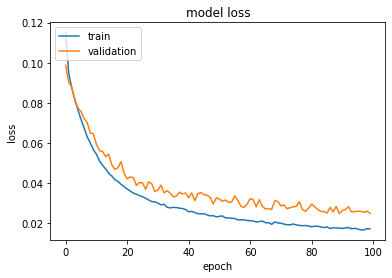

In [193]:
# 6 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv3d --layer 6 --train --label_type O"
plot_loss(cmd)

In [194]:
# 6 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv3d --layer 6 --label_type O"
args = model_parser().parse_args(cmd.split())
test_model(args)

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_311"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_156 (InputLayer)       [(None, 84, 84, 50, 96)]  0         
_________________________________________________________________
conv3d_217 (Conv3D)          (None, 84, 84, 50, 150)   388950    
_________________________________________________________________
conv3d_218 (Conv3D)          (None, 84, 84, 50, 200)   30200     
_________________________________________________________________
conv3d_219 (Conv3D)          (None, 84, 84, 50, 200)   40200     
_________________________________________________________________
conv3d_220 (Conv3D)          (None, 84, 84, 50, 200)   40200     
_________________________________________________________________
conv3d_221 (Conv3D)          (None, 84, 84, 50, 200)   40200     
_________________________________________________________________
conv3

Model: "functional_313"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_157 (InputLayer)       [(None, 3, 3, 3, 96)]     0         
_________________________________________________________________
conv3d_224 (Conv3D)          (None, 3, 3, 3, 128)      12416     
_________________________________________________________________
conv3d_225 (Conv3D)          (None, 1, 1, 1, 128)      442496    
_________________________________________________________________
conv3d_226 (Conv3D)          (None, 1, 1, 1, 256)      33024     
_________________________________________________________________
conv3d_227 (Conv3D)          (None, 1, 1, 1, 256)      65792     
_________________________________________________________________
conv3d_228 (Conv3D)          (None, 1, 1, 1, 256)      65792     
_________________________________________________________________
conv3d_229 (Conv3D)          (None, 1, 1, 1, 256)   

2022-03-08 18:26:31.723015: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 18:26:31.723132: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 13/257 [>.............................] - ETA: 3s - loss: 0.2134 - accuracy: 0.0000e+00

2022-03-08 18:26:33.664832: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 18:26:33.705288: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 18:26:33.705688: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 18:26:33.707244: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_18_26_33
2022-03-08 18:26:33.707987: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_18_26_33/vw.trace.json.gz
2022-03-08 18:26:33.708111: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 18:26:33.709253: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

257/257 [==============================] - 4s 16ms/step - loss: 0.1137 - accuracy: 2.5858e-04 - val_loss: 0.0934 - val_accuracy: 1.2168e-04
Epoch 2/100
257/257 [==============================] - 4s 14ms/step - loss: 0.0893 - accuracy: 3.3463e-04 - val_loss: 0.0857 - val_accuracy: 3.0421e-04
Epoch 3/100
257/257 [==============================] - 4s 14ms/step - loss: 0.0805 - accuracy: 2.8900e-04 - val_loss: 0.0865 - val_accuracy: 1.2168e-04
Epoch 4/100
257/257 [==============================] - 4s 14ms/step - loss: 0.0743 - accuracy: 3.6505e-04 - val_loss: 0.0727 - val_accuracy: 2.4337e-04
Epoch 5/100
257/257 [==============================] - 4s 14ms/step - loss: 0.0685 - accuracy: 3.8026e-04 - val_loss: 0.0700 - val_accuracy: 3.0421e-04
Epoch 6/100
257/257 [==============================] - 4s 14ms/step - loss: 0.0651 - accuracy: 3.6505e-04 - val_loss: 0.0659 - val_accuracy: 3.0421e-04
Epoch 7/100
257/257 [==============================] - 4s 14ms/step - loss: 0.0599 - accuracy: 3.954

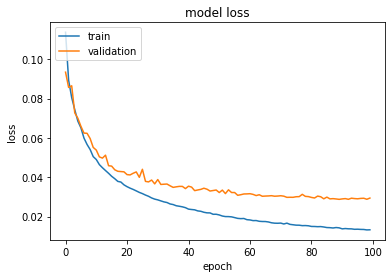

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_315"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_158 (InputLayer)       [(None, 84, 84, 50, 96)]  0         
_________________________________________________________________
conv3d_232 (Conv3D)          (None, 84, 84, 50, 128)   12416     
_________________________________________________________________
conv3d_233 (Conv3D)          (None, 84, 84, 50, 128)   442496    
_________________________________________________________________
conv3d_234 (Conv3D)          (None, 84, 84, 50, 256)   33024     
_________________________________________________________________
conv3d_235 (Conv3D)          (None, 84, 84, 50, 256)   65792     
_________________________________________________________________
conv3d_236 (Conv3D)          (None, 84, 84, 50, 256)   65792     
_________________________________________________________________
conv3

In [195]:
# train and test the conv3d_new model
cmd = "--train_subjects s01_still --DWI 96 --model conv3d_new --layer 6 --train --label_type O"
plot_loss(cmd)
cmd = "--test_subjects s02_still --DWI 96 --model conv3d_new --layer 6 --label_type O"
args = model_parser().parse_args(cmd.split())
test_model(args)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for old model: (0.18377893983846444, -45.5277888349299, 0.8754066095513635)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for new model: (0.16153086129957667, -47.678379619172226, 0.8928522848053336)


Text(0.5, 0.98, 'Center slices for s02_still_ODI predicted by new model image')

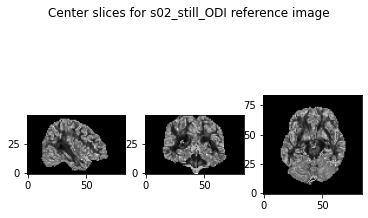

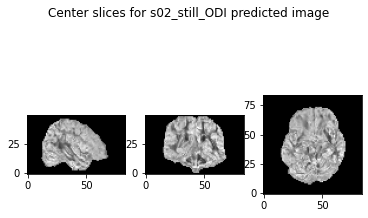

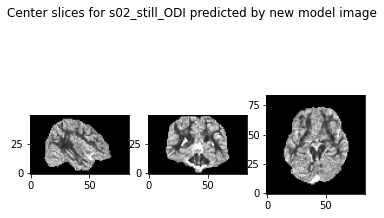

In [196]:
# load the reference img and pred imgs (the one generated from old model and new model)
pred_path = '../Net-DTI/nii/s02_still-ODI-96-first-conv3d-6layer.nii'
pred_ODI_img = nib.load(pred_path)
pred_ODI_img_data = pred_ODI_img.get_fdata()
new_pred_path = '../Net-DTI/nii/s02_still-ODI-96-first-conv3d_new-6layer.nii'
new_pred_ODI_img = nib.load(new_pred_path)
new_pred_ODI_img_data = new_pred_ODI_img.get_fdata()


# evaluate the model
eval_re = evaluate_model(pred_ODI_img_data, s02_ODI_img_data, s02_mask_img_data)
print("evaluation score for old model: " + str(eval_re))
new_eval_re = evaluate_model(new_pred_ODI_img_data, s02_ODI_img_data, s02_mask_img_data)
print("evaluation score for new model: " + str(new_eval_re))

# visualise both ref img and pred img
ref_slice_0 = s02_ODI_img_data[26, :, :]
ref_slice_1 = s02_ODI_img_data[:, 30, :]
ref_slice_2 = s02_ODI_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_ODI reference image")

pred_slice_0 = pred_ODI_img_data[26, :, :]
pred_slice_1 = pred_ODI_img_data[:, 30, :]
pred_slice_2 = pred_ODI_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_ODI predicted image")

new_pred_slice_0 = new_pred_ODI_img_data[26, :, :]
new_pred_slice_1 = new_pred_ODI_img_data[:, 30, :]
new_pred_slice_2 = new_pred_ODI_img_data[:, :, 16]
show_slices([new_pred_slice_0, new_pred_slice_1, new_pred_slice_2])
plt.suptitle("Center slices for s02_still_ODI predicted by new model image")

<strong>Training subject: s01_still<br/>

Test subject: s02_still<br/>

Network; 3D-CNN<br/>

Outcome: FWF<br/>


The training data is stored in datasets/data/s01_still-96-first-3d.mat<br/>

The training label is stored in datasets/label/s01_still-FWF-96-first-3d.mat<br/>

The testing data is stored in datasets/data/s02_still-96-first.mat<br/>

The testing label is stored in datasets/label/s02_still-FWF-96-first.mat</strong>

In [197]:
"""
Generate training dataset FWF for 3D CNN.
Using all of the DWI. 96. as training size.
"""
cmd = "--subjects s01_still --nDWI 96 --conv3d_train --label_type F"
args = data_parser().parse_args(cmd.split())
generate_data(args)

generating data patches
training dataset has shape:(82180, 3, 3, 3, 96)
generating label patches
training label has shape:(82641, 1, 1, 1, 1)


Model: "functional_317"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_159 (InputLayer)       [(None, 3, 3, 3, 96)]     0         
_________________________________________________________________
conv3d_240 (Conv3D)          (None, 1, 1, 1, 150)      388950    
_________________________________________________________________
dropout_158 (Dropout)        (None, 1, 1, 1, 150)      0         
_________________________________________________________________
conv3d_241 (Conv3D)          (None, 1, 1, 1, 1)        151       
Total params: 389,101
Trainable params: 389,101
Non-trainable params: 0
_________________________________________________________________
['F']
Training start ...


2022-03-08 18:32:34.954940: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 18:32:34.955093: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 31/257 [==>...........................] - ETA: 1s - loss: 0.1192 - accuracy: 0.3873

2022-03-08 18:32:36.666362: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 18:32:36.688540: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 18:32:36.688781: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 18:32:36.689820: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_18_32_36
2022-03-08 18:32:36.690284: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_18_32_36/vw.trace.json.gz
2022-03-08 18:32:36.690357: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 18:32:36.691124: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

257/257 [==============================] - 2s 7ms/step - loss: 0.1180 - accuracy: 0.3975 - val_loss: 0.1140 - val_accuracy: 0.4031
Epoch 2/100
257/257 [==============================] - 1s 5ms/step - loss: 0.1179 - accuracy: 0.3974 - val_loss: 0.1141 - val_accuracy: 0.4031
Epoch 3/100
257/257 [==============================] - 1s 5ms/step - loss: 0.1179 - accuracy: 0.3976 - val_loss: 0.1139 - val_accuracy: 0.4032
Epoch 4/100
257/257 [==============================] - 1s 5ms/step - loss: 0.1175 - accuracy: 0.3983 - val_loss: 0.1133 - val_accuracy: 0.4035
Epoch 5/100
257/257 [==============================] - 2s 6ms/step - loss: 0.1171 - accuracy: 0.3993 - val_loss: 0.1132 - val_accuracy: 0.4034
Epoch 6/100
257/257 [==============================] - 2s 6ms/step - loss: 0.1157 - accuracy: 0.4004 - val_loss: 0.1120 - val_accuracy: 0.4037
Epoch 7/100
257/257 [==============================] - 2s 6ms/step - loss: 0.1129 - accuracy: 0.4017 - val_loss: 0.1029 - val_accuracy: 0.4048
Epoch 8/100

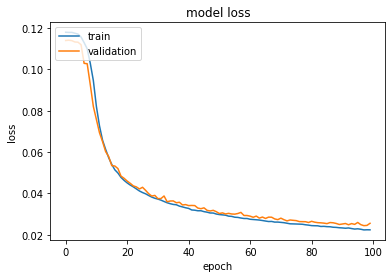

In [198]:
# 1 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv3d --layer 1 --train --label_type F --lr 0.00001"
plot_loss(cmd)

In [199]:
# 1 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv3d --layer 1 --label_type F"
args = model_parser().parse_args(cmd.split())
test_model(args)

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_319"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_160 (InputLayer)       [(None, 84, 84, 50, 96)]  0         
_________________________________________________________________
conv3d_242 (Conv3D)          (None, 84, 84, 50, 150)   388950    
_________________________________________________________________
dropout_159 (Dropout)        (None, 84, 84, 50, 150)   0         
_________________________________________________________________
conv3d_243 (Conv3D)          (None, 84, 84, 50, 1)     151       
Total params: 389,101
Trainable params: 389,101
Non-trainable params: 0
_________________________________________________________________
(1, 84, 84, 50, 1)
(84, 84, 50, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
0.21017187350504565


Model: "functional_321"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_161 (InputLayer)       [(None, 3, 3, 3, 96)]     0         
_________________________________________________________________
conv3d_244 (Conv3D)          (None, 3, 3, 3, 128)      12416     
_________________________________________________________________
conv3d_245 (Conv3D)          (None, 1, 1, 1, 128)      442496    
_________________________________________________________________
dropout_160 (Dropout)        (None, 1, 1, 1, 128)      0         
_________________________________________________________________
conv3d_246 (Conv3D)          (None, 1, 1, 1, 1)        129       
Total params: 455,041
Trainable params: 455,041
Non-trainable params: 0
_________________________________________________________________
['F']
Training start ...


2022-03-08 18:35:03.321456: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 18:35:03.321569: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 19/257 [=>............................] - ETA: 2s - loss: 0.1801 - accuracy: 0.3984

2022-03-08 18:35:05.002175: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 18:35:05.023270: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 18:35:05.023538: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 18:35:05.024582: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_18_35_05
2022-03-08 18:35:05.025077: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_18_35_05/vw.trace.json.gz
2022-03-08 18:35:05.025143: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 18:35:05.025918: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

257/257 [==============================] - 3s 12ms/step - loss: 0.1228 - accuracy: 0.3959 - val_loss: 0.1145 - val_accuracy: 0.4030
Epoch 2/100
257/257 [==============================] - 3s 10ms/step - loss: 0.1179 - accuracy: 0.3974 - val_loss: 0.1145 - val_accuracy: 0.4030
Epoch 3/100
257/257 [==============================] - 3s 10ms/step - loss: 0.1179 - accuracy: 0.3974 - val_loss: 0.1145 - val_accuracy: 0.4030
Epoch 4/100
257/257 [==============================] - 3s 10ms/step - loss: 0.1179 - accuracy: 0.3974 - val_loss: 0.1145 - val_accuracy: 0.4030
Epoch 5/100
257/257 [==============================] - 3s 10ms/step - loss: 0.1179 - accuracy: 0.3974 - val_loss: 0.1145 - val_accuracy: 0.4030
Epoch 6/100
257/257 [==============================] - 3s 10ms/step - loss: 0.1179 - accuracy: 0.3974 - val_loss: 0.1145 - val_accuracy: 0.4030
Epoch 7/100
257/257 [==============================] - 3s 10ms/step - loss: 0.1179 - accuracy: 0.3974 - val_loss: 0.1145 - val_accuracy: 0.4030
Epoc

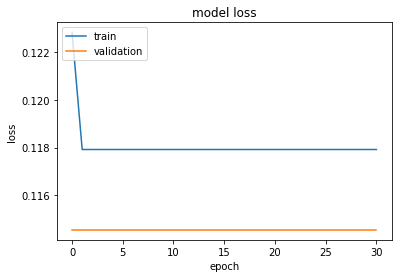

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_323"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_162 (InputLayer)       [(None, 84, 84, 50, 96)]  0         
_________________________________________________________________
conv3d_247 (Conv3D)          (None, 84, 84, 50, 128)   12416     
_________________________________________________________________
conv3d_248 (Conv3D)          (None, 84, 84, 50, 128)   442496    
_________________________________________________________________
dropout_161 (Dropout)        (None, 84, 84, 50, 128)   0         
_________________________________________________________________
conv3d_249 (Conv3D)          (None, 84, 84, 50, 1)     129       
Total params: 455,041
Trainable params: 455,041
Non-trainable params: 0
_________________________________________________________________
(1, 84, 84, 50, 1)
(84, 84, 50, 1)
<class 'numpy.ndarray'>
<class

In [200]:
# train and test the conv3d_new model
cmd = "--train_subjects s01_still --DWI 96 --model conv3d_new --layer 1 --train --label_type F"
plot_loss(cmd)
cmd = "--test_subjects s02_still --DWI 96 --model conv3d_new --layer 1 --label_type F"
args = model_parser().parse_args(cmd.split())
test_model(args)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(0.21017187350504565, -44.460709220904164, 0.5676810719803358)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for new model: (0.3230290507691973, -35.86437686444759, nan)


Text(0.5, 0.98, 'Center slices for s02_still_FWF predicted by new model image')

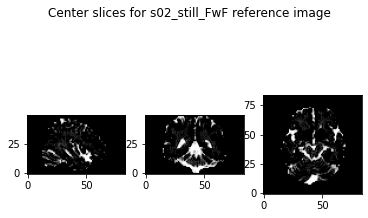

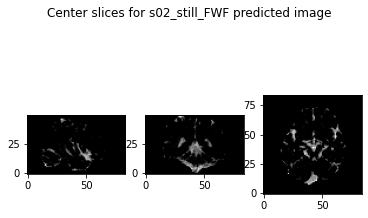

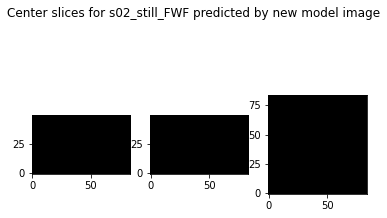

In [201]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-conv3d-1layer.nii'
pred_FWF_img = nib.load(pred_path)
pred_FWF_img_data = pred_FWF_img.get_fdata()
new_pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-conv3d_new-1layer.nii'
new_pred_FWF_img = nib.load(new_pred_path)
new_pred_FWF_img_data = new_pred_FWF_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_FWF_img_data, s02_FWF_img_data, s02_mask_img_data)
print(eval_re)
new_eval_re = evaluate_model(new_pred_FWF_img_data, s02_FWF_img_data, s02_mask_img_data)
print("evaluation score for new model: " + str(new_eval_re))

# visualise both ref img and pred img
ref_slice_0 = s02_FWF_img_data[26, :, :]
ref_slice_1 = s02_FWF_img_data[:, 30, :]
ref_slice_2 = s02_FWF_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_FwF reference image")

pred_slice_0 = pred_FWF_img_data[26, :, :]
pred_slice_1 = pred_FWF_img_data[:, 30, :]
pred_slice_2 = pred_FWF_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_FWF predicted image")

new_pred_slice_0 = new_pred_FWF_img_data[26, :, :]
new_pred_slice_1 = new_pred_FWF_img_data[:, 30, :]
new_pred_slice_2 = new_pred_FWF_img_data[:, :, 16]
show_slices([new_pred_slice_0, new_pred_slice_1, new_pred_slice_2])
plt.suptitle("Center slices for s02_still_FWF predicted by new model image")

Model: "functional_325"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_163 (InputLayer)       [(None, 3, 3, 3, 96)]     0         
_________________________________________________________________
conv3d_250 (Conv3D)          (None, 1, 1, 1, 150)      388950    
_________________________________________________________________
conv3d_251 (Conv3D)          (None, 1, 1, 1, 200)      30200     
_________________________________________________________________
dropout_162 (Dropout)        (None, 1, 1, 1, 200)      0         
_________________________________________________________________
conv3d_252 (Conv3D)          (None, 1, 1, 1, 1)        201       
Total params: 419,351
Trainable params: 419,351
Non-trainable params: 0
_________________________________________________________________
['F']
Training start ...


2022-03-08 18:36:27.107332: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 18:36:27.107490: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 23/257 [=>............................] - ETA: 1s - loss: 0.3108 - accuracy: 0.3363

2022-03-08 18:36:28.842244: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 18:36:28.870033: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 18:36:28.870419: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 18:36:28.871881: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_18_36_28
2022-03-08 18:36:28.872554: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_18_36_28/vw.trace.json.gz
2022-03-08 18:36:28.872657: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 18:36:28.873806: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

257/257 [==============================] - 2s 9ms/step - loss: 0.1349 - accuracy: 0.3940 - val_loss: 0.1097 - val_accuracy: 0.4032
Epoch 2/100
257/257 [==============================] - 2s 7ms/step - loss: 0.1154 - accuracy: 0.3996 - val_loss: 0.1101 - val_accuracy: 0.4032
Epoch 3/100
257/257 [==============================] - 2s 6ms/step - loss: 0.1132 - accuracy: 0.4015 - val_loss: 0.1077 - val_accuracy: 0.4034
Epoch 4/100
257/257 [==============================] - 2s 6ms/step - loss: 0.1093 - accuracy: 0.4038 - val_loss: 0.1059 - val_accuracy: 0.4039
Epoch 5/100
257/257 [==============================] - 2s 6ms/step - loss: 0.1037 - accuracy: 0.4053 - val_loss: 0.0986 - val_accuracy: 0.4046
Epoch 6/100
257/257 [==============================] - 2s 6ms/step - loss: 0.0967 - accuracy: 0.4063 - val_loss: 0.0869 - val_accuracy: 0.4048
Epoch 7/100
257/257 [==============================] - 2s 6ms/step - loss: 0.0895 - accuracy: 0.4070 - val_loss: 0.0812 - val_accuracy: 0.4049
Epoch 8/100

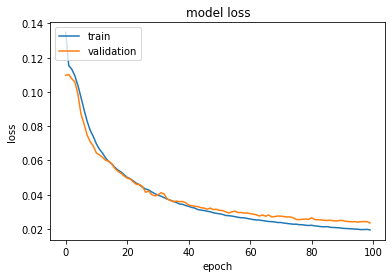

In [202]:
# 2 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv3d --layer 2 --train --label_type F --lr 0.00001"
plot_loss(cmd)

In [203]:
# 2 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv3d --layer 2 --label_type F"
args = model_parser().parse_args(cmd.split())
test_model(args)

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_327"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_164 (InputLayer)       [(None, 84, 84, 50, 96)]  0         
_________________________________________________________________
conv3d_253 (Conv3D)          (None, 84, 84, 50, 150)   388950    
_________________________________________________________________
conv3d_254 (Conv3D)          (None, 84, 84, 50, 200)   30200     
_________________________________________________________________
dropout_163 (Dropout)        (None, 84, 84, 50, 200)   0         
_________________________________________________________________
conv3d_255 (Conv3D)          (None, 84, 84, 50, 1)     201       
Total params: 419,351
Trainable params: 419,351
Non-trainable params: 0
_________________________________________________________________
(1, 84, 84, 50, 1)
(84, 84, 50, 1)
<class 'numpy.ndarray'>
<class

Model: "functional_329"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_165 (InputLayer)       [(None, 3, 3, 3, 96)]     0         
_________________________________________________________________
conv3d_256 (Conv3D)          (None, 3, 3, 3, 128)      12416     
_________________________________________________________________
conv3d_257 (Conv3D)          (None, 1, 1, 1, 128)      442496    
_________________________________________________________________
conv3d_258 (Conv3D)          (None, 1, 1, 1, 256)      33024     
_________________________________________________________________
dropout_164 (Dropout)        (None, 1, 1, 1, 256)      0         
_________________________________________________________________
conv3d_259 (Conv3D)          (None, 1, 1, 1, 1)        257       
Total params: 488,193
Trainable params: 488,193
Non-trainable params: 0
______________________________________________

2022-03-08 18:39:09.296277: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 18:39:09.296410: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 17/257 [>.............................] - ETA: 2s - loss: 0.1184 - accuracy: 0.3987

2022-03-08 18:39:11.101232: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 18:39:11.126175: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 18:39:11.126473: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 18:39:11.127597: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_18_39_11
2022-03-08 18:39:11.128163: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_18_39_11/vw.trace.json.gz
2022-03-08 18:39:11.128234: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 18:39:11.129084: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

257/257 [==============================] - 3s 13ms/step - loss: 0.1180 - accuracy: 0.3973 - val_loss: 0.1145 - val_accuracy: 0.4030
Epoch 2/100
257/257 [==============================] - 3s 11ms/step - loss: 0.1179 - accuracy: 0.3974 - val_loss: 0.1145 - val_accuracy: 0.4030
Epoch 3/100
257/257 [==============================] - 3s 11ms/step - loss: 0.1179 - accuracy: 0.3974 - val_loss: 0.1145 - val_accuracy: 0.4030
Epoch 4/100
257/257 [==============================] - 3s 11ms/step - loss: 0.1179 - accuracy: 0.3974 - val_loss: 0.1145 - val_accuracy: 0.4030
Epoch 5/100
257/257 [==============================] - 3s 11ms/step - loss: 0.1179 - accuracy: 0.3974 - val_loss: 0.1145 - val_accuracy: 0.4030
Epoch 6/100
257/257 [==============================] - 3s 11ms/step - loss: 0.1179 - accuracy: 0.3974 - val_loss: 0.1145 - val_accuracy: 0.4030
Epoch 7/100
257/257 [==============================] - 3s 11ms/step - loss: 0.1179 - accuracy: 0.3974 - val_loss: 0.1145 - val_accuracy: 0.4030
Epoc

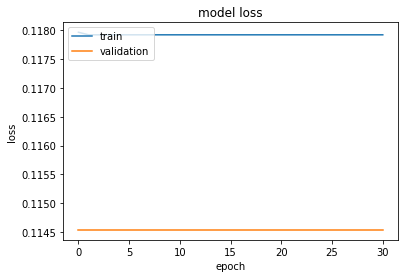

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_331"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_166 (InputLayer)       [(None, 84, 84, 50, 96)]  0         
_________________________________________________________________
conv3d_260 (Conv3D)          (None, 84, 84, 50, 128)   12416     
_________________________________________________________________
conv3d_261 (Conv3D)          (None, 84, 84, 50, 128)   442496    
_________________________________________________________________
conv3d_262 (Conv3D)          (None, 84, 84, 50, 256)   33024     
_________________________________________________________________
dropout_165 (Dropout)        (None, 84, 84, 50, 256)   0         
_________________________________________________________________
conv3d_263 (Conv3D)          (None, 84, 84, 50, 1)     257       
Total params: 488,193
Trainable params: 488,193
Non-trainable params: 0

In [204]:
# train and test the conv3d_new model
cmd = "--train_subjects s01_still --DWI 96 --model conv3d_new --layer 2 --train --label_type F"
plot_loss(cmd)
cmd = "--test_subjects s02_still --DWI 96 --model conv3d_new --layer 2 --label_type F"
args = model_parser().parse_args(cmd.split())
test_model(args)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(0.19713153617171159, -45.741797999656704, 0.7241588749209903)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for new model: (0.3230290507691973, -35.86437686444759, nan)


Text(0.5, 0.98, 'Center slices for s02_still_FWF predicted by new model image')

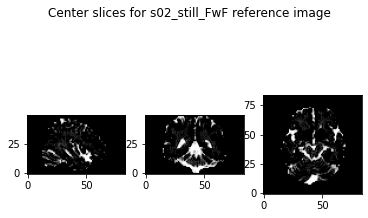

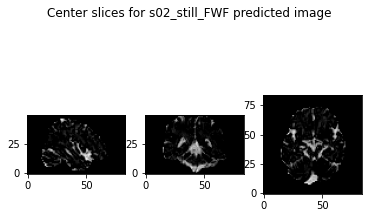

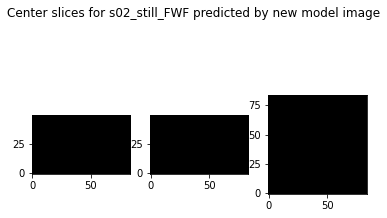

In [205]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-conv3d-2layer.nii'
pred_FWF_img = nib.load(pred_path)
pred_FWF_img_data = pred_FWF_img.get_fdata()
new_pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-conv3d_new-2layer.nii'
new_pred_FWF_img = nib.load(new_pred_path)
new_pred_FWF_img_data = new_pred_FWF_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_FWF_img_data, s02_FWF_img_data, s02_mask_img_data)
print(eval_re)
new_eval_re = evaluate_model(new_pred_FWF_img_data, s02_FWF_img_data, s02_mask_img_data)
print("evaluation score for new model: " + str(new_eval_re))

# visualise both ref img and pred img
ref_slice_0 = s02_FWF_img_data[26, :, :]
ref_slice_1 = s02_FWF_img_data[:, 30, :]
ref_slice_2 = s02_FWF_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_FwF reference image")

pred_slice_0 = pred_FWF_img_data[26, :, :]
pred_slice_1 = pred_FWF_img_data[:, 30, :]
pred_slice_2 = pred_FWF_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_FWF predicted image")

new_pred_slice_0 = new_pred_FWF_img_data[26, :, :]
new_pred_slice_1 = new_pred_FWF_img_data[:, 30, :]
new_pred_slice_2 = new_pred_FWF_img_data[:, :, 16]
show_slices([new_pred_slice_0, new_pred_slice_1, new_pred_slice_2])
plt.suptitle("Center slices for s02_still_FWF predicted by new model image")

Model: "functional_333"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_167 (InputLayer)       [(None, 3, 3, 3, 96)]     0         
_________________________________________________________________
conv3d_264 (Conv3D)          (None, 1, 1, 1, 150)      388950    
_________________________________________________________________
conv3d_265 (Conv3D)          (None, 1, 1, 1, 200)      30200     
_________________________________________________________________
conv3d_266 (Conv3D)          (None, 1, 1, 1, 200)      40200     
_________________________________________________________________
dropout_166 (Dropout)        (None, 1, 1, 1, 200)      0         
_________________________________________________________________
conv3d_267 (Conv3D)          (None, 1, 1, 1, 1)        201       
Total params: 459,551
Trainable params: 459,551
Non-trainable params: 0
______________________________________________

2022-03-08 18:40:38.421817: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 18:40:38.421976: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 22/257 [=>............................] - ETA: 1s - loss: 0.1203 - accuracy: 0.4013

2022-03-08 18:40:40.211230: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 18:40:40.248428: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 18:40:40.248717: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 18:40:40.249842: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_18_40_40
2022-03-08 18:40:40.250376: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_18_40_40/vw.trace.json.gz
2022-03-08 18:40:40.250447: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 18:40:40.251298: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

257/257 [==============================] - 2s 9ms/step - loss: 0.1179 - accuracy: 0.3973 - val_loss: 0.1145 - val_accuracy: 0.4030
Epoch 2/100
257/257 [==============================] - 2s 7ms/step - loss: 0.1179 - accuracy: 0.3974 - val_loss: 0.1145 - val_accuracy: 0.4030
Epoch 3/100
257/257 [==============================] - 2s 7ms/step - loss: 0.1179 - accuracy: 0.3974 - val_loss: 0.1145 - val_accuracy: 0.4030
Epoch 4/100
257/257 [==============================] - 2s 7ms/step - loss: 0.1179 - accuracy: 0.3974 - val_loss: 0.1145 - val_accuracy: 0.4030
Epoch 5/100
257/257 [==============================] - 2s 7ms/step - loss: 0.1179 - accuracy: 0.3974 - val_loss: 0.1145 - val_accuracy: 0.4030
Epoch 6/100
257/257 [==============================] - 2s 7ms/step - loss: 0.1179 - accuracy: 0.3974 - val_loss: 0.1145 - val_accuracy: 0.4030
Epoch 7/100
257/257 [==============================] - 2s 7ms/step - loss: 0.1179 - accuracy: 0.3974 - val_loss: 0.1145 - val_accuracy: 0.4030
Epoch 8/100

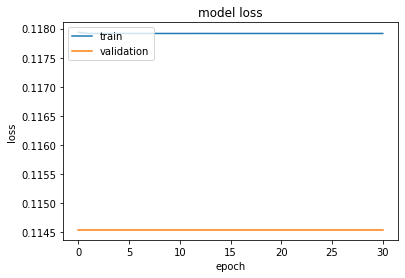

In [206]:
# 3 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv3d --layer 3 --train --label_type F"
plot_loss(cmd)

In [207]:
# 3 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv3d --layer 3 --label_type F"
args = model_parser().parse_args(cmd.split())
test_model(args)

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_335"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_168 (InputLayer)       [(None, 84, 84, 50, 96)]  0         
_________________________________________________________________
conv3d_268 (Conv3D)          (None, 84, 84, 50, 150)   388950    
_________________________________________________________________
conv3d_269 (Conv3D)          (None, 84, 84, 50, 200)   30200     
_________________________________________________________________
conv3d_270 (Conv3D)          (None, 84, 84, 50, 200)   40200     
_________________________________________________________________
dropout_167 (Dropout)        (None, 84, 84, 50, 200)   0         
_________________________________________________________________
conv3d_271 (Conv3D)          (None, 84, 84, 50, 1)     201       
Total params: 459,551
Trainable params: 459,551
Non-trainable params: 0

Model: "functional_337"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_169 (InputLayer)       [(None, 3, 3, 3, 96)]     0         
_________________________________________________________________
conv3d_272 (Conv3D)          (None, 3, 3, 3, 128)      12416     
_________________________________________________________________
conv3d_273 (Conv3D)          (None, 1, 1, 1, 128)      442496    
_________________________________________________________________
conv3d_274 (Conv3D)          (None, 1, 1, 1, 256)      33024     
_________________________________________________________________
conv3d_275 (Conv3D)          (None, 1, 1, 1, 256)      65792     
_________________________________________________________________
dropout_168 (Dropout)        (None, 1, 1, 1, 256)      0         
_________________________________________________________________
conv3d_276 (Conv3D)          (None, 1, 1, 1, 1)     

2022-03-08 18:41:38.259693: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 18:41:38.259811: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 14/257 [>.............................] - ETA: 2s - loss: 0.1148 - accuracy: 0.4068

2022-03-08 18:41:40.596455: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 18:41:40.640488: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 18:41:40.641361: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 18:41:40.642882: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_18_41_40
2022-03-08 18:41:40.643489: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_18_41_40/vw.trace.json.gz
2022-03-08 18:41:40.643602: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 18:41:40.644717: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

257/257 [==============================] - 4s 14ms/step - loss: 0.1179 - accuracy: 0.3974 - val_loss: 0.1145 - val_accuracy: 0.4030
Epoch 2/100
257/257 [==============================] - 3s 12ms/step - loss: 0.1179 - accuracy: 0.3974 - val_loss: 0.1145 - val_accuracy: 0.4030
Epoch 3/100
257/257 [==============================] - 3s 12ms/step - loss: 0.1179 - accuracy: 0.3974 - val_loss: 0.1145 - val_accuracy: 0.4030
Epoch 4/100
257/257 [==============================] - 3s 12ms/step - loss: 0.1179 - accuracy: 0.3974 - val_loss: 0.1145 - val_accuracy: 0.4030
Epoch 5/100
257/257 [==============================] - 3s 11ms/step - loss: 0.1179 - accuracy: 0.3974 - val_loss: 0.1145 - val_accuracy: 0.4030
Epoch 6/100
257/257 [==============================] - 3s 12ms/step - loss: 0.1179 - accuracy: 0.3974 - val_loss: 0.1145 - val_accuracy: 0.4030
Epoch 7/100
257/257 [==============================] - 3s 11ms/step - loss: 0.1179 - accuracy: 0.3974 - val_loss: 0.1145 - val_accuracy: 0.4030
Epoc

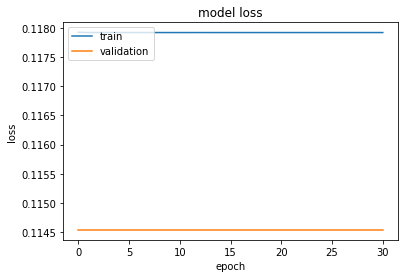

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_339"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_170 (InputLayer)       [(None, 84, 84, 50, 96)]  0         
_________________________________________________________________
conv3d_277 (Conv3D)          (None, 84, 84, 50, 128)   12416     
_________________________________________________________________
conv3d_278 (Conv3D)          (None, 84, 84, 50, 128)   442496    
_________________________________________________________________
conv3d_279 (Conv3D)          (None, 84, 84, 50, 256)   33024     
_________________________________________________________________
conv3d_280 (Conv3D)          (None, 84, 84, 50, 256)   65792     
_________________________________________________________________
dropout_169 (Dropout)        (None, 84, 84, 50, 256)   0         
_________________________________________________________________
conv3

In [208]:
# train and test the conv3d_new model
cmd = "--train_subjects s01_still --DWI 96 --model conv3d_new --layer 3 --train --label_type F"
plot_loss(cmd)
cmd = "--test_subjects s02_still --DWI 96 --model conv3d_new --layer 3 --label_type F"
args = model_parser().parse_args(cmd.split())
test_model(args)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(0.3230290507691973, -35.86437686444759, nan)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for new model: (0.3230290507691973, -35.86437686444759, nan)


Text(0.5, 0.98, 'Center slices for s02_still_FWF predicted by new model image')

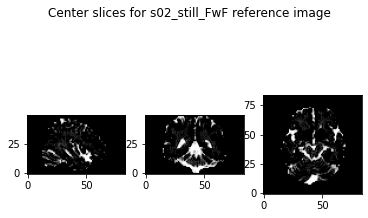

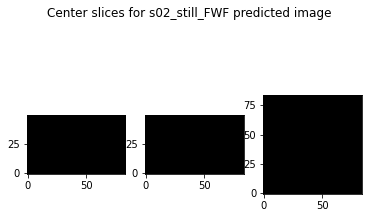

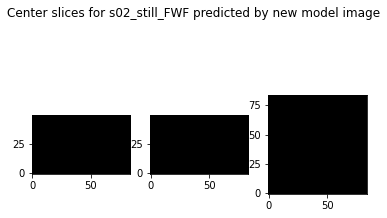

In [209]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-conv3d-3layer.nii'
pred_FWF_img = nib.load(pred_path)
pred_FWF_img_data = pred_FWF_img.get_fdata()
new_pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-conv3d_new-3layer.nii'
new_pred_FWF_img = nib.load(new_pred_path)
new_pred_FWF_img_data = new_pred_FWF_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_FWF_img_data, s02_FWF_img_data, s02_mask_img_data)
print(eval_re)
new_eval_re = evaluate_model(new_pred_FWF_img_data, s02_FWF_img_data, s02_mask_img_data)
print("evaluation score for new model: " + str(new_eval_re))

# visualise both ref img and pred img
ref_slice_0 = s02_FWF_img_data[26, :, :]
ref_slice_1 = s02_FWF_img_data[:, 30, :]
ref_slice_2 = s02_FWF_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_FwF reference image")

pred_slice_0 = pred_FWF_img_data[26, :, :]
pred_slice_1 = pred_FWF_img_data[:, 30, :]
pred_slice_2 = pred_FWF_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_FWF predicted image")

new_pred_slice_0 = new_pred_FWF_img_data[26, :, :]
new_pred_slice_1 = new_pred_FWF_img_data[:, 30, :]
new_pred_slice_2 = new_pred_FWF_img_data[:, :, 16]
show_slices([new_pred_slice_0, new_pred_slice_1, new_pred_slice_2])
plt.suptitle("Center slices for s02_still_FWF predicted by new model image")

Model: "functional_341"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_171 (InputLayer)       [(None, 3, 3, 3, 96)]     0         
_________________________________________________________________
conv3d_282 (Conv3D)          (None, 1, 1, 1, 150)      388950    
_________________________________________________________________
conv3d_283 (Conv3D)          (None, 1, 1, 1, 200)      30200     
_________________________________________________________________
conv3d_284 (Conv3D)          (None, 1, 1, 1, 200)      40200     
_________________________________________________________________
conv3d_285 (Conv3D)          (None, 1, 1, 1, 200)      40200     
_________________________________________________________________
dropout_170 (Dropout)        (None, 1, 1, 1, 200)      0         
_________________________________________________________________
conv3d_286 (Conv3D)          (None, 1, 1, 1, 1)     

2022-03-08 18:43:16.315233: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 18:43:16.315374: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 22/257 [=>............................] - ETA: 1s - loss: 0.1187 - accuracy: 0.4078

2022-03-08 18:43:18.197156: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 18:43:18.233616: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 18:43:18.233970: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 18:43:18.235272: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_18_43_18
2022-03-08 18:43:18.235841: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_18_43_18/vw.trace.json.gz
2022-03-08 18:43:18.235958: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 18:43:18.236924: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

257/257 [==============================] - 2s 9ms/step - loss: 0.1179 - accuracy: 0.3974 - val_loss: 0.1145 - val_accuracy: 0.4030
Epoch 2/100
257/257 [==============================] - 2s 8ms/step - loss: 0.1179 - accuracy: 0.3974 - val_loss: 0.1145 - val_accuracy: 0.4030
Epoch 3/100
257/257 [==============================] - 2s 7ms/step - loss: 0.1179 - accuracy: 0.3974 - val_loss: 0.1145 - val_accuracy: 0.4030
Epoch 4/100
257/257 [==============================] - 2s 7ms/step - loss: 0.1179 - accuracy: 0.3974 - val_loss: 0.1145 - val_accuracy: 0.4030
Epoch 5/100
257/257 [==============================] - 2s 8ms/step - loss: 0.1179 - accuracy: 0.3974 - val_loss: 0.1145 - val_accuracy: 0.4030
Epoch 6/100
257/257 [==============================] - 2s 7ms/step - loss: 0.1179 - accuracy: 0.3974 - val_loss: 0.1145 - val_accuracy: 0.4030
Epoch 7/100
257/257 [==============================] - 2s 8ms/step - loss: 0.1179 - accuracy: 0.3974 - val_loss: 0.1145 - val_accuracy: 0.4030
Epoch 8/100

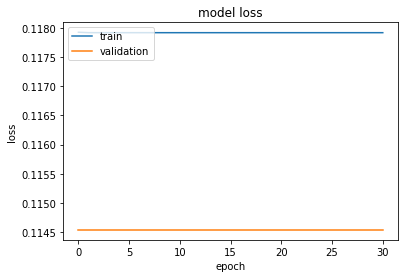

In [210]:
# 4 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv3d --layer 4 --train --label_type F"
plot_loss(cmd)

In [211]:
# 4 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv3d --layer 4 --label_type F"
args = model_parser().parse_args(cmd.split())
test_model(args)

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_343"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_172 (InputLayer)       [(None, 84, 84, 50, 96)]  0         
_________________________________________________________________
conv3d_287 (Conv3D)          (None, 84, 84, 50, 150)   388950    
_________________________________________________________________
conv3d_288 (Conv3D)          (None, 84, 84, 50, 200)   30200     
_________________________________________________________________
conv3d_289 (Conv3D)          (None, 84, 84, 50, 200)   40200     
_________________________________________________________________
conv3d_290 (Conv3D)          (None, 84, 84, 50, 200)   40200     
_________________________________________________________________
dropout_171 (Dropout)        (None, 84, 84, 50, 200)   0         
_________________________________________________________________
conv3

Model: "functional_345"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_173 (InputLayer)       [(None, 3, 3, 3, 96)]     0         
_________________________________________________________________
conv3d_292 (Conv3D)          (None, 3, 3, 3, 128)      12416     
_________________________________________________________________
conv3d_293 (Conv3D)          (None, 1, 1, 1, 128)      442496    
_________________________________________________________________
conv3d_294 (Conv3D)          (None, 1, 1, 1, 256)      33024     
_________________________________________________________________
conv3d_295 (Conv3D)          (None, 1, 1, 1, 256)      65792     
_________________________________________________________________
conv3d_296 (Conv3D)          (None, 1, 1, 1, 256)      65792     
_________________________________________________________________
dropout_172 (Dropout)        (None, 1, 1, 1, 256)   

2022-03-08 18:44:20.351914: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 18:44:20.352047: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 16/257 [>.............................] - ETA: 2s - loss: 0.1244 - accuracy: 0.4023

2022-03-08 18:44:22.206290: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 18:44:22.240820: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 18:44:22.241183: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 18:44:22.242577: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_18_44_22
2022-03-08 18:44:22.243228: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_18_44_22/vw.trace.json.gz
2022-03-08 18:44:22.243327: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 18:44:22.244371: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

257/257 [==============================] - 4s 14ms/step - loss: 0.0727 - accuracy: 0.4088 - val_loss: 0.0463 - val_accuracy: 0.4059
Epoch 2/100
257/257 [==============================] - 3s 12ms/step - loss: 0.0441 - accuracy: 0.4112 - val_loss: 0.0339 - val_accuracy: 0.4060
Epoch 3/100
257/257 [==============================] - 3s 12ms/step - loss: 0.0348 - accuracy: 0.4112 - val_loss: 0.0278 - val_accuracy: 0.4061
Epoch 4/100
257/257 [==============================] - 3s 13ms/step - loss: 0.0296 - accuracy: 0.4112 - val_loss: 0.0252 - val_accuracy: 0.4061
Epoch 5/100
257/257 [==============================] - 3s 12ms/step - loss: 0.0260 - accuracy: 0.4112 - val_loss: 0.0228 - val_accuracy: 0.4061
Epoch 6/100
257/257 [==============================] - 3s 12ms/step - loss: 0.0238 - accuracy: 0.4112 - val_loss: 0.0242 - val_accuracy: 0.4061
Epoch 7/100
257/257 [==============================] - 3s 12ms/step - loss: 0.0220 - accuracy: 0.4112 - val_loss: 0.0191 - val_accuracy: 0.4061
Epoc

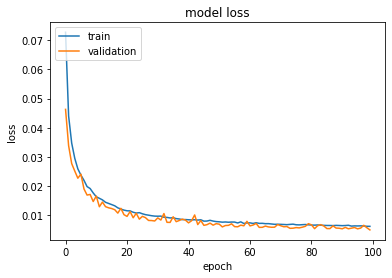

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_347"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_174 (InputLayer)       [(None, 84, 84, 50, 96)]  0         
_________________________________________________________________
conv3d_298 (Conv3D)          (None, 84, 84, 50, 128)   12416     
_________________________________________________________________
conv3d_299 (Conv3D)          (None, 84, 84, 50, 128)   442496    
_________________________________________________________________
conv3d_300 (Conv3D)          (None, 84, 84, 50, 256)   33024     
_________________________________________________________________
conv3d_301 (Conv3D)          (None, 84, 84, 50, 256)   65792     
_________________________________________________________________
conv3d_302 (Conv3D)          (None, 84, 84, 50, 256)   65792     
_________________________________________________________________
dropo

In [212]:
# train and test the conv3d_new model
cmd = "--train_subjects s01_still --DWI 96 --model conv3d_new --layer 4 --train --label_type F"
plot_loss(cmd)
cmd = "--test_subjects s02_still --DWI 96 --model conv3d_new --layer 4 --label_type F"
args = model_parser().parse_args(cmd.split())
test_model(args)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(0.3230290507691973, -35.86437686444759, nan)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for new model: (0.21013973862579807, -44.463767416618765, 0.7726821187933275)


Text(0.5, 0.98, 'Center slices for s02_still_FWF predicted by new model image')

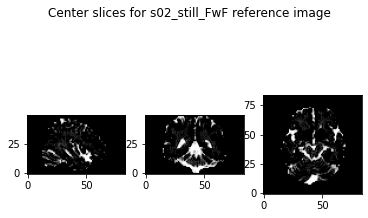

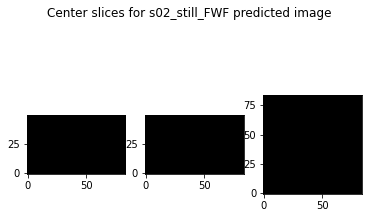

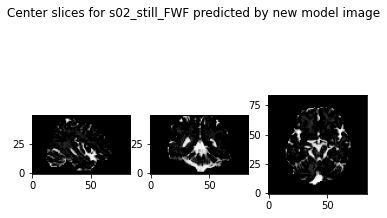

In [213]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-conv3d-4layer.nii'
pred_FWF_img = nib.load(pred_path)
pred_FWF_img_data = pred_FWF_img.get_fdata()
new_pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-conv3d_new-4layer.nii'
new_pred_FWF_img = nib.load(new_pred_path)
new_pred_FWF_img_data = new_pred_FWF_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_FWF_img_data, s02_FWF_img_data, s02_mask_img_data)
print(eval_re)
new_eval_re = evaluate_model(new_pred_FWF_img_data, s02_FWF_img_data, s02_mask_img_data)
print("evaluation score for new model: " + str(new_eval_re))

# visualise both ref img and pred img
ref_slice_0 = s02_FWF_img_data[26, :, :]
ref_slice_1 = s02_FWF_img_data[:, 30, :]
ref_slice_2 = s02_FWF_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_FwF reference image")

pred_slice_0 = pred_FWF_img_data[26, :, :]
pred_slice_1 = pred_FWF_img_data[:, 30, :]
pred_slice_2 = pred_FWF_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_FWF predicted image")

new_pred_slice_0 = new_pred_FWF_img_data[26, :, :]
new_pred_slice_1 = new_pred_FWF_img_data[:, 30, :]
new_pred_slice_2 = new_pred_FWF_img_data[:, :, 16]
show_slices([new_pred_slice_0, new_pred_slice_1, new_pred_slice_2])
plt.suptitle("Center slices for s02_still_FWF predicted by new model image")

Model: "functional_349"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_175 (InputLayer)       [(None, 3, 3, 3, 96)]     0         
_________________________________________________________________
conv3d_304 (Conv3D)          (None, 1, 1, 1, 150)      388950    
_________________________________________________________________
conv3d_305 (Conv3D)          (None, 1, 1, 1, 200)      30200     
_________________________________________________________________
conv3d_306 (Conv3D)          (None, 1, 1, 1, 200)      40200     
_________________________________________________________________
conv3d_307 (Conv3D)          (None, 1, 1, 1, 200)      40200     
_________________________________________________________________
conv3d_308 (Conv3D)          (None, 1, 1, 1, 200)      40200     
_________________________________________________________________
dropout_174 (Dropout)        (None, 1, 1, 1, 200)   

2022-03-08 18:49:33.056641: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 18:49:33.056796: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 21/257 [=>............................] - ETA: 1s - loss: 0.1215 - accuracy: 0.4010

2022-03-08 18:49:34.974636: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 18:49:35.005617: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 18:49:35.005930: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 18:49:35.007188: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_18_49_35
2022-03-08 18:49:35.007804: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_18_49_35/vw.trace.json.gz
2022-03-08 18:49:35.007894: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 18:49:35.008870: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

257/257 [==============================] - 3s 11ms/step - loss: 0.0767 - accuracy: 0.4077 - val_loss: 0.0481 - val_accuracy: 0.4059
Epoch 2/100
257/257 [==============================] - 2s 9ms/step - loss: 0.0476 - accuracy: 0.4111 - val_loss: 0.0373 - val_accuracy: 0.4060
Epoch 3/100
257/257 [==============================] - 2s 8ms/step - loss: 0.0376 - accuracy: 0.4112 - val_loss: 0.0376 - val_accuracy: 0.4060
Epoch 4/100
257/257 [==============================] - 2s 8ms/step - loss: 0.0329 - accuracy: 0.4112 - val_loss: 0.0316 - val_accuracy: 0.4059
Epoch 5/100
257/257 [==============================] - 2s 8ms/step - loss: 0.0291 - accuracy: 0.4112 - val_loss: 0.0262 - val_accuracy: 0.4060
Epoch 6/100
257/257 [==============================] - 2s 8ms/step - loss: 0.0283 - accuracy: 0.4112 - val_loss: 0.0256 - val_accuracy: 0.4060
Epoch 7/100
257/257 [==============================] - 2s 9ms/step - loss: 0.0258 - accuracy: 0.4112 - val_loss: 0.0239 - val_accuracy: 0.4059
Epoch 8/10

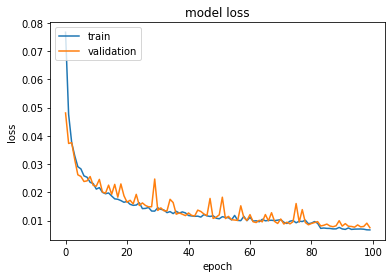

In [214]:
# 5 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv3d --layer 5 --train --label_type F"
plot_loss(cmd)

In [215]:
# 5 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv3d --layer 5 --label_type F"
args = model_parser().parse_args(cmd.split())
test_model(args)

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_351"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_176 (InputLayer)       [(None, 84, 84, 50, 96)]  0         
_________________________________________________________________
conv3d_310 (Conv3D)          (None, 84, 84, 50, 150)   388950    
_________________________________________________________________
conv3d_311 (Conv3D)          (None, 84, 84, 50, 200)   30200     
_________________________________________________________________
conv3d_312 (Conv3D)          (None, 84, 84, 50, 200)   40200     
_________________________________________________________________
conv3d_313 (Conv3D)          (None, 84, 84, 50, 200)   40200     
_________________________________________________________________
conv3d_314 (Conv3D)          (None, 84, 84, 50, 200)   40200     
_________________________________________________________________
dropo

Model: "functional_353"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_177 (InputLayer)       [(None, 3, 3, 3, 96)]     0         
_________________________________________________________________
conv3d_316 (Conv3D)          (None, 3, 3, 3, 128)      12416     
_________________________________________________________________
conv3d_317 (Conv3D)          (None, 1, 1, 1, 128)      442496    
_________________________________________________________________
conv3d_318 (Conv3D)          (None, 1, 1, 1, 256)      33024     
_________________________________________________________________
conv3d_319 (Conv3D)          (None, 1, 1, 1, 256)      65792     
_________________________________________________________________
conv3d_320 (Conv3D)          (None, 1, 1, 1, 256)      65792     
_________________________________________________________________
conv3d_321 (Conv3D)          (None, 1, 1, 1, 256)   

2022-03-08 18:53:09.614978: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 18:53:09.615126: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 14/257 [>.............................] - ETA: 2s - loss: 0.1845 - accuracy: 0.3463

2022-03-08 18:53:11.452759: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 18:53:11.485664: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 18:53:11.486006: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 18:53:11.487309: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_18_53_11
2022-03-08 18:53:11.487974: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_18_53_11/vw.trace.json.gz
2022-03-08 18:53:11.488063: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 18:53:11.489032: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

257/257 [==============================] - 4s 15ms/step - loss: 0.0718 - accuracy: 0.4074 - val_loss: 0.0434 - val_accuracy: 0.4059
Epoch 2/100
257/257 [==============================] - 3s 13ms/step - loss: 0.0404 - accuracy: 0.4112 - val_loss: 0.0287 - val_accuracy: 0.4060
Epoch 3/100
257/257 [==============================] - 3s 13ms/step - loss: 0.0310 - accuracy: 0.4112 - val_loss: 0.0260 - val_accuracy: 0.4061
Epoch 4/100
257/257 [==============================] - 3s 13ms/step - loss: 0.0281 - accuracy: 0.4112 - val_loss: 0.0230 - val_accuracy: 0.4061
Epoch 5/100
257/257 [==============================] - 3s 13ms/step - loss: 0.0241 - accuracy: 0.4112 - val_loss: 0.0215 - val_accuracy: 0.4060
Epoch 6/100
257/257 [==============================] - 3s 13ms/step - loss: 0.0223 - accuracy: 0.4112 - val_loss: 0.0206 - val_accuracy: 0.4061
Epoch 7/100
257/257 [==============================] - 3s 13ms/step - loss: 0.0212 - accuracy: 0.4112 - val_loss: 0.0185 - val_accuracy: 0.4061
Epoc

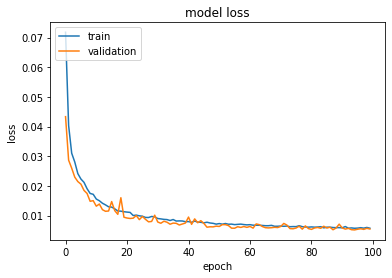

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_355"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_178 (InputLayer)       [(None, 84, 84, 50, 96)]  0         
_________________________________________________________________
conv3d_323 (Conv3D)          (None, 84, 84, 50, 128)   12416     
_________________________________________________________________
conv3d_324 (Conv3D)          (None, 84, 84, 50, 128)   442496    
_________________________________________________________________
conv3d_325 (Conv3D)          (None, 84, 84, 50, 256)   33024     
_________________________________________________________________
conv3d_326 (Conv3D)          (None, 84, 84, 50, 256)   65792     
_________________________________________________________________
conv3d_327 (Conv3D)          (None, 84, 84, 50, 256)   65792     
_________________________________________________________________
conv3

In [216]:
# train and test the conv3d_new model
cmd = "--train_subjects s01_still --DWI 96 --model conv3d_new --layer 5 --train --label_type F"
plot_loss(cmd)
cmd = "--test_subjects s02_still --DWI 96 --model conv3d_new --layer 5 --label_type F"
args = model_parser().parse_args(cmd.split())
test_model(args)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(0.198944665667383, -45.55868756276246, 0.7717427798200887)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for new model: (0.21228142973308894, -44.260964184528255, 0.7607889697393132)


Text(0.5, 0.98, 'Center slices for s02_still_FWF predicted by new model image')

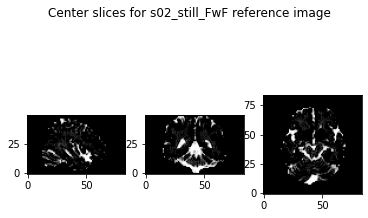

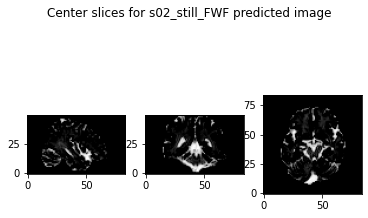

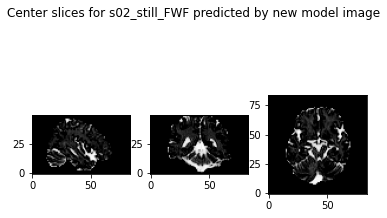

In [217]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-conv3d-5layer.nii'
pred_FWF_img = nib.load(pred_path)
pred_FWF_img_data = pred_FWF_img.get_fdata()
new_pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-conv3d_new-5layer.nii'
new_pred_FWF_img = nib.load(new_pred_path)
new_pred_FWF_img_data = new_pred_FWF_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_FWF_img_data, s02_FWF_img_data, s02_mask_img_data)
print(eval_re)
new_eval_re = evaluate_model(new_pred_FWF_img_data, s02_FWF_img_data, s02_mask_img_data)
print("evaluation score for new model: " + str(new_eval_re))

# visualise both ref img and pred img
ref_slice_0 = s02_FWF_img_data[26, :, :]
ref_slice_1 = s02_FWF_img_data[:, 30, :]
ref_slice_2 = s02_FWF_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_FwF reference image")

pred_slice_0 = pred_FWF_img_data[26, :, :]
pred_slice_1 = pred_FWF_img_data[:, 30, :]
pred_slice_2 = pred_FWF_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_FWF predicted image")

new_pred_slice_0 = new_pred_FWF_img_data[26, :, :]
new_pred_slice_1 = new_pred_FWF_img_data[:, 30, :]
new_pred_slice_2 = new_pred_FWF_img_data[:, :, 16]
show_slices([new_pred_slice_0, new_pred_slice_1, new_pred_slice_2])
plt.suptitle("Center slices for s02_still_FWF predicted by new model image")

Model: "functional_357"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_179 (InputLayer)       [(None, 3, 3, 3, 96)]     0         
_________________________________________________________________
conv3d_330 (Conv3D)          (None, 1, 1, 1, 150)      388950    
_________________________________________________________________
conv3d_331 (Conv3D)          (None, 1, 1, 1, 200)      30200     
_________________________________________________________________
conv3d_332 (Conv3D)          (None, 1, 1, 1, 200)      40200     
_________________________________________________________________
conv3d_333 (Conv3D)          (None, 1, 1, 1, 200)      40200     
_________________________________________________________________
conv3d_334 (Conv3D)          (None, 1, 1, 1, 200)      40200     
_________________________________________________________________
conv3d_335 (Conv3D)          (None, 1, 1, 1, 200)   

2022-03-08 18:58:40.802807: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 18:58:40.802887: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 21/257 [=>............................] - ETA: 1s - loss: 0.1193 - accuracy: 0.3845

2022-03-08 18:58:42.629895: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 18:58:42.659600: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 18:58:42.659935: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 18:58:42.661163: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_18_58_42
2022-03-08 18:58:42.661813: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_18_58_42/vw.trace.json.gz
2022-03-08 18:58:42.661897: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 18:58:42.662819: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

257/257 [==============================] - 3s 10ms/step - loss: 0.0677 - accuracy: 0.4092 - val_loss: 0.0569 - val_accuracy: 0.4056
Epoch 2/100
257/257 [==============================] - 2s 9ms/step - loss: 0.0443 - accuracy: 0.4111 - val_loss: 0.0372 - val_accuracy: 0.4061
Epoch 3/100
257/257 [==============================] - 2s 9ms/step - loss: 0.0369 - accuracy: 0.4112 - val_loss: 0.0352 - val_accuracy: 0.4061
Epoch 4/100
257/257 [==============================] - 2s 9ms/step - loss: 0.0316 - accuracy: 0.4112 - val_loss: 0.0276 - val_accuracy: 0.4059
Epoch 5/100
257/257 [==============================] - 2s 9ms/step - loss: 0.0293 - accuracy: 0.4112 - val_loss: 0.0272 - val_accuracy: 0.4059
Epoch 6/100
257/257 [==============================] - 2s 8ms/step - loss: 0.0282 - accuracy: 0.4112 - val_loss: 0.0261 - val_accuracy: 0.4060
Epoch 7/100
257/257 [==============================] - 2s 9ms/step - loss: 0.0261 - accuracy: 0.4112 - val_loss: 0.0230 - val_accuracy: 0.4061
Epoch 8/10

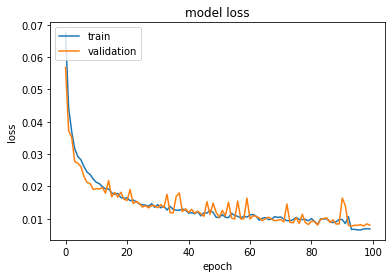

In [218]:
# 6 layer training
cmd = "--train_subjects s01_still --DWI 96 --model conv3d --layer 6 --train --label_type F"
plot_loss(cmd)

In [219]:
# 6 layer testing
cmd = "--test_subjects s02_still --DWI 96 --model conv3d --layer 6 --label_type F"
args = model_parser().parse_args(cmd.split())
test_model(args)

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_359"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_180 (InputLayer)       [(None, 84, 84, 50, 96)]  0         
_________________________________________________________________
conv3d_337 (Conv3D)          (None, 84, 84, 50, 150)   388950    
_________________________________________________________________
conv3d_338 (Conv3D)          (None, 84, 84, 50, 200)   30200     
_________________________________________________________________
conv3d_339 (Conv3D)          (None, 84, 84, 50, 200)   40200     
_________________________________________________________________
conv3d_340 (Conv3D)          (None, 84, 84, 50, 200)   40200     
_________________________________________________________________
conv3d_341 (Conv3D)          (None, 84, 84, 50, 200)   40200     
_________________________________________________________________
conv3

Model: "functional_361"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_181 (InputLayer)       [(None, 3, 3, 3, 96)]     0         
_________________________________________________________________
conv3d_344 (Conv3D)          (None, 3, 3, 3, 128)      12416     
_________________________________________________________________
conv3d_345 (Conv3D)          (None, 1, 1, 1, 128)      442496    
_________________________________________________________________
conv3d_346 (Conv3D)          (None, 1, 1, 1, 256)      33024     
_________________________________________________________________
conv3d_347 (Conv3D)          (None, 1, 1, 1, 256)      65792     
_________________________________________________________________
conv3d_348 (Conv3D)          (None, 1, 1, 1, 256)      65792     
_________________________________________________________________
conv3d_349 (Conv3D)          (None, 1, 1, 1, 256)   

2022-03-08 19:02:20.556946: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 19:02:20.557024: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 14/257 [>.............................] - ETA: 2s - loss: 0.1101 - accuracy: 0.4143

2022-03-08 19:02:22.405392: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 19:02:22.439931: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 19:02:22.440286: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 19:02:22.441613: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_19_02_22
2022-03-08 19:02:22.442332: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_19_02_22/vw.trace.json.gz
2022-03-08 19:02:22.442422: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 19:02:22.443414: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

257/257 [==============================] - 4s 16ms/step - loss: 0.1179 - accuracy: 0.3974 - val_loss: 0.1145 - val_accuracy: 0.4030
Epoch 2/100
257/257 [==============================] - 4s 14ms/step - loss: 0.1179 - accuracy: 0.3974 - val_loss: 0.1145 - val_accuracy: 0.4030
Epoch 3/100
257/257 [==============================] - 3s 14ms/step - loss: 0.1179 - accuracy: 0.3974 - val_loss: 0.1145 - val_accuracy: 0.4030
Epoch 4/100
257/257 [==============================] - 4s 14ms/step - loss: 0.1179 - accuracy: 0.3974 - val_loss: 0.1145 - val_accuracy: 0.4030
Epoch 5/100
257/257 [==============================] - 4s 14ms/step - loss: 0.1179 - accuracy: 0.3974 - val_loss: 0.1145 - val_accuracy: 0.4030
Epoch 6/100
257/257 [==============================] - 3s 14ms/step - loss: 0.1179 - accuracy: 0.3974 - val_loss: 0.1145 - val_accuracy: 0.4030
Epoch 7/100
257/257 [==============================] - 4s 14ms/step - loss: 0.1179 - accuracy: 0.3974 - val_loss: 0.1145 - val_accuracy: 0.4030
Epoc

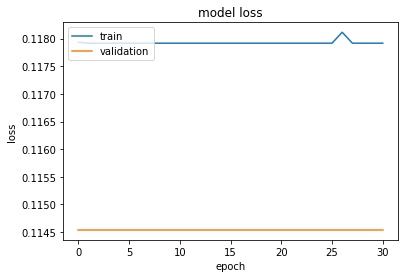

(84, 84, 50, 96)
tdata shape: (84, 84, 50, 96)
Model: "functional_363"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_182 (InputLayer)       [(None, 84, 84, 50, 96)]  0         
_________________________________________________________________
conv3d_352 (Conv3D)          (None, 84, 84, 50, 128)   12416     
_________________________________________________________________
conv3d_353 (Conv3D)          (None, 84, 84, 50, 128)   442496    
_________________________________________________________________
conv3d_354 (Conv3D)          (None, 84, 84, 50, 256)   33024     
_________________________________________________________________
conv3d_355 (Conv3D)          (None, 84, 84, 50, 256)   65792     
_________________________________________________________________
conv3d_356 (Conv3D)          (None, 84, 84, 50, 256)   65792     
_________________________________________________________________
conv3

In [220]:
# train and test the conv3d_new model
cmd = "--train_subjects s01_still --DWI 96 --model conv3d_new --layer 6 --train --label_type F"
plot_loss(cmd)
cmd = "--test_subjects s02_still --DWI 96 --model conv3d_new --layer 6 --label_type F"
args = model_parser().parse_args(cmd.split())
test_model(args)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(0.21001079428800484, -44.47604343024729, 0.7497430823650891)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
evaluation score for new model: (0.3230290507691973, -35.86437686444759, nan)


Text(0.5, 0.98, 'Center slices for s02_still_FWF predicted by new model image')

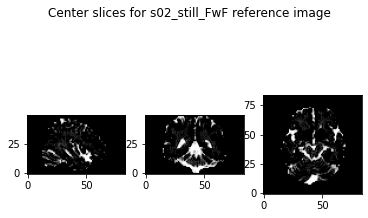

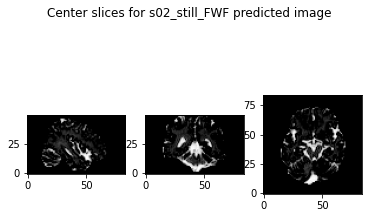

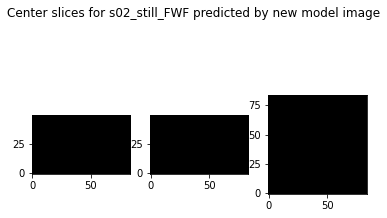

In [221]:
# load the reference img and pred img
pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-conv3d-6layer.nii'
pred_FWF_img = nib.load(pred_path)
pred_FWF_img_data = pred_FWF_img.get_fdata()
new_pred_path = '../Net-DTI/nii/s02_still-FWF-96-first-conv3d_new-6layer.nii'
new_pred_FWF_img = nib.load(new_pred_path)
new_pred_FWF_img_data = new_pred_FWF_img.get_fdata()

# evaluate the model
eval_re = evaluate_model(pred_FWF_img_data, s02_FWF_img_data, s02_mask_img_data)
print(eval_re)
new_eval_re = evaluate_model(new_pred_FWF_img_data, s02_FWF_img_data, s02_mask_img_data)
print("evaluation score for new model: " + str(new_eval_re))

# visualise both ref img and pred img
ref_slice_0 = s02_FWF_img_data[26, :, :]
ref_slice_1 = s02_FWF_img_data[:, 30, :]
ref_slice_2 = s02_FWF_img_data[:, :, 16]
show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
plt.suptitle("Center slices for s02_still_FwF reference image")

pred_slice_0 = pred_FWF_img_data[26, :, :]
pred_slice_1 = pred_FWF_img_data[:, 30, :]
pred_slice_2 = pred_FWF_img_data[:, :, 16]
show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
plt.suptitle("Center slices for s02_still_FWF predicted image")

new_pred_slice_0 = new_pred_FWF_img_data[26, :, :]
new_pred_slice_1 = new_pred_FWF_img_data[:, 30, :]
new_pred_slice_2 = new_pred_FWF_img_data[:, :, 16]
show_slices([new_pred_slice_0, new_pred_slice_1, new_pred_slice_2])
plt.suptitle("Center slices for s02_still_FWF predicted by new model image")

<strong>Test the performance of each network on deriving the three measure</strong>

In [222]:
"""
Generate training dataset using all labels (NDI, ODI and FWF) for ANN.
Using different number of DWIs as training size.
"""
dwis = np.arange(start=6, stop=97, step=10)
for dwi in dwis:
    cmd = "--subjects s01_still --nDWI "+str(dwi)+" --fc1d_train --label_type A"
    args = data_parser().parse_args(cmd.split())
    generate_data(args)


mask has shape: (352800,)
data befor masking
(352800, 96)
data after masking
(82889, 96)
the ratio of used voxels is: 0.23494614512471657
training dataset has shape:(82889, 6)
mask has shape: (352800,)
data befor masking
(352800, 1)
data after masking
(82889, 1)
the ratio of used voxels is: 0.23494614512471657
mask has shape: (352800,)
data befor masking
(352800, 1)
data after masking
(82889, 1)
the ratio of used voxels is: 0.23494614512471657
mask has shape: (352800,)
data befor masking
(352800, 1)
data after masking
(82889, 1)
the ratio of used voxels is: 0.23494614512471657
training label has shape:(82889, 3)
mask has shape: (352800,)
data befor masking
(352800, 96)
data after masking
(82889, 96)
the ratio of used voxels is: 0.23494614512471657
training dataset has shape:(82889, 16)
mask has shape: (352800,)
data befor masking
(352800, 1)
data after masking
(82889, 1)
the ratio of used voxels is: 0.23494614512471657
mask has shape: (352800,)
data befor masking
(352800, 1)
data after

In [223]:
"""
Generate testing dataset using all labels (NDI, ODI and FWF).
Using different number of DWIs as training size.
"""
dwis = np.arange(start=6, stop=97, step=10)
for dwi in dwis:
    cmd = "--subjects s02_still --nDWI " + str(dwi) + " --label_type A --test"
    args = data_parser().parse_args(cmd.split())
    generate_data(args)

testing data has shape: (84, 84, 50, 6)
testing label has shape: (84, 84, 50, 3)
testing data has shape: (84, 84, 50, 16)
testing label has shape: (84, 84, 50, 3)
testing data has shape: (84, 84, 50, 26)
testing label has shape: (84, 84, 50, 3)
testing data has shape: (84, 84, 50, 36)
testing label has shape: (84, 84, 50, 3)
testing data has shape: (84, 84, 50, 46)
testing label has shape: (84, 84, 50, 3)
testing data has shape: (84, 84, 50, 56)
testing label has shape: (84, 84, 50, 3)
testing data has shape: (84, 84, 50, 66)
testing label has shape: (84, 84, 50, 3)
testing data has shape: (84, 84, 50, 76)
testing label has shape: (84, 84, 50, 3)
testing data has shape: (84, 84, 50, 86)
testing label has shape: (84, 84, 50, 3)
testing data has shape: (84, 84, 50, 96)
testing label has shape: (84, 84, 50, 3)


Model: "functional_365"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_183 (InputLayer)       [(None, 6)]               0         
_________________________________________________________________
dense_126 (Dense)            (None, 150)               1050      
_________________________________________________________________
dense_127 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_128 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_129 (Dense)            (None, 150)               22650     
_________________________________________________________________
dropout_182 (Dropout)        (None, 150)               0         
_________________________________________________________________
output (Dense)               (None, 1)              

2022-03-08 19:04:22.470788: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 19:04:22.470887: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
100/260 [==========>...................] - ETA: 0s - loss: 0.2251 - accuracy: 0.1364

2022-03-08 19:04:22.921726: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 19:04:22.943133: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 19:04:22.943409: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 19:04:22.944497: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_19_04_22
2022-03-08 19:04:22.945007: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_19_04_22/vw.trace.json.gz
2022-03-08 19:04:22.945078: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 19:04:22.945884: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

260/260 [==============================] - 0s 2ms/step - loss: 0.2137 - accuracy: 0.1377 - val_loss: 0.1927 - val_accuracy: 0.1539
Epoch 2/100
260/260 [==============================] - 0s 2ms/step - loss: 0.2013 - accuracy: 0.1394 - val_loss: 0.1888 - val_accuracy: 0.1535
Epoch 3/100
260/260 [==============================] - 0s 2ms/step - loss: 0.1984 - accuracy: 0.1397 - val_loss: 0.1917 - val_accuracy: 0.1495
Epoch 4/100
260/260 [==============================] - 0s 2ms/step - loss: 0.1972 - accuracy: 0.1393 - val_loss: 0.1856 - val_accuracy: 0.1543
Epoch 5/100
260/260 [==============================] - 0s 2ms/step - loss: 0.1965 - accuracy: 0.1390 - val_loss: 0.1854 - val_accuracy: 0.1544
Epoch 6/100
260/260 [==============================] - 0s 2ms/step - loss: 0.1962 - accuracy: 0.1385 - val_loss: 0.1859 - val_accuracy: 0.1544
Epoch 7/100
260/260 [==============================] - 0s 2ms/step - loss: 0.1960 - accuracy: 0.1385 - val_loss: 0.1859 - val_accuracy: 0.1528
Epoch 8/100

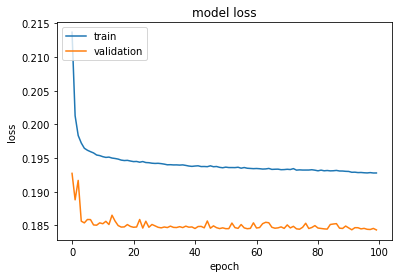

Model: "functional_367"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_184 (InputLayer)       [(None, 16)]              0         
_________________________________________________________________
dense_130 (Dense)            (None, 150)               2550      
_________________________________________________________________
dense_131 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_132 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_133 (Dense)            (None, 150)               22650     
_________________________________________________________________
dropout_183 (Dropout)        (None, 150)               0         
_________________________________________________________________
output (Dense)               (None, 1)              

2022-03-08 19:05:06.092497: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 19:05:06.092579: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 22/260 [=>............................] - ETA: 0s - loss: 0.2529 - accuracy: 0.1352

2022-03-08 19:05:06.552410: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 19:05:06.568090: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 19:05:06.568353: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 19:05:06.569421: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_19_05_06
2022-03-08 19:05:06.569920: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_19_05_06/vw.trace.json.gz
2022-03-08 19:05:06.570033: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 19:05:06.570861: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

260/260 [==============================] - 1s 4ms/step - loss: 0.2093 - accuracy: 0.1375 - val_loss: 0.1887 - val_accuracy: 0.1527
Epoch 2/100
260/260 [==============================] - 0s 2ms/step - loss: 0.1976 - accuracy: 0.1384 - val_loss: 0.1846 - val_accuracy: 0.1539
Epoch 3/100
260/260 [==============================] - 0s 2ms/step - loss: 0.1940 - accuracy: 0.1385 - val_loss: 0.1846 - val_accuracy: 0.1475
Epoch 4/100
260/260 [==============================] - 1s 2ms/step - loss: 0.1922 - accuracy: 0.1369 - val_loss: 0.1819 - val_accuracy: 0.1534
Epoch 5/100
260/260 [==============================] - 0s 2ms/step - loss: 0.1914 - accuracy: 0.1362 - val_loss: 0.1833 - val_accuracy: 0.1536
Epoch 6/100
260/260 [==============================] - 0s 2ms/step - loss: 0.1908 - accuracy: 0.1356 - val_loss: 0.1809 - val_accuracy: 0.1478
Epoch 7/100
260/260 [==============================] - 0s 2ms/step - loss: 0.1904 - accuracy: 0.1355 - val_loss: 0.1803 - val_accuracy: 0.1501
Epoch 8/100

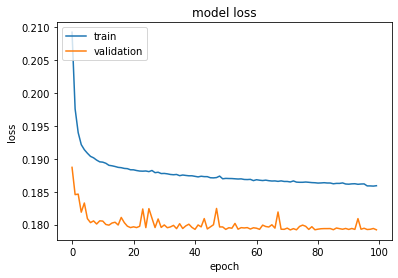

Model: "functional_369"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_185 (InputLayer)       [(None, 26)]              0         
_________________________________________________________________
dense_134 (Dense)            (None, 150)               4050      
_________________________________________________________________
dense_135 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_136 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_137 (Dense)            (None, 150)               22650     
_________________________________________________________________
dropout_184 (Dropout)        (None, 150)               0         
_________________________________________________________________
output (Dense)               (None, 1)              

2022-03-08 19:05:52.162788: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 19:05:52.162916: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 75/260 [=======>......................] - ETA: 0s - loss: 0.2263 - accuracy: 0.1349

2022-03-08 19:05:52.845253: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 19:05:52.881212: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 19:05:52.881701: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 19:05:52.883428: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_19_05_52
2022-03-08 19:05:52.883980: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_19_05_52/vw.trace.json.gz
2022-03-08 19:05:52.884167: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 19:05:52.885380: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

260/260 [==============================] - 1s 2ms/step - loss: 0.2111 - accuracy: 0.1361 - val_loss: 0.1881 - val_accuracy: 0.1502
Epoch 2/100
260/260 [==============================] - 0s 2ms/step - loss: 0.1985 - accuracy: 0.1371 - val_loss: 0.1846 - val_accuracy: 0.1532
Epoch 3/100
260/260 [==============================] - 0s 2ms/step - loss: 0.1948 - accuracy: 0.1368 - val_loss: 0.1815 - val_accuracy: 0.1523
Epoch 4/100
260/260 [==============================] - 0s 2ms/step - loss: 0.1920 - accuracy: 0.1358 - val_loss: 0.1803 - val_accuracy: 0.1527
Epoch 5/100
260/260 [==============================] - 0s 2ms/step - loss: 0.1904 - accuracy: 0.1350 - val_loss: 0.1834 - val_accuracy: 0.1387
Epoch 6/100
260/260 [==============================] - 0s 2ms/step - loss: 0.1896 - accuracy: 0.1346 - val_loss: 0.1788 - val_accuracy: 0.1483
Epoch 7/100
260/260 [==============================] - 0s 2ms/step - loss: 0.1889 - accuracy: 0.1339 - val_loss: 0.1786 - val_accuracy: 0.1483
Epoch 8/100

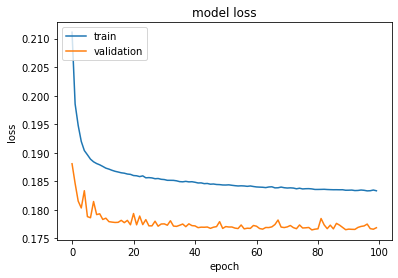

Model: "functional_371"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_186 (InputLayer)       [(None, 36)]              0         
_________________________________________________________________
dense_138 (Dense)            (None, 150)               5550      
_________________________________________________________________
dense_139 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_140 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_141 (Dense)            (None, 150)               22650     
_________________________________________________________________
dropout_185 (Dropout)        (None, 150)               0         
_________________________________________________________________
output (Dense)               (None, 1)              

2022-03-08 19:06:39.482714: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 19:06:39.482836: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 60/260 [=====>........................] - ETA: 0s - loss: 0.2316 - accuracy: 0.1324

2022-03-08 19:06:40.101422: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 19:06:40.145343: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 19:06:40.145824: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 19:06:40.147819: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_19_06_40
2022-03-08 19:06:40.148563: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_19_06_40/vw.trace.json.gz
2022-03-08 19:06:40.148780: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 19:06:40.150329: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

260/260 [==============================] - 1s 3ms/step - loss: 0.2107 - accuracy: 0.1364 - val_loss: 0.1880 - val_accuracy: 0.1537
Epoch 2/100
260/260 [==============================] - 1s 2ms/step - loss: 0.1985 - accuracy: 0.1374 - val_loss: 0.1857 - val_accuracy: 0.1504
Epoch 3/100
260/260 [==============================] - 1s 2ms/step - loss: 0.1947 - accuracy: 0.1374 - val_loss: 0.1820 - val_accuracy: 0.1520
Epoch 4/100
260/260 [==============================] - 1s 2ms/step - loss: 0.1920 - accuracy: 0.1366 - val_loss: 0.1806 - val_accuracy: 0.1475
Epoch 5/100
260/260 [==============================] - 1s 2ms/step - loss: 0.1902 - accuracy: 0.1353 - val_loss: 0.1795 - val_accuracy: 0.1493
Epoch 6/100
260/260 [==============================] - 1s 2ms/step - loss: 0.1891 - accuracy: 0.1347 - val_loss: 0.1805 - val_accuracy: 0.1515
Epoch 7/100
260/260 [==============================] - 0s 2ms/step - loss: 0.1883 - accuracy: 0.1340 - val_loss: 0.1780 - val_accuracy: 0.1502
Epoch 8/100

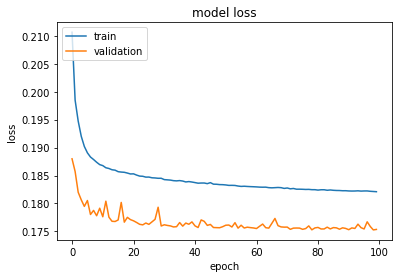

Model: "functional_373"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_187 (InputLayer)       [(None, 46)]              0         
_________________________________________________________________
dense_142 (Dense)            (None, 150)               7050      
_________________________________________________________________
dense_143 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_144 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_145 (Dense)            (None, 150)               22650     
_________________________________________________________________
dropout_186 (Dropout)        (None, 150)               0         
_________________________________________________________________
output (Dense)               (None, 1)              

2022-03-08 19:07:26.883524: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 19:07:26.883610: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 77/260 [=======>......................] - ETA: 0s - loss: 0.2194 - accuracy: 0.1325

2022-03-08 19:07:27.452467: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 19:07:27.478533: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 19:07:27.478887: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 19:07:27.480111: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_19_07_27
2022-03-08 19:07:27.480667: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_19_07_27/vw.trace.json.gz
2022-03-08 19:07:27.480768: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 19:07:27.481715: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

260/260 [==============================] - 1s 2ms/step - loss: 0.2084 - accuracy: 0.1357 - val_loss: 0.1900 - val_accuracy: 0.1444
Epoch 2/100
260/260 [==============================] - 1s 2ms/step - loss: 0.1976 - accuracy: 0.1367 - val_loss: 0.1845 - val_accuracy: 0.1529
Epoch 3/100
260/260 [==============================] - 0s 2ms/step - loss: 0.1938 - accuracy: 0.1364 - val_loss: 0.1817 - val_accuracy: 0.1494
Epoch 4/100
260/260 [==============================] - 1s 2ms/step - loss: 0.1912 - accuracy: 0.1354 - val_loss: 0.1793 - val_accuracy: 0.1500
Epoch 5/100
260/260 [==============================] - 1s 2ms/step - loss: 0.1894 - accuracy: 0.1346 - val_loss: 0.1795 - val_accuracy: 0.1457
Epoch 6/100
260/260 [==============================] - 0s 2ms/step - loss: 0.1884 - accuracy: 0.1338 - val_loss: 0.1780 - val_accuracy: 0.1455
Epoch 7/100
260/260 [==============================] - 0s 2ms/step - loss: 0.1875 - accuracy: 0.1335 - val_loss: 0.1782 - val_accuracy: 0.1428
Epoch 8/100

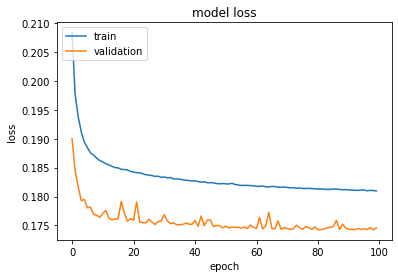

Model: "functional_375"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_188 (InputLayer)       [(None, 56)]              0         
_________________________________________________________________
dense_146 (Dense)            (None, 150)               8550      
_________________________________________________________________
dense_147 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_148 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_149 (Dense)            (None, 150)               22650     
_________________________________________________________________
dropout_187 (Dropout)        (None, 150)               0         
_________________________________________________________________
output (Dense)               (None, 1)              

2022-03-08 19:08:13.962482: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 19:08:13.962627: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 66/260 [======>.......................] - ETA: 0s - loss: 0.2235 - accuracy: 0.1337

2022-03-08 19:08:14.523084: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 19:08:14.555942: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 19:08:14.556330: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 19:08:14.557703: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_19_08_14
2022-03-08 19:08:14.558294: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_19_08_14/vw.trace.json.gz
2022-03-08 19:08:14.558393: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 19:08:14.559358: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

260/260 [==============================] - 1s 3ms/step - loss: 0.2080 - accuracy: 0.1358 - val_loss: 0.1875 - val_accuracy: 0.1525
Epoch 2/100
260/260 [==============================] - 1s 2ms/step - loss: 0.1978 - accuracy: 0.1368 - val_loss: 0.1843 - val_accuracy: 0.1491
Epoch 3/100
260/260 [==============================] - 1s 2ms/step - loss: 0.1942 - accuracy: 0.1364 - val_loss: 0.1817 - val_accuracy: 0.1500
Epoch 4/100
260/260 [==============================] - 1s 2ms/step - loss: 0.1914 - accuracy: 0.1353 - val_loss: 0.1799 - val_accuracy: 0.1513
Epoch 5/100
260/260 [==============================] - 0s 2ms/step - loss: 0.1893 - accuracy: 0.1344 - val_loss: 0.1808 - val_accuracy: 0.1406
Epoch 6/100
260/260 [==============================] - 1s 2ms/step - loss: 0.1880 - accuracy: 0.1334 - val_loss: 0.1781 - val_accuracy: 0.1490
Epoch 7/100
260/260 [==============================] - 0s 2ms/step - loss: 0.1873 - accuracy: 0.1327 - val_loss: 0.1771 - val_accuracy: 0.1477
Epoch 8/100

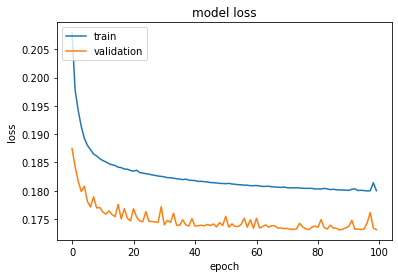

Model: "functional_377"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_189 (InputLayer)       [(None, 66)]              0         
_________________________________________________________________
dense_150 (Dense)            (None, 150)               10050     
_________________________________________________________________
dense_151 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_152 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_153 (Dense)            (None, 150)               22650     
_________________________________________________________________
dropout_188 (Dropout)        (None, 150)               0         
_________________________________________________________________
output (Dense)               (None, 1)              

2022-03-08 19:09:01.760985: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 19:09:01.761108: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 78/260 [========>.....................] - ETA: 0s - loss: 0.2155 - accuracy: 0.1328

2022-03-08 19:09:02.335700: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 19:09:02.357424: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 19:09:02.357798: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 19:09:02.359090: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_19_09_02
2022-03-08 19:09:02.359691: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_19_09_02/vw.trace.json.gz
2022-03-08 19:09:02.359838: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 19:09:02.361064: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

260/260 [==============================] - 1s 2ms/step - loss: 0.2061 - accuracy: 0.1353 - val_loss: 0.1866 - val_accuracy: 0.1520
Epoch 2/100
260/260 [==============================] - 1s 2ms/step - loss: 0.1966 - accuracy: 0.1365 - val_loss: 0.1844 - val_accuracy: 0.1534
Epoch 3/100
260/260 [==============================] - 0s 2ms/step - loss: 0.1927 - accuracy: 0.1363 - val_loss: 0.1807 - val_accuracy: 0.1518
Epoch 4/100
260/260 [==============================] - 0s 2ms/step - loss: 0.1899 - accuracy: 0.1356 - val_loss: 0.1791 - val_accuracy: 0.1481
Epoch 5/100
260/260 [==============================] - 0s 2ms/step - loss: 0.1882 - accuracy: 0.1347 - val_loss: 0.1783 - val_accuracy: 0.1504
Epoch 6/100
260/260 [==============================] - 1s 2ms/step - loss: 0.1871 - accuracy: 0.1337 - val_loss: 0.1769 - val_accuracy: 0.1480
Epoch 7/100
260/260 [==============================] - 0s 2ms/step - loss: 0.1863 - accuracy: 0.1331 - val_loss: 0.1765 - val_accuracy: 0.1487
Epoch 8/100

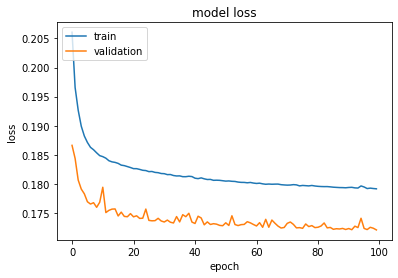

Model: "functional_379"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_190 (InputLayer)       [(None, 76)]              0         
_________________________________________________________________
dense_154 (Dense)            (None, 150)               11550     
_________________________________________________________________
dense_155 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_156 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_157 (Dense)            (None, 150)               22650     
_________________________________________________________________
dropout_189 (Dropout)        (None, 150)               0         
_________________________________________________________________
output (Dense)               (None, 1)              

2022-03-08 19:09:49.516058: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 19:09:49.516198: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 70/260 [=======>......................] - ETA: 0s - loss: 0.2481 - accuracy: 0.1340

2022-03-08 19:09:50.022767: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 19:09:50.044739: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 19:09:50.045141: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 19:09:50.046899: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_19_09_50
2022-03-08 19:09:50.047517: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_19_09_50/vw.trace.json.gz
2022-03-08 19:09:50.047744: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 19:09:50.049192: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

260/260 [==============================] - 1s 2ms/step - loss: 0.2162 - accuracy: 0.1355 - val_loss: 0.1872 - val_accuracy: 0.1528
Epoch 2/100
260/260 [==============================] - 1s 2ms/step - loss: 0.1982 - accuracy: 0.1360 - val_loss: 0.1844 - val_accuracy: 0.1531
Epoch 3/100
260/260 [==============================] - 0s 2ms/step - loss: 0.1944 - accuracy: 0.1363 - val_loss: 0.1813 - val_accuracy: 0.1496
Epoch 4/100
260/260 [==============================] - 1s 2ms/step - loss: 0.1916 - accuracy: 0.1355 - val_loss: 0.1811 - val_accuracy: 0.1536
Epoch 5/100
260/260 [==============================] - 1s 2ms/step - loss: 0.1895 - accuracy: 0.1343 - val_loss: 0.1786 - val_accuracy: 0.1485
Epoch 6/100
260/260 [==============================] - 1s 2ms/step - loss: 0.1881 - accuracy: 0.1339 - val_loss: 0.1775 - val_accuracy: 0.1472
Epoch 7/100
260/260 [==============================] - 0s 2ms/step - loss: 0.1873 - accuracy: 0.1329 - val_loss: 0.1768 - val_accuracy: 0.1460
Epoch 8/100

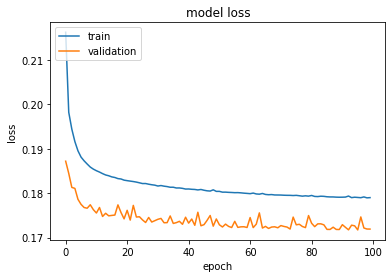

Model: "functional_381"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_191 (InputLayer)       [(None, 86)]              0         
_________________________________________________________________
dense_158 (Dense)            (None, 150)               13050     
_________________________________________________________________
dense_159 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_160 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_161 (Dense)            (None, 150)               22650     
_________________________________________________________________
dropout_190 (Dropout)        (None, 150)               0         
_________________________________________________________________
output (Dense)               (None, 1)              

2022-03-08 19:10:37.061400: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 19:10:37.061490: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 81/260 [========>.....................] - ETA: 0s - loss: 0.2182 - accuracy: 0.1331

2022-03-08 19:10:37.608662: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 19:10:37.627190: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 19:10:37.627517: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 19:10:37.628701: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_19_10_37
2022-03-08 19:10:37.629256: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_19_10_37/vw.trace.json.gz
2022-03-08 19:10:37.629364: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 19:10:37.630581: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

260/260 [==============================] - 1s 2ms/step - loss: 0.2075 - accuracy: 0.1353 - val_loss: 0.1870 - val_accuracy: 0.1518
Epoch 2/100
260/260 [==============================] - 0s 2ms/step - loss: 0.1974 - accuracy: 0.1361 - val_loss: 0.1840 - val_accuracy: 0.1488
Epoch 3/100
260/260 [==============================] - 1s 2ms/step - loss: 0.1940 - accuracy: 0.1358 - val_loss: 0.1814 - val_accuracy: 0.1494
Epoch 4/100
260/260 [==============================] - 1s 2ms/step - loss: 0.1913 - accuracy: 0.1351 - val_loss: 0.1805 - val_accuracy: 0.1486
Epoch 5/100
260/260 [==============================] - 0s 2ms/step - loss: 0.1892 - accuracy: 0.1339 - val_loss: 0.1814 - val_accuracy: 0.1406
Epoch 6/100
260/260 [==============================] - 1s 2ms/step - loss: 0.1878 - accuracy: 0.1331 - val_loss: 0.1774 - val_accuracy: 0.1445
Epoch 7/100
260/260 [==============================] - 0s 2ms/step - loss: 0.1867 - accuracy: 0.1328 - val_loss: 0.1766 - val_accuracy: 0.1439
Epoch 8/100

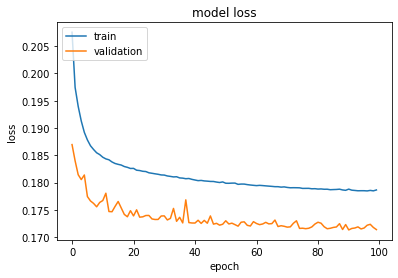

Model: "functional_383"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_192 (InputLayer)       [(None, 96)]              0         
_________________________________________________________________
dense_162 (Dense)            (None, 150)               14550     
_________________________________________________________________
dense_163 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_164 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_165 (Dense)            (None, 150)               22650     
_________________________________________________________________
dropout_191 (Dropout)        (None, 150)               0         
_________________________________________________________________
output (Dense)               (None, 1)              

2022-03-08 19:11:24.957074: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 19:11:24.957193: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed


Epoch 1/100
 69/260 [======>.......................] - ETA: 0s - loss: 0.2341 - accuracy: 0.1310

2022-03-08 19:11:25.459214: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-03-08 19:11:25.477904: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2022-03-08 19:11:25.478194: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-03-08 19:11:25.479344: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022_03_08_19_11_25
2022-03-08 19:11:25.479921: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_08_19_11_25/vw.trace.json.gz
2022-03-08 19:11:25.480013: E tensorflow/core/profiler/utils/hardware_type_utils.cc:61] Invalid GPU compute capability.
2022-03-08 19:11:25.480932: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/train/plugins/profile/2022

260/260 [==============================] - 1s 3ms/step - loss: 0.2117 - accuracy: 0.1345 - val_loss: 0.1872 - val_accuracy: 0.1527
Epoch 2/100
260/260 [==============================] - 0s 2ms/step - loss: 0.1977 - accuracy: 0.1367 - val_loss: 0.1843 - val_accuracy: 0.1532
Epoch 3/100
260/260 [==============================] - 0s 2ms/step - loss: 0.1940 - accuracy: 0.1367 - val_loss: 0.1836 - val_accuracy: 0.1536
Epoch 4/100
260/260 [==============================] - 1s 2ms/step - loss: 0.1912 - accuracy: 0.1361 - val_loss: 0.1794 - val_accuracy: 0.1494
Epoch 5/100
260/260 [==============================] - 1s 2ms/step - loss: 0.1891 - accuracy: 0.1348 - val_loss: 0.1783 - val_accuracy: 0.1506
Epoch 6/100
260/260 [==============================] - 1s 2ms/step - loss: 0.1878 - accuracy: 0.1341 - val_loss: 0.1772 - val_accuracy: 0.1491
Epoch 7/100
260/260 [==============================] - 0s 2ms/step - loss: 0.1868 - accuracy: 0.1333 - val_loss: 0.1786 - val_accuracy: 0.1497
Epoch 8/100

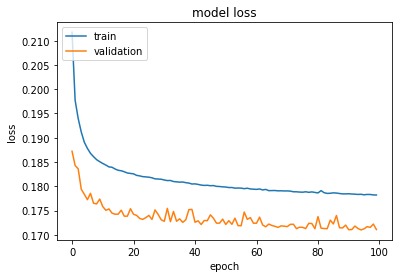

In [224]:
"""
Train the ANN network
Fix the number of hidden layers: 4
Vary the number of DWI used: [6, 16, 26, ..., 86, 96]
"""
dwis = np.arange(start=6, stop=97, step=10)
for dwi in dwis:
    cmd = "--train_subjects s01_still --DWI " + str(dwi) + " --model fc1d --layer 4 --train --label_type A"
    plot_loss(cmd)

In [225]:
"""
Test each network with varied number of DWI
"""
dwis = np.arange(start=6, stop=97, step=10)
for dwi in dwis:
    cmd = "--test_subjects s02_still --DWI " + str(dwi) + " --model fc1d --layer 4 --label_type A"
    args = model_parser().parse_args(cmd.split())
    test_model(args)

(84, 84, 50, 6)
tdata shape: (84, 84, 50, 6)
Model: "functional_385"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_193 (InputLayer)       [(None, 6)]               0         
_________________________________________________________________
dense_166 (Dense)            (None, 150)               1050      
_________________________________________________________________
dense_167 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_168 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_169 (Dense)            (None, 150)               22650     
_________________________________________________________________
dropout_192 (Dropout)        (None, 150)               0         
_________________________________________________________________
output 

ValueError: cannot reshape array of size 352800 into shape (84,84,50,3)

In [ ]:
"""
Render each img produced.
Compare with the reference img.
Using nib to fetch the  data, used for evaluation
"""
# the path of reference imgs
s02_NDI_path = '../Data-NODDI/s02_still/s02_still_NDI.nii'
s02_ODI_path = '../Data-NODDI/s02_still/s02_still_ODI.nii'
s02_FWF_path = '../Data-NODDI/s02_still/s02_still_FWF.nii'
s02_mask_path = '../Net-DTI/datasets/mask/mask_s02_still.nii'
# the data of reference imgs
s02_NDI_img = nib.load(s02_NDI_path)
s02_NDI_img_data = s02_NDI_img.get_fdata()
s02_ODI_img = nib.load(s02_ODI_path)
s02_ODI_img_data = s02_ODI_img.get_fdata()
s02_FWF_img = nib.load(s02_FWF_path)
s02_FWF_img_data = s02_FWF_img.get_fdata()
s02_mask_img = nib.load(s02_mask_path)
s02_mask_img_data = s02_mask_img.get_fdata()
# the label types and the imgs
ltype = ['NDI', 'ODI', 'FWF']
ref_imgs = [s02_NDI_img_data, s02_ODI_img_data, s02_FWF_img_data]
# visualise the ref img
for i in range(len(ltype)):
    ref_slice_0 = ref_imgs[i][26, :, :]
    ref_slice_1 = ref_imgs[i][:, 30, :]
    ref_slice_2 = ref_imgs[i][:, :, 16]
    show_slices([ref_slice_0, ref_slice_1, ref_slice_2])
    plt.suptitle("Center slices for s02_still_"+ltype[i]+" reference image")

dwis = np.arange(start=6, stop=97, step=10)
for dwi in dwis:
    # pred img paths
    pred_NDI_path = '../Net-DTI/nii/s02_still-NDI-'+str(dwi)+'-first-fc1d-4layer.nii'
    pred_ODI_path = '../Net-DTI/nii/s02_still-ODI-'+str(dwi)+'-first-fc1d-4layer.nii'
    pred_FWF_path = '../Net-DTI/nii/s02_still-FWF-'+str(dwi)+'-first-fc1d-4layer.nii'
    # load the pred imgs data
    pred_NDI = nib.load(pred_NDI_path)
    pred_NDI_data = pred_NDI.get_fdata()
    pred_ODI = nib.load(pred_ODI_path)
    pred_ODI_data = pred_ODI.get_fdata()
    pred_FWF = nib.load(pred_FWF_path)
    pred_FWF_data = pred_FWF.get_fdata()
    # visualise these imgs
    pred_imgs = [pred_NDI_data, pred_ODI_data, pred_FWF_data]
    for i in range(len(ltype)):
        pred_slice_0 = pred_imgs[i][26, :, :]
        pred_slice_1 = pred_imgs[i][:, 30, :]
        pred_slice_2 = pred_imgs[i][:, :, 16]
        show_slices([pred_slice_0, pred_slice_1, pred_slice_2])
        plt.suptitle("Center slices for s02_still_"+ltype[i]+" DWI="+str(dwi)+" predicted image")
    
    # evaluate the model
    NDI_loss = evaluate_model(pred_NDI_data, s02_NDI_img_data, s02_mask_img_data)[0]
    ODI_loss = evaluate_model(pred_ODI_data, s02_ODI_img_data, s02_mask_img_data)[0]
    FWF_loss = evaluate_model(pred_FWF_data, s02_FWF_img_data, s02_mask_img_data)[0]
    print("DWI="+str(dwi)+" NDI loss: " +str(NDI_loss)+"-"+"ODI loss: "+str(ODI_loss)+"-"+"FWF loss: "+str(FWF_loss)+"-"+"Overall loss: "+str(np.mean([NDI_loss,ODI_loss,FWF_loss])))
